In [3]:
#installing the required packages for google colab
!pip install https://github.com/nithinmurali/pygsheets/archive/master.zip
!apt-get -qq install -y graphviz && pip install -q pydot
!pip install openpyxl

    100% |████████████████████████████████| 112kB 415kB/s 
  Running setup.py bdist_wheel for pygsheets ... - done
  Stored in directory: /tmp/pip-ephem-wheel-cache-4xs9qz65/wheels/d9/57/8e/549fffb1482b9d3ec4f60a378f4c32f3dbba74e4aad728dd27
Successfully built pygsheets


In [4]:
#authorize 1
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

gpg: keybox '/tmp/tmpogq9l237/pubring.gpg' created
gpg: /tmp/tmpogq9l237/trustdb.gpg: trustdb created
gpg: key AD5F235DF639B041: public key "Launchpad PPA for Alessandro Strada" imported
gpg: Total number processed: 1
gpg:               imported: 1
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
#authorize 2
!pip install -U -q PyDrive ## you will have install for every colab session
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pygsheets

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model
from keras.initializers import *
from sklearn.preprocessing import *
from sklearn.metrics import *

Using TensorFlow backend.


In [0]:
#loading the dataset from drive to colab
imp = drive.CreateFile({'id':'1Wcf0XRJa1R02lvlUhJl7vcvSN9TVWYW0'})
imp.GetContentFile('pima-indians-diabetes.csv')

In [9]:
#colab to pandas
df= pd.read_csv("pima-indians-diabetes.csv")
df.columns = np.arange(9) #rename labels
df

,0,1,2,3,4,5,6,7,8
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
5,3,78,50,32,88,31.0,0.248,26,1
6,10,115,0,0,0,35.3,0.134,29,0
7,2,197,70,45,543,30.5,0.158,53,1
8,8,125,96,0,0,0.0,0.232,54,1
9,4,110,92,0,0,37.6,0.191,30,0


In [0]:
X = df.iloc[:,0:8] #independent variable
Y = df.iloc[:,8] #dependent variable

In [11]:
#accessing the drive
!mkdir -p drive
!google-drive-ocamlfuse drive
#loading the google sheets
gc = pygsheets.authorize(outh_file='drive/Colab Notebooks/client_secret_430362481330-rp2r1tr6c5p8ef3q3ip4vfhtfabmqehf.apps.googleusercontent.com.json',outh_nonlocal=True)
# Open spreadsheet and then workseet
sh = gc.open('Neurons Analysis')
wks = sh.sheet1


Go to the following link in your browser:

    https://accounts.google.com/o/oauth2/auth?client_id=430362481330-rp2r1tr6c5p8ef3q3ip4vfhtfabmqehf.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fspreadsheets+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&access_type=offline&response_type=code

Enter verification code: 4/AAAgjLPOX6CZ14u3kbWaXZJThMmB1QiODGKQAw1_mcucxwIN9InKLD4
Authentication successful.
Storing credentials to /content/sheets.googleapis.com-python.json


Now we need to calculate the amount of neurons to be used in each layer. The ratio for first second third hidden layer can be taken as x , 0.5x 0.1x respectively. I arrived at this ratio after reading up on some documentation and thumb rules.

In [12]:
analysisdf = pd.DataFrame(columns= ["First Layer Neurons","Second layer neurons","third layer neurons","accuracy"])
analysisdf  

,First Layer Neurons,Second layer neurons,third layer neurons,accuracy


Lets see the change in accuracy when neurons increase from  10 to 100

In [13]:
#for reproductivity
from numpy.random import seed 
from tensorflow import set_random_seed 
rownumber = 0
for FirstLayer in range(10,101,10):
  SecondLayer = 0.5*FirstLayer
  ThirdLayer = 0.1*FirstLayer
  seed(7) 
  set_random_seed(2)
  scaler = StandardScaler()
  X = scaler.fit_transform(X)
  model = Sequential()
  model.add(Dense(FirstLayer, input_dim=8, init='uniform', activation='relu' )) #bias_initializer='zeros'
  model.add(Dense(int(SecondLayer), init='uniform', activation='tanh'))
  model.add(Dense(int(ThirdLayer), init='uniform', activation='relu'))
  model.add(Dense(1, init='uniform', activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  history = model.fit(X, Y, epochs=150, batch_size=97,validation_split=0.20 ) #shuffle = False, 
  scores = model.evaluate(X, Y)
  analysisdf.loc[rownumber,"First Layer Neurons"]=  FirstLayer
  analysisdf.loc[rownumber,"Second layer neurons"]= SecondLayer
  analysisdf.loc[rownumber,"third layer neurons"]= ThirdLayer
  analysisdf.loc[rownumber,"accuracy"]= ("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
  wks.set_dataframe(analysisdf,(1,1))
  rownumber  += 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(5, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="relu", kernel_initializer="uniform")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  from ipykernel import kernelapp as app


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 1s 2ms/step - loss: 0.6928 - acc: 0.6150 - val_loss: 0.6923 - val_acc: 0.6429
Epoch 2/150
613/613 [==============================] - 0s 92us/step - loss: 0.6918 - acc: 0.6542 - val_loss: 0.6913 - val_acc: 0.6429
Epoch 3/150
613/613 [==============================] - 0s 86us/step - loss: 0.6908 - acc: 0.6542 - val_loss: 0.6904 - val_acc: 0.6429
Epoch 4/150
613/613 [==============================] - 0s 87us/step - loss: 0.6898 - acc: 0.6542 - val_loss: 0.6895 - val_acc: 0.6429
Epoch 5/150
613/613 [==============================] - 0s 88us/step - loss: 0.6888 - acc: 0.6542 - val_loss: 0.6886 - val_acc: 0.6429
Epoch 6/150
613/613 [==============================] - 0s 88us/step - loss: 0.6879 - acc: 0.6542 - val_loss: 0.6877 - val_acc: 0.6429
Epoch 7/150
613/613 [==============================] - 0s 100us/step - loss: 0.6869 - acc: 0.6542 - val_loss: 0.6869 - val_acc: 0.6429
Epoch 8/150
613/

613/613 [==============================] - 0s 91us/step - loss: 0.6740 - acc: 0.6542 - val_loss: 0.6752 - val_acc: 0.6429
Epoch 24/150
613/613 [==============================] - 0s 90us/step - loss: 0.6732 - acc: 0.6542 - val_loss: 0.6746 - val_acc: 0.6429
Epoch 25/150
613/613 [==============================] - 0s 92us/step - loss: 0.6727 - acc: 0.6542 - val_loss: 0.6739 - val_acc: 0.6429
Epoch 26/150
613/613 [==============================] - 0s 84us/step - loss: 0.6719 - acc: 0.6542 - val_loss: 0.6733 - val_acc: 0.6429
Epoch 27/150
613/613 [==============================] - 0s 91us/step - loss: 0.6713 - acc: 0.6542 - val_loss: 0.6727 - val_acc: 0.6429
Epoch 28/150
613/613 [==============================] - 0s 86us/step - loss: 0.6706 - acc: 0.6542 - val_loss: 0.6722 - val_acc: 0.6429
Epoch 29/150
613/613 [==============================] - 0s 99us/step - loss: 0.6700 - acc: 0.6542 - val_loss: 0.6716 - val_acc: 0.6429
Epoch 30/150
613/613 [==============================] - 0s 82us/step

613/613 [==============================] - 0s 87us/step - loss: 0.6599 - acc: 0.6542 - val_loss: 0.6628 - val_acc: 0.6429
Epoch 50/150
613/613 [==============================] - 0s 98us/step - loss: 0.6595 - acc: 0.6542 - val_loss: 0.6625 - val_acc: 0.6429
Epoch 51/150
613/613 [==============================] - 0s 80us/step - loss: 0.6592 - acc: 0.6542 - val_loss: 0.6622 - val_acc: 0.6429
Epoch 52/150
613/613 [==============================] - 0s 86us/step - loss: 0.6588 - acc: 0.6542 - val_loss: 0.6619 - val_acc: 0.6429
Epoch 53/150
613/613 [==============================] - 0s 87us/step - loss: 0.6585 - acc: 0.6542 - val_loss: 0.6616 - val_acc: 0.6429
Epoch 54/150
613/613 [==============================] - 0s 88us/step - loss: 0.6581 - acc: 0.6542 - val_loss: 0.6613 - val_acc: 0.6429
Epoch 55/150
613/613 [==============================] - 0s 90us/step - loss: 0.6578 - acc: 0.6542 - val_loss: 0.6611 - val_acc: 0.6429
Epoch 56/150
613/613 [==============================] - 0s 87us/step

613/613 [==============================] - 0s 85us/step - loss: 0.6522 - acc: 0.6542 - val_loss: 0.6565 - val_acc: 0.6429
Epoch 76/150
613/613 [==============================] - 0s 84us/step - loss: 0.6520 - acc: 0.6542 - val_loss: 0.6563 - val_acc: 0.6429
Epoch 77/150
613/613 [==============================] - 0s 85us/step - loss: 0.6518 - acc: 0.6542 - val_loss: 0.6561 - val_acc: 0.6429
Epoch 78/150
613/613 [==============================] - 0s 86us/step - loss: 0.6516 - acc: 0.6542 - val_loss: 0.6560 - val_acc: 0.6429
Epoch 79/150
613/613 [==============================] - 0s 101us/step - loss: 0.6514 - acc: 0.6542 - val_loss: 0.6558 - val_acc: 0.6429
Epoch 80/150
613/613 [==============================] - 0s 85us/step - loss: 0.6512 - acc: 0.6542 - val_loss: 0.6556 - val_acc: 0.6429
Epoch 81/150
613/613 [==============================] - 0s 87us/step - loss: 0.6509 - acc: 0.6542 - val_loss: 0.6555 - val_acc: 0.6429
Epoch 82/150
613/613 [==============================] - 0s 89us/ste

613/613 [==============================] - 0s 85us/step - loss: 0.6481 - acc: 0.6542 - val_loss: 0.6534 - val_acc: 0.6429
Epoch 102/150
613/613 [==============================] - 0s 83us/step - loss: 0.6480 - acc: 0.6542 - val_loss: 0.6533 - val_acc: 0.6429
Epoch 103/150
613/613 [==============================] - 0s 86us/step - loss: 0.6479 - acc: 0.6542 - val_loss: 0.6532 - val_acc: 0.6429
Epoch 104/150
613/613 [==============================] - 0s 88us/step - loss: 0.6478 - acc: 0.6542 - val_loss: 0.6531 - val_acc: 0.6429
Epoch 105/150
613/613 [==============================] - 0s 86us/step - loss: 0.6477 - acc: 0.6542 - val_loss: 0.6531 - val_acc: 0.6429
Epoch 106/150
613/613 [==============================] - 0s 87us/step - loss: 0.6476 - acc: 0.6542 - val_loss: 0.6530 - val_acc: 0.6429
Epoch 107/150
613/613 [==============================] - 0s 84us/step - loss: 0.6475 - acc: 0.6542 - val_loss: 0.6530 - val_acc: 0.6429
Epoch 108/150
613/613 [==============================] - 0s 98

613/613 [==============================] - 0s 89us/step - loss: 0.6462 - acc: 0.6542 - val_loss: 0.6521 - val_acc: 0.6429
Epoch 128/150
613/613 [==============================] - 0s 86us/step - loss: 0.6461 - acc: 0.6542 - val_loss: 0.6521 - val_acc: 0.6429
Epoch 129/150
613/613 [==============================] - 0s 98us/step - loss: 0.6461 - acc: 0.6542 - val_loss: 0.6521 - val_acc: 0.6429
Epoch 130/150
613/613 [==============================] - 0s 90us/step - loss: 0.6460 - acc: 0.6542 - val_loss: 0.6521 - val_acc: 0.6429
Epoch 131/150
613/613 [==============================] - 0s 84us/step - loss: 0.6460 - acc: 0.6542 - val_loss: 0.6520 - val_acc: 0.6429
Epoch 132/150
613/613 [==============================] - 0s 83us/step - loss: 0.6459 - acc: 0.6542 - val_loss: 0.6520 - val_acc: 0.6429
Epoch 133/150
613/613 [==============================] - 0s 86us/step - loss: 0.6459 - acc: 0.6542 - val_loss: 0.6520 - val_acc: 0.6429
Epoch 134/150
613/613 [==============================] - 0s 86

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(20, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(2, activation="relu", kernel_initializer="uniform")`
  


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 0s 538us/step - loss: 0.6928 - acc: 0.6248 - val_loss: 0.6922 - val_acc: 0.6429
Epoch 2/150
613/613 [==============================] - 0s 92us/step - loss: 0.6917 - acc: 0.6542 - val_loss: 0.6912 - val_acc: 0.6429
Epoch 3/150
613/613 [==============================] - 0s 86us/step - loss: 0.6906 - acc: 0.6542 - val_loss: 0.6902 - val_acc: 0.6429
Epoch 4/150
613/613 [==============================] - 0s 88us/step - loss: 0.6894 - acc: 0.6542 - val_loss: 0.6890 - val_acc: 0.6429
Epoch 5/150
613/613 [==============================] - 0s 85us/step - loss: 0.6881 - acc: 0.6542 - val_loss: 0.6877 - val_acc: 0.6429
Epoch 6/150
613/613 [==============================] - 0s 100us/step - loss: 0.6867 - acc: 0.6542 - val_loss: 0.6861 - val_acc: 0.6429
Epoch 7/150
613/613 [==============================] - 0s 80us/step - loss: 0.6847 - acc: 0.6542 - val_loss: 0.6842 - val_acc: 0.6429
Epoch 8/150
61

613/613 [==============================] - 0s 92us/step - loss: 0.5490 - acc: 0.6542 - val_loss: 0.5588 - val_acc: 0.6429
Epoch 28/150
613/613 [==============================] - 0s 86us/step - loss: 0.5430 - acc: 0.6770 - val_loss: 0.5536 - val_acc: 0.6883
Epoch 29/150
613/613 [==============================] - 0s 101us/step - loss: 0.5364 - acc: 0.7292 - val_loss: 0.5487 - val_acc: 0.7143
Epoch 30/150
613/613 [==============================] - 0s 85us/step - loss: 0.5299 - acc: 0.7667 - val_loss: 0.5443 - val_acc: 0.7338
Epoch 31/150
613/613 [==============================] - 0s 87us/step - loss: 0.5228 - acc: 0.7781 - val_loss: 0.5395 - val_acc: 0.7532
Epoch 32/150
613/613 [==============================] - 0s 86us/step - loss: 0.5169 - acc: 0.7863 - val_loss: 0.5342 - val_acc: 0.7662
Epoch 33/150
613/613 [==============================] - 0s 89us/step - loss: 0.5105 - acc: 0.7928 - val_loss: 0.5300 - val_acc: 0.7662
Epoch 34/150
613/613 [==============================] - 0s 88us/ste

613/613 [==============================] - 0s 80us/step - loss: 0.4650 - acc: 0.7993 - val_loss: 0.5023 - val_acc: 0.7532
Epoch 54/150
613/613 [==============================] - 0s 83us/step - loss: 0.4643 - acc: 0.8026 - val_loss: 0.5019 - val_acc: 0.7532
Epoch 55/150
613/613 [==============================] - 0s 91us/step - loss: 0.4638 - acc: 0.8010 - val_loss: 0.4989 - val_acc: 0.7532
Epoch 56/150
613/613 [==============================] - 0s 86us/step - loss: 0.4631 - acc: 0.8026 - val_loss: 0.4995 - val_acc: 0.7532
Epoch 57/150
613/613 [==============================] - 0s 92us/step - loss: 0.4625 - acc: 0.8026 - val_loss: 0.4991 - val_acc: 0.7468
Epoch 58/150
613/613 [==============================] - 0s 80us/step - loss: 0.4622 - acc: 0.8026 - val_loss: 0.4984 - val_acc: 0.7532
Epoch 59/150
613/613 [==============================] - 0s 83us/step - loss: 0.4615 - acc: 0.7993 - val_loss: 0.4984 - val_acc: 0.7532
Epoch 60/150
613/613 [==============================] - 0s 83us/step

613/613 [==============================] - 0s 86us/step - loss: 0.4506 - acc: 0.8026 - val_loss: 0.4861 - val_acc: 0.7532
Epoch 80/150
613/613 [==============================] - 0s 83us/step - loss: 0.4500 - acc: 0.8010 - val_loss: 0.4847 - val_acc: 0.7532
Epoch 81/150
613/613 [==============================] - 0s 79us/step - loss: 0.4493 - acc: 0.8010 - val_loss: 0.4821 - val_acc: 0.7532
Epoch 82/150
613/613 [==============================] - 0s 87us/step - loss: 0.4492 - acc: 0.8010 - val_loss: 0.4811 - val_acc: 0.7532
Epoch 83/150
613/613 [==============================] - 0s 83us/step - loss: 0.4485 - acc: 0.8010 - val_loss: 0.4824 - val_acc: 0.7532
Epoch 84/150
613/613 [==============================] - 0s 92us/step - loss: 0.4480 - acc: 0.8010 - val_loss: 0.4843 - val_acc: 0.7532
Epoch 85/150
613/613 [==============================] - 0s 98us/step - loss: 0.4477 - acc: 0.8026 - val_loss: 0.4841 - val_acc: 0.7532
Epoch 86/150
613/613 [==============================] - 0s 90us/step

613/613 [==============================] - 0s 84us/step - loss: 0.4378 - acc: 0.8124 - val_loss: 0.4801 - val_acc: 0.7532
Epoch 106/150
613/613 [==============================] - 0s 80us/step - loss: 0.4374 - acc: 0.8173 - val_loss: 0.4787 - val_acc: 0.7532
Epoch 107/150
613/613 [==============================] - 0s 94us/step - loss: 0.4366 - acc: 0.8157 - val_loss: 0.4778 - val_acc: 0.7532
Epoch 108/150
613/613 [==============================] - 0s 85us/step - loss: 0.4364 - acc: 0.8173 - val_loss: 0.4773 - val_acc: 0.7532
Epoch 109/150
613/613 [==============================] - 0s 86us/step - loss: 0.4364 - acc: 0.8157 - val_loss: 0.4801 - val_acc: 0.7532
Epoch 110/150
613/613 [==============================] - 0s 81us/step - loss: 0.4356 - acc: 0.8124 - val_loss: 0.4789 - val_acc: 0.7532
Epoch 111/150
613/613 [==============================] - 0s 86us/step - loss: 0.4350 - acc: 0.8157 - val_loss: 0.4761 - val_acc: 0.7468
Epoch 112/150
613/613 [==============================] - 0s 84

613/613 [==============================] - 0s 86us/step - loss: 0.4272 - acc: 0.8271 - val_loss: 0.4774 - val_acc: 0.7532
Epoch 132/150
613/613 [==============================] - 0s 88us/step - loss: 0.4272 - acc: 0.8254 - val_loss: 0.4768 - val_acc: 0.7532
Epoch 133/150
613/613 [==============================] - 0s 90us/step - loss: 0.4266 - acc: 0.8206 - val_loss: 0.4794 - val_acc: 0.7532
Epoch 134/150
613/613 [==============================] - 0s 86us/step - loss: 0.4265 - acc: 0.8222 - val_loss: 0.4812 - val_acc: 0.7532
Epoch 135/150
613/613 [==============================] - 0s 90us/step - loss: 0.4262 - acc: 0.8222 - val_loss: 0.4797 - val_acc: 0.7532
Epoch 136/150
613/613 [==============================] - 0s 97us/step - loss: 0.4257 - acc: 0.8238 - val_loss: 0.4796 - val_acc: 0.7468
Epoch 137/150
613/613 [==============================] - 0s 89us/step - loss: 0.4258 - acc: 0.8222 - val_loss: 0.4793 - val_acc: 0.7532
Epoch 138/150
613/613 [==============================] - 0s 88

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(15, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(3, activation="relu", kernel_initializer="uniform")`
  


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 0s 587us/step - loss: 0.6928 - acc: 0.6542 - val_loss: 0.6922 - val_acc: 0.6429
Epoch 2/150
613/613 [==============================] - 0s 103us/step - loss: 0.6916 - acc: 0.6542 - val_loss: 0.6910 - val_acc: 0.6429
Epoch 3/150
613/613 [==============================] - 0s 95us/step - loss: 0.6903 - acc: 0.6542 - val_loss: 0.6897 - val_acc: 0.6429
Epoch 4/150
613/613 [==============================] - 0s 92us/step - loss: 0.6888 - acc: 0.6542 - val_loss: 0.6880 - val_acc: 0.6429
Epoch 5/150
613/613 [==============================] - 0s 88us/step - loss: 0.6866 - acc: 0.6542 - val_loss: 0.6857 - val_acc: 0.6429
Epoch 6/150
613/613 [==============================] - 0s 84us/step - loss: 0.6837 - acc: 0.6542 - val_loss: 0.6822 - val_acc: 0.6429
Epoch 7/150
613/613 [==============================] - 0s 85us/step - loss: 0.6790 - acc: 0.6542 - val_loss: 0.6769 - val_acc: 0.6429
Epoch 8/150
61

613/613 [==============================] - 0s 88us/step - loss: 0.4751 - acc: 0.7896 - val_loss: 0.4975 - val_acc: 0.7468
Epoch 28/150
613/613 [==============================] - 0s 86us/step - loss: 0.4728 - acc: 0.7896 - val_loss: 0.4929 - val_acc: 0.7532
Epoch 29/150
613/613 [==============================] - 0s 85us/step - loss: 0.4704 - acc: 0.7928 - val_loss: 0.4902 - val_acc: 0.7532
Epoch 30/150
613/613 [==============================] - 0s 90us/step - loss: 0.4687 - acc: 0.7928 - val_loss: 0.4905 - val_acc: 0.7532
Epoch 31/150
613/613 [==============================] - 0s 88us/step - loss: 0.4677 - acc: 0.7928 - val_loss: 0.4915 - val_acc: 0.7532
Epoch 32/150
613/613 [==============================] - 0s 86us/step - loss: 0.4665 - acc: 0.7912 - val_loss: 0.4913 - val_acc: 0.7532
Epoch 33/150
613/613 [==============================] - 0s 96us/step - loss: 0.4653 - acc: 0.7928 - val_loss: 0.4923 - val_acc: 0.7532
Epoch 34/150
613/613 [==============================] - 0s 85us/step

613/613 [==============================] - 0s 87us/step - loss: 0.4531 - acc: 0.8026 - val_loss: 0.4887 - val_acc: 0.7532
Epoch 54/150
613/613 [==============================] - 0s 98us/step - loss: 0.4524 - acc: 0.8026 - val_loss: 0.4885 - val_acc: 0.7468
Epoch 55/150
613/613 [==============================] - 0s 86us/step - loss: 0.4521 - acc: 0.8010 - val_loss: 0.4860 - val_acc: 0.7532
Epoch 56/150
613/613 [==============================] - 0s 88us/step - loss: 0.4512 - acc: 0.8010 - val_loss: 0.4866 - val_acc: 0.7532
Epoch 57/150
613/613 [==============================] - 0s 86us/step - loss: 0.4507 - acc: 0.7993 - val_loss: 0.4866 - val_acc: 0.7468
Epoch 58/150
613/613 [==============================] - 0s 83us/step - loss: 0.4501 - acc: 0.8026 - val_loss: 0.4868 - val_acc: 0.7468
Epoch 59/150
613/613 [==============================] - 0s 84us/step - loss: 0.4494 - acc: 0.7993 - val_loss: 0.4873 - val_acc: 0.7468
Epoch 60/150
613/613 [==============================] - 0s 84us/step

613/613 [==============================] - 0s 84us/step - loss: 0.4371 - acc: 0.8075 - val_loss: 0.4817 - val_acc: 0.7597
Epoch 80/150
613/613 [==============================] - 0s 84us/step - loss: 0.4367 - acc: 0.8075 - val_loss: 0.4815 - val_acc: 0.7532
Epoch 81/150
613/613 [==============================] - 0s 86us/step - loss: 0.4360 - acc: 0.8091 - val_loss: 0.4798 - val_acc: 0.7532
Epoch 82/150
613/613 [==============================] - 0s 90us/step - loss: 0.4357 - acc: 0.8075 - val_loss: 0.4809 - val_acc: 0.7532
Epoch 83/150
613/613 [==============================] - 0s 92us/step - loss: 0.4349 - acc: 0.8075 - val_loss: 0.4835 - val_acc: 0.7532
Epoch 84/150
613/613 [==============================] - 0s 85us/step - loss: 0.4346 - acc: 0.8108 - val_loss: 0.4859 - val_acc: 0.7662
Epoch 85/150
613/613 [==============================] - 0s 86us/step - loss: 0.4342 - acc: 0.8140 - val_loss: 0.4855 - val_acc: 0.7662
Epoch 86/150
613/613 [==============================] - 0s 85us/step

613/613 [==============================] - 0s 91us/step - loss: 0.4256 - acc: 0.8124 - val_loss: 0.4907 - val_acc: 0.7532
Epoch 106/150
613/613 [==============================] - 0s 90us/step - loss: 0.4254 - acc: 0.8124 - val_loss: 0.4882 - val_acc: 0.7597
Epoch 107/150
613/613 [==============================] - 0s 90us/step - loss: 0.4247 - acc: 0.8140 - val_loss: 0.4866 - val_acc: 0.7597
Epoch 108/150
613/613 [==============================] - 0s 89us/step - loss: 0.4247 - acc: 0.8157 - val_loss: 0.4882 - val_acc: 0.7597
Epoch 109/150
613/613 [==============================] - 0s 88us/step - loss: 0.4248 - acc: 0.8108 - val_loss: 0.4927 - val_acc: 0.7532
Epoch 110/150
613/613 [==============================] - 0s 84us/step - loss: 0.4246 - acc: 0.8124 - val_loss: 0.4926 - val_acc: 0.7532
Epoch 111/150
613/613 [==============================] - 0s 94us/step - loss: 0.4242 - acc: 0.8124 - val_loss: 0.4887 - val_acc: 0.7597
Epoch 112/150
613/613 [==============================] - 0s 94

613/613 [==============================] - 0s 80us/step - loss: 0.4187 - acc: 0.8189 - val_loss: 0.4937 - val_acc: 0.7597
Epoch 132/150
613/613 [==============================] - 0s 95us/step - loss: 0.4188 - acc: 0.8206 - val_loss: 0.4919 - val_acc: 0.7597
Epoch 133/150
613/613 [==============================] - 0s 83us/step - loss: 0.4184 - acc: 0.8173 - val_loss: 0.4954 - val_acc: 0.7597
Epoch 134/150
613/613 [==============================] - 0s 87us/step - loss: 0.4181 - acc: 0.8189 - val_loss: 0.4982 - val_acc: 0.7597
Epoch 135/150
613/613 [==============================] - 0s 89us/step - loss: 0.4182 - acc: 0.8206 - val_loss: 0.4965 - val_acc: 0.7597
Epoch 136/150
613/613 [==============================] - 0s 89us/step - loss: 0.4176 - acc: 0.8206 - val_loss: 0.4961 - val_acc: 0.7597
Epoch 137/150
613/613 [==============================] - 0s 90us/step - loss: 0.4180 - acc: 0.8206 - val_loss: 0.4957 - val_acc: 0.7597
Epoch 138/150
613/613 [==============================] - 0s 90

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(40, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(20, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(4, activation="relu", kernel_initializer="uniform")`
  


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 0s 653us/step - loss: 0.6928 - acc: 0.6346 - val_loss: 0.6922 - val_acc: 0.6429
Epoch 2/150
613/613 [==============================] - 0s 88us/step - loss: 0.6917 - acc: 0.6542 - val_loss: 0.6911 - val_acc: 0.6429
Epoch 3/150
613/613 [==============================] - 0s 86us/step - loss: 0.6904 - acc: 0.6542 - val_loss: 0.6899 - val_acc: 0.6429
Epoch 4/150
613/613 [==============================] - 0s 94us/step - loss: 0.6890 - acc: 0.6542 - val_loss: 0.6883 - val_acc: 0.6429
Epoch 5/150
613/613 [==============================] - 0s 104us/step - loss: 0.6868 - acc: 0.6542 - val_loss: 0.6858 - val_acc: 0.6429
Epoch 6/150
613/613 [==============================] - 0s 88us/step - loss: 0.6836 - acc: 0.6542 - val_loss: 0.6817 - val_acc: 0.6429
Epoch 7/150
613/613 [==============================] - 0s 92us/step - loss: 0.6780 - acc: 0.6542 - val_loss: 0.6750 - val_acc: 0.6429
Epoch 8/150
61

613/613 [==============================] - 0s 89us/step - loss: 0.4631 - acc: 0.7928 - val_loss: 0.4859 - val_acc: 0.7532
Epoch 28/150
613/613 [==============================] - 0s 84us/step - loss: 0.4621 - acc: 0.7928 - val_loss: 0.4817 - val_acc: 0.7468
Epoch 29/150
613/613 [==============================] - 0s 83us/step - loss: 0.4608 - acc: 0.7928 - val_loss: 0.4783 - val_acc: 0.7468
Epoch 30/150
613/613 [==============================] - 0s 81us/step - loss: 0.4598 - acc: 0.7961 - val_loss: 0.4787 - val_acc: 0.7468
Epoch 31/150
613/613 [==============================] - 0s 85us/step - loss: 0.4596 - acc: 0.7945 - val_loss: 0.4794 - val_acc: 0.7468
Epoch 32/150
613/613 [==============================] - 0s 86us/step - loss: 0.4581 - acc: 0.7961 - val_loss: 0.4787 - val_acc: 0.7532
Epoch 33/150
613/613 [==============================] - 0s 101us/step - loss: 0.4570 - acc: 0.7977 - val_loss: 0.4797 - val_acc: 0.7597
Epoch 34/150
613/613 [==============================] - 0s 89us/ste

613/613 [==============================] - 0s 90us/step - loss: 0.4404 - acc: 0.7977 - val_loss: 0.4705 - val_acc: 0.7727
Epoch 54/150
613/613 [==============================] - 0s 97us/step - loss: 0.4396 - acc: 0.7961 - val_loss: 0.4695 - val_acc: 0.7662
Epoch 55/150
613/613 [==============================] - 0s 90us/step - loss: 0.4391 - acc: 0.8010 - val_loss: 0.4674 - val_acc: 0.7597
Epoch 56/150
613/613 [==============================] - 0s 91us/step - loss: 0.4378 - acc: 0.8042 - val_loss: 0.4693 - val_acc: 0.7532
Epoch 57/150
613/613 [==============================] - 0s 86us/step - loss: 0.4370 - acc: 0.8059 - val_loss: 0.4697 - val_acc: 0.7597
Epoch 58/150
613/613 [==============================] - 0s 90us/step - loss: 0.4365 - acc: 0.8010 - val_loss: 0.4708 - val_acc: 0.7597
Epoch 59/150
613/613 [==============================] - 0s 90us/step - loss: 0.4359 - acc: 0.7993 - val_loss: 0.4720 - val_acc: 0.7662
Epoch 60/150
613/613 [==============================] - 0s 88us/step

613/613 [==============================] - 0s 87us/step - loss: 0.4229 - acc: 0.8059 - val_loss: 0.4727 - val_acc: 0.7792
Epoch 80/150
613/613 [==============================] - 0s 86us/step - loss: 0.4228 - acc: 0.8059 - val_loss: 0.4720 - val_acc: 0.7792
Epoch 81/150
613/613 [==============================] - 0s 94us/step - loss: 0.4225 - acc: 0.8026 - val_loss: 0.4688 - val_acc: 0.7792
Epoch 82/150
613/613 [==============================] - 0s 98us/step - loss: 0.4222 - acc: 0.8075 - val_loss: 0.4710 - val_acc: 0.7727
Epoch 83/150
613/613 [==============================] - 0s 86us/step - loss: 0.4210 - acc: 0.8091 - val_loss: 0.4764 - val_acc: 0.7857
Epoch 84/150
613/613 [==============================] - 0s 85us/step - loss: 0.4207 - acc: 0.8075 - val_loss: 0.4810 - val_acc: 0.7727
Epoch 85/150
613/613 [==============================] - 0s 92us/step - loss: 0.4207 - acc: 0.8075 - val_loss: 0.4806 - val_acc: 0.7662
Epoch 86/150
613/613 [==============================] - 0s 88us/step

613/613 [==============================] - 0s 88us/step - loss: 0.4131 - acc: 0.8173 - val_loss: 0.4884 - val_acc: 0.7922
Epoch 106/150
613/613 [==============================] - 0s 90us/step - loss: 0.4127 - acc: 0.8108 - val_loss: 0.4833 - val_acc: 0.7857
Epoch 107/150
613/613 [==============================] - 0s 85us/step - loss: 0.4120 - acc: 0.8091 - val_loss: 0.4824 - val_acc: 0.7857
Epoch 108/150
613/613 [==============================] - 0s 88us/step - loss: 0.4117 - acc: 0.8042 - val_loss: 0.4837 - val_acc: 0.7792
Epoch 109/150
613/613 [==============================] - 0s 86us/step - loss: 0.4120 - acc: 0.8042 - val_loss: 0.4905 - val_acc: 0.7857
Epoch 110/150
613/613 [==============================] - 0s 88us/step - loss: 0.4119 - acc: 0.8091 - val_loss: 0.4908 - val_acc: 0.7857
Epoch 111/150
613/613 [==============================] - 0s 88us/step - loss: 0.4111 - acc: 0.8042 - val_loss: 0.4851 - val_acc: 0.7792
Epoch 112/150
613/613 [==============================] - 0s 90

613/613 [==============================] - 0s 83us/step - loss: 0.4026 - acc: 0.8108 - val_loss: 0.4939 - val_acc: 0.8052
Epoch 132/150
613/613 [==============================] - 0s 86us/step - loss: 0.4028 - acc: 0.8108 - val_loss: 0.4935 - val_acc: 0.7987
Epoch 133/150
613/613 [==============================] - 0s 80us/step - loss: 0.4020 - acc: 0.8189 - val_loss: 0.4985 - val_acc: 0.8117
Epoch 134/150
613/613 [==============================] - 0s 85us/step - loss: 0.4017 - acc: 0.8140 - val_loss: 0.5019 - val_acc: 0.7987
Epoch 135/150
613/613 [==============================] - 0s 96us/step - loss: 0.4018 - acc: 0.8124 - val_loss: 0.4974 - val_acc: 0.7922
Epoch 136/150
613/613 [==============================] - 0s 94us/step - loss: 0.4006 - acc: 0.8140 - val_loss: 0.4989 - val_acc: 0.7792
Epoch 137/150
613/613 [==============================] - 0s 88us/step - loss: 0.4004 - acc: 0.8124 - val_loss: 0.5030 - val_acc: 0.8052
Epoch 138/150
613/613 [==============================] - 0s 81

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(50, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(25, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(5, activation="relu", kernel_initializer="uniform")`
  


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 0s 687us/step - loss: 0.6928 - acc: 0.6542 - val_loss: 0.6921 - val_acc: 0.6429
Epoch 2/150
613/613 [==============================] - 0s 90us/step - loss: 0.6915 - acc: 0.6542 - val_loss: 0.6908 - val_acc: 0.6429
Epoch 3/150
613/613 [==============================] - 0s 82us/step - loss: 0.6898 - acc: 0.6542 - val_loss: 0.6888 - val_acc: 0.6429
Epoch 4/150
613/613 [==============================] - 0s 85us/step - loss: 0.6873 - acc: 0.6542 - val_loss: 0.6855 - val_acc: 0.6429
Epoch 5/150
613/613 [==============================] - 0s 100us/step - loss: 0.6826 - acc: 0.6542 - val_loss: 0.6796 - val_acc: 0.6429
Epoch 6/150
613/613 [==============================] - 0s 88us/step - loss: 0.6748 - acc: 0.6542 - val_loss: 0.6692 - val_acc: 0.6429
Epoch 7/150
613/613 [==============================] - 0s 85us/step - loss: 0.6608 - acc: 0.6542 - val_loss: 0.6527 - val_acc: 0.6429
Epoch 8/150
61

613/613 [==============================] - 0s 86us/step - loss: 0.4576 - acc: 0.7993 - val_loss: 0.4761 - val_acc: 0.7532
Epoch 28/150
613/613 [==============================] - 0s 94us/step - loss: 0.4562 - acc: 0.7993 - val_loss: 0.4729 - val_acc: 0.7532
Epoch 29/150
613/613 [==============================] - 0s 92us/step - loss: 0.4547 - acc: 0.7961 - val_loss: 0.4712 - val_acc: 0.7532
Epoch 30/150
613/613 [==============================] - 0s 82us/step - loss: 0.4534 - acc: 0.7977 - val_loss: 0.4738 - val_acc: 0.7597
Epoch 31/150
613/613 [==============================] - 0s 87us/step - loss: 0.4529 - acc: 0.7977 - val_loss: 0.4741 - val_acc: 0.7662
Epoch 32/150
613/613 [==============================] - 0s 88us/step - loss: 0.4513 - acc: 0.7993 - val_loss: 0.4743 - val_acc: 0.7662
Epoch 33/150
613/613 [==============================] - 0s 93us/step - loss: 0.4505 - acc: 0.8010 - val_loss: 0.4763 - val_acc: 0.7662
Epoch 34/150
613/613 [==============================] - 0s 89us/step

613/613 [==============================] - 0s 86us/step - loss: 0.4348 - acc: 0.7977 - val_loss: 0.4722 - val_acc: 0.7857
Epoch 54/150
613/613 [==============================] - 0s 85us/step - loss: 0.4341 - acc: 0.8010 - val_loss: 0.4712 - val_acc: 0.7857
Epoch 55/150
613/613 [==============================] - 0s 83us/step - loss: 0.4335 - acc: 0.8026 - val_loss: 0.4667 - val_acc: 0.7792
Epoch 56/150
613/613 [==============================] - 0s 88us/step - loss: 0.4325 - acc: 0.8042 - val_loss: 0.4685 - val_acc: 0.7857
Epoch 57/150
613/613 [==============================] - 0s 97us/step - loss: 0.4317 - acc: 0.8026 - val_loss: 0.4687 - val_acc: 0.7857
Epoch 58/150
613/613 [==============================] - 0s 88us/step - loss: 0.4312 - acc: 0.8091 - val_loss: 0.4689 - val_acc: 0.7792
Epoch 59/150
613/613 [==============================] - 0s 86us/step - loss: 0.4308 - acc: 0.8059 - val_loss: 0.4705 - val_acc: 0.7792
Epoch 60/150
613/613 [==============================] - 0s 83us/step

613/613 [==============================] - 0s 89us/step - loss: 0.4190 - acc: 0.8157 - val_loss: 0.4719 - val_acc: 0.7857
Epoch 80/150
613/613 [==============================] - 0s 88us/step - loss: 0.4189 - acc: 0.8140 - val_loss: 0.4725 - val_acc: 0.7857
Epoch 81/150
613/613 [==============================] - 0s 87us/step - loss: 0.4183 - acc: 0.8140 - val_loss: 0.4711 - val_acc: 0.7857
Epoch 82/150
613/613 [==============================] - 0s 84us/step - loss: 0.4182 - acc: 0.8140 - val_loss: 0.4732 - val_acc: 0.7662
Epoch 83/150
613/613 [==============================] - 0s 85us/step - loss: 0.4173 - acc: 0.8124 - val_loss: 0.4770 - val_acc: 0.7857
Epoch 84/150
613/613 [==============================] - 0s 85us/step - loss: 0.4171 - acc: 0.8108 - val_loss: 0.4790 - val_acc: 0.7857
Epoch 85/150
613/613 [==============================] - 0s 100us/step - loss: 0.4173 - acc: 0.8075 - val_loss: 0.4765 - val_acc: 0.7922
Epoch 86/150
613/613 [==============================] - 0s 88us/ste

613/613 [==============================] - 0s 87us/step - loss: 0.4092 - acc: 0.8140 - val_loss: 0.4826 - val_acc: 0.8182
Epoch 106/150
613/613 [==============================] - 0s 96us/step - loss: 0.4091 - acc: 0.8173 - val_loss: 0.4852 - val_acc: 0.8182
Epoch 107/150
613/613 [==============================] - 0s 86us/step - loss: 0.4080 - acc: 0.8206 - val_loss: 0.4859 - val_acc: 0.8182
Epoch 108/150
613/613 [==============================] - 0s 88us/step - loss: 0.4080 - acc: 0.8222 - val_loss: 0.4824 - val_acc: 0.8182
Epoch 109/150
613/613 [==============================] - 0s 88us/step - loss: 0.4081 - acc: 0.8173 - val_loss: 0.4854 - val_acc: 0.8052
Epoch 110/150
613/613 [==============================] - 0s 89us/step - loss: 0.4077 - acc: 0.8108 - val_loss: 0.4816 - val_acc: 0.8117
Epoch 111/150
613/613 [==============================] - 0s 87us/step - loss: 0.4070 - acc: 0.8140 - val_loss: 0.4815 - val_acc: 0.8052
Epoch 112/150
613/613 [==============================] - 0s 88

613/613 [==============================] - 0s 88us/step - loss: 0.3969 - acc: 0.8271 - val_loss: 0.4861 - val_acc: 0.8182
Epoch 132/150
613/613 [==============================] - 0s 88us/step - loss: 0.3971 - acc: 0.8287 - val_loss: 0.4850 - val_acc: 0.8117
Epoch 133/150
613/613 [==============================] - 0s 86us/step - loss: 0.3962 - acc: 0.8254 - val_loss: 0.4906 - val_acc: 0.8182
Epoch 134/150
613/613 [==============================] - 0s 97us/step - loss: 0.3961 - acc: 0.8222 - val_loss: 0.4976 - val_acc: 0.8117
Epoch 135/150
613/613 [==============================] - 0s 84us/step - loss: 0.3971 - acc: 0.8303 - val_loss: 0.4923 - val_acc: 0.8052
Epoch 136/150
613/613 [==============================] - 0s 84us/step - loss: 0.3955 - acc: 0.8303 - val_loss: 0.4913 - val_acc: 0.7922
Epoch 137/150
613/613 [==============================] - 0s 91us/step - loss: 0.3947 - acc: 0.8271 - val_loss: 0.4927 - val_acc: 0.8052
Epoch 138/150
613/613 [==============================] - 0s 88

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(60, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(6, activation="relu", kernel_initializer="uniform")`
  


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 0s 758us/step - loss: 0.6927 - acc: 0.6591 - val_loss: 0.6920 - val_acc: 0.6429
Epoch 2/150
613/613 [==============================] - 0s 87us/step - loss: 0.6914 - acc: 0.6542 - val_loss: 0.6905 - val_acc: 0.6429
Epoch 3/150
613/613 [==============================] - 0s 88us/step - loss: 0.6893 - acc: 0.6542 - val_loss: 0.6881 - val_acc: 0.6429
Epoch 4/150
613/613 [==============================] - 0s 97us/step - loss: 0.6861 - acc: 0.6542 - val_loss: 0.6839 - val_acc: 0.6429
Epoch 5/150
613/613 [==============================] - 0s 101us/step - loss: 0.6801 - acc: 0.6542 - val_loss: 0.6763 - val_acc: 0.6429
Epoch 6/150
613/613 [==============================] - 0s 90us/step - loss: 0.6699 - acc: 0.6542 - val_loss: 0.6629 - val_acc: 0.6429
Epoch 7/150
613/613 [==============================] - 0s 89us/step - loss: 0.6519 - acc: 0.6542 - val_loss: 0.6418 - val_acc: 0.6429
Epoch 8/150
61

613/613 [==============================] - 0s 90us/step - loss: 0.4543 - acc: 0.7961 - val_loss: 0.4842 - val_acc: 0.7597
Epoch 28/150
613/613 [==============================] - 0s 87us/step - loss: 0.4536 - acc: 0.7961 - val_loss: 0.4811 - val_acc: 0.7468
Epoch 29/150
613/613 [==============================] - 0s 94us/step - loss: 0.4526 - acc: 0.7977 - val_loss: 0.4788 - val_acc: 0.7468
Epoch 30/150
613/613 [==============================] - 0s 88us/step - loss: 0.4517 - acc: 0.7961 - val_loss: 0.4807 - val_acc: 0.7468
Epoch 31/150
613/613 [==============================] - 0s 103us/step - loss: 0.4516 - acc: 0.7977 - val_loss: 0.4827 - val_acc: 0.7597
Epoch 32/150
613/613 [==============================] - 0s 86us/step - loss: 0.4501 - acc: 0.7961 - val_loss: 0.4833 - val_acc: 0.7597
Epoch 33/150
613/613 [==============================] - 0s 94us/step - loss: 0.4492 - acc: 0.7977 - val_loss: 0.4846 - val_acc: 0.7662
Epoch 34/150
613/613 [==============================] - 0s 91us/ste

613/613 [==============================] - 0s 91us/step - loss: 0.4319 - acc: 0.8059 - val_loss: 0.4794 - val_acc: 0.7792
Epoch 54/150
613/613 [==============================] - 0s 86us/step - loss: 0.4313 - acc: 0.8042 - val_loss: 0.4771 - val_acc: 0.7662
Epoch 55/150
613/613 [==============================] - 0s 91us/step - loss: 0.4309 - acc: 0.8010 - val_loss: 0.4723 - val_acc: 0.7597
Epoch 56/150
613/613 [==============================] - 0s 91us/step - loss: 0.4296 - acc: 0.8010 - val_loss: 0.4756 - val_acc: 0.7532
Epoch 57/150
613/613 [==============================] - 0s 90us/step - loss: 0.4287 - acc: 0.7993 - val_loss: 0.4763 - val_acc: 0.7532
Epoch 58/150
613/613 [==============================] - 0s 87us/step - loss: 0.4281 - acc: 0.8059 - val_loss: 0.4768 - val_acc: 0.7532
Epoch 59/150
613/613 [==============================] - 0s 101us/step - loss: 0.4278 - acc: 0.8091 - val_loss: 0.4788 - val_acc: 0.7662
Epoch 60/150
613/613 [==============================] - 0s 83us/ste

613/613 [==============================] - 0s 86us/step - loss: 0.4151 - acc: 0.8075 - val_loss: 0.4810 - val_acc: 0.7727
Epoch 80/150
613/613 [==============================] - 0s 85us/step - loss: 0.4149 - acc: 0.8108 - val_loss: 0.4816 - val_acc: 0.7792
Epoch 81/150
613/613 [==============================] - 0s 95us/step - loss: 0.4139 - acc: 0.8091 - val_loss: 0.4795 - val_acc: 0.7662
Epoch 82/150
613/613 [==============================] - 0s 93us/step - loss: 0.4135 - acc: 0.8091 - val_loss: 0.4816 - val_acc: 0.7727
Epoch 83/150
613/613 [==============================] - 0s 93us/step - loss: 0.4127 - acc: 0.8108 - val_loss: 0.4858 - val_acc: 0.7857
Epoch 84/150
613/613 [==============================] - 0s 90us/step - loss: 0.4122 - acc: 0.8157 - val_loss: 0.4890 - val_acc: 0.7857
Epoch 85/150
613/613 [==============================] - 0s 90us/step - loss: 0.4126 - acc: 0.8189 - val_loss: 0.4872 - val_acc: 0.7922
Epoch 86/150
613/613 [==============================] - 0s 89us/step

613/613 [==============================] - 0s 90us/step - loss: 0.4020 - acc: 0.8189 - val_loss: 0.4846 - val_acc: 0.7792
Epoch 106/150
613/613 [==============================] - 0s 90us/step - loss: 0.4014 - acc: 0.8173 - val_loss: 0.4851 - val_acc: 0.7857
Epoch 107/150
613/613 [==============================] - 0s 90us/step - loss: 0.3999 - acc: 0.8222 - val_loss: 0.4855 - val_acc: 0.7792
Epoch 108/150
613/613 [==============================] - 0s 97us/step - loss: 0.3998 - acc: 0.8254 - val_loss: 0.4855 - val_acc: 0.7792
Epoch 109/150
613/613 [==============================] - 0s 88us/step - loss: 0.4001 - acc: 0.8222 - val_loss: 0.4904 - val_acc: 0.7857
Epoch 110/150
613/613 [==============================] - 0s 97us/step - loss: 0.4000 - acc: 0.8238 - val_loss: 0.4892 - val_acc: 0.7922
Epoch 111/150
613/613 [==============================] - 0s 91us/step - loss: 0.3988 - acc: 0.8238 - val_loss: 0.4841 - val_acc: 0.7792
Epoch 112/150
613/613 [==============================] - 0s 89

613/613 [==============================] - 0s 89us/step - loss: 0.3857 - acc: 0.8320 - val_loss: 0.4978 - val_acc: 0.7987
Epoch 132/150
613/613 [==============================] - 0s 83us/step - loss: 0.3851 - acc: 0.8336 - val_loss: 0.4977 - val_acc: 0.8052
Epoch 133/150
613/613 [==============================] - 0s 84us/step - loss: 0.3836 - acc: 0.8287 - val_loss: 0.5067 - val_acc: 0.7987
Epoch 134/150
613/613 [==============================] - 0s 84us/step - loss: 0.3830 - acc: 0.8320 - val_loss: 0.5118 - val_acc: 0.7922
Epoch 135/150
613/613 [==============================] - 0s 93us/step - loss: 0.3849 - acc: 0.8434 - val_loss: 0.5033 - val_acc: 0.7987
Epoch 136/150
613/613 [==============================] - 0s 90us/step - loss: 0.3815 - acc: 0.8336 - val_loss: 0.5044 - val_acc: 0.7987
Epoch 137/150
613/613 [==============================] - 0s 87us/step - loss: 0.3814 - acc: 0.8369 - val_loss: 0.5045 - val_acc: 0.7987
Epoch 138/150
613/613 [==============================] - 0s 86

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(70, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(35, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(7, activation="relu", kernel_initializer="uniform")`
  


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 0s 783us/step - loss: 0.6927 - acc: 0.6542 - val_loss: 0.6919 - val_acc: 0.6429
Epoch 2/150
613/613 [==============================] - 0s 87us/step - loss: 0.6911 - acc: 0.6542 - val_loss: 0.6900 - val_acc: 0.6429
Epoch 3/150
613/613 [==============================] - 0s 98us/step - loss: 0.6884 - acc: 0.6542 - val_loss: 0.6866 - val_acc: 0.6429
Epoch 4/150
613/613 [==============================] - 0s 84us/step - loss: 0.6836 - acc: 0.6542 - val_loss: 0.6799 - val_acc: 0.6429
Epoch 5/150
613/613 [==============================] - 0s 91us/step - loss: 0.6741 - acc: 0.6542 - val_loss: 0.6675 - val_acc: 0.6429
Epoch 6/150
613/613 [==============================] - 0s 88us/step - loss: 0.6580 - acc: 0.6542 - val_loss: 0.6466 - val_acc: 0.6429
Epoch 7/150
613/613 [==============================] - 0s 88us/step - loss: 0.6312 - acc: 0.6542 - val_loss: 0.6166 - val_acc: 0.6429
Epoch 8/150
613

613/613 [==============================] - 0s 84us/step - loss: 0.4498 - acc: 0.7928 - val_loss: 0.4719 - val_acc: 0.7532
Epoch 28/150
613/613 [==============================] - 0s 87us/step - loss: 0.4489 - acc: 0.7896 - val_loss: 0.4682 - val_acc: 0.7468
Epoch 29/150
613/613 [==============================] - 0s 87us/step - loss: 0.4475 - acc: 0.7912 - val_loss: 0.4671 - val_acc: 0.7403
Epoch 30/150
613/613 [==============================] - 0s 84us/step - loss: 0.4464 - acc: 0.7961 - val_loss: 0.4696 - val_acc: 0.7532
Epoch 31/150
613/613 [==============================] - 0s 93us/step - loss: 0.4460 - acc: 0.7928 - val_loss: 0.4706 - val_acc: 0.7597
Epoch 32/150
613/613 [==============================] - 0s 86us/step - loss: 0.4442 - acc: 0.7961 - val_loss: 0.4701 - val_acc: 0.7662
Epoch 33/150
613/613 [==============================] - 0s 83us/step - loss: 0.4432 - acc: 0.7993 - val_loss: 0.4723 - val_acc: 0.7662
Epoch 34/150
613/613 [==============================] - 0s 89us/step

613/613 [==============================] - 0s 90us/step - loss: 0.4212 - acc: 0.8075 - val_loss: 0.4738 - val_acc: 0.7922
Epoch 54/150
613/613 [==============================] - 0s 87us/step - loss: 0.4200 - acc: 0.8157 - val_loss: 0.4715 - val_acc: 0.7987
Epoch 55/150
613/613 [==============================] - 0s 85us/step - loss: 0.4196 - acc: 0.8157 - val_loss: 0.4661 - val_acc: 0.7987
Epoch 56/150
613/613 [==============================] - 0s 88us/step - loss: 0.4185 - acc: 0.8108 - val_loss: 0.4708 - val_acc: 0.8052
Epoch 57/150
613/613 [==============================] - 0s 91us/step - loss: 0.4175 - acc: 0.8075 - val_loss: 0.4696 - val_acc: 0.7987
Epoch 58/150
613/613 [==============================] - 0s 97us/step - loss: 0.4170 - acc: 0.8124 - val_loss: 0.4715 - val_acc: 0.7922
Epoch 59/150
613/613 [==============================] - 0s 90us/step - loss: 0.4163 - acc: 0.8124 - val_loss: 0.4739 - val_acc: 0.7922
Epoch 60/150
613/613 [==============================] - 0s 87us/step

613/613 [==============================] - 0s 92us/step - loss: 0.3991 - acc: 0.8271 - val_loss: 0.4825 - val_acc: 0.8182
Epoch 80/150
613/613 [==============================] - 0s 90us/step - loss: 0.3992 - acc: 0.8254 - val_loss: 0.4824 - val_acc: 0.8182
Epoch 81/150
613/613 [==============================] - 0s 91us/step - loss: 0.3977 - acc: 0.8287 - val_loss: 0.4829 - val_acc: 0.8052
Epoch 82/150
613/613 [==============================] - 0s 94us/step - loss: 0.3974 - acc: 0.8336 - val_loss: 0.4832 - val_acc: 0.8052
Epoch 83/150
613/613 [==============================] - 0s 89us/step - loss: 0.3953 - acc: 0.8287 - val_loss: 0.4910 - val_acc: 0.8182
Epoch 84/150
613/613 [==============================] - 0s 89us/step - loss: 0.3959 - acc: 0.8140 - val_loss: 0.4925 - val_acc: 0.8182
Epoch 85/150
613/613 [==============================] - 0s 90us/step - loss: 0.3945 - acc: 0.8206 - val_loss: 0.4895 - val_acc: 0.8117
Epoch 86/150
613/613 [==============================] - 0s 88us/step

613/613 [==============================] - 0s 90us/step - loss: 0.3795 - acc: 0.8385 - val_loss: 0.5071 - val_acc: 0.7987
Epoch 106/150
613/613 [==============================] - 0s 98us/step - loss: 0.3786 - acc: 0.8401 - val_loss: 0.5142 - val_acc: 0.8052
Epoch 107/150
613/613 [==============================] - 0s 84us/step - loss: 0.3758 - acc: 0.8320 - val_loss: 0.5103 - val_acc: 0.7987
Epoch 108/150
613/613 [==============================] - 0s 89us/step - loss: 0.3763 - acc: 0.8401 - val_loss: 0.5048 - val_acc: 0.8052
Epoch 109/150
613/613 [==============================] - 0s 88us/step - loss: 0.3767 - acc: 0.8369 - val_loss: 0.5182 - val_acc: 0.8117
Epoch 110/150
613/613 [==============================] - 0s 89us/step - loss: 0.3740 - acc: 0.8352 - val_loss: 0.5144 - val_acc: 0.8052
Epoch 111/150
613/613 [==============================] - 0s 89us/step - loss: 0.3734 - acc: 0.8467 - val_loss: 0.5113 - val_acc: 0.7987
Epoch 112/150
613/613 [==============================] - 0s 10

613/613 [==============================] - 0s 87us/step - loss: 0.3511 - acc: 0.8548 - val_loss: 0.5355 - val_acc: 0.8117
Epoch 132/150
613/613 [==============================] - 0s 88us/step - loss: 0.3492 - acc: 0.8564 - val_loss: 0.5356 - val_acc: 0.8052
Epoch 133/150
613/613 [==============================] - 0s 88us/step - loss: 0.3442 - acc: 0.8581 - val_loss: 0.5457 - val_acc: 0.7922
Epoch 134/150
613/613 [==============================] - 0s 85us/step - loss: 0.3458 - acc: 0.8630 - val_loss: 0.5517 - val_acc: 0.7987
Epoch 135/150
613/613 [==============================] - 0s 84us/step - loss: 0.3444 - acc: 0.8613 - val_loss: 0.5397 - val_acc: 0.7987
Epoch 136/150
613/613 [==============================] - 0s 87us/step - loss: 0.3422 - acc: 0.8597 - val_loss: 0.5454 - val_acc: 0.8052
Epoch 137/150
613/613 [==============================] - 0s 89us/step - loss: 0.3397 - acc: 0.8564 - val_loss: 0.5396 - val_acc: 0.8052
Epoch 138/150
613/613 [==============================] - 0s 86

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(80, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(40, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="uniform")`
  


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 0s 802us/step - loss: 0.6927 - acc: 0.6509 - val_loss: 0.6920 - val_acc: 0.6429
Epoch 2/150
613/613 [==============================] - 0s 86us/step - loss: 0.6913 - acc: 0.6542 - val_loss: 0.6903 - val_acc: 0.6429
Epoch 3/150
613/613 [==============================] - 0s 99us/step - loss: 0.6888 - acc: 0.6542 - val_loss: 0.6871 - val_acc: 0.6429
Epoch 4/150
613/613 [==============================] - 0s 87us/step - loss: 0.6841 - acc: 0.6542 - val_loss: 0.6805 - val_acc: 0.6429
Epoch 5/150
613/613 [==============================] - 0s 91us/step - loss: 0.6742 - acc: 0.6542 - val_loss: 0.6676 - val_acc: 0.6429
Epoch 6/150
613/613 [==============================] - 0s 87us/step - loss: 0.6567 - acc: 0.6542 - val_loss: 0.6449 - val_acc: 0.6429
Epoch 7/150
613/613 [==============================] - 0s 91us/step - loss: 0.6271 - acc: 0.6558 - val_loss: 0.6124 - val_acc: 0.6429
Epoch 8/150
613

613/613 [==============================] - 0s 90us/step - loss: 0.4466 - acc: 0.7993 - val_loss: 0.4759 - val_acc: 0.7532
Epoch 28/150
613/613 [==============================] - 0s 87us/step - loss: 0.4459 - acc: 0.7993 - val_loss: 0.4704 - val_acc: 0.7532
Epoch 29/150
613/613 [==============================] - 0s 86us/step - loss: 0.4450 - acc: 0.7993 - val_loss: 0.4678 - val_acc: 0.7532
Epoch 30/150
613/613 [==============================] - 0s 86us/step - loss: 0.4436 - acc: 0.7993 - val_loss: 0.4714 - val_acc: 0.7532
Epoch 31/150
613/613 [==============================] - 0s 90us/step - loss: 0.4438 - acc: 0.7945 - val_loss: 0.4739 - val_acc: 0.7662
Epoch 32/150
613/613 [==============================] - 0s 95us/step - loss: 0.4418 - acc: 0.8010 - val_loss: 0.4735 - val_acc: 0.7662
Epoch 33/150
613/613 [==============================] - 0s 84us/step - loss: 0.4406 - acc: 0.8026 - val_loss: 0.4750 - val_acc: 0.7662
Epoch 34/150
613/613 [==============================] - 0s 85us/step

613/613 [==============================] - 0s 93us/step - loss: 0.4213 - acc: 0.8108 - val_loss: 0.4783 - val_acc: 0.7857
Epoch 54/150
613/613 [==============================] - 0s 90us/step - loss: 0.4202 - acc: 0.8140 - val_loss: 0.4748 - val_acc: 0.7922
Epoch 55/150
613/613 [==============================] - 0s 88us/step - loss: 0.4198 - acc: 0.8091 - val_loss: 0.4704 - val_acc: 0.7922
Epoch 56/150
613/613 [==============================] - 0s 92us/step - loss: 0.4190 - acc: 0.8124 - val_loss: 0.4732 - val_acc: 0.7922
Epoch 57/150
613/613 [==============================] - 0s 88us/step - loss: 0.4181 - acc: 0.8140 - val_loss: 0.4740 - val_acc: 0.7922
Epoch 58/150
613/613 [==============================] - 0s 90us/step - loss: 0.4180 - acc: 0.8189 - val_loss: 0.4753 - val_acc: 0.7922
Epoch 59/150
613/613 [==============================] - 0s 95us/step - loss: 0.4176 - acc: 0.8157 - val_loss: 0.4774 - val_acc: 0.7987
Epoch 60/150
613/613 [==============================] - 0s 88us/step

613/613 [==============================] - 0s 98us/step - loss: 0.4052 - acc: 0.8254 - val_loss: 0.4755 - val_acc: 0.7922
Epoch 80/150
613/613 [==============================] - 0s 92us/step - loss: 0.4054 - acc: 0.8222 - val_loss: 0.4779 - val_acc: 0.7922
Epoch 81/150
613/613 [==============================] - 0s 91us/step - loss: 0.4039 - acc: 0.8206 - val_loss: 0.4764 - val_acc: 0.7987
Epoch 82/150
613/613 [==============================] - 0s 90us/step - loss: 0.4037 - acc: 0.8206 - val_loss: 0.4798 - val_acc: 0.7922
Epoch 83/150
613/613 [==============================] - 0s 91us/step - loss: 0.4016 - acc: 0.8254 - val_loss: 0.4892 - val_acc: 0.7987
Epoch 84/150
613/613 [==============================] - 0s 87us/step - loss: 0.4022 - acc: 0.8222 - val_loss: 0.4944 - val_acc: 0.7922
Epoch 85/150
613/613 [==============================] - 0s 85us/step - loss: 0.4019 - acc: 0.8189 - val_loss: 0.4885 - val_acc: 0.7922
Epoch 86/150
613/613 [==============================] - 0s 94us/step

613/613 [==============================] - 0s 90us/step - loss: 0.3866 - acc: 0.8369 - val_loss: 0.4949 - val_acc: 0.8117
Epoch 106/150
613/613 [==============================] - 0s 92us/step - loss: 0.3855 - acc: 0.8385 - val_loss: 0.5021 - val_acc: 0.8052
Epoch 107/150
613/613 [==============================] - 0s 106us/step - loss: 0.3840 - acc: 0.8401 - val_loss: 0.5023 - val_acc: 0.8117
Epoch 108/150
613/613 [==============================] - 0s 93us/step - loss: 0.3840 - acc: 0.8369 - val_loss: 0.4993 - val_acc: 0.8117
Epoch 109/150
613/613 [==============================] - 0s 91us/step - loss: 0.3838 - acc: 0.8369 - val_loss: 0.5083 - val_acc: 0.7987
Epoch 110/150
613/613 [==============================] - 0s 89us/step - loss: 0.3847 - acc: 0.8320 - val_loss: 0.5068 - val_acc: 0.7987
Epoch 111/150
613/613 [==============================] - 0s 88us/step - loss: 0.3840 - acc: 0.8320 - val_loss: 0.5024 - val_acc: 0.7987
Epoch 112/150
613/613 [==============================] - 0s 8

613/613 [==============================] - 0s 90us/step - loss: 0.3679 - acc: 0.8499 - val_loss: 0.5243 - val_acc: 0.7987
Epoch 132/150
613/613 [==============================] - 0s 92us/step - loss: 0.3664 - acc: 0.8483 - val_loss: 0.5261 - val_acc: 0.7987
Epoch 133/150
613/613 [==============================] - 0s 88us/step - loss: 0.3638 - acc: 0.8499 - val_loss: 0.5435 - val_acc: 0.7922
Epoch 134/150
613/613 [==============================] - 0s 96us/step - loss: 0.3642 - acc: 0.8450 - val_loss: 0.5428 - val_acc: 0.7987
Epoch 135/150
613/613 [==============================] - 0s 89us/step - loss: 0.3673 - acc: 0.8499 - val_loss: 0.5259 - val_acc: 0.8052
Epoch 136/150
613/613 [==============================] - 0s 82us/step - loss: 0.3608 - acc: 0.8467 - val_loss: 0.5346 - val_acc: 0.8052
Epoch 137/150
613/613 [==============================] - 0s 89us/step - loss: 0.3619 - acc: 0.8532 - val_loss: 0.5374 - val_acc: 0.7922
Epoch 138/150
613/613 [==============================] - 0s 91

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(90, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(45, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(9, activation="relu", kernel_initializer="uniform")`
  


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 1s 872us/step - loss: 0.6927 - acc: 0.6623 - val_loss: 0.6918 - val_acc: 0.6429
Epoch 2/150
613/613 [==============================] - 0s 94us/step - loss: 0.6909 - acc: 0.6542 - val_loss: 0.6895 - val_acc: 0.6429
Epoch 3/150
613/613 [==============================] - 0s 93us/step - loss: 0.6874 - acc: 0.6542 - val_loss: 0.6849 - val_acc: 0.6429
Epoch 4/150
613/613 [==============================] - 0s 87us/step - loss: 0.6805 - acc: 0.6542 - val_loss: 0.6749 - val_acc: 0.6429
Epoch 5/150
613/613 [==============================] - 0s 89us/step - loss: 0.6657 - acc: 0.6542 - val_loss: 0.6556 - val_acc: 0.6429
Epoch 6/150
613/613 [==============================] - 0s 85us/step - loss: 0.6410 - acc: 0.6542 - val_loss: 0.6243 - val_acc: 0.6429
Epoch 7/150
613/613 [==============================] - 0s 87us/step - loss: 0.6029 - acc: 0.6737 - val_loss: 0.5847 - val_acc: 0.6494
Epoch 8/150
613

613/613 [==============================] - 0s 87us/step - loss: 0.4465 - acc: 0.7977 - val_loss: 0.4742 - val_acc: 0.7662
Epoch 28/150
613/613 [==============================] - 0s 88us/step - loss: 0.4458 - acc: 0.7896 - val_loss: 0.4702 - val_acc: 0.7662
Epoch 29/150
613/613 [==============================] - 0s 93us/step - loss: 0.4446 - acc: 0.7863 - val_loss: 0.4682 - val_acc: 0.7597
Epoch 30/150
613/613 [==============================] - 0s 101us/step - loss: 0.4433 - acc: 0.7896 - val_loss: 0.4721 - val_acc: 0.7662
Epoch 31/150
613/613 [==============================] - 0s 89us/step - loss: 0.4436 - acc: 0.7912 - val_loss: 0.4743 - val_acc: 0.7792
Epoch 32/150
613/613 [==============================] - 0s 87us/step - loss: 0.4414 - acc: 0.8010 - val_loss: 0.4736 - val_acc: 0.7727
Epoch 33/150
613/613 [==============================] - 0s 82us/step - loss: 0.4403 - acc: 0.7977 - val_loss: 0.4746 - val_acc: 0.7792
Epoch 34/150
613/613 [==============================] - 0s 86us/ste

613/613 [==============================] - 0s 86us/step - loss: 0.4190 - acc: 0.8075 - val_loss: 0.4819 - val_acc: 0.7857
Epoch 54/150
613/613 [==============================] - 0s 88us/step - loss: 0.4179 - acc: 0.8091 - val_loss: 0.4807 - val_acc: 0.7922
Epoch 55/150
613/613 [==============================] - 0s 91us/step - loss: 0.4174 - acc: 0.8140 - val_loss: 0.4778 - val_acc: 0.7792
Epoch 56/150
613/613 [==============================] - 0s 91us/step - loss: 0.4166 - acc: 0.8189 - val_loss: 0.4824 - val_acc: 0.7987
Epoch 57/150
613/613 [==============================] - 0s 100us/step - loss: 0.4151 - acc: 0.8189 - val_loss: 0.4809 - val_acc: 0.7922
Epoch 58/150
613/613 [==============================] - 0s 88us/step - loss: 0.4154 - acc: 0.8189 - val_loss: 0.4813 - val_acc: 0.7922
Epoch 59/150
613/613 [==============================] - 0s 92us/step - loss: 0.4148 - acc: 0.8140 - val_loss: 0.4842 - val_acc: 0.7987
Epoch 60/150
613/613 [==============================] - 0s 89us/ste

613/613 [==============================] - 0s 92us/step - loss: 0.3981 - acc: 0.8254 - val_loss: 0.4918 - val_acc: 0.7987
Epoch 80/150
613/613 [==============================] - 0s 94us/step - loss: 0.3990 - acc: 0.8238 - val_loss: 0.4939 - val_acc: 0.7922
Epoch 81/150
613/613 [==============================] - 0s 93us/step - loss: 0.3974 - acc: 0.8287 - val_loss: 0.4935 - val_acc: 0.8052
Epoch 82/150
613/613 [==============================] - 0s 83us/step - loss: 0.3960 - acc: 0.8287 - val_loss: 0.4979 - val_acc: 0.7987
Epoch 83/150
613/613 [==============================] - 0s 81us/step - loss: 0.3942 - acc: 0.8287 - val_loss: 0.5110 - val_acc: 0.7987
Epoch 84/150
613/613 [==============================] - 0s 86us/step - loss: 0.3954 - acc: 0.8238 - val_loss: 0.5126 - val_acc: 0.7987
Epoch 85/150
613/613 [==============================] - 0s 95us/step - loss: 0.3928 - acc: 0.8271 - val_loss: 0.5018 - val_acc: 0.7922
Epoch 86/150
613/613 [==============================] - 0s 89us/step

613/613 [==============================] - 0s 103us/step - loss: 0.3727 - acc: 0.8450 - val_loss: 0.5271 - val_acc: 0.7987
Epoch 106/150
613/613 [==============================] - 0s 86us/step - loss: 0.3688 - acc: 0.8483 - val_loss: 0.5288 - val_acc: 0.7987
Epoch 107/150
613/613 [==============================] - 0s 86us/step - loss: 0.3672 - acc: 0.8450 - val_loss: 0.5276 - val_acc: 0.7857
Epoch 108/150
613/613 [==============================] - 0s 91us/step - loss: 0.3667 - acc: 0.8548 - val_loss: 0.5358 - val_acc: 0.8052
Epoch 109/150
613/613 [==============================] - 0s 94us/step - loss: 0.3689 - acc: 0.8532 - val_loss: 0.5489 - val_acc: 0.7987
Epoch 110/150
613/613 [==============================] - 0s 88us/step - loss: 0.3652 - acc: 0.8467 - val_loss: 0.5237 - val_acc: 0.8052
Epoch 111/150
613/613 [==============================] - 0s 104us/step - loss: 0.3676 - acc: 0.8450 - val_loss: 0.5229 - val_acc: 0.8052
Epoch 112/150
613/613 [==============================] - 0s 

613/613 [==============================] - 0s 90us/step - loss: 0.3415 - acc: 0.8564 - val_loss: 0.5514 - val_acc: 0.7792
Epoch 132/150
613/613 [==============================] - 0s 99us/step - loss: 0.3361 - acc: 0.8548 - val_loss: 0.5786 - val_acc: 0.7987
Epoch 133/150
613/613 [==============================] - 0s 88us/step - loss: 0.3319 - acc: 0.8679 - val_loss: 0.5794 - val_acc: 0.7857
Epoch 134/150
613/613 [==============================] - 0s 88us/step - loss: 0.3340 - acc: 0.8679 - val_loss: 0.5696 - val_acc: 0.8052
Epoch 135/150
613/613 [==============================] - 0s 91us/step - loss: 0.3353 - acc: 0.8581 - val_loss: 0.5652 - val_acc: 0.7987
Epoch 136/150
613/613 [==============================] - 0s 89us/step - loss: 0.3353 - acc: 0.8515 - val_loss: 0.5865 - val_acc: 0.7727
Epoch 137/150
613/613 [==============================] - 0s 86us/step - loss: 0.3301 - acc: 0.8646 - val_loss: 0.5767 - val_acc: 0.7857
Epoch 138/150
613/613 [==============================] - 0s 88

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(100, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(50, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="relu", kernel_initializer="uniform")`
  


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 1s 1ms/step - loss: 0.6927 - acc: 0.6803 - val_loss: 0.6920 - val_acc: 0.6429
Epoch 2/150
613/613 [==============================] - 0s 93us/step - loss: 0.6912 - acc: 0.6542 - val_loss: 0.6901 - val_acc: 0.6429
Epoch 3/150
613/613 [==============================] - 0s 89us/step - loss: 0.6885 - acc: 0.6542 - val_loss: 0.6866 - val_acc: 0.6429
Epoch 4/150
613/613 [==============================] - 0s 92us/step - loss: 0.6833 - acc: 0.6525 - val_loss: 0.6791 - val_acc: 0.6429
Epoch 5/150
613/613 [==============================] - 0s 92us/step - loss: 0.6719 - acc: 0.6672 - val_loss: 0.6641 - val_acc: 0.6753
Epoch 6/150
613/613 [==============================] - 0s 84us/step - loss: 0.6518 - acc: 0.7276 - val_loss: 0.6382 - val_acc: 0.7273
Epoch 7/150
613/613 [==============================] - 0s 90us/step - loss: 0.6184 - acc: 0.7455 - val_loss: 0.6019 - val_acc: 0.7597
Epoch 8/150
613/6

613/613 [==============================] - 0s 89us/step - loss: 0.4424 - acc: 0.7961 - val_loss: 0.4785 - val_acc: 0.7727
Epoch 28/150
613/613 [==============================] - 0s 90us/step - loss: 0.4416 - acc: 0.7945 - val_loss: 0.4741 - val_acc: 0.7662
Epoch 29/150
613/613 [==============================] - 0s 95us/step - loss: 0.4405 - acc: 0.7977 - val_loss: 0.4742 - val_acc: 0.7597
Epoch 30/150
613/613 [==============================] - 0s 90us/step - loss: 0.4393 - acc: 0.8026 - val_loss: 0.4761 - val_acc: 0.7597
Epoch 31/150
613/613 [==============================] - 0s 86us/step - loss: 0.4400 - acc: 0.7961 - val_loss: 0.4781 - val_acc: 0.7662
Epoch 32/150
613/613 [==============================] - 0s 91us/step - loss: 0.4377 - acc: 0.7977 - val_loss: 0.4774 - val_acc: 0.7662
Epoch 33/150
613/613 [==============================] - 0s 86us/step - loss: 0.4366 - acc: 0.8026 - val_loss: 0.4805 - val_acc: 0.7727
Epoch 34/150
613/613 [==============================] - 0s 97us/step

613/613 [==============================] - 0s 87us/step - loss: 0.4196 - acc: 0.8108 - val_loss: 0.4822 - val_acc: 0.7792
Epoch 54/150
613/613 [==============================] - 0s 99us/step - loss: 0.4185 - acc: 0.8124 - val_loss: 0.4798 - val_acc: 0.7857
Epoch 55/150
613/613 [==============================] - 0s 86us/step - loss: 0.4178 - acc: 0.8091 - val_loss: 0.4768 - val_acc: 0.7727
Epoch 56/150
613/613 [==============================] - 0s 93us/step - loss: 0.4177 - acc: 0.8042 - val_loss: 0.4808 - val_acc: 0.7597
Epoch 57/150
613/613 [==============================] - 0s 90us/step - loss: 0.4159 - acc: 0.8075 - val_loss: 0.4774 - val_acc: 0.7922
Epoch 58/150
613/613 [==============================] - 0s 89us/step - loss: 0.4170 - acc: 0.8108 - val_loss: 0.4795 - val_acc: 0.7857
Epoch 59/150
613/613 [==============================] - 0s 90us/step - loss: 0.4149 - acc: 0.8108 - val_loss: 0.4823 - val_acc: 0.7857
Epoch 60/150
613/613 [==============================] - 0s 92us/step

613/613 [==============================] - 0s 85us/step - loss: 0.3956 - acc: 0.8222 - val_loss: 0.4857 - val_acc: 0.7792
Epoch 80/150
613/613 [==============================] - 0s 91us/step - loss: 0.3954 - acc: 0.8206 - val_loss: 0.4896 - val_acc: 0.7792
Epoch 81/150
613/613 [==============================] - 0s 90us/step - loss: 0.3947 - acc: 0.8173 - val_loss: 0.4852 - val_acc: 0.8052
Epoch 82/150
613/613 [==============================] - 0s 97us/step - loss: 0.3935 - acc: 0.8238 - val_loss: 0.4888 - val_acc: 0.8052
Epoch 83/150
613/613 [==============================] - 0s 89us/step - loss: 0.3908 - acc: 0.8222 - val_loss: 0.4993 - val_acc: 0.7922
Epoch 84/150
613/613 [==============================] - 0s 93us/step - loss: 0.3908 - acc: 0.8238 - val_loss: 0.5012 - val_acc: 0.7922
Epoch 85/150
613/613 [==============================] - 0s 95us/step - loss: 0.3898 - acc: 0.8206 - val_loss: 0.4925 - val_acc: 0.7792
Epoch 86/150
613/613 [==============================] - 0s 92us/step

613/613 [==============================] - 0s 90us/step - loss: 0.3578 - acc: 0.8418 - val_loss: 0.5175 - val_acc: 0.8182
Epoch 106/150
613/613 [==============================] - 0s 87us/step - loss: 0.3556 - acc: 0.8483 - val_loss: 0.5192 - val_acc: 0.8052
Epoch 107/150
613/613 [==============================] - 0s 90us/step - loss: 0.3514 - acc: 0.8467 - val_loss: 0.5248 - val_acc: 0.8052
Epoch 108/150
613/613 [==============================] - 0s 98us/step - loss: 0.3507 - acc: 0.8467 - val_loss: 0.5310 - val_acc: 0.8052
Epoch 109/150
613/613 [==============================] - 0s 86us/step - loss: 0.3506 - acc: 0.8401 - val_loss: 0.5365 - val_acc: 0.7987
Epoch 110/150
613/613 [==============================] - 0s 83us/step - loss: 0.3468 - acc: 0.8450 - val_loss: 0.5202 - val_acc: 0.8182
Epoch 111/150
613/613 [==============================] - 0s 84us/step - loss: 0.3471 - acc: 0.8532 - val_loss: 0.5217 - val_acc: 0.8117
Epoch 112/150
613/613 [==============================] - 0s 87

613/613 [==============================] - 0s 92us/step - loss: 0.3074 - acc: 0.8744 - val_loss: 0.5727 - val_acc: 0.8182
Epoch 132/150
613/613 [==============================] - 0s 92us/step - loss: 0.2962 - acc: 0.8744 - val_loss: 0.5957 - val_acc: 0.7987
Epoch 133/150
613/613 [==============================] - 0s 93us/step - loss: 0.2917 - acc: 0.8809 - val_loss: 0.5913 - val_acc: 0.8117
Epoch 134/150
613/613 [==============================] - 0s 90us/step - loss: 0.2907 - acc: 0.8825 - val_loss: 0.5922 - val_acc: 0.7987
Epoch 135/150
613/613 [==============================] - 0s 107us/step - loss: 0.2891 - acc: 0.8809 - val_loss: 0.5822 - val_acc: 0.8182
Epoch 136/150
613/613 [==============================] - 0s 93us/step - loss: 0.2889 - acc: 0.8809 - val_loss: 0.6125 - val_acc: 0.8117
Epoch 137/150
613/613 [==============================] - 0s 90us/step - loss: 0.2838 - acc: 0.8825 - val_loss: 0.5972 - val_acc: 0.8117
Epoch 138/150
613/613 [==============================] - 0s 9

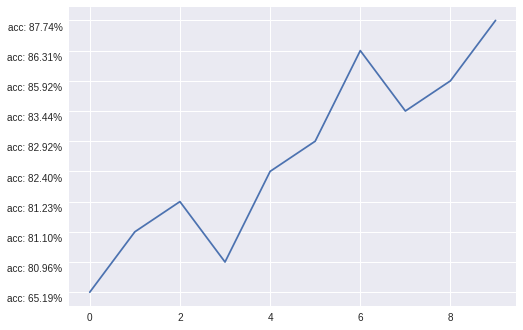

In [14]:
plt.plot(analysisdf["accuracy"])

So its quite evident that the accuracy is still increasing. So lets see the between 100  and 1000 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(100, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(50, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="relu", kernel_initializer="uniform")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  from ipykernel import kernelapp as app


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 1s 1ms/step - loss: 0.6927 - acc: 0.6803 - val_loss: 0.6920 - val_acc: 0.6429
Epoch 2/150
613/613 [==============================] - 0s 98us/step - loss: 0.6912 - acc: 0.6542 - val_loss: 0.6901 - val_acc: 0.6429
Epoch 3/150
613/613 [==============================] - 0s 98us/step - loss: 0.6885 - acc: 0.6542 - val_loss: 0.6866 - val_acc: 0.6429
Epoch 4/150
613/613 [==============================] - 0s 81us/step - loss: 0.6833 - acc: 0.6525 - val_loss: 0.6791 - val_acc: 0.6429
Epoch 5/150
613/613 [==============================] - 0s 89us/step - loss: 0.6719 - acc: 0.6672 - val_loss: 0.6641 - val_acc: 0.6753
Epoch 6/150
613/613 [==============================] - 0s 94us/step - loss: 0.6518 - acc: 0.7276 - val_loss: 0.6382 - val_acc: 0.7273
Epoch 7/150
613/613 [==============================] - 0s 90us/step - loss: 0.6184 - acc: 0.7455 - val_loss: 0.6019 - val_acc: 0.7597
Epoch 8/150
613/6

613/613 [==============================] - 0s 90us/step - loss: 0.4424 - acc: 0.7961 - val_loss: 0.4785 - val_acc: 0.7727
Epoch 28/150
613/613 [==============================] - 0s 86us/step - loss: 0.4416 - acc: 0.7945 - val_loss: 0.4741 - val_acc: 0.7662
Epoch 29/150
613/613 [==============================] - 0s 89us/step - loss: 0.4405 - acc: 0.7977 - val_loss: 0.4742 - val_acc: 0.7597
Epoch 30/150
613/613 [==============================] - 0s 89us/step - loss: 0.4393 - acc: 0.8026 - val_loss: 0.4761 - val_acc: 0.7597
Epoch 31/150
613/613 [==============================] - 0s 100us/step - loss: 0.4400 - acc: 0.7961 - val_loss: 0.4781 - val_acc: 0.7662
Epoch 32/150
613/613 [==============================] - 0s 88us/step - loss: 0.4377 - acc: 0.7977 - val_loss: 0.4774 - val_acc: 0.7662
Epoch 33/150
613/613 [==============================] - 0s 95us/step - loss: 0.4366 - acc: 0.8026 - val_loss: 0.4805 - val_acc: 0.7727
Epoch 34/150
613/613 [==============================] - 0s 87us/ste

613/613 [==============================] - 0s 87us/step - loss: 0.4196 - acc: 0.8108 - val_loss: 0.4822 - val_acc: 0.7792
Epoch 54/150
613/613 [==============================] - 0s 90us/step - loss: 0.4185 - acc: 0.8124 - val_loss: 0.4798 - val_acc: 0.7857
Epoch 55/150
613/613 [==============================] - 0s 89us/step - loss: 0.4178 - acc: 0.8091 - val_loss: 0.4768 - val_acc: 0.7727
Epoch 56/150
613/613 [==============================] - 0s 89us/step - loss: 0.4177 - acc: 0.8042 - val_loss: 0.4808 - val_acc: 0.7597
Epoch 57/150
613/613 [==============================] - 0s 89us/step - loss: 0.4159 - acc: 0.8075 - val_loss: 0.4774 - val_acc: 0.7922
Epoch 58/150
613/613 [==============================] - 0s 94us/step - loss: 0.4170 - acc: 0.8108 - val_loss: 0.4795 - val_acc: 0.7857
Epoch 59/150
613/613 [==============================] - 0s 88us/step - loss: 0.4149 - acc: 0.8108 - val_loss: 0.4823 - val_acc: 0.7857
Epoch 60/150
613/613 [==============================] - 0s 88us/step

613/613 [==============================] - 0s 94us/step - loss: 0.3956 - acc: 0.8222 - val_loss: 0.4857 - val_acc: 0.7792
Epoch 80/150
613/613 [==============================] - 0s 91us/step - loss: 0.3954 - acc: 0.8206 - val_loss: 0.4896 - val_acc: 0.7792
Epoch 81/150
613/613 [==============================] - 0s 90us/step - loss: 0.3947 - acc: 0.8173 - val_loss: 0.4852 - val_acc: 0.8052
Epoch 82/150
613/613 [==============================] - 0s 90us/step - loss: 0.3935 - acc: 0.8238 - val_loss: 0.4888 - val_acc: 0.8052
Epoch 83/150
613/613 [==============================] - 0s 88us/step - loss: 0.3908 - acc: 0.8222 - val_loss: 0.4993 - val_acc: 0.7922
Epoch 84/150
613/613 [==============================] - 0s 107us/step - loss: 0.3908 - acc: 0.8238 - val_loss: 0.5012 - val_acc: 0.7922
Epoch 85/150
613/613 [==============================] - 0s 93us/step - loss: 0.3898 - acc: 0.8206 - val_loss: 0.4925 - val_acc: 0.7792
Epoch 86/150
613/613 [==============================] - 0s 91us/ste

613/613 [==============================] - 0s 98us/step - loss: 0.3578 - acc: 0.8418 - val_loss: 0.5175 - val_acc: 0.8182
Epoch 106/150
613/613 [==============================] - 0s 90us/step - loss: 0.3556 - acc: 0.8483 - val_loss: 0.5192 - val_acc: 0.8052
Epoch 107/150
613/613 [==============================] - 0s 89us/step - loss: 0.3514 - acc: 0.8467 - val_loss: 0.5248 - val_acc: 0.8052
Epoch 108/150
613/613 [==============================] - 0s 91us/step - loss: 0.3507 - acc: 0.8467 - val_loss: 0.5310 - val_acc: 0.8052
Epoch 109/150
613/613 [==============================] - 0s 88us/step - loss: 0.3506 - acc: 0.8401 - val_loss: 0.5365 - val_acc: 0.7987
Epoch 110/150
613/613 [==============================] - 0s 94us/step - loss: 0.3468 - acc: 0.8450 - val_loss: 0.5202 - val_acc: 0.8182
Epoch 111/150
613/613 [==============================] - 0s 99us/step - loss: 0.3471 - acc: 0.8532 - val_loss: 0.5217 - val_acc: 0.8117
Epoch 112/150
613/613 [==============================] - 0s 88

613/613 [==============================] - 0s 105us/step - loss: 0.3074 - acc: 0.8744 - val_loss: 0.5727 - val_acc: 0.8182
Epoch 132/150
613/613 [==============================] - 0s 92us/step - loss: 0.2962 - acc: 0.8744 - val_loss: 0.5957 - val_acc: 0.7987
Epoch 133/150
613/613 [==============================] - 0s 89us/step - loss: 0.2917 - acc: 0.8809 - val_loss: 0.5913 - val_acc: 0.8117
Epoch 134/150
613/613 [==============================] - 0s 84us/step - loss: 0.2907 - acc: 0.8825 - val_loss: 0.5922 - val_acc: 0.7987
Epoch 135/150
613/613 [==============================] - 0s 83us/step - loss: 0.2891 - acc: 0.8809 - val_loss: 0.5822 - val_acc: 0.8182
Epoch 136/150
613/613 [==============================] - 0s 81us/step - loss: 0.2889 - acc: 0.8809 - val_loss: 0.6125 - val_acc: 0.8117
Epoch 137/150
613/613 [==============================] - 0s 83us/step - loss: 0.2838 - acc: 0.8825 - val_loss: 0.5972 - val_acc: 0.8117
Epoch 138/150
613/613 [==============================] - 0s 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(100, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(20, activation="relu", kernel_initializer="uniform")`
  


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 1s 1ms/step - loss: 0.6919 - acc: 0.6542 - val_loss: 0.6893 - val_acc: 0.6429
Epoch 2/150
613/613 [==============================] - 0s 101us/step - loss: 0.6851 - acc: 0.6558 - val_loss: 0.6774 - val_acc: 0.6364
Epoch 3/150
613/613 [==============================] - 0s 95us/step - loss: 0.6639 - acc: 0.6982 - val_loss: 0.6449 - val_acc: 0.6818
Epoch 4/150
613/613 [==============================] - 0s 97us/step - loss: 0.6176 - acc: 0.7374 - val_loss: 0.5858 - val_acc: 0.7143
Epoch 5/150
613/613 [==============================] - 0s 90us/step - loss: 0.5507 - acc: 0.7439 - val_loss: 0.5311 - val_acc: 0.7403
Epoch 6/150
613/613 [==============================] - 0s 89us/step - loss: 0.5134 - acc: 0.7586 - val_loss: 0.5081 - val_acc: 0.7662
Epoch 7/150
613/613 [==============================] - 0s 90us/step - loss: 0.4912 - acc: 0.7781 - val_loss: 0.4883 - val_acc: 0.7727
Epoch 8/150
613/

613/613 [==============================] - 0s 88us/step - loss: 0.4211 - acc: 0.8108 - val_loss: 0.4781 - val_acc: 0.7597
Epoch 28/150
613/613 [==============================] - 0s 92us/step - loss: 0.4210 - acc: 0.8157 - val_loss: 0.4784 - val_acc: 0.7727
Epoch 29/150
613/613 [==============================] - 0s 92us/step - loss: 0.4190 - acc: 0.8173 - val_loss: 0.4843 - val_acc: 0.7792
Epoch 30/150
613/613 [==============================] - 0s 105us/step - loss: 0.4173 - acc: 0.8157 - val_loss: 0.4844 - val_acc: 0.7727
Epoch 31/150
613/613 [==============================] - 0s 90us/step - loss: 0.4187 - acc: 0.8157 - val_loss: 0.4858 - val_acc: 0.7792
Epoch 32/150
613/613 [==============================] - 0s 95us/step - loss: 0.4159 - acc: 0.8140 - val_loss: 0.4833 - val_acc: 0.7987
Epoch 33/150
613/613 [==============================] - 0s 94us/step - loss: 0.4157 - acc: 0.8189 - val_loss: 0.4879 - val_acc: 0.7662
Epoch 34/150
613/613 [==============================] - 0s 93us/ste

613/613 [==============================] - 0s 87us/step - loss: 0.3891 - acc: 0.8401 - val_loss: 0.5000 - val_acc: 0.7987
Epoch 54/150
613/613 [==============================] - 0s 85us/step - loss: 0.3829 - acc: 0.8320 - val_loss: 0.4993 - val_acc: 0.7857
Epoch 55/150
613/613 [==============================] - 0s 97us/step - loss: 0.3839 - acc: 0.8320 - val_loss: 0.5002 - val_acc: 0.7857
Epoch 56/150
613/613 [==============================] - 0s 101us/step - loss: 0.3814 - acc: 0.8336 - val_loss: 0.5103 - val_acc: 0.7922
Epoch 57/150
613/613 [==============================] - 0s 94us/step - loss: 0.3809 - acc: 0.8385 - val_loss: 0.5021 - val_acc: 0.7922
Epoch 58/150
613/613 [==============================] - 0s 88us/step - loss: 0.3777 - acc: 0.8418 - val_loss: 0.5092 - val_acc: 0.7792
Epoch 59/150
613/613 [==============================] - 0s 89us/step - loss: 0.3738 - acc: 0.8352 - val_loss: 0.5091 - val_acc: 0.7792
Epoch 60/150
613/613 [==============================] - 0s 93us/ste

613/613 [==============================] - 0s 91us/step - loss: 0.3264 - acc: 0.8597 - val_loss: 0.5702 - val_acc: 0.7662
Epoch 80/150
613/613 [==============================] - 0s 97us/step - loss: 0.3229 - acc: 0.8662 - val_loss: 0.5783 - val_acc: 0.7662
Epoch 81/150
613/613 [==============================] - 0s 96us/step - loss: 0.3229 - acc: 0.8581 - val_loss: 0.5673 - val_acc: 0.7857
Epoch 82/150
613/613 [==============================] - 0s 91us/step - loss: 0.3163 - acc: 0.8679 - val_loss: 0.5878 - val_acc: 0.7987
Epoch 83/150
613/613 [==============================] - 0s 90us/step - loss: 0.3115 - acc: 0.8613 - val_loss: 0.5788 - val_acc: 0.7987
Epoch 84/150
613/613 [==============================] - 0s 106us/step - loss: 0.3101 - acc: 0.8744 - val_loss: 0.5886 - val_acc: 0.7532
Epoch 85/150
613/613 [==============================] - 0s 92us/step - loss: 0.3046 - acc: 0.8728 - val_loss: 0.5865 - val_acc: 0.7857
Epoch 86/150
613/613 [==============================] - 0s 92us/ste

Epoch 105/150
613/613 [==============================] - 0s 91us/step - loss: 0.2348 - acc: 0.8956 - val_loss: 0.7601 - val_acc: 0.7273
Epoch 106/150
613/613 [==============================] - 0s 92us/step - loss: 0.2283 - acc: 0.9119 - val_loss: 0.7781 - val_acc: 0.7532
Epoch 107/150
613/613 [==============================] - 0s 83us/step - loss: 0.2167 - acc: 0.9119 - val_loss: 0.7871 - val_acc: 0.7468
Epoch 108/150
613/613 [==============================] - 0s 104us/step - loss: 0.2045 - acc: 0.9413 - val_loss: 0.8026 - val_acc: 0.7403
Epoch 109/150
613/613 [==============================] - 0s 96us/step - loss: 0.2144 - acc: 0.9152 - val_loss: 0.8055 - val_acc: 0.7597
Epoch 110/150
613/613 [==============================] - 0s 106us/step - loss: 0.2023 - acc: 0.9201 - val_loss: 0.8302 - val_acc: 0.7208
Epoch 111/150
613/613 [==============================] - 0s 97us/step - loss: 0.1898 - acc: 0.9429 - val_loss: 0.8141 - val_acc: 0.7532
Epoch 112/150
613/613 [=======================

613/613 [==============================] - 0s 90us/step - loss: 0.1824 - acc: 0.9217 - val_loss: 1.1958 - val_acc: 0.7338
Epoch 132/150
613/613 [==============================] - 0s 100us/step - loss: 0.1676 - acc: 0.9282 - val_loss: 1.1036 - val_acc: 0.7662
Epoch 133/150
613/613 [==============================] - 0s 91us/step - loss: 0.1475 - acc: 0.9494 - val_loss: 1.1470 - val_acc: 0.7208
Epoch 134/150
613/613 [==============================] - 0s 91us/step - loss: 0.1353 - acc: 0.9511 - val_loss: 1.1096 - val_acc: 0.7208
Epoch 135/150
613/613 [==============================] - 0s 93us/step - loss: 0.1282 - acc: 0.9625 - val_loss: 1.2151 - val_acc: 0.7532
Epoch 136/150
613/613 [==============================] - 0s 88us/step - loss: 0.1310 - acc: 0.9494 - val_loss: 1.1073 - val_acc: 0.7468
Epoch 137/150
613/613 [==============================] - 0s 92us/step - loss: 0.1228 - acc: 0.9592 - val_loss: 1.2025 - val_acc: 0.7468
Epoch 138/150
613/613 [==============================] - 0s 8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(300, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(150, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, activation="relu", kernel_initializer="uniform")`
  


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 1s 1ms/step - loss: 0.6916 - acc: 0.6069 - val_loss: 0.6876 - val_acc: 0.6364
Epoch 2/150
613/613 [==============================] - 0s 94us/step - loss: 0.6799 - acc: 0.7031 - val_loss: 0.6664 - val_acc: 0.6948
Epoch 3/150
613/613 [==============================] - 0s 92us/step - loss: 0.6403 - acc: 0.7390 - val_loss: 0.6085 - val_acc: 0.7338
Epoch 4/150
613/613 [==============================] - 0s 93us/step - loss: 0.5652 - acc: 0.7455 - val_loss: 0.5340 - val_acc: 0.7597
Epoch 5/150
613/613 [==============================] - 0s 96us/step - loss: 0.4991 - acc: 0.7716 - val_loss: 0.4988 - val_acc: 0.7792
Epoch 6/150
613/613 [==============================] - 0s 94us/step - loss: 0.4779 - acc: 0.7700 - val_loss: 0.4831 - val_acc: 0.7532
Epoch 7/150
613/613 [==============================] - 0s 96us/step - loss: 0.4647 - acc: 0.7781 - val_loss: 0.4750 - val_acc: 0.7468
Epoch 8/150
613/6

613/613 [==============================] - 0s 90us/step - loss: 0.4101 - acc: 0.8173 - val_loss: 0.4732 - val_acc: 0.7987
Epoch 28/150
613/613 [==============================] - 0s 87us/step - loss: 0.4070 - acc: 0.8189 - val_loss: 0.4777 - val_acc: 0.7922
Epoch 29/150
613/613 [==============================] - 0s 103us/step - loss: 0.4040 - acc: 0.8157 - val_loss: 0.4799 - val_acc: 0.7922
Epoch 30/150
613/613 [==============================] - 0s 91us/step - loss: 0.4005 - acc: 0.8271 - val_loss: 0.4762 - val_acc: 0.8052
Epoch 31/150
613/613 [==============================] - 0s 94us/step - loss: 0.4017 - acc: 0.8189 - val_loss: 0.4770 - val_acc: 0.7987
Epoch 32/150
613/613 [==============================] - 0s 86us/step - loss: 0.4002 - acc: 0.8254 - val_loss: 0.4773 - val_acc: 0.8117
Epoch 33/150
613/613 [==============================] - 0s 88us/step - loss: 0.3990 - acc: 0.8254 - val_loss: 0.4850 - val_acc: 0.8052
Epoch 34/150
613/613 [==============================] - 0s 89us/ste

613/613 [==============================] - 0s 86us/step - loss: 0.3388 - acc: 0.8434 - val_loss: 0.4993 - val_acc: 0.8312
Epoch 54/150
613/613 [==============================] - 0s 87us/step - loss: 0.3362 - acc: 0.8597 - val_loss: 0.5173 - val_acc: 0.8182
Epoch 55/150
613/613 [==============================] - 0s 86us/step - loss: 0.3271 - acc: 0.8564 - val_loss: 0.5149 - val_acc: 0.8182
Epoch 56/150
613/613 [==============================] - 0s 95us/step - loss: 0.3307 - acc: 0.8597 - val_loss: 0.5109 - val_acc: 0.8182
Epoch 57/150
613/613 [==============================] - 0s 93us/step - loss: 0.3235 - acc: 0.8613 - val_loss: 0.5149 - val_acc: 0.8182
Epoch 58/150
613/613 [==============================] - 0s 86us/step - loss: 0.3186 - acc: 0.8581 - val_loss: 0.5329 - val_acc: 0.7857
Epoch 59/150
613/613 [==============================] - 0s 88us/step - loss: 0.3129 - acc: 0.8646 - val_loss: 0.5240 - val_acc: 0.8117
Epoch 60/150
613/613 [==============================] - 0s 87us/step

613/613 [==============================] - 0s 87us/step - loss: 0.2449 - acc: 0.8907 - val_loss: 0.6467 - val_acc: 0.7987
Epoch 80/150
613/613 [==============================] - 0s 88us/step - loss: 0.2381 - acc: 0.9119 - val_loss: 0.6194 - val_acc: 0.8182
Epoch 81/150
613/613 [==============================] - 0s 90us/step - loss: 0.2423 - acc: 0.9054 - val_loss: 0.6670 - val_acc: 0.7727
Epoch 82/150
613/613 [==============================] - 0s 86us/step - loss: 0.2570 - acc: 0.8956 - val_loss: 0.6615 - val_acc: 0.7987
Epoch 83/150
613/613 [==============================] - 0s 93us/step - loss: 0.2252 - acc: 0.9070 - val_loss: 0.6563 - val_acc: 0.7922
Epoch 84/150
613/613 [==============================] - 0s 101us/step - loss: 0.2246 - acc: 0.9103 - val_loss: 0.6729 - val_acc: 0.7727
Epoch 85/150
613/613 [==============================] - 0s 91us/step - loss: 0.2174 - acc: 0.9168 - val_loss: 0.6765 - val_acc: 0.8052
Epoch 86/150
613/613 [==============================] - 0s 87us/ste

613/613 [==============================] - 0s 86us/step - loss: 0.2164 - acc: 0.9103 - val_loss: 0.9734 - val_acc: 0.7662
Epoch 106/150
613/613 [==============================] - 0s 92us/step - loss: 0.2173 - acc: 0.9054 - val_loss: 0.8671 - val_acc: 0.7727
Epoch 107/150
613/613 [==============================] - 0s 91us/step - loss: 0.1694 - acc: 0.9380 - val_loss: 0.9085 - val_acc: 0.7013
Epoch 108/150
613/613 [==============================] - 0s 90us/step - loss: 0.1997 - acc: 0.9217 - val_loss: 0.9392 - val_acc: 0.7597
Epoch 109/150
613/613 [==============================] - 0s 91us/step - loss: 0.1685 - acc: 0.9282 - val_loss: 0.8780 - val_acc: 0.7727
Epoch 110/150
613/613 [==============================] - 0s 98us/step - loss: 0.1580 - acc: 0.9315 - val_loss: 0.8994 - val_acc: 0.7403
Epoch 111/150
613/613 [==============================] - 0s 92us/step - loss: 0.1385 - acc: 0.9543 - val_loss: 0.9006 - val_acc: 0.7792
Epoch 112/150
613/613 [==============================] - 0s 85

613/613 [==============================] - 0s 88us/step - loss: 0.0942 - acc: 0.9657 - val_loss: 1.2115 - val_acc: 0.7273
Epoch 132/150
613/613 [==============================] - 0s 89us/step - loss: 0.1407 - acc: 0.9560 - val_loss: 1.2287 - val_acc: 0.7597
Epoch 133/150
613/613 [==============================] - 0s 91us/step - loss: 0.1401 - acc: 0.9429 - val_loss: 1.1460 - val_acc: 0.7338
Epoch 134/150
613/613 [==============================] - 0s 92us/step - loss: 0.1492 - acc: 0.9413 - val_loss: 1.1826 - val_acc: 0.7532
Epoch 135/150
613/613 [==============================] - 0s 91us/step - loss: 0.1647 - acc: 0.9364 - val_loss: 1.1625 - val_acc: 0.7338
Epoch 136/150
613/613 [==============================] - 0s 95us/step - loss: 0.1165 - acc: 0.9576 - val_loss: 1.2023 - val_acc: 0.7532
Epoch 137/150
613/613 [==============================] - 0s 92us/step - loss: 0.0879 - acc: 0.9657 - val_loss: 1.2512 - val_acc: 0.7468
Epoch 138/150
613/613 [==============================] - 0s 90

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(400, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(40, activation="relu", kernel_initializer="uniform")`
  


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 1s 1ms/step - loss: 0.6892 - acc: 0.6900 - val_loss: 0.6794 - val_acc: 0.6883
Epoch 2/150
613/613 [==============================] - 0s 101us/step - loss: 0.6615 - acc: 0.7276 - val_loss: 0.6307 - val_acc: 0.7208
Epoch 3/150
613/613 [==============================] - 0s 84us/step - loss: 0.5823 - acc: 0.7423 - val_loss: 0.5422 - val_acc: 0.7597
Epoch 4/150
613/613 [==============================] - 0s 89us/step - loss: 0.5050 - acc: 0.7618 - val_loss: 0.5041 - val_acc: 0.7792
Epoch 5/150
613/613 [==============================] - 0s 91us/step - loss: 0.4730 - acc: 0.7716 - val_loss: 0.4736 - val_acc: 0.7727
Epoch 6/150
613/613 [==============================] - 0s 100us/step - loss: 0.4622 - acc: 0.7896 - val_loss: 0.4687 - val_acc: 0.7597
Epoch 7/150
613/613 [==============================] - 0s 87us/step - loss: 0.4548 - acc: 0.7814 - val_loss: 0.4800 - val_acc: 0.7662
Epoch 8/150
613

613/613 [==============================] - 0s 92us/step - loss: 0.4049 - acc: 0.8206 - val_loss: 0.4903 - val_acc: 0.7857
Epoch 28/150
613/613 [==============================] - 0s 101us/step - loss: 0.4000 - acc: 0.8140 - val_loss: 0.4800 - val_acc: 0.8117
Epoch 29/150
613/613 [==============================] - 0s 87us/step - loss: 0.3960 - acc: 0.8206 - val_loss: 0.4839 - val_acc: 0.8052
Epoch 30/150
613/613 [==============================] - 0s 91us/step - loss: 0.3914 - acc: 0.8189 - val_loss: 0.4805 - val_acc: 0.8182
Epoch 31/150
613/613 [==============================] - 0s 93us/step - loss: 0.3901 - acc: 0.8206 - val_loss: 0.4817 - val_acc: 0.8182
Epoch 32/150
613/613 [==============================] - 0s 90us/step - loss: 0.3911 - acc: 0.8189 - val_loss: 0.4844 - val_acc: 0.8247
Epoch 33/150
613/613 [==============================] - 0s 92us/step - loss: 0.3897 - acc: 0.8222 - val_loss: 0.4935 - val_acc: 0.7987
Epoch 34/150
613/613 [==============================] - 0s 91us/ste

613/613 [==============================] - 0s 92us/step - loss: 0.3032 - acc: 0.8809 - val_loss: 0.5631 - val_acc: 0.8117
Epoch 54/150
613/613 [==============================] - 0s 90us/step - loss: 0.2938 - acc: 0.8858 - val_loss: 0.5641 - val_acc: 0.8117
Epoch 55/150
613/613 [==============================] - 0s 85us/step - loss: 0.2814 - acc: 0.8923 - val_loss: 0.5798 - val_acc: 0.7922
Epoch 56/150
613/613 [==============================] - 0s 96us/step - loss: 0.2908 - acc: 0.8777 - val_loss: 0.5591 - val_acc: 0.7922
Epoch 57/150
613/613 [==============================] - 0s 88us/step - loss: 0.2840 - acc: 0.8891 - val_loss: 0.6353 - val_acc: 0.7338
Epoch 58/150
613/613 [==============================] - 0s 88us/step - loss: 0.2821 - acc: 0.8923 - val_loss: 0.6144 - val_acc: 0.7792
Epoch 59/150
613/613 [==============================] - 0s 91us/step - loss: 0.2753 - acc: 0.8874 - val_loss: 0.6065 - val_acc: 0.8052
Epoch 60/150
613/613 [==============================] - 0s 88us/step

613/613 [==============================] - 0s 89us/step - loss: 0.2143 - acc: 0.9152 - val_loss: 0.8083 - val_acc: 0.7468
Epoch 80/150
613/613 [==============================] - 0s 93us/step - loss: 0.1699 - acc: 0.9429 - val_loss: 0.8551 - val_acc: 0.6818
Epoch 81/150
613/613 [==============================] - 0s 90us/step - loss: 0.1896 - acc: 0.9233 - val_loss: 0.8809 - val_acc: 0.7403
Epoch 82/150
613/613 [==============================] - 0s 88us/step - loss: 0.2047 - acc: 0.9217 - val_loss: 0.8719 - val_acc: 0.7338
Epoch 83/150
613/613 [==============================] - 0s 100us/step - loss: 0.1899 - acc: 0.9282 - val_loss: 0.7843 - val_acc: 0.7597
Epoch 84/150
613/613 [==============================] - 0s 94us/step - loss: 0.1867 - acc: 0.9331 - val_loss: 0.9010 - val_acc: 0.7403
Epoch 85/150
613/613 [==============================] - 0s 92us/step - loss: 0.1604 - acc: 0.9413 - val_loss: 0.7950 - val_acc: 0.7338
Epoch 86/150
613/613 [==============================] - 0s 90us/ste

613/613 [==============================] - 0s 88us/step - loss: 0.1671 - acc: 0.9347 - val_loss: 1.1717 - val_acc: 0.7597
Epoch 106/150
613/613 [==============================] - 0s 87us/step - loss: 0.1854 - acc: 0.9233 - val_loss: 1.0997 - val_acc: 0.7013
Epoch 107/150
613/613 [==============================] - 0s 97us/step - loss: 0.2127 - acc: 0.9217 - val_loss: 1.2738 - val_acc: 0.7208
Epoch 108/150
613/613 [==============================] - 0s 87us/step - loss: 0.1766 - acc: 0.9315 - val_loss: 1.0628 - val_acc: 0.7532
Epoch 109/150
613/613 [==============================] - 0s 88us/step - loss: 0.1401 - acc: 0.9478 - val_loss: 1.0862 - val_acc: 0.7468
Epoch 110/150
613/613 [==============================] - 0s 89us/step - loss: 0.1194 - acc: 0.9543 - val_loss: 1.0336 - val_acc: 0.7143
Epoch 111/150
613/613 [==============================] - 0s 82us/step - loss: 0.1024 - acc: 0.9690 - val_loss: 1.0449 - val_acc: 0.7338
Epoch 112/150
613/613 [==============================] - 0s 86

613/613 [==============================] - 0s 91us/step - loss: 0.0567 - acc: 0.9853 - val_loss: 1.4349 - val_acc: 0.7078
Epoch 132/150
613/613 [==============================] - 0s 88us/step - loss: 0.0757 - acc: 0.9723 - val_loss: 1.2176 - val_acc: 0.7532
Epoch 133/150
613/613 [==============================] - 0s 87us/step - loss: 0.0657 - acc: 0.9755 - val_loss: 1.3488 - val_acc: 0.7273
Epoch 134/150
613/613 [==============================] - 0s 95us/step - loss: 0.1175 - acc: 0.9527 - val_loss: 1.2212 - val_acc: 0.7468
Epoch 135/150
613/613 [==============================] - 0s 85us/step - loss: 0.2066 - acc: 0.9413 - val_loss: 1.5389 - val_acc: 0.6948
Epoch 136/150
613/613 [==============================] - 0s 89us/step - loss: 0.2678 - acc: 0.9184 - val_loss: 1.4443 - val_acc: 0.7338
Epoch 137/150
613/613 [==============================] - 0s 94us/step - loss: 0.2571 - acc: 0.9135 - val_loss: 1.3107 - val_acc: 0.7338
Epoch 138/150
613/613 [==============================] - 0s 93

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(500, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(250, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(50, activation="relu", kernel_initializer="uniform")`
  


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 1s 1ms/step - loss: 0.6891 - acc: 0.6737 - val_loss: 0.6774 - val_acc: 0.7143
Epoch 2/150
613/613 [==============================] - 0s 94us/step - loss: 0.6550 - acc: 0.7488 - val_loss: 0.6131 - val_acc: 0.7662
Epoch 3/150
613/613 [==============================] - 0s 88us/step - loss: 0.5542 - acc: 0.7635 - val_loss: 0.5137 - val_acc: 0.7922
Epoch 4/150
613/613 [==============================] - 0s 93us/step - loss: 0.4842 - acc: 0.7716 - val_loss: 0.4952 - val_acc: 0.7532
Epoch 5/150
613/613 [==============================] - 0s 90us/step - loss: 0.4678 - acc: 0.7814 - val_loss: 0.4722 - val_acc: 0.7532
Epoch 6/150
613/613 [==============================] - 0s 94us/step - loss: 0.4526 - acc: 0.7928 - val_loss: 0.4779 - val_acc: 0.7597
Epoch 7/150
613/613 [==============================] - 0s 93us/step - loss: 0.4506 - acc: 0.7896 - val_loss: 0.4838 - val_acc: 0.7727
Epoch 8/150
613/6

613/613 [==============================] - 0s 90us/step - loss: 0.4026 - acc: 0.8173 - val_loss: 0.4924 - val_acc: 0.7922
Epoch 28/150
613/613 [==============================] - 0s 90us/step - loss: 0.3994 - acc: 0.8075 - val_loss: 0.4839 - val_acc: 0.7987
Epoch 29/150
613/613 [==============================] - 0s 100us/step - loss: 0.3881 - acc: 0.8173 - val_loss: 0.5006 - val_acc: 0.7987
Epoch 30/150
613/613 [==============================] - 0s 89us/step - loss: 0.3828 - acc: 0.8157 - val_loss: 0.4820 - val_acc: 0.8182
Epoch 31/150
613/613 [==============================] - 0s 88us/step - loss: 0.3809 - acc: 0.8303 - val_loss: 0.4900 - val_acc: 0.7922
Epoch 32/150
613/613 [==============================] - 0s 88us/step - loss: 0.3756 - acc: 0.8385 - val_loss: 0.4928 - val_acc: 0.8117
Epoch 33/150
613/613 [==============================] - 0s 88us/step - loss: 0.3743 - acc: 0.8320 - val_loss: 0.4987 - val_acc: 0.7987
Epoch 34/150
613/613 [==============================] - 0s 90us/ste

613/613 [==============================] - 0s 89us/step - loss: 0.2917 - acc: 0.8711 - val_loss: 0.6233 - val_acc: 0.7727
Epoch 54/150
613/613 [==============================] - 0s 89us/step - loss: 0.2674 - acc: 0.8891 - val_loss: 0.5846 - val_acc: 0.7987
Epoch 55/150
613/613 [==============================] - 0s 88us/step - loss: 0.2526 - acc: 0.9086 - val_loss: 0.6071 - val_acc: 0.7857
Epoch 56/150
613/613 [==============================] - 0s 94us/step - loss: 0.2572 - acc: 0.9005 - val_loss: 0.6052 - val_acc: 0.7987
Epoch 57/150
613/613 [==============================] - 0s 88us/step - loss: 0.2566 - acc: 0.8956 - val_loss: 0.7184 - val_acc: 0.7468
Epoch 58/150
613/613 [==============================] - 0s 97us/step - loss: 0.2698 - acc: 0.8956 - val_loss: 0.6414 - val_acc: 0.7922
Epoch 59/150
613/613 [==============================] - 0s 89us/step - loss: 0.2544 - acc: 0.8809 - val_loss: 0.6144 - val_acc: 0.7922
Epoch 60/150
613/613 [==============================] - 0s 85us/step

613/613 [==============================] - 0s 91us/step - loss: 0.1412 - acc: 0.9429 - val_loss: 0.8489 - val_acc: 0.7727
Epoch 80/150
613/613 [==============================] - 0s 87us/step - loss: 0.1152 - acc: 0.9592 - val_loss: 0.9988 - val_acc: 0.7532
Epoch 81/150
613/613 [==============================] - 0s 92us/step - loss: 0.1636 - acc: 0.9396 - val_loss: 0.8669 - val_acc: 0.7922
Epoch 82/150
613/613 [==============================] - 0s 103us/step - loss: 0.1714 - acc: 0.9299 - val_loss: 1.0942 - val_acc: 0.7273
Epoch 83/150
613/613 [==============================] - 0s 90us/step - loss: 0.1928 - acc: 0.9086 - val_loss: 1.0749 - val_acc: 0.7662
Epoch 84/150
613/613 [==============================] - 0s 92us/step - loss: 0.2378 - acc: 0.9021 - val_loss: 0.8815 - val_acc: 0.7857
Epoch 85/150
613/613 [==============================] - 0s 86us/step - loss: 0.1614 - acc: 0.9347 - val_loss: 1.0404 - val_acc: 0.7208
Epoch 86/150
613/613 [==============================] - 0s 90us/ste

613/613 [==============================] - 0s 92us/step - loss: 0.0904 - acc: 0.9706 - val_loss: 1.2182 - val_acc: 0.7532
Epoch 106/150
613/613 [==============================] - 0s 90us/step - loss: 0.1009 - acc: 0.9657 - val_loss: 1.3145 - val_acc: 0.7208
Epoch 107/150
613/613 [==============================] - 0s 105us/step - loss: 0.1608 - acc: 0.9396 - val_loss: 1.3027 - val_acc: 0.7597
Epoch 108/150
613/613 [==============================] - 0s 87us/step - loss: 0.1431 - acc: 0.9462 - val_loss: 1.6473 - val_acc: 0.7532
Epoch 109/150
613/613 [==============================] - 0s 97us/step - loss: 0.2742 - acc: 0.9184 - val_loss: 1.3075 - val_acc: 0.7662
Epoch 110/150
613/613 [==============================] - 0s 87us/step - loss: 0.1954 - acc: 0.9217 - val_loss: 1.2662 - val_acc: 0.7532
Epoch 111/150
613/613 [==============================] - 0s 92us/step - loss: 0.1143 - acc: 0.9478 - val_loss: 1.2200 - val_acc: 0.7403
Epoch 112/150
613/613 [==============================] - 0s 9

613/613 [==============================] - 0s 89us/step - loss: 0.0214 - acc: 0.9984 - val_loss: 1.3374 - val_acc: 0.7662
Epoch 132/150
613/613 [==============================] - 0s 92us/step - loss: 0.0169 - acc: 1.0000 - val_loss: 1.3560 - val_acc: 0.7597
Epoch 133/150
613/613 [==============================] - 0s 91us/step - loss: 0.0172 - acc: 1.0000 - val_loss: 1.3436 - val_acc: 0.7597
Epoch 134/150
613/613 [==============================] - 0s 85us/step - loss: 0.0164 - acc: 0.9984 - val_loss: 1.3521 - val_acc: 0.7662
Epoch 135/150
613/613 [==============================] - 0s 93us/step - loss: 0.0162 - acc: 1.0000 - val_loss: 1.3762 - val_acc: 0.7597
Epoch 136/150
613/613 [==============================] - 0s 100us/step - loss: 0.0147 - acc: 1.0000 - val_loss: 1.4049 - val_acc: 0.7662
Epoch 137/150
613/613 [==============================] - 0s 93us/step - loss: 0.0142 - acc: 1.0000 - val_loss: 1.4005 - val_acc: 0.7532
Epoch 138/150
613/613 [==============================] - 0s 9

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(600, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(300, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(60, activation="relu", kernel_initializer="uniform")`
  


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 1s 1ms/step - loss: 0.6868 - acc: 0.6721 - val_loss: 0.6675 - val_acc: 0.7338
Epoch 2/150
613/613 [==============================] - 0s 103us/step - loss: 0.6344 - acc: 0.7553 - val_loss: 0.5776 - val_acc: 0.7792
Epoch 3/150
613/613 [==============================] - 0s 85us/step - loss: 0.5157 - acc: 0.7667 - val_loss: 0.4957 - val_acc: 0.7792
Epoch 4/150
613/613 [==============================] - 0s 88us/step - loss: 0.4738 - acc: 0.7830 - val_loss: 0.4906 - val_acc: 0.7597
Epoch 5/150
613/613 [==============================] - 0s 93us/step - loss: 0.4636 - acc: 0.7814 - val_loss: 0.4761 - val_acc: 0.7662
Epoch 6/150
613/613 [==============================] - 0s 92us/step - loss: 0.4496 - acc: 0.7863 - val_loss: 0.4846 - val_acc: 0.7597
Epoch 7/150
613/613 [==============================] - 0s 87us/step - loss: 0.4476 - acc: 0.7896 - val_loss: 0.4816 - val_acc: 0.7597
Epoch 8/150
613/

613/613 [==============================] - 0s 88us/step - loss: 0.4032 - acc: 0.8173 - val_loss: 0.4855 - val_acc: 0.7727
Epoch 28/150
613/613 [==============================] - 0s 92us/step - loss: 0.3969 - acc: 0.8173 - val_loss: 0.4777 - val_acc: 0.8117
Epoch 29/150
613/613 [==============================] - 0s 89us/step - loss: 0.3779 - acc: 0.8222 - val_loss: 0.5010 - val_acc: 0.7987
Epoch 30/150
613/613 [==============================] - 0s 92us/step - loss: 0.3709 - acc: 0.8352 - val_loss: 0.4830 - val_acc: 0.8052
Epoch 31/150
613/613 [==============================] - 0s 90us/step - loss: 0.3694 - acc: 0.8369 - val_loss: 0.4958 - val_acc: 0.8052
Epoch 32/150
613/613 [==============================] - 0s 97us/step - loss: 0.3623 - acc: 0.8401 - val_loss: 0.4982 - val_acc: 0.7987
Epoch 33/150
613/613 [==============================] - 0s 89us/step - loss: 0.3612 - acc: 0.8434 - val_loss: 0.4984 - val_acc: 0.7987
Epoch 34/150
613/613 [==============================] - 0s 84us/step

613/613 [==============================] - 0s 91us/step - loss: 0.2446 - acc: 0.8891 - val_loss: 0.6508 - val_acc: 0.7987
Epoch 54/150
613/613 [==============================] - 0s 108us/step - loss: 0.2291 - acc: 0.9021 - val_loss: 0.7074 - val_acc: 0.7922
Epoch 55/150
613/613 [==============================] - 0s 92us/step - loss: 0.2461 - acc: 0.8989 - val_loss: 0.7730 - val_acc: 0.7532
Epoch 56/150
613/613 [==============================] - 0s 89us/step - loss: 0.2556 - acc: 0.8972 - val_loss: 0.6925 - val_acc: 0.7857
Epoch 57/150
613/613 [==============================] - 0s 91us/step - loss: 0.2255 - acc: 0.9005 - val_loss: 0.7442 - val_acc: 0.7662
Epoch 58/150
613/613 [==============================] - 0s 87us/step - loss: 0.2212 - acc: 0.9054 - val_loss: 0.7750 - val_acc: 0.7468
Epoch 59/150
613/613 [==============================] - 0s 89us/step - loss: 0.2323 - acc: 0.8956 - val_loss: 0.7149 - val_acc: 0.7727
Epoch 60/150
613/613 [==============================] - 0s 94us/ste

613/613 [==============================] - 0s 89us/step - loss: 0.1305 - acc: 0.9494 - val_loss: 0.9006 - val_acc: 0.7727
Epoch 80/150
613/613 [==============================] - 0s 88us/step - loss: 0.1199 - acc: 0.9527 - val_loss: 0.9586 - val_acc: 0.7403
Epoch 81/150
613/613 [==============================] - 0s 88us/step - loss: 0.1233 - acc: 0.9527 - val_loss: 1.0021 - val_acc: 0.7792
Epoch 82/150
613/613 [==============================] - 0s 91us/step - loss: 0.1668 - acc: 0.9299 - val_loss: 1.0605 - val_acc: 0.7532
Epoch 83/150
613/613 [==============================] - 0s 86us/step - loss: 0.1754 - acc: 0.9266 - val_loss: 0.9195 - val_acc: 0.7922
Epoch 84/150
613/613 [==============================] - 0s 105us/step - loss: 0.1514 - acc: 0.9364 - val_loss: 1.0757 - val_acc: 0.7468
Epoch 85/150
613/613 [==============================] - 0s 98us/step - loss: 0.1283 - acc: 0.9478 - val_loss: 0.9869 - val_acc: 0.7727
Epoch 86/150
613/613 [==============================] - 0s 88us/ste

613/613 [==============================] - 0s 93us/step - loss: 0.0702 - acc: 0.9739 - val_loss: 1.2920 - val_acc: 0.7597
Epoch 106/150
613/613 [==============================] - 0s 88us/step - loss: 0.0485 - acc: 0.9935 - val_loss: 1.2146 - val_acc: 0.7792
Epoch 107/150
613/613 [==============================] - 0s 88us/step - loss: 0.0382 - acc: 0.9967 - val_loss: 1.3082 - val_acc: 0.7532
Epoch 108/150
613/613 [==============================] - 0s 91us/step - loss: 0.0345 - acc: 0.9918 - val_loss: 1.2996 - val_acc: 0.7597
Epoch 109/150
613/613 [==============================] - 0s 89us/step - loss: 0.0304 - acc: 0.9918 - val_loss: 1.3946 - val_acc: 0.7532
Epoch 110/150
613/613 [==============================] - 0s 100us/step - loss: 0.0303 - acc: 0.9935 - val_loss: 1.3396 - val_acc: 0.7532
Epoch 111/150
613/613 [==============================] - 0s 92us/step - loss: 0.0219 - acc: 1.0000 - val_loss: 1.3576 - val_acc: 0.7532
Epoch 112/150
613/613 [==============================] - 0s 9

613/613 [==============================] - 0s 88us/step - loss: 0.0650 - acc: 0.9821 - val_loss: 1.5439 - val_acc: 0.7208
Epoch 131/150
613/613 [==============================] - 0s 92us/step - loss: 0.0832 - acc: 0.9641 - val_loss: 1.3303 - val_acc: 0.7468
Epoch 132/150
613/613 [==============================] - 0s 88us/step - loss: 0.0566 - acc: 0.9837 - val_loss: 1.3835 - val_acc: 0.7273
Epoch 133/150
613/613 [==============================] - 0s 91us/step - loss: 0.0467 - acc: 0.9902 - val_loss: 1.3537 - val_acc: 0.7468
Epoch 134/150
613/613 [==============================] - 0s 92us/step - loss: 0.0429 - acc: 0.9902 - val_loss: 1.3321 - val_acc: 0.7662
Epoch 135/150
613/613 [==============================] - 0s 106us/step - loss: 0.0286 - acc: 0.9951 - val_loss: 1.3724 - val_acc: 0.7597
Epoch 136/150
613/613 [==============================] - 0s 91us/step - loss: 0.0238 - acc: 1.0000 - val_loss: 1.4390 - val_acc: 0.7597
Epoch 137/150
613/613 [==============================] - 0s 9

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(700, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(350, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(70, activation="relu", kernel_initializer="uniform")`
  


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 1s 1ms/step - loss: 0.6811 - acc: 0.6884 - val_loss: 0.6461 - val_acc: 0.7662
Epoch 2/150
613/613 [==============================] - 0s 94us/step - loss: 0.5936 - acc: 0.7586 - val_loss: 0.5243 - val_acc: 0.7857
Epoch 3/150
613/613 [==============================] - 0s 97us/step - loss: 0.4809 - acc: 0.7651 - val_loss: 0.4891 - val_acc: 0.7662
Epoch 4/150
613/613 [==============================] - 0s 95us/step - loss: 0.4656 - acc: 0.7879 - val_loss: 0.4851 - val_acc: 0.7597
Epoch 5/150
613/613 [==============================] - 0s 91us/step - loss: 0.4528 - acc: 0.7830 - val_loss: 0.4824 - val_acc: 0.7532
Epoch 6/150
613/613 [==============================] - 0s 95us/step - loss: 0.4453 - acc: 0.7912 - val_loss: 0.4835 - val_acc: 0.7597
Epoch 7/150
613/613 [==============================] - 0s 92us/step - loss: 0.4416 - acc: 0.7945 - val_loss: 0.4786 - val_acc: 0.7597
Epoch 8/150
613/6

613/613 [==============================] - 0s 91us/step - loss: 0.4044 - acc: 0.8173 - val_loss: 0.4754 - val_acc: 0.8182
Epoch 28/150
613/613 [==============================] - 0s 89us/step - loss: 0.4006 - acc: 0.8189 - val_loss: 0.4829 - val_acc: 0.8117
Epoch 29/150
613/613 [==============================] - 0s 92us/step - loss: 0.3777 - acc: 0.8206 - val_loss: 0.5073 - val_acc: 0.7987
Epoch 30/150
613/613 [==============================] - 0s 94us/step - loss: 0.3665 - acc: 0.8238 - val_loss: 0.4705 - val_acc: 0.8052
Epoch 31/150
613/613 [==============================] - 0s 90us/step - loss: 0.3646 - acc: 0.8401 - val_loss: 0.4979 - val_acc: 0.7857
Epoch 32/150
613/613 [==============================] - 0s 88us/step - loss: 0.3574 - acc: 0.8352 - val_loss: 0.4907 - val_acc: 0.8312
Epoch 33/150
613/613 [==============================] - 0s 105us/step - loss: 0.3494 - acc: 0.8434 - val_loss: 0.4938 - val_acc: 0.8052
Epoch 34/150
613/613 [==============================] - 0s 92us/ste

613/613 [==============================] - 0s 87us/step - loss: 0.2385 - acc: 0.8940 - val_loss: 0.7316 - val_acc: 0.7727
Epoch 54/150
613/613 [==============================] - 0s 96us/step - loss: 0.2075 - acc: 0.9135 - val_loss: 0.7252 - val_acc: 0.7792
Epoch 55/150
613/613 [==============================] - 0s 88us/step - loss: 0.2036 - acc: 0.9184 - val_loss: 0.7757 - val_acc: 0.7597
Epoch 56/150
613/613 [==============================] - 0s 91us/step - loss: 0.2197 - acc: 0.9184 - val_loss: 0.6688 - val_acc: 0.7727
Epoch 57/150
613/613 [==============================] - 0s 93us/step - loss: 0.1965 - acc: 0.9217 - val_loss: 0.9019 - val_acc: 0.7532
Epoch 58/150
613/613 [==============================] - 0s 106us/step - loss: 0.2247 - acc: 0.9005 - val_loss: 0.8488 - val_acc: 0.7532
Epoch 59/150
613/613 [==============================] - 0s 90us/step - loss: 0.2424 - acc: 0.8891 - val_loss: 0.7757 - val_acc: 0.7662
Epoch 60/150
613/613 [==============================] - 0s 94us/ste

613/613 [==============================] - 0s 101us/step - loss: 0.1169 - acc: 0.9494 - val_loss: 1.1682 - val_acc: 0.7403
Epoch 80/150
613/613 [==============================] - 0s 88us/step - loss: 0.1118 - acc: 0.9527 - val_loss: 1.0896 - val_acc: 0.7143
Epoch 81/150
613/613 [==============================] - 0s 88us/step - loss: 0.1045 - acc: 0.9592 - val_loss: 1.2366 - val_acc: 0.7597
Epoch 82/150
613/613 [==============================] - 0s 96us/step - loss: 0.1155 - acc: 0.9462 - val_loss: 1.2266 - val_acc: 0.7727
Epoch 83/150
613/613 [==============================] - 0s 95us/step - loss: 0.0966 - acc: 0.9641 - val_loss: 1.0768 - val_acc: 0.7662
Epoch 84/150
613/613 [==============================] - 0s 89us/step - loss: 0.1106 - acc: 0.9543 - val_loss: 1.3596 - val_acc: 0.7143
Epoch 85/150
613/613 [==============================] - 0s 87us/step - loss: 0.1171 - acc: 0.9560 - val_loss: 1.2439 - val_acc: 0.7532
Epoch 86/150
613/613 [==============================] - 0s 98us/ste

613/613 [==============================] - 0s 92us/step - loss: 0.1372 - acc: 0.9511 - val_loss: 1.5781 - val_acc: 0.7727
Epoch 106/150
613/613 [==============================] - 0s 84us/step - loss: 0.1156 - acc: 0.9625 - val_loss: 1.6794 - val_acc: 0.7013
Epoch 107/150
613/613 [==============================] - 0s 87us/step - loss: 0.1036 - acc: 0.9608 - val_loss: 1.6382 - val_acc: 0.7532
Epoch 108/150
613/613 [==============================] - 0s 96us/step - loss: 0.1426 - acc: 0.9511 - val_loss: 1.5922 - val_acc: 0.7792
Epoch 109/150
613/613 [==============================] - 0s 94us/step - loss: 0.1465 - acc: 0.9511 - val_loss: 1.6124 - val_acc: 0.7208
Epoch 110/150
613/613 [==============================] - 0s 88us/step - loss: 0.1406 - acc: 0.9396 - val_loss: 1.5822 - val_acc: 0.7403
Epoch 111/150
613/613 [==============================] - 0s 91us/step - loss: 0.1861 - acc: 0.9347 - val_loss: 1.6531 - val_acc: 0.7922
Epoch 112/150
613/613 [==============================] - 0s 88

613/613 [==============================] - 0s 90us/step - loss: 0.0146 - acc: 1.0000 - val_loss: 1.5116 - val_acc: 0.7792
Epoch 132/150
613/613 [==============================] - 0s 92us/step - loss: 0.0124 - acc: 1.0000 - val_loss: 1.5657 - val_acc: 0.7662
Epoch 133/150
613/613 [==============================] - 0s 93us/step - loss: 0.0121 - acc: 1.0000 - val_loss: 1.5405 - val_acc: 0.7857
Epoch 134/150
613/613 [==============================] - 0s 84us/step - loss: 0.0132 - acc: 0.9984 - val_loss: 1.5688 - val_acc: 0.7662
Epoch 135/150
613/613 [==============================] - 0s 87us/step - loss: 0.0125 - acc: 1.0000 - val_loss: 1.5648 - val_acc: 0.7857
Epoch 136/150
613/613 [==============================] - 0s 99us/step - loss: 0.0111 - acc: 1.0000 - val_loss: 1.5845 - val_acc: 0.7857
Epoch 137/150
613/613 [==============================] - 0s 97us/step - loss: 0.0105 - acc: 1.0000 - val_loss: 1.6007 - val_acc: 0.7792
Epoch 138/150
613/613 [==============================] - 0s 93

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(800, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(400, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(80, activation="relu", kernel_initializer="uniform")`
  


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 1s 1ms/step - loss: 0.6751 - acc: 0.7162 - val_loss: 0.6262 - val_acc: 0.7208
Epoch 2/150
613/613 [==============================] - 0s 106us/step - loss: 0.5629 - acc: 0.7504 - val_loss: 0.5039 - val_acc: 0.7727
Epoch 3/150
613/613 [==============================] - 0s 89us/step - loss: 0.4792 - acc: 0.7700 - val_loss: 0.4718 - val_acc: 0.7857
Epoch 4/150
613/613 [==============================] - 0s 89us/step - loss: 0.4628 - acc: 0.7830 - val_loss: 0.4801 - val_acc: 0.7662
Epoch 5/150
613/613 [==============================] - 0s 90us/step - loss: 0.4525 - acc: 0.7847 - val_loss: 0.4837 - val_acc: 0.7597
Epoch 6/150
613/613 [==============================] - 0s 101us/step - loss: 0.4452 - acc: 0.7961 - val_loss: 0.4790 - val_acc: 0.7597
Epoch 7/150
613/613 [==============================] - 0s 98us/step - loss: 0.4400 - acc: 0.7945 - val_loss: 0.4737 - val_acc: 0.7468
Epoch 8/150
613

Epoch 27/150
613/613 [==============================] - 0s 104us/step - loss: 0.3930 - acc: 0.8271 - val_loss: 0.4821 - val_acc: 0.7987
Epoch 28/150
613/613 [==============================] - 0s 100us/step - loss: 0.3956 - acc: 0.8157 - val_loss: 0.5021 - val_acc: 0.7857
Epoch 29/150
613/613 [==============================] - 0s 95us/step - loss: 0.3765 - acc: 0.8206 - val_loss: 0.5010 - val_acc: 0.8052
Epoch 30/150
613/613 [==============================] - 0s 95us/step - loss: 0.3575 - acc: 0.8401 - val_loss: 0.4834 - val_acc: 0.8312
Epoch 31/150
613/613 [==============================] - 0s 96us/step - loss: 0.3555 - acc: 0.8401 - val_loss: 0.5112 - val_acc: 0.7727
Epoch 32/150
613/613 [==============================] - 0s 96us/step - loss: 0.3495 - acc: 0.8401 - val_loss: 0.4932 - val_acc: 0.8247
Epoch 33/150
613/613 [==============================] - 0s 94us/step - loss: 0.3458 - acc: 0.8401 - val_loss: 0.4962 - val_acc: 0.8117
Epoch 34/150
613/613 [==============================]

613/613 [==============================] - 0s 93us/step - loss: 0.2582 - acc: 0.8891 - val_loss: 0.7993 - val_acc: 0.7338
Epoch 54/150
613/613 [==============================] - 0s 93us/step - loss: 0.2279 - acc: 0.9054 - val_loss: 0.7246 - val_acc: 0.7922
Epoch 55/150
613/613 [==============================] - 0s 101us/step - loss: 0.2091 - acc: 0.9135 - val_loss: 0.7358 - val_acc: 0.7857
Epoch 56/150
613/613 [==============================] - 0s 92us/step - loss: 0.2070 - acc: 0.9135 - val_loss: 0.7150 - val_acc: 0.7922
Epoch 57/150
613/613 [==============================] - 0s 94us/step - loss: 0.1940 - acc: 0.9217 - val_loss: 0.8220 - val_acc: 0.7597
Epoch 58/150
613/613 [==============================] - 0s 91us/step - loss: 0.1840 - acc: 0.9364 - val_loss: 0.8131 - val_acc: 0.7792
Epoch 59/150
613/613 [==============================] - 0s 91us/step - loss: 0.1695 - acc: 0.9396 - val_loss: 0.8361 - val_acc: 0.7662
Epoch 60/150
613/613 [==============================] - 0s 102us/st

613/613 [==============================] - 0s 91us/step - loss: 0.1089 - acc: 0.9576 - val_loss: 1.1145 - val_acc: 0.7532
Epoch 78/150
613/613 [==============================] - 0s 90us/step - loss: 0.1117 - acc: 0.9560 - val_loss: 1.1893 - val_acc: 0.7792
Epoch 79/150
613/613 [==============================] - 0s 102us/step - loss: 0.1194 - acc: 0.9478 - val_loss: 1.2062 - val_acc: 0.7532
Epoch 80/150
613/613 [==============================] - 0s 102us/step - loss: 0.1243 - acc: 0.9657 - val_loss: 1.2250 - val_acc: 0.7857
Epoch 81/150
613/613 [==============================] - 0s 106us/step - loss: 0.1449 - acc: 0.9364 - val_loss: 1.1455 - val_acc: 0.7532
Epoch 82/150
613/613 [==============================] - 0s 100us/step - loss: 0.1408 - acc: 0.9396 - val_loss: 1.4148 - val_acc: 0.7403
Epoch 83/150
613/613 [==============================] - 0s 97us/step - loss: 0.1355 - acc: 0.9462 - val_loss: 1.2243 - val_acc: 0.7792
Epoch 84/150
613/613 [==============================] - 0s 94us/

613/613 [==============================] - 0s 95us/step - loss: 0.1151 - acc: 0.9543 - val_loss: 1.4270 - val_acc: 0.7857
Epoch 104/150
613/613 [==============================] - 0s 90us/step - loss: 0.1264 - acc: 0.9478 - val_loss: 1.3913 - val_acc: 0.7403
Epoch 105/150
613/613 [==============================] - 0s 96us/step - loss: 0.0964 - acc: 0.9576 - val_loss: 1.5213 - val_acc: 0.7727
Epoch 106/150
613/613 [==============================] - 0s 93us/step - loss: 0.1158 - acc: 0.9527 - val_loss: 1.4536 - val_acc: 0.7403
Epoch 107/150
613/613 [==============================] - 0s 93us/step - loss: 0.1136 - acc: 0.9445 - val_loss: 1.8106 - val_acc: 0.7403
Epoch 108/150
613/613 [==============================] - 0s 105us/step - loss: 0.1925 - acc: 0.9184 - val_loss: 1.4310 - val_acc: 0.7857
Epoch 109/150
613/613 [==============================] - 0s 95us/step - loss: 0.2397 - acc: 0.9233 - val_loss: 1.5342 - val_acc: 0.7338
Epoch 110/150
613/613 [==============================] - 0s 9

Epoch 129/150
613/613 [==============================] - 0s 92us/step - loss: 0.0270 - acc: 0.9902 - val_loss: 1.6442 - val_acc: 0.7597
Epoch 130/150
613/613 [==============================] - 0s 88us/step - loss: 0.0295 - acc: 0.9886 - val_loss: 1.6910 - val_acc: 0.7662
Epoch 131/150
613/613 [==============================] - 0s 93us/step - loss: 0.0282 - acc: 0.9886 - val_loss: 1.7022 - val_acc: 0.7662
Epoch 132/150
613/613 [==============================] - 0s 92us/step - loss: 0.0243 - acc: 0.9902 - val_loss: 1.7541 - val_acc: 0.7468
Epoch 133/150
613/613 [==============================] - 0s 89us/step - loss: 0.0271 - acc: 0.9886 - val_loss: 1.7310 - val_acc: 0.7532
Epoch 134/150
613/613 [==============================] - 0s 93us/step - loss: 0.0276 - acc: 0.9886 - val_loss: 1.7652 - val_acc: 0.7532
Epoch 135/150
613/613 [==============================] - 0s 99us/step - loss: 0.0260 - acc: 0.9886 - val_loss: 1.7029 - val_acc: 0.7727
Epoch 136/150
613/613 [=========================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(900, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(450, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(90, activation="relu", kernel_initializer="uniform")`
  


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 1s 1ms/step - loss: 0.6686 - acc: 0.7113 - val_loss: 0.6029 - val_acc: 0.7468
Epoch 2/150
613/613 [==============================] - 0s 107us/step - loss: 0.5346 - acc: 0.7504 - val_loss: 0.4944 - val_acc: 0.7662
Epoch 3/150
613/613 [==============================] - 0s 95us/step - loss: 0.4815 - acc: 0.7684 - val_loss: 0.4653 - val_acc: 0.7662
Epoch 4/150
613/613 [==============================] - 0s 97us/step - loss: 0.4591 - acc: 0.7945 - val_loss: 0.4870 - val_acc: 0.7597
Epoch 5/150
613/613 [==============================] - 0s 96us/step - loss: 0.4526 - acc: 0.7847 - val_loss: 0.4872 - val_acc: 0.7468
Epoch 6/150
613/613 [==============================] - 0s 105us/step - loss: 0.4451 - acc: 0.7863 - val_loss: 0.4802 - val_acc: 0.7597
Epoch 7/150
613/613 [==============================] - 0s 91us/step - loss: 0.4405 - acc: 0.7814 - val_loss: 0.4736 - val_acc: 0.7662
Epoch 8/150
613

Epoch 26/150
613/613 [==============================] - 0s 102us/step - loss: 0.3936 - acc: 0.8189 - val_loss: 0.6203 - val_acc: 0.7338
Epoch 27/150
613/613 [==============================] - 0s 101us/step - loss: 0.3743 - acc: 0.8271 - val_loss: 0.4975 - val_acc: 0.7857
Epoch 28/150
613/613 [==============================] - 0s 98us/step - loss: 0.3799 - acc: 0.8271 - val_loss: 0.5583 - val_acc: 0.7727
Epoch 29/150
613/613 [==============================] - 0s 96us/step - loss: 0.3649 - acc: 0.8254 - val_loss: 0.5002 - val_acc: 0.8117
Epoch 30/150
613/613 [==============================] - 0s 96us/step - loss: 0.3462 - acc: 0.8385 - val_loss: 0.5281 - val_acc: 0.7597
Epoch 31/150
613/613 [==============================] - 0s 93us/step - loss: 0.3408 - acc: 0.8564 - val_loss: 0.4998 - val_acc: 0.7922
Epoch 32/150
613/613 [==============================] - 0s 94us/step - loss: 0.3402 - acc: 0.8401 - val_loss: 0.5697 - val_acc: 0.7857
Epoch 33/150
613/613 [==============================]

613/613 [==============================] - 0s 93us/step - loss: 0.2289 - acc: 0.9152 - val_loss: 0.7050 - val_acc: 0.7857
Epoch 53/150
613/613 [==============================] - 0s 96us/step - loss: 0.2053 - acc: 0.9233 - val_loss: 0.8030 - val_acc: 0.7857
Epoch 54/150
613/613 [==============================] - 0s 108us/step - loss: 0.1939 - acc: 0.9233 - val_loss: 0.7306 - val_acc: 0.7922
Epoch 55/150
613/613 [==============================] - 0s 97us/step - loss: 0.1817 - acc: 0.9413 - val_loss: 0.8912 - val_acc: 0.7532
Epoch 56/150
613/613 [==============================] - 0s 93us/step - loss: 0.1928 - acc: 0.9217 - val_loss: 0.8054 - val_acc: 0.7857
Epoch 57/150
613/613 [==============================] - 0s 97us/step - loss: 0.2104 - acc: 0.9152 - val_loss: 0.9465 - val_acc: 0.7403
Epoch 58/150
613/613 [==============================] - 0s 94us/step - loss: 0.2262 - acc: 0.9038 - val_loss: 0.9257 - val_acc: 0.7857
Epoch 59/150
613/613 [==============================] - 0s 97us/ste

Epoch 77/150
613/613 [==============================] - 0s 95us/step - loss: 0.0809 - acc: 0.9755 - val_loss: 1.1844 - val_acc: 0.7792
Epoch 78/150
613/613 [==============================] - 0s 97us/step - loss: 0.0784 - acc: 0.9755 - val_loss: 1.3232 - val_acc: 0.7468
Epoch 79/150
613/613 [==============================] - 0s 92us/step - loss: 0.0857 - acc: 0.9674 - val_loss: 1.2491 - val_acc: 0.7597
Epoch 80/150
613/613 [==============================] - 0s 103us/step - loss: 0.0813 - acc: 0.9788 - val_loss: 1.3862 - val_acc: 0.7208
Epoch 81/150
613/613 [==============================] - 0s 89us/step - loss: 0.1243 - acc: 0.9527 - val_loss: 1.3351 - val_acc: 0.7468
Epoch 82/150
613/613 [==============================] - 0s 94us/step - loss: 0.1199 - acc: 0.9527 - val_loss: 1.5088 - val_acc: 0.7468
Epoch 83/150
613/613 [==============================] - 0s 91us/step - loss: 0.2329 - acc: 0.9380 - val_loss: 1.4873 - val_acc: 0.7338
Epoch 84/150
613/613 [==============================] 

613/613 [==============================] - 0s 112us/step - loss: 0.0448 - acc: 0.9837 - val_loss: 1.6416 - val_acc: 0.7532
Epoch 101/150
613/613 [==============================] - 0s 96us/step - loss: 0.0437 - acc: 0.9853 - val_loss: 1.5325 - val_acc: 0.7273
Epoch 102/150
613/613 [==============================] - 0s 94us/step - loss: 0.0398 - acc: 0.9853 - val_loss: 1.6372 - val_acc: 0.7468
Epoch 103/150
613/613 [==============================] - 0s 100us/step - loss: 0.0367 - acc: 0.9821 - val_loss: 1.6535 - val_acc: 0.7792
Epoch 104/150
613/613 [==============================] - 0s 95us/step - loss: 0.0461 - acc: 0.9804 - val_loss: 1.7723 - val_acc: 0.7338
Epoch 105/150
613/613 [==============================] - 0s 96us/step - loss: 0.0634 - acc: 0.9755 - val_loss: 1.7024 - val_acc: 0.7273
Epoch 106/150
613/613 [==============================] - 0s 105us/step - loss: 0.0567 - acc: 0.9788 - val_loss: 1.7468 - val_acc: 0.7532
Epoch 107/150
613/613 [==============================] - 0s

Epoch 123/150
613/613 [==============================] - 0s 92us/step - loss: 0.0248 - acc: 0.9918 - val_loss: 2.0354 - val_acc: 0.7338
Epoch 124/150
613/613 [==============================] - 0s 93us/step - loss: 0.0220 - acc: 0.9902 - val_loss: 1.9833 - val_acc: 0.7597
Epoch 125/150
613/613 [==============================] - 0s 94us/step - loss: 0.0203 - acc: 0.9935 - val_loss: 2.0848 - val_acc: 0.7338
Epoch 126/150
613/613 [==============================] - 0s 106us/step - loss: 0.0202 - acc: 0.9902 - val_loss: 1.9287 - val_acc: 0.7662
Epoch 127/150
613/613 [==============================] - 0s 94us/step - loss: 0.0187 - acc: 0.9918 - val_loss: 2.1968 - val_acc: 0.7403
Epoch 128/150
613/613 [==============================] - 0s 89us/step - loss: 0.0173 - acc: 0.9951 - val_loss: 2.0914 - val_acc: 0.7532
Epoch 129/150
613/613 [==============================] - 0s 93us/step - loss: 0.0151 - acc: 0.9918 - val_loss: 2.1634 - val_acc: 0.7468
Epoch 130/150
613/613 [========================

613/613 [==============================] - 0s 98us/step - loss: 0.0484 - acc: 0.9804 - val_loss: 1.6037 - val_acc: 0.7143
Epoch 150/150
767/767 [==============================] - 0s 74us/step


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1000, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(500, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(100, activation="relu", kernel_initializer="uniform")`
  


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 1s 2ms/step - loss: 0.6666 - acc: 0.6656 - val_loss: 0.5957 - val_acc: 0.7208
Epoch 2/150
613/613 [==============================] - 0s 107us/step - loss: 0.5282 - acc: 0.7504 - val_loss: 0.4908 - val_acc: 0.7597
Epoch 3/150
613/613 [==============================] - 0s 96us/step - loss: 0.4817 - acc: 0.7700 - val_loss: 0.4591 - val_acc: 0.7857
Epoch 4/150
613/613 [==============================] - 0s 93us/step - loss: 0.4568 - acc: 0.7945 - val_loss: 0.4855 - val_acc: 0.7662
Epoch 5/150
613/613 [==============================] - 0s 95us/step - loss: 0.4526 - acc: 0.7830 - val_loss: 0.4818 - val_acc: 0.7662
Epoch 6/150
613/613 [==============================] - 0s 107us/step - loss: 0.4469 - acc: 0.7847 - val_loss: 0.4733 - val_acc: 0.7597
Epoch 7/150
613/613 [==============================] - 0s 91us/step - loss: 0.4383 - acc: 0.7847 - val_loss: 0.4644 - val_acc: 0.7597
Epoch 8/150
613

Epoch 26/150
613/613 [==============================] - 0s 103us/step - loss: 0.3789 - acc: 0.8238 - val_loss: 0.5473 - val_acc: 0.7662
Epoch 27/150
613/613 [==============================] - 0s 102us/step - loss: 0.3452 - acc: 0.8369 - val_loss: 0.5619 - val_acc: 0.7532
Epoch 28/150
613/613 [==============================] - 0s 105us/step - loss: 0.3467 - acc: 0.8499 - val_loss: 0.5073 - val_acc: 0.8182
Epoch 29/150
613/613 [==============================] - 0s 95us/step - loss: 0.3312 - acc: 0.8597 - val_loss: 0.5582 - val_acc: 0.7857
Epoch 30/150
613/613 [==============================] - 0s 96us/step - loss: 0.3235 - acc: 0.8564 - val_loss: 0.5142 - val_acc: 0.8117
Epoch 31/150
613/613 [==============================] - 0s 102us/step - loss: 0.3211 - acc: 0.8630 - val_loss: 0.5596 - val_acc: 0.7987
Epoch 32/150
613/613 [==============================] - 0s 94us/step - loss: 0.3476 - acc: 0.8581 - val_loss: 0.5762 - val_acc: 0.8052
Epoch 33/150
613/613 [=============================

Epoch 52/150
613/613 [==============================] - 0s 96us/step - loss: 0.1877 - acc: 0.9347 - val_loss: 0.7283 - val_acc: 0.7792
Epoch 53/150
613/613 [==============================] - 0s 101us/step - loss: 0.1748 - acc: 0.9315 - val_loss: 0.7249 - val_acc: 0.7662
Epoch 54/150
613/613 [==============================] - 0s 99us/step - loss: 0.1669 - acc: 0.9396 - val_loss: 0.7403 - val_acc: 0.7922
Epoch 55/150
613/613 [==============================] - 0s 100us/step - loss: 0.1583 - acc: 0.9429 - val_loss: 0.9280 - val_acc: 0.7857
Epoch 56/150
613/613 [==============================] - 0s 124us/step - loss: 0.1977 - acc: 0.9184 - val_loss: 0.8091 - val_acc: 0.7727
Epoch 57/150
613/613 [==============================] - 0s 92us/step - loss: 0.1679 - acc: 0.9331 - val_loss: 0.9280 - val_acc: 0.7468
Epoch 58/150
613/613 [==============================] - 0s 99us/step - loss: 0.1670 - acc: 0.9396 - val_loss: 1.0187 - val_acc: 0.7922
Epoch 59/150
613/613 [==============================

613/613 [==============================] - 0s 100us/step - loss: 0.0544 - acc: 0.9869 - val_loss: 1.1349 - val_acc: 0.7403
Epoch 77/150
613/613 [==============================] - 0s 96us/step - loss: 0.0559 - acc: 0.9853 - val_loss: 1.1573 - val_acc: 0.7857
Epoch 78/150
613/613 [==============================] - 0s 90us/step - loss: 0.0442 - acc: 0.9918 - val_loss: 1.1724 - val_acc: 0.7597
Epoch 79/150
613/613 [==============================] - 0s 100us/step - loss: 0.0519 - acc: 0.9837 - val_loss: 1.2156 - val_acc: 0.7792
Epoch 80/150
613/613 [==============================] - 0s 101us/step - loss: 0.0392 - acc: 0.9902 - val_loss: 1.2452 - val_acc: 0.7792
Epoch 81/150
613/613 [==============================] - 0s 108us/step - loss: 0.0446 - acc: 0.9886 - val_loss: 1.2537 - val_acc: 0.7792
Epoch 82/150
613/613 [==============================] - 0s 100us/step - loss: 0.0553 - acc: 0.9739 - val_loss: 1.4901 - val_acc: 0.7727
Epoch 83/150
613/613 [==============================] - 0s 97us

Epoch 101/150
613/613 [==============================] - 0s 99us/step - loss: 0.1006 - acc: 0.9641 - val_loss: 1.3788 - val_acc: 0.7208
Epoch 102/150
613/613 [==============================] - 0s 96us/step - loss: 0.0573 - acc: 0.9821 - val_loss: 1.3768 - val_acc: 0.7792
Epoch 103/150
613/613 [==============================] - 0s 102us/step - loss: 0.0577 - acc: 0.9723 - val_loss: 1.3816 - val_acc: 0.7532
Epoch 104/150
613/613 [==============================] - 0s 100us/step - loss: 0.0379 - acc: 0.9886 - val_loss: 1.3023 - val_acc: 0.7792
Epoch 105/150
613/613 [==============================] - 0s 94us/step - loss: 0.0394 - acc: 0.9853 - val_loss: 1.4397 - val_acc: 0.7727
Epoch 106/150
613/613 [==============================] - 0s 98us/step - loss: 0.0392 - acc: 0.9902 - val_loss: 1.3404 - val_acc: 0.7727
Epoch 107/150
613/613 [==============================] - 0s 106us/step - loss: 0.0236 - acc: 0.9967 - val_loss: 1.4067 - val_acc: 0.7597
Epoch 108/150
613/613 [======================

613/613 [==============================] - 0s 104us/step - loss: 0.0033 - acc: 1.0000 - val_loss: 1.5809 - val_acc: 0.7792
Epoch 124/150
613/613 [==============================] - 0s 100us/step - loss: 0.0032 - acc: 1.0000 - val_loss: 1.5995 - val_acc: 0.7792
Epoch 125/150
613/613 [==============================] - 0s 113us/step - loss: 0.0028 - acc: 1.0000 - val_loss: 1.6114 - val_acc: 0.7792
Epoch 126/150
613/613 [==============================] - 0s 101us/step - loss: 0.0028 - acc: 1.0000 - val_loss: 1.6149 - val_acc: 0.7857
Epoch 127/150
613/613 [==============================] - 0s 98us/step - loss: 0.0026 - acc: 1.0000 - val_loss: 1.6286 - val_acc: 0.7857
Epoch 128/150
613/613 [==============================] - 0s 95us/step - loss: 0.0025 - acc: 1.0000 - val_loss: 1.6339 - val_acc: 0.7857
Epoch 129/150
613/613 [==============================] - 0s 93us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 1.6272 - val_acc: 0.7857
Epoch 130/150
613/613 [==============================] - 0

613/613 [==============================] - 0s 98us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 1.7368 - val_acc: 0.7857
Epoch 146/150
613/613 [==============================] - 0s 104us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 1.7477 - val_acc: 0.7857
Epoch 147/150
613/613 [==============================] - 0s 96us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 1.7393 - val_acc: 0.7857
Epoch 148/150
613/613 [==============================] - 0s 99us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 1.7656 - val_acc: 0.7727
Epoch 149/150
613/613 [==============================] - 0s 98us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 1.7557 - val_acc: 0.7857
Epoch 150/150
767/767 [==============================] - 0s 73us/step


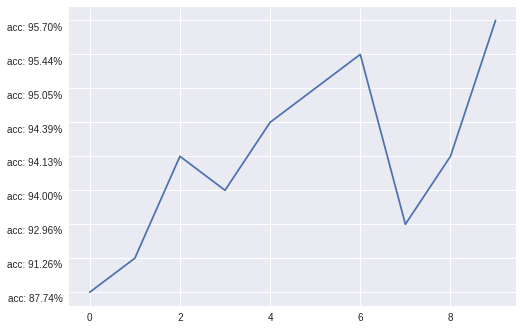

In [15]:
#for reproductivity
from numpy.random import seed 
from tensorflow import set_random_seed 
rownumber = 0
for FirstLayer in range(100,1001,100):
  SecondLayer = 0.5*FirstLayer
  ThirdLayer = 0.1*FirstLayer
  seed(7) 
  set_random_seed(2)
  scaler = StandardScaler()
  X = scaler.fit_transform(X)
  model = Sequential()
  model.add(Dense(FirstLayer, input_dim=8, init='uniform', activation='relu' )) #bias_initializer='zeros'
  model.add(Dense(int(SecondLayer), init='uniform', activation='tanh'))
  model.add(Dense(int(ThirdLayer), init='uniform', activation='relu'))
  model.add(Dense(1, init='uniform', activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  history = model.fit(X, Y, epochs=150, batch_size=97,validation_split=0.20 ) #shuffle = False, 
  scores = model.evaluate(X, Y)
  analysisdf.loc[rownumber,"First Layer Neurons"]=  FirstLayer
  analysisdf.loc[rownumber,"Second layer neurons"]= SecondLayer
  analysisdf.loc[rownumber,"third layer neurons"]= ThirdLayer
  analysisdf.loc[rownumber,"accuracy"]= ("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
  wks.set_dataframe(analysisdf,(1,1))
  rownumber  += 1
plt.plot(analysisdf["accuracy"])

So now its some what saturating. Now lets see between 1000 and 10000, 1000 neurons at a time.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1000, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(500, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(100, activation="relu", kernel_initializer="uniform")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  from ipykernel import kernelapp as app


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 3s 4ms/step - loss: 0.6666 - acc: 0.6656 - val_loss: 0.5957 - val_acc: 0.7208
Epoch 2/150
613/613 [==============================] - 0s 112us/step - loss: 0.5282 - acc: 0.7504 - val_loss: 0.4908 - val_acc: 0.7597
Epoch 3/150
613/613 [==============================] - 0s 110us/step - loss: 0.4817 - acc: 0.7700 - val_loss: 0.4591 - val_acc: 0.7857
Epoch 4/150
613/613 [==============================] - 0s 98us/step - loss: 0.4568 - acc: 0.7945 - val_loss: 0.4855 - val_acc: 0.7662
Epoch 5/150
613/613 [==============================] - 0s 96us/step - loss: 0.4526 - acc: 0.7830 - val_loss: 0.4818 - val_acc: 0.7662
Epoch 6/150
613/613 [==============================] - 0s 102us/step - loss: 0.4469 - acc: 0.7847 - val_loss: 0.4733 - val_acc: 0.7597
Epoch 7/150
613/613 [==============================] - 0s 104us/step - loss: 0.4383 - acc: 0.7847 - val_loss: 0.4644 - val_acc: 0.7597
Epoch 8/150
6

Epoch 22/150
613/613 [==============================] - 0s 96us/step - loss: 0.3733 - acc: 0.8352 - val_loss: 0.4897 - val_acc: 0.8052
Epoch 23/150
613/613 [==============================] - 0s 104us/step - loss: 0.3625 - acc: 0.8401 - val_loss: 0.5153 - val_acc: 0.7857
Epoch 24/150
613/613 [==============================] - 0s 103us/step - loss: 0.3541 - acc: 0.8369 - val_loss: 0.5720 - val_acc: 0.7597
Epoch 25/150
613/613 [==============================] - 0s 105us/step - loss: 0.3500 - acc: 0.8499 - val_loss: 0.5583 - val_acc: 0.7857
Epoch 26/150
613/613 [==============================] - 0s 105us/step - loss: 0.3789 - acc: 0.8238 - val_loss: 0.5473 - val_acc: 0.7662
Epoch 27/150
613/613 [==============================] - 0s 110us/step - loss: 0.3453 - acc: 0.8369 - val_loss: 0.5617 - val_acc: 0.7532
Epoch 28/150
613/613 [==============================] - 0s 102us/step - loss: 0.3467 - acc: 0.8532 - val_loss: 0.5069 - val_acc: 0.8247
Epoch 29/150
613/613 [===========================

Epoch 44/150
613/613 [==============================] - 0s 103us/step - loss: 0.2295 - acc: 0.9152 - val_loss: 0.7191 - val_acc: 0.7727
Epoch 45/150
613/613 [==============================] - 0s 103us/step - loss: 0.2508 - acc: 0.8907 - val_loss: 0.9764 - val_acc: 0.7338
Epoch 46/150
613/613 [==============================] - 0s 107us/step - loss: 0.3087 - acc: 0.8597 - val_loss: 0.6655 - val_acc: 0.7922
Epoch 47/150
613/613 [==============================] - 0s 113us/step - loss: 0.3034 - acc: 0.8809 - val_loss: 0.6943 - val_acc: 0.7727
Epoch 48/150
613/613 [==============================] - 0s 105us/step - loss: 0.2441 - acc: 0.8972 - val_loss: 0.7107 - val_acc: 0.7792
Epoch 49/150
613/613 [==============================] - 0s 106us/step - loss: 0.2282 - acc: 0.9152 - val_loss: 0.6179 - val_acc: 0.7987
Epoch 50/150
613/613 [==============================] - 0s 102us/step - loss: 0.2140 - acc: 0.9103 - val_loss: 0.7548 - val_acc: 0.7792
Epoch 51/150
613/613 [==========================

613/613 [==============================] - 0s 89us/step - loss: 0.1288 - acc: 0.9511 - val_loss: 1.0706 - val_acc: 0.7987
Epoch 66/150
613/613 [==============================] - 0s 116us/step - loss: 0.1477 - acc: 0.9462 - val_loss: 1.2330 - val_acc: 0.7403
Epoch 67/150
613/613 [==============================] - 0s 102us/step - loss: 0.2084 - acc: 0.9299 - val_loss: 1.0115 - val_acc: 0.7532
Epoch 68/150
613/613 [==============================] - 0s 104us/step - loss: 0.1886 - acc: 0.9347 - val_loss: 1.1057 - val_acc: 0.7597
Epoch 69/150
613/613 [==============================] - 0s 105us/step - loss: 0.1681 - acc: 0.9315 - val_loss: 1.1208 - val_acc: 0.7403
Epoch 70/150
613/613 [==============================] - 0s 100us/step - loss: 0.1171 - acc: 0.9657 - val_loss: 1.0972 - val_acc: 0.7662
Epoch 71/150
613/613 [==============================] - 0s 113us/step - loss: 0.1298 - acc: 0.9413 - val_loss: 1.0153 - val_acc: 0.7468
Epoch 72/150
613/613 [==============================] - 0s 119

613/613 [==============================] - 0s 103us/step - loss: 0.1087 - acc: 0.9625 - val_loss: 1.0668 - val_acc: 0.7857
Epoch 88/150
613/613 [==============================] - 0s 106us/step - loss: 0.0862 - acc: 0.9755 - val_loss: 1.2727 - val_acc: 0.7597
Epoch 89/150
613/613 [==============================] - 0s 100us/step - loss: 0.0614 - acc: 0.9821 - val_loss: 1.1554 - val_acc: 0.7532
Epoch 90/150
613/613 [==============================] - 0s 116us/step - loss: 0.0503 - acc: 0.9869 - val_loss: 1.2582 - val_acc: 0.7532
Epoch 91/150
613/613 [==============================] - 0s 104us/step - loss: 0.0364 - acc: 0.9984 - val_loss: 1.1857 - val_acc: 0.7792
Epoch 92/150
613/613 [==============================] - 0s 118us/step - loss: 0.0291 - acc: 0.9967 - val_loss: 1.2327 - val_acc: 0.7662
Epoch 93/150
613/613 [==============================] - 0s 102us/step - loss: 0.0305 - acc: 0.9951 - val_loss: 1.1853 - val_acc: 0.7727
Epoch 94/150
613/613 [==============================] - 0s 10

Epoch 108/150
613/613 [==============================] - 0s 107us/step - loss: 0.0099 - acc: 0.9967 - val_loss: 1.5549 - val_acc: 0.7727
Epoch 109/150
613/613 [==============================] - 0s 114us/step - loss: 0.0067 - acc: 0.9984 - val_loss: 1.5652 - val_acc: 0.7662
Epoch 110/150
613/613 [==============================] - 0s 103us/step - loss: 0.0065 - acc: 1.0000 - val_loss: 1.5925 - val_acc: 0.7662
Epoch 111/150
613/613 [==============================] - 0s 104us/step - loss: 0.0050 - acc: 1.0000 - val_loss: 1.5649 - val_acc: 0.7662
Epoch 112/150
613/613 [==============================] - 0s 99us/step - loss: 0.0044 - acc: 1.0000 - val_loss: 1.5857 - val_acc: 0.7662
Epoch 113/150
613/613 [==============================] - 0s 99us/step - loss: 0.0035 - acc: 1.0000 - val_loss: 1.6084 - val_acc: 0.7727
Epoch 114/150
613/613 [==============================] - 0s 116us/step - loss: 0.0031 - acc: 1.0000 - val_loss: 1.6267 - val_acc: 0.7727
Epoch 115/150
613/613 [====================

613/613 [==============================] - 0s 114us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 1.7061 - val_acc: 0.7727
Epoch 130/150
613/613 [==============================] - 0s 106us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 1.7159 - val_acc: 0.7727
Epoch 131/150
613/613 [==============================] - 0s 110us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 1.7280 - val_acc: 0.7727
Epoch 132/150
613/613 [==============================] - 0s 105us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 1.7482 - val_acc: 0.7727
Epoch 133/150
613/613 [==============================] - 0s 104us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 1.7470 - val_acc: 0.7727
Epoch 134/150
613/613 [==============================] - 0s 106us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 1.7418 - val_acc: 0.7792
Epoch 135/150
613/613 [==============================] - 0s 117us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 1.7484 - val_acc: 0.7727
Epoch 136/150
613/613 [==============================] 

Epoch 150/150
767/767 [==============================] - 0s 88us/step


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(2000, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1000, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, activation="relu", kernel_initializer="uniform")`
  


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 3s 5ms/step - loss: 0.6123 - acc: 0.6900 - val_loss: 0.4956 - val_acc: 0.7727
Epoch 2/150
613/613 [==============================] - 0s 164us/step - loss: 0.4769 - acc: 0.7814 - val_loss: 0.4936 - val_acc: 0.7597
Epoch 3/150
613/613 [==============================] - 0s 135us/step - loss: 0.4603 - acc: 0.7765 - val_loss: 0.4942 - val_acc: 0.7597
Epoch 4/150
613/613 [==============================] - 0s 134us/step - loss: 0.4594 - acc: 0.7847 - val_loss: 0.4807 - val_acc: 0.7727
Epoch 5/150
613/613 [==============================] - 0s 138us/step - loss: 0.4443 - acc: 0.7847 - val_loss: 0.4759 - val_acc: 0.7662
Epoch 6/150
613/613 [==============================] - 0s 157us/step - loss: 0.4395 - acc: 0.7912 - val_loss: 0.4735 - val_acc: 0.7662
Epoch 7/150
613/613 [==============================] - 0s 140us/step - loss: 0.4272 - acc: 0.7977 - val_loss: 0.4760 - val_acc: 0.7857
Epoch 8/150

613/613 [==============================] - 0s 139us/step - loss: 0.3454 - acc: 0.8401 - val_loss: 0.5549 - val_acc: 0.7857
Epoch 22/150
613/613 [==============================] - 0s 139us/step - loss: 0.3465 - acc: 0.8450 - val_loss: 0.5616 - val_acc: 0.8182
Epoch 23/150
613/613 [==============================] - 0s 136us/step - loss: 0.3239 - acc: 0.8515 - val_loss: 0.5667 - val_acc: 0.8052
Epoch 24/150
613/613 [==============================] - 0s 140us/step - loss: 0.3097 - acc: 0.8613 - val_loss: 0.5934 - val_acc: 0.7857
Epoch 25/150
613/613 [==============================] - 0s 143us/step - loss: 0.3124 - acc: 0.8597 - val_loss: 0.7179 - val_acc: 0.7922
Epoch 26/150
613/613 [==============================] - 0s 143us/step - loss: 0.3182 - acc: 0.8499 - val_loss: 0.6557 - val_acc: 0.7532
Epoch 27/150
613/613 [==============================] - 0s 139us/step - loss: 0.2957 - acc: 0.8793 - val_loss: 0.6777 - val_acc: 0.8117
Epoch 28/150
613/613 [==============================] - 0s 14

613/613 [==============================] - 0s 140us/step - loss: 0.2305 - acc: 0.8972 - val_loss: 0.9071 - val_acc: 0.7727
Epoch 42/150
613/613 [==============================] - 0s 135us/step - loss: 0.2071 - acc: 0.9184 - val_loss: 0.9826 - val_acc: 0.7532
Epoch 43/150
613/613 [==============================] - 0s 134us/step - loss: 0.1943 - acc: 0.9168 - val_loss: 1.0414 - val_acc: 0.7403
Epoch 44/150
613/613 [==============================] - 0s 152us/step - loss: 0.1856 - acc: 0.9331 - val_loss: 0.9996 - val_acc: 0.7727
Epoch 45/150
613/613 [==============================] - 0s 145us/step - loss: 0.1775 - acc: 0.9331 - val_loss: 1.0951 - val_acc: 0.7727
Epoch 46/150
613/613 [==============================] - 0s 141us/step - loss: 0.1624 - acc: 0.9380 - val_loss: 1.0600 - val_acc: 0.7597
Epoch 47/150
613/613 [==============================] - 0s 137us/step - loss: 0.1485 - acc: 0.9445 - val_loss: 1.1653 - val_acc: 0.7727
Epoch 48/150
613/613 [==============================] - 0s 15

613/613 [==============================] - 0s 139us/step - loss: 0.1021 - acc: 0.9641 - val_loss: 1.4235 - val_acc: 0.7273
Epoch 62/150
613/613 [==============================] - 0s 144us/step - loss: 0.1430 - acc: 0.9511 - val_loss: 1.6937 - val_acc: 0.7273
Epoch 63/150
613/613 [==============================] - 0s 145us/step - loss: 0.1493 - acc: 0.9364 - val_loss: 1.4279 - val_acc: 0.7078
Epoch 64/150
613/613 [==============================] - 0s 142us/step - loss: 0.1694 - acc: 0.9364 - val_loss: 1.3972 - val_acc: 0.7597
Epoch 65/150
613/613 [==============================] - 0s 138us/step - loss: 0.1522 - acc: 0.9478 - val_loss: 1.4021 - val_acc: 0.7403
Epoch 66/150
613/613 [==============================] - 0s 135us/step - loss: 0.1778 - acc: 0.9315 - val_loss: 1.4800 - val_acc: 0.6623
Epoch 67/150
613/613 [==============================] - 0s 154us/step - loss: 0.1438 - acc: 0.9429 - val_loss: 1.4251 - val_acc: 0.7662
Epoch 68/150
613/613 [==============================] - 0s 14

Epoch 81/150
613/613 [==============================] - 0s 147us/step - loss: 0.0862 - acc: 0.9755 - val_loss: 2.1010 - val_acc: 0.7273
Epoch 82/150
613/613 [==============================] - 0s 147us/step - loss: 0.0830 - acc: 0.9690 - val_loss: 2.0397 - val_acc: 0.7273
Epoch 83/150
613/613 [==============================] - 0s 143us/step - loss: 0.0908 - acc: 0.9592 - val_loss: 1.8449 - val_acc: 0.6948
Epoch 84/150
613/613 [==============================] - 0s 145us/step - loss: 0.1097 - acc: 0.9657 - val_loss: 1.7944 - val_acc: 0.6948
Epoch 85/150
613/613 [==============================] - 0s 147us/step - loss: 0.1834 - acc: 0.9364 - val_loss: 2.1101 - val_acc: 0.6818
Epoch 86/150
613/613 [==============================] - 0s 143us/step - loss: 0.2432 - acc: 0.9266 - val_loss: 1.7391 - val_acc: 0.6753
Epoch 87/150
613/613 [==============================] - 0s 149us/step - loss: 0.2423 - acc: 0.9217 - val_loss: 1.7473 - val_acc: 0.7468
Epoch 88/150
613/613 [==========================

613/613 [==============================] - 0s 142us/step - loss: 0.0125 - acc: 0.9984 - val_loss: 1.9716 - val_acc: 0.7338
Epoch 101/150
613/613 [==============================] - 0s 137us/step - loss: 0.0103 - acc: 1.0000 - val_loss: 2.0186 - val_acc: 0.7403
Epoch 102/150
613/613 [==============================] - 0s 141us/step - loss: 0.0093 - acc: 1.0000 - val_loss: 2.0332 - val_acc: 0.7403
Epoch 103/150
613/613 [==============================] - 0s 155us/step - loss: 0.0079 - acc: 1.0000 - val_loss: 2.0031 - val_acc: 0.7403
Epoch 104/150
613/613 [==============================] - 0s 140us/step - loss: 0.0146 - acc: 0.9984 - val_loss: 2.0628 - val_acc: 0.7403
Epoch 105/150
613/613 [==============================] - 0s 137us/step - loss: 0.0089 - acc: 1.0000 - val_loss: 2.1278 - val_acc: 0.7338
Epoch 106/150
613/613 [==============================] - 0s 143us/step - loss: 0.0099 - acc: 0.9984 - val_loss: 2.1434 - val_acc: 0.7208
Epoch 107/150
613/613 [==============================] 

613/613 [==============================] - 0s 142us/step - loss: 0.0034 - acc: 1.0000 - val_loss: 2.2685 - val_acc: 0.7273
Epoch 121/150
613/613 [==============================] - 0s 139us/step - loss: 0.0031 - acc: 1.0000 - val_loss: 2.2481 - val_acc: 0.7338
Epoch 122/150
613/613 [==============================] - 0s 146us/step - loss: 0.0027 - acc: 1.0000 - val_loss: 2.2689 - val_acc: 0.7403
Epoch 123/150
613/613 [==============================] - 0s 156us/step - loss: 0.0027 - acc: 1.0000 - val_loss: 2.3015 - val_acc: 0.7403
Epoch 124/150
613/613 [==============================] - 0s 145us/step - loss: 0.0023 - acc: 1.0000 - val_loss: 2.3129 - val_acc: 0.7403
Epoch 125/150
613/613 [==============================] - 0s 143us/step - loss: 0.0022 - acc: 1.0000 - val_loss: 2.3162 - val_acc: 0.7403
Epoch 126/150
613/613 [==============================] - 0s 140us/step - loss: 0.0021 - acc: 1.0000 - val_loss: 2.3212 - val_acc: 0.7403
Epoch 127/150
613/613 [==============================] 


613/613 [==============================] - 0s 143us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 2.4136 - val_acc: 0.7403
Epoch 141/150
613/613 [==============================] - 0s 144us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 2.4282 - val_acc: 0.7338
Epoch 142/150
613/613 [==============================] - 0s 147us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 2.4318 - val_acc: 0.7338
Epoch 143/150
613/613 [==============================] - 0s 144us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 2.4446 - val_acc: 0.7338
Epoch 144/150
613/613 [==============================] - 0s 135us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 2.4461 - val_acc: 0.7338
Epoch 145/150
613/613 [==============================] - 0s 147us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 2.4475 - val_acc: 0.7338
Epoch 146/150
613/613 [==============================] - 0s 139us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 2.4551 - val_acc: 0.7338
Epoch 147/150
613/613 [==============================]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(3000, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1500, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(300, activation="relu", kernel_initializer="uniform")`
  


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 3s 5ms/step - loss: 0.5942 - acc: 0.6933 - val_loss: 0.4905 - val_acc: 0.7857
Epoch 2/150
613/613 [==============================] - 0s 207us/step - loss: 0.4818 - acc: 0.7798 - val_loss: 0.5100 - val_acc: 0.7532
Epoch 3/150
613/613 [==============================] - 0s 200us/step - loss: 0.4585 - acc: 0.7684 - val_loss: 0.4891 - val_acc: 0.7532
Epoch 4/150
613/613 [==============================] - 0s 189us/step - loss: 0.4589 - acc: 0.7896 - val_loss: 0.4867 - val_acc: 0.7727
Epoch 5/150
613/613 [==============================] - 0s 189us/step - loss: 0.4382 - acc: 0.7847 - val_loss: 0.4889 - val_acc: 0.7662
Epoch 6/150
613/613 [==============================] - 0s 197us/step - loss: 0.4430 - acc: 0.8042 - val_loss: 0.4740 - val_acc: 0.7727
Epoch 7/150
613/613 [==============================] - 0s 185us/step - loss: 0.4242 - acc: 0.7993 - val_loss: 0.4729 - val_acc: 0.7987
Epoch 8/150

613/613 [==============================] - 0s 187us/step - loss: 0.3346 - acc: 0.8467 - val_loss: 0.6499 - val_acc: 0.7727
Epoch 23/150
613/613 [==============================] - 0s 172us/step - loss: 0.3146 - acc: 0.8679 - val_loss: 0.6618 - val_acc: 0.7727
Epoch 24/150
613/613 [==============================] - 0s 185us/step - loss: 0.3070 - acc: 0.8695 - val_loss: 0.6478 - val_acc: 0.7727
Epoch 25/150
613/613 [==============================] - 0s 180us/step - loss: 0.3052 - acc: 0.8548 - val_loss: 0.7678 - val_acc: 0.7597
Epoch 26/150
613/613 [==============================] - 0s 182us/step - loss: 0.3209 - acc: 0.8450 - val_loss: 0.6748 - val_acc: 0.7468
Epoch 27/150
613/613 [==============================] - 0s 179us/step - loss: 0.2899 - acc: 0.8777 - val_loss: 0.6750 - val_acc: 0.7922
Epoch 28/150
613/613 [==============================] - 0s 188us/step - loss: 0.2815 - acc: 0.8809 - val_loss: 0.7425 - val_acc: 0.7532
Epoch 29/150
613/613 [==============================] - 0s 18

613/613 [==============================] - 0s 181us/step - loss: 0.1385 - acc: 0.9380 - val_loss: 1.2866 - val_acc: 0.7857
Epoch 44/150
613/613 [==============================] - 0s 175us/step - loss: 0.1474 - acc: 0.9380 - val_loss: 1.2565 - val_acc: 0.7338
Epoch 45/150
613/613 [==============================] - 0s 174us/step - loss: 0.1275 - acc: 0.9527 - val_loss: 1.4520 - val_acc: 0.7532
Epoch 46/150
613/613 [==============================] - 0s 171us/step - loss: 0.1807 - acc: 0.9266 - val_loss: 1.2862 - val_acc: 0.7338
Epoch 47/150
613/613 [==============================] - 0s 175us/step - loss: 0.1696 - acc: 0.9266 - val_loss: 1.3028 - val_acc: 0.7662
Epoch 48/150
613/613 [==============================] - 0s 186us/step - loss: 0.1701 - acc: 0.9201 - val_loss: 1.4421 - val_acc: 0.7143
Epoch 49/150
613/613 [==============================] - 0s 175us/step - loss: 0.1665 - acc: 0.9478 - val_loss: 1.3381 - val_acc: 0.7727
Epoch 50/150
613/613 [==============================] - 0s 17

613/613 [==============================] - 0s 179us/step - loss: 0.1622 - acc: 0.9299 - val_loss: 1.5748 - val_acc: 0.7013
Epoch 65/150
613/613 [==============================] - 0s 171us/step - loss: 0.1273 - acc: 0.9560 - val_loss: 1.4570 - val_acc: 0.7338
Epoch 66/150
613/613 [==============================] - 0s 173us/step - loss: 0.1313 - acc: 0.9641 - val_loss: 1.3480 - val_acc: 0.7338
Epoch 67/150
613/613 [==============================] - 0s 183us/step - loss: 0.1026 - acc: 0.9641 - val_loss: 1.4978 - val_acc: 0.7597
Epoch 68/150
613/613 [==============================] - 0s 175us/step - loss: 0.0844 - acc: 0.9706 - val_loss: 1.5779 - val_acc: 0.7727
Epoch 69/150
613/613 [==============================] - 0s 175us/step - loss: 0.1062 - acc: 0.9625 - val_loss: 1.6031 - val_acc: 0.7273
Epoch 70/150
613/613 [==============================] - 0s 174us/step - loss: 0.0663 - acc: 0.9723 - val_loss: 1.7222 - val_acc: 0.6883
Epoch 71/150
613/613 [==============================] - 0s 17

613/613 [==============================] - 0s 175us/step - loss: 0.1349 - acc: 0.9478 - val_loss: 1.7604 - val_acc: 0.7338
Epoch 86/150
613/613 [==============================] - 0s 178us/step - loss: 0.1045 - acc: 0.9641 - val_loss: 1.6367 - val_acc: 0.7662
Epoch 87/150
613/613 [==============================] - 0s 171us/step - loss: 0.0752 - acc: 0.9739 - val_loss: 1.7658 - val_acc: 0.7532
Epoch 88/150
613/613 [==============================] - 0s 177us/step - loss: 0.0671 - acc: 0.9804 - val_loss: 1.9288 - val_acc: 0.6948
Epoch 89/150
613/613 [==============================] - 0s 172us/step - loss: 0.0451 - acc: 0.9886 - val_loss: 1.9131 - val_acc: 0.7403
Epoch 90/150
613/613 [==============================] - 0s 184us/step - loss: 0.0438 - acc: 0.9853 - val_loss: 1.9352 - val_acc: 0.7532
Epoch 91/150
613/613 [==============================] - 0s 176us/step - loss: 0.0291 - acc: 0.9935 - val_loss: 1.9202 - val_acc: 0.7468
Epoch 92/150
613/613 [==============================] - 0s 17

613/613 [==============================] - 0s 175us/step - loss: 0.0039 - acc: 1.0000 - val_loss: 2.2292 - val_acc: 0.7273
Epoch 107/150
613/613 [==============================] - 0s 175us/step - loss: 0.0056 - acc: 0.9984 - val_loss: 2.2519 - val_acc: 0.7338
Epoch 108/150
613/613 [==============================] - 0s 171us/step - loss: 0.0031 - acc: 1.0000 - val_loss: 2.2483 - val_acc: 0.7468
Epoch 109/150
613/613 [==============================] - 0s 182us/step - loss: 0.0032 - acc: 1.0000 - val_loss: 2.2743 - val_acc: 0.7403
Epoch 110/150
613/613 [==============================] - 0s 173us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 2.2967 - val_acc: 0.7273
Epoch 111/150
613/613 [==============================] - 0s 173us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 2.2987 - val_acc: 0.7273
Epoch 112/150
613/613 [==============================] - 0s 171us/step - loss: 0.0023 - acc: 1.0000 - val_loss: 2.3018 - val_acc: 0.7403
Epoch 113/150
613/613 [==============================] 

613/613 [==============================] - 0s 174us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 2.4226 - val_acc: 0.7338
Epoch 128/150
613/613 [==============================] - 0s 180us/step - loss: 9.7884e-04 - acc: 1.0000 - val_loss: 2.4337 - val_acc: 0.7273
Epoch 129/150
613/613 [==============================] - 0s 169us/step - loss: 9.8443e-04 - acc: 1.0000 - val_loss: 2.4386 - val_acc: 0.7143
Epoch 130/150
613/613 [==============================] - 0s 175us/step - loss: 9.6061e-04 - acc: 1.0000 - val_loss: 2.4394 - val_acc: 0.7143
Epoch 131/150
613/613 [==============================] - 0s 175us/step - loss: 9.1907e-04 - acc: 1.0000 - val_loss: 2.4415 - val_acc: 0.7208
Epoch 132/150
613/613 [==============================] - 0s 172us/step - loss: 8.8803e-04 - acc: 1.0000 - val_loss: 2.4471 - val_acc: 0.7208
Epoch 133/150
613/613 [==============================] - 0s 170us/step - loss: 8.4505e-04 - acc: 1.0000 - val_loss: 2.4560 - val_acc: 0.7143
Epoch 134/150
613/613 [========

613/613 [==============================] - 0s 176us/step - loss: 5.8633e-04 - acc: 1.0000 - val_loss: 2.5359 - val_acc: 0.7143
Epoch 149/150
613/613 [==============================] - 0s 170us/step - loss: 5.7771e-04 - acc: 1.0000 - val_loss: 2.5356 - val_acc: 0.7143
Epoch 150/150
767/767 [==============================] - 0s 108us/step


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(4000, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(2000, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(400, activation="relu", kernel_initializer="uniform")`
  


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 3s 5ms/step - loss: 0.5874 - acc: 0.6803 - val_loss: 0.5903 - val_acc: 0.6818
Epoch 2/150
613/613 [==============================] - 0s 264us/step - loss: 0.5025 - acc: 0.7635 - val_loss: 0.4892 - val_acc: 0.7468
Epoch 3/150
613/613 [==============================] - 0s 262us/step - loss: 0.4542 - acc: 0.7879 - val_loss: 0.4825 - val_acc: 0.7532
Epoch 4/150
613/613 [==============================] - 0s 245us/step - loss: 0.4512 - acc: 0.7700 - val_loss: 0.4742 - val_acc: 0.7857
Epoch 5/150
613/613 [==============================] - 0s 231us/step - loss: 0.4340 - acc: 0.7879 - val_loss: 0.4857 - val_acc: 0.7662
Epoch 6/150
613/613 [==============================] - 0s 225us/step - loss: 0.4280 - acc: 0.7879 - val_loss: 0.4667 - val_acc: 0.7792
Epoch 7/150
613/613 [==============================] - 0s 226us/step - loss: 0.4165 - acc: 0.7977 - val_loss: 0.4653 - val_acc: 0.8052
Epoch 8/150

613/613 [==============================] - 0s 228us/step - loss: 0.3120 - acc: 0.8564 - val_loss: 0.6763 - val_acc: 0.7338
Epoch 23/150
613/613 [==============================] - 0s 236us/step - loss: 0.2977 - acc: 0.8679 - val_loss: 0.7132 - val_acc: 0.7857
Epoch 24/150
613/613 [==============================] - 0s 236us/step - loss: 0.2898 - acc: 0.8613 - val_loss: 0.7067 - val_acc: 0.7662
Epoch 25/150
613/613 [==============================] - 0s 228us/step - loss: 0.2642 - acc: 0.8793 - val_loss: 0.7899 - val_acc: 0.7597
Epoch 26/150
613/613 [==============================] - 0s 229us/step - loss: 0.2773 - acc: 0.8613 - val_loss: 0.7923 - val_acc: 0.7532
Epoch 27/150
613/613 [==============================] - 0s 227us/step - loss: 0.2525 - acc: 0.8923 - val_loss: 0.7676 - val_acc: 0.7532
Epoch 28/150
613/613 [==============================] - 0s 225us/step - loss: 0.2345 - acc: 0.9005 - val_loss: 0.8599 - val_acc: 0.7273
Epoch 29/150
613/613 [==============================] - 0s 23

613/613 [==============================] - 0s 253us/step - loss: 0.1295 - acc: 0.9576 - val_loss: 1.5054 - val_acc: 0.7273
Epoch 44/150
613/613 [==============================] - 0s 241us/step - loss: 0.1559 - acc: 0.9478 - val_loss: 1.5914 - val_acc: 0.7338
Epoch 45/150
613/613 [==============================] - 0s 254us/step - loss: 0.2139 - acc: 0.9380 - val_loss: 1.4809 - val_acc: 0.7078
Epoch 46/150
613/613 [==============================] - 0s 245us/step - loss: 0.2198 - acc: 0.9135 - val_loss: 1.5031 - val_acc: 0.7143
Epoch 47/150
613/613 [==============================] - 0s 241us/step - loss: 0.2670 - acc: 0.8907 - val_loss: 1.3521 - val_acc: 0.6883
Epoch 48/150
613/613 [==============================] - 0s 252us/step - loss: 0.2351 - acc: 0.8972 - val_loss: 1.1753 - val_acc: 0.7078
Epoch 49/150
613/613 [==============================] - 0s 237us/step - loss: 0.2512 - acc: 0.8989 - val_loss: 1.0039 - val_acc: 0.7532
Epoch 50/150
613/613 [==============================] - 0s 25

613/613 [==============================] - 0s 229us/step - loss: 0.0312 - acc: 0.9935 - val_loss: 1.9065 - val_acc: 0.7143
Epoch 65/150
613/613 [==============================] - 0s 222us/step - loss: 0.0232 - acc: 0.9967 - val_loss: 2.0139 - val_acc: 0.7143
Epoch 66/150
613/613 [==============================] - 0s 238us/step - loss: 0.0266 - acc: 0.9951 - val_loss: 2.0433 - val_acc: 0.7078
Epoch 67/150
613/613 [==============================] - 0s 224us/step - loss: 0.0372 - acc: 0.9869 - val_loss: 1.9497 - val_acc: 0.7338
Epoch 68/150
613/613 [==============================] - 0s 228us/step - loss: 0.0382 - acc: 0.9918 - val_loss: 2.0157 - val_acc: 0.7143
Epoch 69/150
613/613 [==============================] - 0s 228us/step - loss: 0.0371 - acc: 0.9902 - val_loss: 2.0681 - val_acc: 0.6948
Epoch 70/150
613/613 [==============================] - 0s 230us/step - loss: 0.0347 - acc: 0.9902 - val_loss: 2.0233 - val_acc: 0.7208
Epoch 71/150
613/613 [==============================] - 0s 22

613/613 [==============================] - 0s 231us/step - loss: 0.0036 - acc: 1.0000 - val_loss: 2.3765 - val_acc: 0.7338
Epoch 86/150
613/613 [==============================] - 0s 230us/step - loss: 0.0033 - acc: 1.0000 - val_loss: 2.4067 - val_acc: 0.7078
Epoch 87/150
613/613 [==============================] - 0s 232us/step - loss: 0.0034 - acc: 0.9984 - val_loss: 2.4175 - val_acc: 0.7078
Epoch 88/150
613/613 [==============================] - 0s 227us/step - loss: 0.0029 - acc: 1.0000 - val_loss: 2.4243 - val_acc: 0.7273
Epoch 89/150
613/613 [==============================] - 0s 232us/step - loss: 0.0026 - acc: 1.0000 - val_loss: 2.4400 - val_acc: 0.7338
Epoch 90/150
613/613 [==============================] - 0s 237us/step - loss: 0.0026 - acc: 1.0000 - val_loss: 2.4503 - val_acc: 0.7208
Epoch 91/150
613/613 [==============================] - 0s 237us/step - loss: 0.0025 - acc: 1.0000 - val_loss: 2.4559 - val_acc: 0.7273
Epoch 92/150
613/613 [==============================] - 0s 22

613/613 [==============================] - 0s 226us/step - loss: 0.0018 - acc: 1.0000 - val_loss: 2.6058 - val_acc: 0.7143
Epoch 107/150
613/613 [==============================] - 0s 227us/step - loss: 0.0083 - acc: 0.9984 - val_loss: 2.5883 - val_acc: 0.7338
Epoch 108/150
613/613 [==============================] - 0s 233us/step - loss: 0.0018 - acc: 1.0000 - val_loss: 2.5998 - val_acc: 0.7338
Epoch 109/150
613/613 [==============================] - 0s 225us/step - loss: 0.0024 - acc: 0.9984 - val_loss: 2.6771 - val_acc: 0.7013
Epoch 110/150
613/613 [==============================] - 0s 224us/step - loss: 0.0045 - acc: 0.9984 - val_loss: 2.6071 - val_acc: 0.7338
Epoch 111/150
613/613 [==============================] - 0s 225us/step - loss: 0.0047 - acc: 0.9984 - val_loss: 2.5991 - val_acc: 0.7078
Epoch 112/150
613/613 [==============================] - 0s 229us/step - loss: 0.0036 - acc: 0.9984 - val_loss: 2.6188 - val_acc: 0.7338
Epoch 113/150
613/613 [==============================] 

613/613 [==============================] - 0s 226us/step - loss: 0.1880 - acc: 0.9282 - val_loss: 1.2577 - val_acc: 0.7338
Epoch 128/150
613/613 [==============================] - 0s 228us/step - loss: 0.1302 - acc: 0.9511 - val_loss: 1.3338 - val_acc: 0.7597
Epoch 129/150
613/613 [==============================] - 0s 226us/step - loss: 0.1087 - acc: 0.9625 - val_loss: 1.3373 - val_acc: 0.7532
Epoch 130/150
613/613 [==============================] - 0s 230us/step - loss: 0.1082 - acc: 0.9608 - val_loss: 1.5021 - val_acc: 0.7532
Epoch 131/150
613/613 [==============================] - 0s 231us/step - loss: 0.1062 - acc: 0.9576 - val_loss: 1.5112 - val_acc: 0.7532
Epoch 132/150
613/613 [==============================] - 0s 239us/step - loss: 0.0695 - acc: 0.9788 - val_loss: 1.5733 - val_acc: 0.7403
Epoch 133/150
613/613 [==============================] - 0s 225us/step - loss: 0.0584 - acc: 0.9804 - val_loss: 1.6596 - val_acc: 0.7403
Epoch 134/150
613/613 [==============================] 

613/613 [==============================] - 0s 226us/step - loss: 0.0587 - acc: 0.9837 - val_loss: 2.1841 - val_acc: 0.7532
Epoch 149/150
613/613 [==============================] - 0s 228us/step - loss: 0.1202 - acc: 0.9723 - val_loss: 2.0805 - val_acc: 0.7208
Epoch 150/150
767/767 [==============================] - 0s 110us/step


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(5000, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(2500, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(500, activation="relu", kernel_initializer="uniform")`
  


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 3s 5ms/step - loss: 0.5659 - acc: 0.7129 - val_loss: 0.7412 - val_acc: 0.6364
Epoch 2/150
613/613 [==============================] - 0s 317us/step - loss: 0.5471 - acc: 0.7471 - val_loss: 0.4956 - val_acc: 0.7857
Epoch 3/150
613/613 [==============================] - 0s 327us/step - loss: 0.4601 - acc: 0.7667 - val_loss: 0.5099 - val_acc: 0.7208
Epoch 4/150
613/613 [==============================] - 0s 309us/step - loss: 0.4579 - acc: 0.7684 - val_loss: 0.4620 - val_acc: 0.7987
Epoch 5/150
613/613 [==============================] - 0s 317us/step - loss: 0.4370 - acc: 0.7830 - val_loss: 0.4948 - val_acc: 0.7597
Epoch 6/150
613/613 [==============================] - 0s 322us/step - loss: 0.4305 - acc: 0.7847 - val_loss: 0.4683 - val_acc: 0.7922
Epoch 7/150
613/613 [==============================] - 0s 328us/step - loss: 0.4144 - acc: 0.8075 - val_loss: 0.4703 - val_acc: 0.8052
Epoch 8/150

Epoch 17/150
613/613 [==============================] - 0s 316us/step - loss: 0.3432 - acc: 0.8385 - val_loss: 0.5867 - val_acc: 0.7727
Epoch 18/150
613/613 [==============================] - 0s 318us/step - loss: 0.3333 - acc: 0.8352 - val_loss: 0.5398 - val_acc: 0.8247
Epoch 19/150
613/613 [==============================] - 0s 306us/step - loss: 0.3177 - acc: 0.8385 - val_loss: 0.5999 - val_acc: 0.7922
Epoch 20/150
613/613 [==============================] - 0s 338us/step - loss: 0.2994 - acc: 0.8581 - val_loss: 0.6163 - val_acc: 0.8182
Epoch 21/150
613/613 [==============================] - 0s 316us/step - loss: 0.2977 - acc: 0.8613 - val_loss: 0.6298 - val_acc: 0.8117
Epoch 22/150
613/613 [==============================] - 0s 315us/step - loss: 0.2838 - acc: 0.8744 - val_loss: 0.6866 - val_acc: 0.7792
Epoch 23/150
613/613 [==============================] - 0s 331us/step - loss: 0.2708 - acc: 0.8842 - val_loss: 0.6688 - val_acc: 0.8052
Epoch 24/150
613/613 [==========================


613/613 [==============================] - 0s 331us/step - loss: 0.2690 - acc: 0.8760 - val_loss: 0.7908 - val_acc: 0.7597
Epoch 34/150
613/613 [==============================] - 0s 311us/step - loss: 0.2089 - acc: 0.9184 - val_loss: 0.9035 - val_acc: 0.7597
Epoch 35/150
613/613 [==============================] - 0s 321us/step - loss: 0.2097 - acc: 0.9217 - val_loss: 0.8439 - val_acc: 0.7662
Epoch 36/150
613/613 [==============================] - 0s 315us/step - loss: 0.2018 - acc: 0.8989 - val_loss: 0.9308 - val_acc: 0.7532
Epoch 37/150
613/613 [==============================] - 0s 318us/step - loss: 0.2044 - acc: 0.9103 - val_loss: 0.9221 - val_acc: 0.7662
Epoch 38/150
613/613 [==============================] - 0s 314us/step - loss: 0.1686 - acc: 0.9184 - val_loss: 1.0805 - val_acc: 0.7597
Epoch 39/150
613/613 [==============================] - 0s 323us/step - loss: 0.1439 - acc: 0.9494 - val_loss: 1.0771 - val_acc: 0.7532
Epoch 40/150
613/613 [==============================] - 0s 3

613/613 [==============================] - 0s 317us/step - loss: 0.2289 - acc: 0.9217 - val_loss: 1.4084 - val_acc: 0.7403
Epoch 50/150
613/613 [==============================] - 0s 321us/step - loss: 0.2263 - acc: 0.9119 - val_loss: 1.3873 - val_acc: 0.7532
Epoch 51/150
613/613 [==============================] - 0s 314us/step - loss: 0.1790 - acc: 0.9250 - val_loss: 1.1132 - val_acc: 0.7273
Epoch 52/150
613/613 [==============================] - 0s 317us/step - loss: 0.1432 - acc: 0.9429 - val_loss: 1.3089 - val_acc: 0.7597
Epoch 53/150
613/613 [==============================] - 0s 322us/step - loss: 0.1422 - acc: 0.9445 - val_loss: 1.3706 - val_acc: 0.7143
Epoch 54/150
613/613 [==============================] - 0s 318us/step - loss: 0.0998 - acc: 0.9690 - val_loss: 1.4234 - val_acc: 0.7532
Epoch 55/150
613/613 [==============================] - 0s 315us/step - loss: 0.0923 - acc: 0.9674 - val_loss: 1.3858 - val_acc: 0.7662
Epoch 56/150
613/613 [==============================] - 0s 33

613/613 [==============================] - 0s 331us/step - loss: 0.0993 - acc: 0.9608 - val_loss: 1.7041 - val_acc: 0.7468
Epoch 66/150
613/613 [==============================] - 0s 329us/step - loss: 0.1305 - acc: 0.9657 - val_loss: 1.6692 - val_acc: 0.7078
Epoch 67/150
613/613 [==============================] - 0s 317us/step - loss: 0.1132 - acc: 0.9625 - val_loss: 1.7041 - val_acc: 0.7208
Epoch 68/150
613/613 [==============================] - 0s 317us/step - loss: 0.0950 - acc: 0.9625 - val_loss: 1.6385 - val_acc: 0.7468
Epoch 69/150
613/613 [==============================] - 0s 313us/step - loss: 0.0590 - acc: 0.9772 - val_loss: 1.6719 - val_acc: 0.7338
Epoch 70/150
613/613 [==============================] - 0s 314us/step - loss: 0.0434 - acc: 0.9869 - val_loss: 1.7215 - val_acc: 0.7208
Epoch 71/150
613/613 [==============================] - 0s 320us/step - loss: 0.0321 - acc: 0.9951 - val_loss: 1.7727 - val_acc: 0.7468
Epoch 72/150
613/613 [==============================] - 0s 31

613/613 [==============================] - 0s 322us/step - loss: 0.0092 - acc: 1.0000 - val_loss: 1.9550 - val_acc: 0.7532
Epoch 82/150
613/613 [==============================] - 0s 340us/step - loss: 0.0091 - acc: 0.9967 - val_loss: 2.0230 - val_acc: 0.7273
Epoch 83/150
613/613 [==============================] - 0s 318us/step - loss: 0.0089 - acc: 1.0000 - val_loss: 2.0109 - val_acc: 0.7143
Epoch 84/150
613/613 [==============================] - 0s 327us/step - loss: 0.0121 - acc: 0.9984 - val_loss: 2.0024 - val_acc: 0.7468
Epoch 85/150
613/613 [==============================] - 0s 312us/step - loss: 0.0103 - acc: 0.9984 - val_loss: 2.0832 - val_acc: 0.7338
Epoch 86/150
613/613 [==============================] - 0s 319us/step - loss: 0.0107 - acc: 0.9984 - val_loss: 2.0461 - val_acc: 0.7468
Epoch 87/150
613/613 [==============================] - 0s 331us/step - loss: 0.0099 - acc: 0.9984 - val_loss: 2.0742 - val_acc: 0.7532
Epoch 88/150
613/613 [==============================] - 0s 33

Epoch 97/150
613/613 [==============================] - 0s 344us/step - loss: 0.0030 - acc: 1.0000 - val_loss: 2.1571 - val_acc: 0.7403
Epoch 98/150
613/613 [==============================] - 0s 314us/step - loss: 0.0021 - acc: 1.0000 - val_loss: 2.1495 - val_acc: 0.7403
Epoch 99/150
613/613 [==============================] - 0s 316us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 2.1676 - val_acc: 0.7338
Epoch 100/150
613/613 [==============================] - 0s 318us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 2.1929 - val_acc: 0.7273
Epoch 101/150
613/613 [==============================] - 0s 336us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 2.2034 - val_acc: 0.7403
Epoch 102/150
613/613 [==============================] - 0s 310us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 2.2012 - val_acc: 0.7403
Epoch 103/150
613/613 [==============================] - 0s 318us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 2.2044 - val_acc: 0.7273
Epoch 104/150
613/613 [=====================

613/613 [==============================] - 0s 324us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 2.2743 - val_acc: 0.7338
Epoch 114/150
613/613 [==============================] - 0s 322us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 2.2915 - val_acc: 0.7338
Epoch 115/150
613/613 [==============================] - 0s 311us/step - loss: 0.0010 - acc: 1.0000 - val_loss: 2.2847 - val_acc: 0.7338
Epoch 116/150
613/613 [==============================] - 0s 320us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 2.2859 - val_acc: 0.7403
Epoch 117/150
613/613 [==============================] - 0s 341us/step - loss: 9.2049e-04 - acc: 1.0000 - val_loss: 2.2981 - val_acc: 0.7338
Epoch 118/150
613/613 [==============================] - 0s 326us/step - loss: 0.0010 - acc: 1.0000 - val_loss: 2.3055 - val_acc: 0.7403
Epoch 119/150
613/613 [==============================] - 0s 314us/step - loss: 8.5375e-04 - acc: 1.0000 - val_loss: 2.3152 - val_acc: 0.7338
Epoch 120/150
613/613 [========================

613/613 [==============================] - 0s 311us/step - loss: 5.7110e-04 - acc: 1.0000 - val_loss: 2.3761 - val_acc: 0.7338
Epoch 130/150
613/613 [==============================] - 0s 314us/step - loss: 5.6618e-04 - acc: 1.0000 - val_loss: 2.3935 - val_acc: 0.7403
Epoch 131/150
613/613 [==============================] - 0s 318us/step - loss: 5.2842e-04 - acc: 1.0000 - val_loss: 2.3969 - val_acc: 0.7403
Epoch 132/150
613/613 [==============================] - 0s 322us/step - loss: 4.8764e-04 - acc: 1.0000 - val_loss: 2.4115 - val_acc: 0.7403
Epoch 133/150
613/613 [==============================] - 0s 307us/step - loss: 4.6165e-04 - acc: 1.0000 - val_loss: 2.4188 - val_acc: 0.7403
Epoch 134/150
613/613 [==============================] - 0s 331us/step - loss: 5.1125e-04 - acc: 1.0000 - val_loss: 2.4212 - val_acc: 0.7338
Epoch 135/150
613/613 [==============================] - 0s 336us/step - loss: 4.4806e-04 - acc: 1.0000 - val_loss: 2.4249 - val_acc: 0.7403
Epoch 136/150
613/613 [====

613/613 [==============================] - 0s 331us/step - loss: 3.1067e-04 - acc: 1.0000 - val_loss: 2.4765 - val_acc: 0.7468
Epoch 145/150
613/613 [==============================] - 0s 316us/step - loss: 2.9528e-04 - acc: 1.0000 - val_loss: 2.4803 - val_acc: 0.7468
Epoch 146/150
613/613 [==============================] - 0s 322us/step - loss: 2.8496e-04 - acc: 1.0000 - val_loss: 2.4904 - val_acc: 0.7468
Epoch 147/150
613/613 [==============================] - 0s 320us/step - loss: 2.8646e-04 - acc: 1.0000 - val_loss: 2.5012 - val_acc: 0.7468
Epoch 148/150
613/613 [==============================] - 0s 328us/step - loss: 2.8022e-04 - acc: 1.0000 - val_loss: 2.5415 - val_acc: 0.7403
Epoch 149/150
613/613 [==============================] - 0s 321us/step - loss: 2.6898e-04 - acc: 1.0000 - val_loss: 2.5213 - val_acc: 0.7403
Epoch 150/150
767/767 [==============================] - 0s 128us/step


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(6000, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(3000, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(600, activation="relu", kernel_initializer="uniform")`
  


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 3s 6ms/step - loss: 0.5655 - acc: 0.6688 - val_loss: 0.6367 - val_acc: 0.6818
Epoch 2/150
613/613 [==============================] - 0s 437us/step - loss: 0.5425 - acc: 0.7504 - val_loss: 0.4877 - val_acc: 0.7597
Epoch 3/150
613/613 [==============================] - 0s 421us/step - loss: 0.4591 - acc: 0.7700 - val_loss: 0.5580 - val_acc: 0.6948
Epoch 4/150
613/613 [==============================] - 0s 433us/step - loss: 0.4670 - acc: 0.7700 - val_loss: 0.4825 - val_acc: 0.7792
Epoch 5/150
613/613 [==============================] - 0s 417us/step - loss: 0.4348 - acc: 0.7928 - val_loss: 0.4846 - val_acc: 0.7532
Epoch 6/150
613/613 [==============================] - 0s 425us/step - loss: 0.4216 - acc: 0.7928 - val_loss: 0.4754 - val_acc: 0.7662
Epoch 7/150
613/613 [==============================] - 0s 411us/step - loss: 0.4089 - acc: 0.8042 - val_loss: 0.4815 - val_acc: 0.7727
Epoch 8/150

613/613 [==============================] - 0s 419us/step - loss: 0.3099 - acc: 0.8467 - val_loss: 0.6113 - val_acc: 0.7922
Epoch 20/150
613/613 [==============================] - 0s 415us/step - loss: 0.2957 - acc: 0.8760 - val_loss: 0.6933 - val_acc: 0.7662
Epoch 21/150
613/613 [==============================] - 0s 412us/step - loss: 0.2988 - acc: 0.8597 - val_loss: 0.6513 - val_acc: 0.7857
Epoch 22/150
613/613 [==============================] - 0s 422us/step - loss: 0.2813 - acc: 0.8793 - val_loss: 0.6920 - val_acc: 0.7727
Epoch 23/150
613/613 [==============================] - 0s 408us/step - loss: 0.2570 - acc: 0.8940 - val_loss: 0.7132 - val_acc: 0.7857
Epoch 24/150
613/613 [==============================] - 0s 416us/step - loss: 0.2555 - acc: 0.8842 - val_loss: 0.7457 - val_acc: 0.7208
Epoch 25/150
613/613 [==============================] - 0s 416us/step - loss: 0.2419 - acc: 0.9070 - val_loss: 0.8082 - val_acc: 0.7532
Epoch 26/150
613/613 [==============================] - 0s 41

Epoch 38/150
613/613 [==============================] - 0s 419us/step - loss: 0.1661 - acc: 0.9347 - val_loss: 1.2482 - val_acc: 0.7597
Epoch 39/150
613/613 [==============================] - 0s 410us/step - loss: 0.1522 - acc: 0.9462 - val_loss: 1.1989 - val_acc: 0.7208
Epoch 40/150
613/613 [==============================] - 0s 414us/step - loss: 0.1281 - acc: 0.9543 - val_loss: 1.2900 - val_acc: 0.7468
Epoch 41/150
613/613 [==============================] - 0s 417us/step - loss: 0.1206 - acc: 0.9560 - val_loss: 1.3426 - val_acc: 0.7338
Epoch 42/150
613/613 [==============================] - 0s 415us/step - loss: 0.1228 - acc: 0.9511 - val_loss: 1.5817 - val_acc: 0.7143
Epoch 43/150
613/613 [==============================] - 0s 417us/step - loss: 0.1353 - acc: 0.9543 - val_loss: 1.5476 - val_acc: 0.7143
Epoch 44/150
613/613 [==============================] - 0s 416us/step - loss: 0.1167 - acc: 0.9527 - val_loss: 1.5401 - val_acc: 0.7143
Epoch 45/150
613/613 [==========================

613/613 [==============================] - 0s 413us/step - loss: 0.0475 - acc: 0.9886 - val_loss: 1.8385 - val_acc: 0.7532
Epoch 57/150
613/613 [==============================] - 0s 422us/step - loss: 0.0539 - acc: 0.9788 - val_loss: 1.9439 - val_acc: 0.7208
Epoch 58/150
613/613 [==============================] - 0s 407us/step - loss: 0.0452 - acc: 0.9821 - val_loss: 1.9181 - val_acc: 0.7532
Epoch 59/150
613/613 [==============================] - 0s 408us/step - loss: 0.0356 - acc: 0.9902 - val_loss: 1.8744 - val_acc: 0.7532
Epoch 60/150
613/613 [==============================] - 0s 412us/step - loss: 0.0375 - acc: 0.9853 - val_loss: 2.0064 - val_acc: 0.7338
Epoch 61/150
613/613 [==============================] - 0s 414us/step - loss: 0.0301 - acc: 0.9935 - val_loss: 1.9232 - val_acc: 0.7143
Epoch 62/150
613/613 [==============================] - 0s 413us/step - loss: 0.0257 - acc: 0.9967 - val_loss: 2.0674 - val_acc: 0.7532
Epoch 63/150
613/613 [==============================] - 0s 41

Epoch 75/150
613/613 [==============================] - 0s 423us/step - loss: 0.0829 - acc: 0.9608 - val_loss: 1.9114 - val_acc: 0.7468
Epoch 76/150
613/613 [==============================] - 0s 425us/step - loss: 0.0564 - acc: 0.9821 - val_loss: 1.9585 - val_acc: 0.7013
Epoch 77/150
613/613 [==============================] - 0s 402us/step - loss: 0.1332 - acc: 0.9576 - val_loss: 2.3218 - val_acc: 0.7208
Epoch 78/150
613/613 [==============================] - 0s 415us/step - loss: 0.1902 - acc: 0.9494 - val_loss: 1.7781 - val_acc: 0.7273
Epoch 79/150
613/613 [==============================] - 0s 425us/step - loss: 0.1158 - acc: 0.9625 - val_loss: 1.7767 - val_acc: 0.7143
Epoch 80/150
613/613 [==============================] - 0s 410us/step - loss: 0.0566 - acc: 0.9837 - val_loss: 1.6733 - val_acc: 0.7078
Epoch 81/150
613/613 [==============================] - 0s 413us/step - loss: 0.0444 - acc: 0.9886 - val_loss: 1.7214 - val_acc: 0.7338
Epoch 82/150
613/613 [==========================

613/613 [==============================] - 0s 427us/step - loss: 0.0045 - acc: 1.0000 - val_loss: 2.1532 - val_acc: 0.7143
Epoch 94/150
613/613 [==============================] - 0s 412us/step - loss: 0.0044 - acc: 1.0000 - val_loss: 2.1654 - val_acc: 0.7078
Epoch 95/150
613/613 [==============================] - 0s 424us/step - loss: 0.0038 - acc: 1.0000 - val_loss: 2.1909 - val_acc: 0.7143
Epoch 96/150
613/613 [==============================] - 0s 431us/step - loss: 0.0033 - acc: 1.0000 - val_loss: 2.2303 - val_acc: 0.7078
Epoch 97/150
613/613 [==============================] - 0s 440us/step - loss: 0.0034 - acc: 1.0000 - val_loss: 2.2436 - val_acc: 0.7078
Epoch 98/150
613/613 [==============================] - 0s 424us/step - loss: 0.0028 - acc: 1.0000 - val_loss: 2.2462 - val_acc: 0.7143
Epoch 99/150
613/613 [==============================] - 0s 416us/step - loss: 0.0028 - acc: 1.0000 - val_loss: 2.2556 - val_acc: 0.7208
Epoch 100/150
613/613 [==============================] - 0s 4

613/613 [==============================] - 0s 430us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 2.4062 - val_acc: 0.7143
Epoch 112/150
613/613 [==============================] - 0s 415us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 2.4086 - val_acc: 0.7143
Epoch 113/150
613/613 [==============================] - 0s 438us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 2.4303 - val_acc: 0.7143
Epoch 114/150
613/613 [==============================] - 0s 425us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 2.4494 - val_acc: 0.7013
Epoch 115/150
613/613 [==============================] - 0s 412us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 2.4448 - val_acc: 0.7143
Epoch 116/150
613/613 [==============================] - 0s 421us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 2.4517 - val_acc: 0.7143
Epoch 117/150
613/613 [==============================] - 0s 415us/step - loss: 9.4122e-04 - acc: 1.0000 - val_loss: 2.4632 - val_acc: 0.7143
Epoch 118/150
613/613 [============================

613/613 [==============================] - 0s 420us/step - loss: 4.8994e-04 - acc: 1.0000 - val_loss: 2.5449 - val_acc: 0.7078
Epoch 130/150
613/613 [==============================] - 0s 414us/step - loss: 4.7967e-04 - acc: 1.0000 - val_loss: 2.5490 - val_acc: 0.7143
Epoch 131/150
613/613 [==============================] - 0s 420us/step - loss: 4.2989e-04 - acc: 1.0000 - val_loss: 2.5608 - val_acc: 0.7143
Epoch 132/150
613/613 [==============================] - 0s 416us/step - loss: 4.0587e-04 - acc: 1.0000 - val_loss: 2.5734 - val_acc: 0.7143
Epoch 133/150
613/613 [==============================] - 0s 417us/step - loss: 3.7683e-04 - acc: 1.0000 - val_loss: 2.5808 - val_acc: 0.7143
Epoch 134/150
613/613 [==============================] - 0s 425us/step - loss: 3.9290e-04 - acc: 1.0000 - val_loss: 2.5915 - val_acc: 0.7078
Epoch 135/150
613/613 [==============================] - 0s 420us/step - loss: 3.5006e-04 - acc: 1.0000 - val_loss: 2.5929 - val_acc: 0.7143
Epoch 136/150
613/613 [====

613/613 [==============================] - 0s 420us/step - loss: 2.0353e-04 - acc: 1.0000 - val_loss: 2.6796 - val_acc: 0.7143
Epoch 148/150
613/613 [==============================] - 0s 426us/step - loss: 1.9161e-04 - acc: 1.0000 - val_loss: 2.7012 - val_acc: 0.7143
Epoch 149/150
613/613 [==============================] - 0s 408us/step - loss: 1.8821e-04 - acc: 1.0000 - val_loss: 2.7034 - val_acc: 0.7143
Epoch 150/150
767/767 [==============================] - 0s 135us/step


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(7000, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(3500, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(700, activation="relu", kernel_initializer="uniform")`
  


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 4s 6ms/step - loss: 0.6829 - acc: 0.6688 - val_loss: 0.5089 - val_acc: 0.7468
Epoch 2/150
613/613 [==============================] - 0s 533us/step - loss: 0.5122 - acc: 0.7749 - val_loss: 0.4942 - val_acc: 0.7857
Epoch 3/150
613/613 [==============================] - 0s 562us/step - loss: 0.4480 - acc: 0.7879 - val_loss: 0.5134 - val_acc: 0.7468
Epoch 4/150
613/613 [==============================] - 0s 541us/step - loss: 0.4484 - acc: 0.7700 - val_loss: 0.4637 - val_acc: 0.7987
Epoch 5/150
613/613 [==============================] - 0s 531us/step - loss: 0.4266 - acc: 0.7961 - val_loss: 0.4814 - val_acc: 0.7727
Epoch 6/150
613/613 [==============================] - 0s 547us/step - loss: 0.4339 - acc: 0.7749 - val_loss: 0.4739 - val_acc: 0.7857
Epoch 7/150
613/613 [==============================] - 0s 537us/step - loss: 0.4087 - acc: 0.7945 - val_loss: 0.4795 - val_acc: 0.7987
Epoch 8/150

613/613 [==============================] - 0s 538us/step - loss: 0.3497 - acc: 0.8287 - val_loss: 0.5605 - val_acc: 0.7597
Epoch 17/150
613/613 [==============================] - 0s 522us/step - loss: 0.3299 - acc: 0.8418 - val_loss: 0.5933 - val_acc: 0.7857
Epoch 18/150
613/613 [==============================] - 0s 527us/step - loss: 0.3112 - acc: 0.8532 - val_loss: 0.5782 - val_acc: 0.7857
Epoch 19/150
613/613 [==============================] - 0s 547us/step - loss: 0.3038 - acc: 0.8532 - val_loss: 0.6016 - val_acc: 0.7727
Epoch 20/150
613/613 [==============================] - 0s 529us/step - loss: 0.2787 - acc: 0.8825 - val_loss: 0.6751 - val_acc: 0.7662
Epoch 21/150
613/613 [==============================] - 0s 576us/step - loss: 0.2882 - acc: 0.8728 - val_loss: 0.6431 - val_acc: 0.7857
Epoch 22/150
613/613 [==============================] - 0s 536us/step - loss: 0.2708 - acc: 0.8825 - val_loss: 0.6894 - val_acc: 0.7532
Epoch 23/150
613/613 [==============================] - 0s 54

Epoch 33/150
613/613 [==============================] - 0s 548us/step - loss: 0.3220 - acc: 0.8809 - val_loss: 0.9651 - val_acc: 0.7273
Epoch 34/150
613/613 [==============================] - 0s 527us/step - loss: 0.2249 - acc: 0.9070 - val_loss: 1.0731 - val_acc: 0.7208
Epoch 35/150
613/613 [==============================] - 0s 527us/step - loss: 0.2419 - acc: 0.9168 - val_loss: 0.8697 - val_acc: 0.7597
Epoch 36/150
613/613 [==============================] - 0s 552us/step - loss: 0.2388 - acc: 0.8940 - val_loss: 1.0426 - val_acc: 0.6429
Epoch 37/150
613/613 [==============================] - 0s 547us/step - loss: 0.2325 - acc: 0.9103 - val_loss: 0.9372 - val_acc: 0.7792
Epoch 38/150
613/613 [==============================] - 0s 565us/step - loss: 0.1834 - acc: 0.9184 - val_loss: 0.9780 - val_acc: 0.7468
Epoch 39/150
613/613 [==============================] - 0s 540us/step - loss: 0.1518 - acc: 0.9413 - val_loss: 1.0604 - val_acc: 0.7403
Epoch 40/150
613/613 [==========================

613/613 [==============================] - 0s 523us/step - loss: 0.0932 - acc: 0.9706 - val_loss: 1.3233 - val_acc: 0.7532
Epoch 50/150
613/613 [==============================] - 0s 556us/step - loss: 0.0689 - acc: 0.9772 - val_loss: 1.3242 - val_acc: 0.7532
Epoch 51/150
613/613 [==============================] - 0s 533us/step - loss: 0.0693 - acc: 0.9821 - val_loss: 1.3979 - val_acc: 0.7468
Epoch 52/150
613/613 [==============================] - 0s 545us/step - loss: 0.0591 - acc: 0.9772 - val_loss: 1.4305 - val_acc: 0.7597
Epoch 53/150
613/613 [==============================] - 0s 533us/step - loss: 0.0504 - acc: 0.9837 - val_loss: 1.4682 - val_acc: 0.7597
Epoch 54/150
613/613 [==============================] - 0s 554us/step - loss: 0.0494 - acc: 0.9869 - val_loss: 1.4871 - val_acc: 0.7208
Epoch 55/150
613/613 [==============================] - 0s 546us/step - loss: 0.0455 - acc: 0.9886 - val_loss: 1.5206 - val_acc: 0.7403
Epoch 56/150
613/613 [==============================] - 0s 54

613/613 [==============================] - 0s 526us/step - loss: 0.0936 - acc: 0.9608 - val_loss: 1.8984 - val_acc: 0.6623
Epoch 66/150
613/613 [==============================] - 0s 532us/step - loss: 0.1479 - acc: 0.9511 - val_loss: 1.7297 - val_acc: 0.7273
Epoch 67/150
613/613 [==============================] - 0s 547us/step - loss: 0.1696 - acc: 0.9445 - val_loss: 1.7546 - val_acc: 0.7013
Epoch 68/150
613/613 [==============================] - 0s 550us/step - loss: 0.1896 - acc: 0.9201 - val_loss: 1.5521 - val_acc: 0.7727
Epoch 69/150
613/613 [==============================] - 0s 532us/step - loss: 0.0917 - acc: 0.9641 - val_loss: 1.3913 - val_acc: 0.7143
Epoch 70/150
613/613 [==============================] - 0s 533us/step - loss: 0.0621 - acc: 0.9772 - val_loss: 1.5294 - val_acc: 0.7662
Epoch 71/150
613/613 [==============================] - 0s 524us/step - loss: 0.0500 - acc: 0.9886 - val_loss: 1.5642 - val_acc: 0.7662
Epoch 72/150
613/613 [==============================] - 0s 53

613/613 [==============================] - 0s 536us/step - loss: 0.0130 - acc: 1.0000 - val_loss: 1.8563 - val_acc: 0.7403
Epoch 82/150
613/613 [==============================] - 0s 537us/step - loss: 0.0084 - acc: 1.0000 - val_loss: 1.8181 - val_acc: 0.7468
Epoch 83/150
613/613 [==============================] - 0s 522us/step - loss: 0.0093 - acc: 0.9984 - val_loss: 1.8177 - val_acc: 0.7403
Epoch 84/150
613/613 [==============================] - 0s 557us/step - loss: 0.0062 - acc: 1.0000 - val_loss: 1.8322 - val_acc: 0.7532
Epoch 85/150
613/613 [==============================] - 0s 540us/step - loss: 0.0055 - acc: 1.0000 - val_loss: 1.8456 - val_acc: 0.7468
Epoch 86/150
613/613 [==============================] - 0s 542us/step - loss: 0.0046 - acc: 1.0000 - val_loss: 1.8412 - val_acc: 0.7468
Epoch 87/150
613/613 [==============================] - 0s 548us/step - loss: 0.0044 - acc: 1.0000 - val_loss: 1.8514 - val_acc: 0.7468
Epoch 88/150
613/613 [==============================] - 0s 53

613/613 [==============================] - 0s 530us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 1.9297 - val_acc: 0.7403
Epoch 98/150
613/613 [==============================] - 0s 540us/step - loss: 0.0021 - acc: 1.0000 - val_loss: 1.9311 - val_acc: 0.7403
Epoch 99/150
613/613 [==============================] - 0s 548us/step - loss: 0.0021 - acc: 1.0000 - val_loss: 1.9333 - val_acc: 0.7532
Epoch 100/150
613/613 [==============================] - 0s 531us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 1.9337 - val_acc: 0.7532
Epoch 101/150
613/613 [==============================] - 0s 533us/step - loss: 0.0019 - acc: 1.0000 - val_loss: 1.9440 - val_acc: 0.7403
Epoch 102/150
613/613 [==============================] - 0s 542us/step - loss: 0.0019 - acc: 1.0000 - val_loss: 1.9520 - val_acc: 0.7403
Epoch 103/150
613/613 [==============================] - 0s 529us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 1.9554 - val_acc: 0.7403
Epoch 104/150
613/613 [==============================] - 

613/613 [==============================] - 0s 540us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 1.9893 - val_acc: 0.7468
Epoch 114/150
613/613 [==============================] - 0s 528us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 1.9883 - val_acc: 0.7403
Epoch 115/150
613/613 [==============================] - 0s 532us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 1.9916 - val_acc: 0.7468
Epoch 116/150
613/613 [==============================] - 0s 540us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 1.9960 - val_acc: 0.7468
Epoch 117/150
613/613 [==============================] - 0s 538us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 1.9995 - val_acc: 0.7468
Epoch 118/150
613/613 [==============================] - 0s 538us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 2.0034 - val_acc: 0.7468
Epoch 119/150
613/613 [==============================] - 0s 541us/step - loss: 0.0010 - acc: 1.0000 - val_loss: 2.0032 - val_acc: 0.7468
Epoch 120/150
613/613 [==============================] 

613/613 [==============================] - 0s 547us/step - loss: 7.5189e-04 - acc: 1.0000 - val_loss: 2.0323 - val_acc: 0.7468
Epoch 129/150
613/613 [==============================] - 0s 546us/step - loss: 7.5297e-04 - acc: 1.0000 - val_loss: 2.0331 - val_acc: 0.7532
Epoch 130/150
613/613 [==============================] - 0s 528us/step - loss: 7.4479e-04 - acc: 1.0000 - val_loss: 2.0378 - val_acc: 0.7532
Epoch 131/150
613/613 [==============================] - 0s 540us/step - loss: 7.1370e-04 - acc: 1.0000 - val_loss: 2.0414 - val_acc: 0.7532
Epoch 132/150
613/613 [==============================] - 0s 540us/step - loss: 6.9083e-04 - acc: 1.0000 - val_loss: 2.0437 - val_acc: 0.7532
Epoch 133/150
613/613 [==============================] - 0s 543us/step - loss: 6.7033e-04 - acc: 1.0000 - val_loss: 2.0462 - val_acc: 0.7532
Epoch 134/150
613/613 [==============================] - 0s 535us/step - loss: 7.0593e-04 - acc: 1.0000 - val_loss: 2.0483 - val_acc: 0.7532
Epoch 135/150
613/613 [====

613/613 [==============================] - 0s 535us/step - loss: 5.3245e-04 - acc: 1.0000 - val_loss: 2.0814 - val_acc: 0.7597
Epoch 145/150
613/613 [==============================] - 0s 536us/step - loss: 5.1370e-04 - acc: 1.0000 - val_loss: 2.0842 - val_acc: 0.7597
Epoch 146/150
613/613 [==============================] - 0s 546us/step - loss: 5.0933e-04 - acc: 1.0000 - val_loss: 2.0865 - val_acc: 0.7597
Epoch 147/150
613/613 [==============================] - 0s 546us/step - loss: 5.0549e-04 - acc: 1.0000 - val_loss: 2.0917 - val_acc: 0.7597
Epoch 148/150
613/613 [==============================] - 0s 545us/step - loss: 4.9028e-04 - acc: 1.0000 - val_loss: 2.0943 - val_acc: 0.7597
Epoch 149/150
613/613 [==============================] - 0s 579us/step - loss: 4.8422e-04 - acc: 1.0000 - val_loss: 2.0985 - val_acc: 0.7597
Epoch 150/150
767/767 [==============================] - 0s 157us/step


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8000, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(4000, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(800, activation="relu", kernel_initializer="uniform")`
  


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 4s 6ms/step - loss: 0.7651 - acc: 0.6509 - val_loss: 0.4963 - val_acc: 0.7468
Epoch 2/150
613/613 [==============================] - 0s 721us/step - loss: 0.5114 - acc: 0.7700 - val_loss: 0.4917 - val_acc: 0.7727
Epoch 3/150
613/613 [==============================] - 0s 684us/step - loss: 0.4434 - acc: 0.7781 - val_loss: 0.5515 - val_acc: 0.7208
Epoch 4/150
613/613 [==============================] - 0s 699us/step - loss: 0.4558 - acc: 0.7732 - val_loss: 0.4627 - val_acc: 0.7857
Epoch 5/150
613/613 [==============================] - 0s 704us/step - loss: 0.4280 - acc: 0.8059 - val_loss: 0.4824 - val_acc: 0.7662
Epoch 6/150
613/613 [==============================] - 0s 685us/step - loss: 0.4473 - acc: 0.7781 - val_loss: 0.4621 - val_acc: 0.7727
Epoch 7/150
613/613 [==============================] - 0s 709us/step - loss: 0.4061 - acc: 0.8010 - val_loss: 0.4901 - val_acc: 0.7662
Epoch 8/150

613/613 [==============================] - 0s 704us/step - loss: 0.3683 - acc: 0.8238 - val_loss: 0.5003 - val_acc: 0.7857
Epoch 15/150
613/613 [==============================] - 0s 712us/step - loss: 0.3542 - acc: 0.8287 - val_loss: 0.5455 - val_acc: 0.7922
Epoch 16/150
613/613 [==============================] - 0s 689us/step - loss: 0.3628 - acc: 0.8254 - val_loss: 0.5757 - val_acc: 0.7403
Epoch 17/150
613/613 [==============================] - 0s 703us/step - loss: 0.3444 - acc: 0.8418 - val_loss: 0.5800 - val_acc: 0.7597
Epoch 18/150
613/613 [==============================] - 0s 691us/step - loss: 0.3224 - acc: 0.8450 - val_loss: 0.5640 - val_acc: 0.7792
Epoch 19/150
613/613 [==============================] - 0s 698us/step - loss: 0.3125 - acc: 0.8450 - val_loss: 0.6035 - val_acc: 0.7597
Epoch 20/150
613/613 [==============================] - 0s 693us/step - loss: 0.2879 - acc: 0.8777 - val_loss: 0.6511 - val_acc: 0.7532
Epoch 21/150
613/613 [==============================] - 0s 68

613/613 [==============================] - 0s 722us/step - loss: 0.2405 - acc: 0.9005 - val_loss: 0.8598 - val_acc: 0.7078
Epoch 28/150
613/613 [==============================] - 0s 699us/step - loss: 0.2316 - acc: 0.8956 - val_loss: 0.8495 - val_acc: 0.7597
Epoch 29/150
613/613 [==============================] - 0s 701us/step - loss: 0.2010 - acc: 0.9282 - val_loss: 0.8133 - val_acc: 0.7792
Epoch 30/150
613/613 [==============================] - 0s 701us/step - loss: 0.1940 - acc: 0.9233 - val_loss: 0.9831 - val_acc: 0.7338
Epoch 31/150
613/613 [==============================] - 0s 689us/step - loss: 0.1833 - acc: 0.9396 - val_loss: 1.0235 - val_acc: 0.7662
Epoch 32/150
613/613 [==============================] - 0s 700us/step - loss: 0.2013 - acc: 0.9201 - val_loss: 0.9838 - val_acc: 0.7273
Epoch 33/150
613/613 [==============================] - 0s 700us/step - loss: 0.2080 - acc: 0.9119 - val_loss: 0.9707 - val_acc: 0.7597
Epoch 34/150
613/613 [==============================] - 0s 68

613/613 [==============================] - 0s 707us/step - loss: 0.1340 - acc: 0.9396 - val_loss: 1.1165 - val_acc: 0.7273
Epoch 41/150
613/613 [==============================] - 0s 695us/step - loss: 0.1051 - acc: 0.9690 - val_loss: 1.1668 - val_acc: 0.7597
Epoch 42/150
613/613 [==============================] - 0s 705us/step - loss: 0.1063 - acc: 0.9608 - val_loss: 1.3064 - val_acc: 0.6883
Epoch 43/150
613/613 [==============================] - 0s 700us/step - loss: 0.1096 - acc: 0.9625 - val_loss: 1.3043 - val_acc: 0.7403
Epoch 44/150
613/613 [==============================] - 0s 688us/step - loss: 0.1280 - acc: 0.9511 - val_loss: 1.3277 - val_acc: 0.7143
Epoch 45/150
613/613 [==============================] - 0s 711us/step - loss: 0.2761 - acc: 0.9086 - val_loss: 1.1465 - val_acc: 0.7208
Epoch 46/150
613/613 [==============================] - 0s 711us/step - loss: 0.2582 - acc: 0.9152 - val_loss: 1.1630 - val_acc: 0.7403
Epoch 47/150
613/613 [==============================] - 0s 70

613/613 [==============================] - 0s 698us/step - loss: 0.0856 - acc: 0.9674 - val_loss: 1.4312 - val_acc: 0.7208
Epoch 54/150
613/613 [==============================] - 0s 720us/step - loss: 0.0680 - acc: 0.9837 - val_loss: 1.3778 - val_acc: 0.7468
Epoch 55/150
613/613 [==============================] - 0s 709us/step - loss: 0.0604 - acc: 0.9853 - val_loss: 1.4873 - val_acc: 0.7338
Epoch 56/150
613/613 [==============================] - 0s 720us/step - loss: 0.0524 - acc: 0.9788 - val_loss: 1.4472 - val_acc: 0.7662
Epoch 57/150
613/613 [==============================] - 0s 722us/step - loss: 0.0392 - acc: 0.9886 - val_loss: 1.5095 - val_acc: 0.7468
Epoch 58/150
613/613 [==============================] - 0s 693us/step - loss: 0.0349 - acc: 0.9918 - val_loss: 1.6243 - val_acc: 0.7597
Epoch 59/150
613/613 [==============================] - 0s 710us/step - loss: 0.0314 - acc: 0.9902 - val_loss: 1.6171 - val_acc: 0.7338
Epoch 60/150
613/613 [==============================] - 0s 70

613/613 [==============================] - 0s 708us/step - loss: 0.1326 - acc: 0.9592 - val_loss: 1.7744 - val_acc: 0.7403
Epoch 67/150
613/613 [==============================] - 0s 681us/step - loss: 0.1399 - acc: 0.9527 - val_loss: 2.0390 - val_acc: 0.6558
Epoch 68/150
613/613 [==============================] - 0s 707us/step - loss: 0.1649 - acc: 0.9429 - val_loss: 1.6651 - val_acc: 0.7078
Epoch 69/150
613/613 [==============================] - 0s 692us/step - loss: 0.1304 - acc: 0.9592 - val_loss: 1.4007 - val_acc: 0.7468
Epoch 70/150
613/613 [==============================] - 0s 684us/step - loss: 0.1010 - acc: 0.9690 - val_loss: 1.5109 - val_acc: 0.7143
Epoch 71/150
613/613 [==============================] - 0s 692us/step - loss: 0.0921 - acc: 0.9690 - val_loss: 1.6041 - val_acc: 0.7532
Epoch 72/150
613/613 [==============================] - 0s 688us/step - loss: 0.1011 - acc: 0.9608 - val_loss: 1.5925 - val_acc: 0.7273
Epoch 73/150
613/613 [==============================] - 0s 68

613/613 [==============================] - 0s 684us/step - loss: 0.1273 - acc: 0.9739 - val_loss: 1.7646 - val_acc: 0.7273
Epoch 80/150
613/613 [==============================] - 0s 687us/step - loss: 0.0820 - acc: 0.9755 - val_loss: 1.6462 - val_acc: 0.7403
Epoch 81/150
613/613 [==============================] - 0s 693us/step - loss: 0.0498 - acc: 0.9755 - val_loss: 1.7585 - val_acc: 0.7208
Epoch 82/150
613/613 [==============================] - 0s 697us/step - loss: 0.0350 - acc: 0.9902 - val_loss: 1.7588 - val_acc: 0.7143
Epoch 83/150
613/613 [==============================] - 0s 706us/step - loss: 0.0329 - acc: 0.9886 - val_loss: 1.7694 - val_acc: 0.7338
Epoch 84/150
613/613 [==============================] - 0s 708us/step - loss: 0.0465 - acc: 0.9902 - val_loss: 1.8024 - val_acc: 0.7208
Epoch 85/150
613/613 [==============================] - 0s 697us/step - loss: 0.0442 - acc: 0.9918 - val_loss: 1.7854 - val_acc: 0.7597
Epoch 86/150
613/613 [==============================] - 0s 70

613/613 [==============================] - 0s 709us/step - loss: 0.0141 - acc: 0.9967 - val_loss: 1.9220 - val_acc: 0.7078
Epoch 93/150
613/613 [==============================] - 0s 692us/step - loss: 0.0153 - acc: 0.9951 - val_loss: 1.8805 - val_acc: 0.7532
Epoch 94/150
613/613 [==============================] - 0s 719us/step - loss: 0.0061 - acc: 0.9984 - val_loss: 1.9228 - val_acc: 0.7468
Epoch 95/150
613/613 [==============================] - 0s 692us/step - loss: 0.0073 - acc: 0.9984 - val_loss: 1.9197 - val_acc: 0.7143
Epoch 96/150
613/613 [==============================] - 0s 706us/step - loss: 0.0057 - acc: 0.9984 - val_loss: 1.9203 - val_acc: 0.7338
Epoch 97/150
613/613 [==============================] - 0s 684us/step - loss: 0.0033 - acc: 1.0000 - val_loss: 1.9305 - val_acc: 0.7403
Epoch 98/150
613/613 [==============================] - 0s 683us/step - loss: 0.0037 - acc: 1.0000 - val_loss: 1.9438 - val_acc: 0.7403
Epoch 99/150
613/613 [==============================] - 0s 69

613/613 [==============================] - 0s 717us/step - loss: 0.0019 - acc: 1.0000 - val_loss: 2.0065 - val_acc: 0.7273
Epoch 106/150
613/613 [==============================] - 0s 707us/step - loss: 0.0021 - acc: 1.0000 - val_loss: 2.0102 - val_acc: 0.7273
Epoch 107/150
613/613 [==============================] - 0s 692us/step - loss: 0.0036 - acc: 0.9984 - val_loss: 2.0243 - val_acc: 0.7273
Epoch 108/150
613/613 [==============================] - 0s 702us/step - loss: 0.0018 - acc: 1.0000 - val_loss: 2.0320 - val_acc: 0.7273
Epoch 109/150
613/613 [==============================] - 0s 711us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 2.0388 - val_acc: 0.7338
Epoch 110/150
613/613 [==============================] - 0s 693us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 2.0421 - val_acc: 0.7273
Epoch 111/150
613/613 [==============================] - 0s 689us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 2.0457 - val_acc: 0.7273
Epoch 112/150
613/613 [==============================] 

613/613 [==============================] - 0s 712us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 2.0794 - val_acc: 0.7273
Epoch 119/150
613/613 [==============================] - 0s 695us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 2.0815 - val_acc: 0.7273
Epoch 120/150
613/613 [==============================] - 0s 712us/step - loss: 0.0010 - acc: 1.0000 - val_loss: 2.0861 - val_acc: 0.7273
Epoch 121/150
613/613 [==============================] - 0s 705us/step - loss: 0.0010 - acc: 1.0000 - val_loss: 2.0924 - val_acc: 0.7273
Epoch 122/150
613/613 [==============================] - 0s 714us/step - loss: 9.8367e-04 - acc: 1.0000 - val_loss: 2.0957 - val_acc: 0.7273
Epoch 123/150
613/613 [==============================] - 0s 704us/step - loss: 9.5745e-04 - acc: 1.0000 - val_loss: 2.0971 - val_acc: 0.7273
Epoch 124/150
613/613 [==============================] - 0s 703us/step - loss: 9.3687e-04 - acc: 1.0000 - val_loss: 2.0981 - val_acc: 0.7273
Epoch 125/150
613/613 [====================

613/613 [==============================] - 0s 705us/step - loss: 7.5157e-04 - acc: 1.0000 - val_loss: 2.1309 - val_acc: 0.7273
Epoch 132/150
613/613 [==============================] - 0s 691us/step - loss: 7.2584e-04 - acc: 1.0000 - val_loss: 2.1367 - val_acc: 0.7273
Epoch 133/150
613/613 [==============================] - 0s 688us/step - loss: 7.0004e-04 - acc: 1.0000 - val_loss: 2.1417 - val_acc: 0.7273
Epoch 134/150
613/613 [==============================] - 0s 708us/step - loss: 7.1843e-04 - acc: 1.0000 - val_loss: 2.1503 - val_acc: 0.7208
Epoch 135/150
613/613 [==============================] - 0s 706us/step - loss: 6.6815e-04 - acc: 1.0000 - val_loss: 2.1547 - val_acc: 0.7208
Epoch 136/150
613/613 [==============================] - 0s 696us/step - loss: 6.5597e-04 - acc: 1.0000 - val_loss: 2.1571 - val_acc: 0.7273
Epoch 137/150
613/613 [==============================] - 0s 682us/step - loss: 6.1202e-04 - acc: 1.0000 - val_loss: 2.1598 - val_acc: 0.7273
Epoch 138/150
613/613 [====

613/613 [==============================] - 0s 714us/step - loss: 4.9434e-04 - acc: 1.0000 - val_loss: 2.1848 - val_acc: 0.7208
Epoch 145/150
613/613 [==============================] - 0s 721us/step - loss: 4.6902e-04 - acc: 1.0000 - val_loss: 2.1892 - val_acc: 0.7208
Epoch 146/150
613/613 [==============================] - 0s 715us/step - loss: 4.6220e-04 - acc: 1.0000 - val_loss: 2.1895 - val_acc: 0.7273
Epoch 147/150
613/613 [==============================] - 0s 720us/step - loss: 4.5283e-04 - acc: 1.0000 - val_loss: 2.1996 - val_acc: 0.7273
Epoch 148/150
613/613 [==============================] - 0s 725us/step - loss: 4.3215e-04 - acc: 1.0000 - val_loss: 2.2129 - val_acc: 0.7273
Epoch 149/150
613/613 [==============================] - 0s 701us/step - loss: 4.1817e-04 - acc: 1.0000 - val_loss: 2.2181 - val_acc: 0.7273
Epoch 150/150
767/767 [==============================] - 0s 172us/step


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(9000, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(4500, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(900, activation="relu", kernel_initializer="uniform")`
  


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 4s 7ms/step - loss: 0.7656 - acc: 0.6770 - val_loss: 0.5066 - val_acc: 0.7597
Epoch 2/150
613/613 [==============================] - 1s 845us/step - loss: 0.4886 - acc: 0.7618 - val_loss: 0.5094 - val_acc: 0.7792
Epoch 3/150
613/613 [==============================] - 1s 822us/step - loss: 0.4511 - acc: 0.7863 - val_loss: 0.5721 - val_acc: 0.7078
Epoch 4/150
613/613 [==============================] - 1s 834us/step - loss: 0.4599 - acc: 0.7684 - val_loss: 0.4861 - val_acc: 0.7468
Epoch 5/150
613/613 [==============================] - 1s 837us/step - loss: 0.4276 - acc: 0.7945 - val_loss: 0.5219 - val_acc: 0.7338
Epoch 6/150
613/613 [==============================] - 1s 827us/step - loss: 0.4651 - acc: 0.7765 - val_loss: 0.5140 - val_acc: 0.7468
Epoch 7/150
613/613 [==============================] - 1s 850us/step - loss: 0.4438 - acc: 0.7765 - val_loss: 0.4856 - val_acc: 0.8117
Epoch 8/150

613/613 [==============================] - 1s 826us/step - loss: 0.3601 - acc: 0.8369 - val_loss: 0.5297 - val_acc: 0.7857
Epoch 15/150
613/613 [==============================] - 1s 839us/step - loss: 0.3383 - acc: 0.8515 - val_loss: 0.5890 - val_acc: 0.8052
Epoch 16/150
613/613 [==============================] - 1s 847us/step - loss: 0.3599 - acc: 0.8369 - val_loss: 0.6037 - val_acc: 0.7532
Epoch 17/150
613/613 [==============================] - 1s 836us/step - loss: 0.3512 - acc: 0.8369 - val_loss: 0.6072 - val_acc: 0.7727
Epoch 18/150
613/613 [==============================] - 1s 831us/step - loss: 0.3385 - acc: 0.8385 - val_loss: 0.5830 - val_acc: 0.8117
Epoch 19/150
613/613 [==============================] - 1s 839us/step - loss: 0.2994 - acc: 0.8679 - val_loss: 0.6127 - val_acc: 0.7857
Epoch 20/150
613/613 [==============================] - 1s 845us/step - loss: 0.2903 - acc: 0.8695 - val_loss: 0.6500 - val_acc: 0.7597
Epoch 21/150
613/613 [==============================] - 1s 86

613/613 [==============================] - 1s 836us/step - loss: 0.2097 - acc: 0.9070 - val_loss: 0.8024 - val_acc: 0.7792
Epoch 28/150
613/613 [==============================] - 1s 838us/step - loss: 0.1938 - acc: 0.9217 - val_loss: 0.9025 - val_acc: 0.7338
Epoch 29/150
613/613 [==============================] - 1s 842us/step - loss: 0.1697 - acc: 0.9282 - val_loss: 0.8794 - val_acc: 0.7727
Epoch 30/150
613/613 [==============================] - 1s 845us/step - loss: 0.1590 - acc: 0.9445 - val_loss: 0.9773 - val_acc: 0.7662
Epoch 31/150
613/613 [==============================] - 1s 832us/step - loss: 0.1453 - acc: 0.9511 - val_loss: 1.0626 - val_acc: 0.8052
Epoch 32/150
613/613 [==============================] - 1s 847us/step - loss: 0.2078 - acc: 0.9152 - val_loss: 0.9845 - val_acc: 0.7338
Epoch 33/150
613/613 [==============================] - 1s 828us/step - loss: 0.2569 - acc: 0.8972 - val_loss: 1.0982 - val_acc: 0.7143
Epoch 34/150
613/613 [==============================] - 1s 85

613/613 [==============================] - 1s 832us/step - loss: 0.1476 - acc: 0.9364 - val_loss: 1.0285 - val_acc: 0.7338
Epoch 41/150
613/613 [==============================] - 1s 837us/step - loss: 0.1229 - acc: 0.9511 - val_loss: 1.1222 - val_acc: 0.7273
Epoch 42/150
613/613 [==============================] - 1s 841us/step - loss: 0.1425 - acc: 0.9494 - val_loss: 1.1293 - val_acc: 0.7403
Epoch 43/150
613/613 [==============================] - 1s 832us/step - loss: 0.1349 - acc: 0.9527 - val_loss: 1.3103 - val_acc: 0.6948
Epoch 44/150
613/613 [==============================] - 1s 851us/step - loss: 0.1592 - acc: 0.9445 - val_loss: 1.2075 - val_acc: 0.7597
Epoch 45/150
613/613 [==============================] - 1s 832us/step - loss: 0.1489 - acc: 0.9429 - val_loss: 1.1626 - val_acc: 0.7403
Epoch 46/150
613/613 [==============================] - 1s 844us/step - loss: 0.1189 - acc: 0.9494 - val_loss: 1.0949 - val_acc: 0.7532
Epoch 47/150
613/613 [==============================] - 1s 84

613/613 [==============================] - 1s 844us/step - loss: 0.0419 - acc: 0.9886 - val_loss: 1.3858 - val_acc: 0.7532
Epoch 54/150
613/613 [==============================] - 1s 856us/step - loss: 0.0452 - acc: 0.9853 - val_loss: 1.3937 - val_acc: 0.7597
Epoch 55/150
613/613 [==============================] - 1s 845us/step - loss: 0.0312 - acc: 0.9951 - val_loss: 1.4545 - val_acc: 0.7468
Epoch 56/150
613/613 [==============================] - 1s 853us/step - loss: 0.0254 - acc: 0.9967 - val_loss: 1.4964 - val_acc: 0.7597
Epoch 57/150
613/613 [==============================] - 1s 844us/step - loss: 0.0252 - acc: 0.9951 - val_loss: 1.5183 - val_acc: 0.7468
Epoch 58/150
613/613 [==============================] - 1s 843us/step - loss: 0.0218 - acc: 0.9951 - val_loss: 1.5753 - val_acc: 0.7727
Epoch 59/150
613/613 [==============================] - 1s 832us/step - loss: 0.0237 - acc: 0.9967 - val_loss: 1.6321 - val_acc: 0.7208
Epoch 60/150
613/613 [==============================] - 1s 83

613/613 [==============================] - 1s 835us/step - loss: 0.3355 - acc: 0.9233 - val_loss: 1.5318 - val_acc: 0.6883
Epoch 67/150
613/613 [==============================] - 1s 839us/step - loss: 0.3021 - acc: 0.8532 - val_loss: 1.2046 - val_acc: 0.7338
Epoch 68/150
613/613 [==============================] - 1s 849us/step - loss: 0.2119 - acc: 0.9266 - val_loss: 1.2967 - val_acc: 0.7338
Epoch 69/150
613/613 [==============================] - 1s 859us/step - loss: 0.1487 - acc: 0.9445 - val_loss: 1.2160 - val_acc: 0.7208
Epoch 70/150
613/613 [==============================] - 1s 849us/step - loss: 0.1205 - acc: 0.9494 - val_loss: 1.3405 - val_acc: 0.7338
Epoch 71/150
613/613 [==============================] - 1s 849us/step - loss: 0.0985 - acc: 0.9674 - val_loss: 1.4808 - val_acc: 0.7078
Epoch 72/150
613/613 [==============================] - 1s 828us/step - loss: 0.0689 - acc: 0.9772 - val_loss: 1.5496 - val_acc: 0.7403
Epoch 73/150
613/613 [==============================] - 1s 85

613/613 [==============================] - 1s 847us/step - loss: 0.0127 - acc: 0.9984 - val_loss: 1.7514 - val_acc: 0.7273
Epoch 80/150
613/613 [==============================] - 1s 846us/step - loss: 0.0111 - acc: 0.9984 - val_loss: 1.7684 - val_acc: 0.7273
Epoch 81/150
613/613 [==============================] - 1s 850us/step - loss: 0.0095 - acc: 0.9984 - val_loss: 1.7705 - val_acc: 0.7338
Epoch 82/150
613/613 [==============================] - 1s 849us/step - loss: 0.0107 - acc: 0.9967 - val_loss: 1.8073 - val_acc: 0.7338
Epoch 83/150
613/613 [==============================] - 1s 836us/step - loss: 0.0134 - acc: 0.9984 - val_loss: 1.7891 - val_acc: 0.7468
Epoch 84/150
613/613 [==============================] - 1s 846us/step - loss: 0.0529 - acc: 0.9869 - val_loss: 1.8305 - val_acc: 0.7338
Epoch 85/150
613/613 [==============================] - 1s 843us/step - loss: 0.0554 - acc: 0.9869 - val_loss: 1.7616 - val_acc: 0.7273
Epoch 86/150
613/613 [==============================] - 1s 85

613/613 [==============================] - 1s 845us/step - loss: 0.2089 - acc: 0.9462 - val_loss: 1.3919 - val_acc: 0.7143
Epoch 93/150
613/613 [==============================] - 1s 837us/step - loss: 0.1393 - acc: 0.9527 - val_loss: 1.4100 - val_acc: 0.6818
Epoch 94/150
613/613 [==============================] - 1s 855us/step - loss: 0.1179 - acc: 0.9592 - val_loss: 1.3498 - val_acc: 0.7403
Epoch 95/150
613/613 [==============================] - 1s 844us/step - loss: 0.0766 - acc: 0.9723 - val_loss: 1.2604 - val_acc: 0.7403
Epoch 96/150
613/613 [==============================] - 1s 846us/step - loss: 0.0563 - acc: 0.9869 - val_loss: 1.3544 - val_acc: 0.7273
Epoch 97/150
613/613 [==============================] - 1s 831us/step - loss: 0.0505 - acc: 0.9837 - val_loss: 1.4123 - val_acc: 0.7338
Epoch 98/150
613/613 [==============================] - 1s 834us/step - loss: 0.0541 - acc: 0.9804 - val_loss: 1.6544 - val_acc: 0.7403
Epoch 99/150
613/613 [==============================] - 1s 85

613/613 [==============================] - 1s 838us/step - loss: 0.0184 - acc: 0.9967 - val_loss: 1.7735 - val_acc: 0.7273
Epoch 106/150
613/613 [==============================] - 1s 843us/step - loss: 0.0120 - acc: 0.9951 - val_loss: 1.7590 - val_acc: 0.7338
Epoch 107/150
613/613 [==============================] - 1s 854us/step - loss: 0.0057 - acc: 1.0000 - val_loss: 1.7647 - val_acc: 0.7532
Epoch 108/150
613/613 [==============================] - 1s 851us/step - loss: 0.0061 - acc: 0.9984 - val_loss: 1.7870 - val_acc: 0.7532
Epoch 109/150
613/613 [==============================] - 1s 840us/step - loss: 0.0040 - acc: 1.0000 - val_loss: 1.8118 - val_acc: 0.7468
Epoch 110/150
613/613 [==============================] - 1s 836us/step - loss: 0.0058 - acc: 0.9967 - val_loss: 1.8146 - val_acc: 0.7468
Epoch 111/150
613/613 [==============================] - 1s 838us/step - loss: 0.0035 - acc: 1.0000 - val_loss: 1.8170 - val_acc: 0.7403
Epoch 112/150
613/613 [==============================] 

613/613 [==============================] - 1s 845us/step - loss: 0.0141 - acc: 0.9935 - val_loss: 1.8483 - val_acc: 0.7013
Epoch 119/150
613/613 [==============================] - 1s 837us/step - loss: 0.0089 - acc: 1.0000 - val_loss: 1.8528 - val_acc: 0.7273
Epoch 120/150
613/613 [==============================] - 1s 839us/step - loss: 0.0080 - acc: 0.9984 - val_loss: 1.9050 - val_acc: 0.7273
Epoch 121/150
613/613 [==============================] - 1s 831us/step - loss: 0.0074 - acc: 0.9984 - val_loss: 1.8861 - val_acc: 0.7468
Epoch 122/150
613/613 [==============================] - 1s 840us/step - loss: 0.0061 - acc: 0.9984 - val_loss: 1.8880 - val_acc: 0.7273
Epoch 123/150
613/613 [==============================] - 1s 841us/step - loss: 0.0033 - acc: 1.0000 - val_loss: 1.8765 - val_acc: 0.7338
Epoch 124/150
613/613 [==============================] - 1s 839us/step - loss: 0.0032 - acc: 1.0000 - val_loss: 1.8855 - val_acc: 0.7273
Epoch 125/150
613/613 [==============================] 

613/613 [==============================] - 1s 843us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 1.9465 - val_acc: 0.7403
Epoch 132/150
613/613 [==============================] - 1s 835us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 1.9527 - val_acc: 0.7403
Epoch 133/150
613/613 [==============================] - 1s 832us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 1.9602 - val_acc: 0.7468
Epoch 134/150
613/613 [==============================] - 1s 837us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 1.9681 - val_acc: 0.7468
Epoch 135/150
613/613 [==============================] - 1s 830us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 1.9766 - val_acc: 0.7468
Epoch 136/150
613/613 [==============================] - 1s 834us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 1.9785 - val_acc: 0.7468
Epoch 137/150
613/613 [==============================] - 1s 858us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 1.9836 - val_acc: 0.7468
Epoch 138/150
613/613 [==============================] 

613/613 [==============================] - 1s 830us/step - loss: 7.9615e-04 - acc: 1.0000 - val_loss: 2.0530 - val_acc: 0.7532
Epoch 145/150
613/613 [==============================] - 1s 833us/step - loss: 7.3278e-04 - acc: 1.0000 - val_loss: 2.0706 - val_acc: 0.7532
Epoch 146/150
613/613 [==============================] - 1s 838us/step - loss: 7.1613e-04 - acc: 1.0000 - val_loss: 2.0793 - val_acc: 0.7468
Epoch 147/150
613/613 [==============================] - 1s 827us/step - loss: 6.9178e-04 - acc: 1.0000 - val_loss: 2.0908 - val_acc: 0.7468
Epoch 148/150
613/613 [==============================] - 1s 849us/step - loss: 6.1507e-04 - acc: 1.0000 - val_loss: 2.1156 - val_acc: 0.7403
Epoch 149/150
613/613 [==============================] - 1s 836us/step - loss: 5.9721e-04 - acc: 1.0000 - val_loss: 2.1275 - val_acc: 0.7403
Epoch 150/150
767/767 [==============================] - 0s 200us/step


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10000, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(5000, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1000, activation="relu", kernel_initializer="uniform")`
  


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 4s 7ms/step - loss: 0.9242 - acc: 0.6444 - val_loss: 0.8666 - val_acc: 0.7013
Epoch 2/150
613/613 [==============================] - 1s 1ms/step - loss: 0.6278 - acc: 0.7357 - val_loss: 0.5297 - val_acc: 0.7143
Epoch 3/150
613/613 [==============================] - 1s 996us/step - loss: 0.4630 - acc: 0.7814 - val_loss: 0.6272 - val_acc: 0.7403
Epoch 4/150
613/613 [==============================] - 1s 1ms/step - loss: 0.4878 - acc: 0.7651 - val_loss: 0.4808 - val_acc: 0.7727
Epoch 5/150
613/613 [==============================] - 1s 993us/step - loss: 0.4317 - acc: 0.7961 - val_loss: 0.4854 - val_acc: 0.7532
Epoch 6/150
613/613 [==============================] - 1s 1ms/step - loss: 0.4520 - acc: 0.7716 - val_loss: 0.4895 - val_acc: 0.7792
Epoch 7/150
613/613 [==============================] - 1s 1ms/step - loss: 0.4142 - acc: 0.7896 - val_loss: 0.4850 - val_acc: 0.7857
Epoch 8/150
613/613

613/613 [==============================] - 1s 1ms/step - loss: 0.3743 - acc: 0.8254 - val_loss: 0.4967 - val_acc: 0.8247
Epoch 15/150
613/613 [==============================] - 1s 1ms/step - loss: 0.3626 - acc: 0.8287 - val_loss: 0.5439 - val_acc: 0.7987
Epoch 16/150
613/613 [==============================] - 1s 1ms/step - loss: 0.3693 - acc: 0.8287 - val_loss: 0.5571 - val_acc: 0.7662
Epoch 17/150
613/613 [==============================] - 1s 1ms/step - loss: 0.3432 - acc: 0.8369 - val_loss: 0.5573 - val_acc: 0.7727
Epoch 18/150
613/613 [==============================] - 1s 1ms/step - loss: 0.3254 - acc: 0.8450 - val_loss: 0.5448 - val_acc: 0.7987
Epoch 19/150
613/613 [==============================] - 1s 1ms/step - loss: 0.3148 - acc: 0.8515 - val_loss: 0.5509 - val_acc: 0.7987
Epoch 20/150
613/613 [==============================] - 1s 1ms/step - loss: 0.2966 - acc: 0.8728 - val_loss: 0.5933 - val_acc: 0.7857
Epoch 21/150
613/613 [==============================] - 1s 1ms/step - loss:

613/613 [==============================] - 1s 1ms/step - loss: 0.2259 - acc: 0.9086 - val_loss: 0.7425 - val_acc: 0.7727
Epoch 28/150
613/613 [==============================] - 1s 1ms/step - loss: 0.2198 - acc: 0.9070 - val_loss: 0.8082 - val_acc: 0.7597
Epoch 29/150
613/613 [==============================] - 1s 1ms/step - loss: 0.2086 - acc: 0.9201 - val_loss: 0.8209 - val_acc: 0.7727
Epoch 30/150
613/613 [==============================] - 1s 1ms/step - loss: 0.2142 - acc: 0.9119 - val_loss: 0.9115 - val_acc: 0.7273
Epoch 31/150
613/613 [==============================] - 1s 1ms/step - loss: 0.2036 - acc: 0.9135 - val_loss: 0.9287 - val_acc: 0.7532
Epoch 32/150
613/613 [==============================] - 1s 1ms/step - loss: 0.2553 - acc: 0.8891 - val_loss: 0.9398 - val_acc: 0.6883
Epoch 33/150
613/613 [==============================] - 1s 1ms/step - loss: 0.2663 - acc: 0.8874 - val_loss: 0.9216 - val_acc: 0.7532
Epoch 34/150
613/613 [==============================] - 1s 1ms/step - loss:

613/613 [==============================] - 1s 1ms/step - loss: 0.1775 - acc: 0.9315 - val_loss: 1.0635 - val_acc: 0.7532
Epoch 41/150
613/613 [==============================] - 1s 1ms/step - loss: 0.1447 - acc: 0.9429 - val_loss: 1.1323 - val_acc: 0.7468
Epoch 42/150
613/613 [==============================] - 1s 1ms/step - loss: 0.1369 - acc: 0.9494 - val_loss: 1.1555 - val_acc: 0.7078
Epoch 43/150
613/613 [==============================] - 1s 1ms/step - loss: 0.1292 - acc: 0.9511 - val_loss: 1.1763 - val_acc: 0.7403
Epoch 44/150
613/613 [==============================] - 1s 1ms/step - loss: 0.1085 - acc: 0.9641 - val_loss: 1.2198 - val_acc: 0.7208
Epoch 45/150
613/613 [==============================] - 1s 1ms/step - loss: 0.1025 - acc: 0.9690 - val_loss: 1.3568 - val_acc: 0.7338
Epoch 46/150
613/613 [==============================] - 1s 1ms/step - loss: 0.1120 - acc: 0.9527 - val_loss: 1.2921 - val_acc: 0.7273
Epoch 47/150
613/613 [==============================] - 1s 1ms/step - loss:

613/613 [==============================] - 1s 1ms/step - loss: 0.0880 - acc: 0.9657 - val_loss: 1.2161 - val_acc: 0.7338
Epoch 54/150
613/613 [==============================] - 1s 1ms/step - loss: 0.0869 - acc: 0.9706 - val_loss: 1.2385 - val_acc: 0.7273
Epoch 55/150
613/613 [==============================] - 1s 1ms/step - loss: 0.0593 - acc: 0.9821 - val_loss: 1.3843 - val_acc: 0.7273
Epoch 56/150
613/613 [==============================] - 1s 1ms/step - loss: 0.0586 - acc: 0.9869 - val_loss: 1.4016 - val_acc: 0.7597
Epoch 57/150
613/613 [==============================] - 1s 1ms/step - loss: 0.1267 - acc: 0.9560 - val_loss: 1.7396 - val_acc: 0.7143
Epoch 58/150
613/613 [==============================] - 1s 1ms/step - loss: 0.1390 - acc: 0.9527 - val_loss: 1.4405 - val_acc: 0.7403
Epoch 59/150
613/613 [==============================] - 1s 1ms/step - loss: 0.1093 - acc: 0.9608 - val_loss: 1.4501 - val_acc: 0.7078
Epoch 60/150
613/613 [==============================] - 1s 1ms/step - loss:

613/613 [==============================] - 1s 1ms/step - loss: 0.0291 - acc: 0.9951 - val_loss: 1.6313 - val_acc: 0.7208
Epoch 67/150
613/613 [==============================] - 1s 1ms/step - loss: 0.0523 - acc: 0.9837 - val_loss: 1.6086 - val_acc: 0.7403
Epoch 68/150
613/613 [==============================] - 1s 1ms/step - loss: 0.0634 - acc: 0.9804 - val_loss: 1.6097 - val_acc: 0.7662
Epoch 69/150
613/613 [==============================] - 1s 1ms/step - loss: 0.0395 - acc: 0.9869 - val_loss: 1.6675 - val_acc: 0.7208
Epoch 70/150
613/613 [==============================] - 1s 1ms/step - loss: 0.0536 - acc: 0.9837 - val_loss: 1.7139 - val_acc: 0.7597
Epoch 71/150
613/613 [==============================] - 1s 1ms/step - loss: 0.0590 - acc: 0.9739 - val_loss: 1.7012 - val_acc: 0.7013
Epoch 72/150
613/613 [==============================] - 1s 1ms/step - loss: 0.0430 - acc: 0.9869 - val_loss: 1.9385 - val_acc: 0.7013
Epoch 73/150
613/613 [==============================] - 1s 1ms/step - loss:

613/613 [==============================] - 1s 1ms/step - loss: 0.0436 - acc: 0.9886 - val_loss: 1.7870 - val_acc: 0.7597
Epoch 80/150
613/613 [==============================] - 1s 1ms/step - loss: 0.0262 - acc: 0.9918 - val_loss: 1.6646 - val_acc: 0.7403
Epoch 81/150
613/613 [==============================] - 1s 1ms/step - loss: 0.0242 - acc: 0.9951 - val_loss: 1.6560 - val_acc: 0.7532
Epoch 82/150
613/613 [==============================] - 1s 1ms/step - loss: 0.0191 - acc: 0.9935 - val_loss: 1.7397 - val_acc: 0.7597
Epoch 83/150
613/613 [==============================] - 1s 1000us/step - loss: 0.0119 - acc: 0.9984 - val_loss: 1.7583 - val_acc: 0.7273
Epoch 84/150
613/613 [==============================] - 1s 1ms/step - loss: 0.0242 - acc: 0.9951 - val_loss: 1.8108 - val_acc: 0.7403
Epoch 85/150
613/613 [==============================] - 1s 1ms/step - loss: 0.0212 - acc: 0.9902 - val_loss: 1.8742 - val_acc: 0.7338
Epoch 86/150
613/613 [==============================] - 1s 1ms/step - lo

613/613 [==============================] - 1s 1ms/step - loss: 0.0040 - acc: 1.0000 - val_loss: 1.8547 - val_acc: 0.7403
Epoch 93/150
613/613 [==============================] - 1s 1ms/step - loss: 0.0038 - acc: 1.0000 - val_loss: 1.8789 - val_acc: 0.7338
Epoch 94/150
613/613 [==============================] - 1s 1ms/step - loss: 0.0024 - acc: 1.0000 - val_loss: 1.9033 - val_acc: 0.7338
Epoch 95/150
613/613 [==============================] - 1s 1ms/step - loss: 0.0023 - acc: 1.0000 - val_loss: 1.9128 - val_acc: 0.7338
Epoch 96/150
613/613 [==============================] - 1s 998us/step - loss: 0.0022 - acc: 1.0000 - val_loss: 1.9239 - val_acc: 0.7403
Epoch 97/150
613/613 [==============================] - 1s 1ms/step - loss: 0.0019 - acc: 1.0000 - val_loss: 1.9338 - val_acc: 0.7403
Epoch 98/150
613/613 [==============================] - 1s 1ms/step - loss: 0.0018 - acc: 1.0000 - val_loss: 1.9436 - val_acc: 0.7403
Epoch 99/150
613/613 [==============================] - 1s 1ms/step - los

613/613 [==============================] - 1s 1ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 1.9894 - val_acc: 0.7273
Epoch 106/150
613/613 [==============================] - 1s 1ms/step - loss: 0.0013 - acc: 1.0000 - val_loss: 1.9939 - val_acc: 0.7338
Epoch 107/150
613/613 [==============================] - 1s 1ms/step - loss: 0.0013 - acc: 1.0000 - val_loss: 2.0026 - val_acc: 0.7273
Epoch 108/150
613/613 [==============================] - 1s 1ms/step - loss: 0.0019 - acc: 1.0000 - val_loss: 2.0137 - val_acc: 0.7273
Epoch 109/150
613/613 [==============================] - 1s 1ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 2.0196 - val_acc: 0.7338
Epoch 110/150
613/613 [==============================] - 1s 1ms/step - loss: 0.0022 - acc: 0.9984 - val_loss: 2.0251 - val_acc: 0.7273
Epoch 111/150
613/613 [==============================] - 1s 1ms/step - loss: 0.0016 - acc: 1.0000 - val_loss: 2.0278 - val_acc: 0.7273
Epoch 112/150
613/613 [==============================] - 1s 1ms/step 

613/613 [==============================] - 1s 1ms/step - loss: 7.7079e-04 - acc: 1.0000 - val_loss: 2.0467 - val_acc: 0.7208
Epoch 119/150
613/613 [==============================] - 1s 1ms/step - loss: 7.3992e-04 - acc: 1.0000 - val_loss: 2.0513 - val_acc: 0.7273
Epoch 120/150
613/613 [==============================] - 1s 1ms/step - loss: 7.2365e-04 - acc: 1.0000 - val_loss: 2.0547 - val_acc: 0.7273
Epoch 121/150
613/613 [==============================] - 1s 1ms/step - loss: 6.9346e-04 - acc: 1.0000 - val_loss: 2.0561 - val_acc: 0.7208
Epoch 122/150
613/613 [==============================] - 1s 1ms/step - loss: 6.7522e-04 - acc: 1.0000 - val_loss: 2.0580 - val_acc: 0.7208
Epoch 123/150
613/613 [==============================] - 1s 1ms/step - loss: 6.5938e-04 - acc: 1.0000 - val_loss: 2.0617 - val_acc: 0.7208
Epoch 124/150
613/613 [==============================] - 1s 1ms/step - loss: 6.4901e-04 - acc: 1.0000 - val_loss: 2.0653 - val_acc: 0.7208
Epoch 125/150
613/613 [==================

613/613 [==============================] - 1s 995us/step - loss: 5.3515e-04 - acc: 1.0000 - val_loss: 2.0994 - val_acc: 0.7208
Epoch 132/150
613/613 [==============================] - 1s 1ms/step - loss: 5.1770e-04 - acc: 1.0000 - val_loss: 2.1039 - val_acc: 0.7273
Epoch 133/150
613/613 [==============================] - 1s 1ms/step - loss: 4.9973e-04 - acc: 1.0000 - val_loss: 2.1088 - val_acc: 0.7208
Epoch 134/150
613/613 [==============================] - 1s 1ms/step - loss: 5.0499e-04 - acc: 1.0000 - val_loss: 2.1127 - val_acc: 0.7208
Epoch 135/150
613/613 [==============================] - 1s 1ms/step - loss: 4.9291e-04 - acc: 1.0000 - val_loss: 2.1182 - val_acc: 0.7273
Epoch 136/150
613/613 [==============================] - 1s 1ms/step - loss: 4.6121e-04 - acc: 1.0000 - val_loss: 2.1232 - val_acc: 0.7273
Epoch 137/150
613/613 [==============================] - 1s 1ms/step - loss: 4.5385e-04 - acc: 1.0000 - val_loss: 2.1246 - val_acc: 0.7208
Epoch 138/150
613/613 [================

613/613 [==============================] - 1s 1ms/step - loss: 3.4605e-04 - acc: 1.0000 - val_loss: 2.1748 - val_acc: 0.7208
Epoch 145/150
613/613 [==============================] - 1s 1ms/step - loss: 3.3366e-04 - acc: 1.0000 - val_loss: 2.1842 - val_acc: 0.7208
Epoch 146/150
613/613 [==============================] - 1s 1ms/step - loss: 3.2740e-04 - acc: 1.0000 - val_loss: 2.1882 - val_acc: 0.7208
Epoch 147/150
613/613 [==============================] - 1s 1ms/step - loss: 3.1421e-04 - acc: 1.0000 - val_loss: 2.1960 - val_acc: 0.7208
Epoch 148/150
613/613 [==============================] - 1s 1ms/step - loss: 2.9902e-04 - acc: 1.0000 - val_loss: 2.2142 - val_acc: 0.7273
Epoch 149/150
613/613 [==============================] - 1s 1ms/step - loss: 2.8812e-04 - acc: 1.0000 - val_loss: 2.2177 - val_acc: 0.7273
Epoch 150/150
767/767 [==============================] - 0s 220us/step


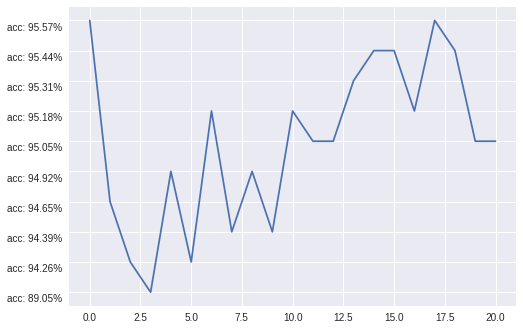

In [18]:
#for reproductivity
from numpy.random import seed 
from tensorflow import set_random_seed 
rownumber = 0
for FirstLayer in range(1000,10001,1000):
  SecondLayer = 0.5*FirstLayer
  ThirdLayer = 0.1*FirstLayer
  seed(7) 
  set_random_seed(2)
  scaler = StandardScaler()
  X = scaler.fit_transform(X)
  model = Sequential()
  model.add(Dense(FirstLayer, input_dim=8, init='uniform', activation='relu' )) #bias_initializer='zeros'
  model.add(Dense(int(SecondLayer), init='uniform', activation='tanh'))
  model.add(Dense(int(ThirdLayer), init='uniform', activation='relu'))
  model.add(Dense(1, init='uniform', activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  history = model.fit(X, Y, epochs=150, batch_size=97,validation_split=0.20 ) #shuffle = False, 
  scores = model.evaluate(X, Y)
  analysisdf.loc[rownumber,"First Layer Neurons"]=  FirstLayer
  analysisdf.loc[rownumber,"Second layer neurons"]= SecondLayer
  analysisdf.loc[rownumber,"third layer neurons"]= ThirdLayer
  analysisdf.loc[rownumber,"accuracy"]= ("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
  wks.set_dataframe(analysisdf,(1,1))
  rownumber  += 1
plt.plot(analysisdf["accuracy"])

So there is no further increase in accuracy. So we can go for lesser neurons. Lets see the change in accuracy between 1000 and 2000, 100 neurons at time.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1000, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(500, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(100, activation="relu", kernel_initializer="uniform")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  from ipykernel import kernelapp as app


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 1s 2ms/step - loss: 0.6666 - acc: 0.6656 - val_loss: 0.5957 - val_acc: 0.7208
Epoch 2/150
613/613 [==============================] - 0s 106us/step - loss: 0.5282 - acc: 0.7504 - val_loss: 0.4908 - val_acc: 0.7597
Epoch 3/150
613/613 [==============================] - 0s 100us/step - loss: 0.4817 - acc: 0.7700 - val_loss: 0.4591 - val_acc: 0.7857
Epoch 4/150
613/613 [==============================] - 0s 93us/step - loss: 0.4568 - acc: 0.7945 - val_loss: 0.4855 - val_acc: 0.7662
Epoch 5/150
613/613 [==============================] - 0s 99us/step - loss: 0.4526 - acc: 0.7830 - val_loss: 0.4818 - val_acc: 0.7662
Epoch 6/150
613/613 [==============================] - 0s 96us/step - loss: 0.4469 - acc: 0.7847 - val_loss: 0.4733 - val_acc: 0.7597
Epoch 7/150
613/613 [==============================] - 0s 106us/step - loss: 0.4383 - acc: 0.7847 - val_loss: 0.4644 - val_acc: 0.7597
Epoch 8/150
61

613/613 [==============================] - 0s 100us/step - loss: 0.3625 - acc: 0.8401 - val_loss: 0.5152 - val_acc: 0.7857
Epoch 24/150
613/613 [==============================] - 0s 101us/step - loss: 0.3541 - acc: 0.8369 - val_loss: 0.5716 - val_acc: 0.7597
Epoch 25/150
613/613 [==============================] - 0s 103us/step - loss: 0.3500 - acc: 0.8499 - val_loss: 0.5570 - val_acc: 0.7792
Epoch 26/150
613/613 [==============================] - 0s 113us/step - loss: 0.3789 - acc: 0.8222 - val_loss: 0.5481 - val_acc: 0.7662
Epoch 27/150
613/613 [==============================] - 0s 99us/step - loss: 0.3456 - acc: 0.8369 - val_loss: 0.5598 - val_acc: 0.7532
Epoch 28/150
613/613 [==============================] - 0s 101us/step - loss: 0.3469 - acc: 0.8532 - val_loss: 0.5070 - val_acc: 0.8247
Epoch 29/150
613/613 [==============================] - 0s 97us/step - loss: 0.3304 - acc: 0.8581 - val_loss: 0.5605 - val_acc: 0.7857
Epoch 30/150
613/613 [==============================] - 0s 99us

613/613 [==============================] - 0s 97us/step - loss: 0.2523 - acc: 0.8891 - val_loss: 0.9766 - val_acc: 0.7403
Epoch 46/150
613/613 [==============================] - 0s 92us/step - loss: 0.3085 - acc: 0.8581 - val_loss: 0.6566 - val_acc: 0.7987
Epoch 47/150
613/613 [==============================] - 0s 97us/step - loss: 0.3029 - acc: 0.8858 - val_loss: 0.6952 - val_acc: 0.7727
Epoch 48/150
613/613 [==============================] - 0s 93us/step - loss: 0.2431 - acc: 0.8972 - val_loss: 0.7106 - val_acc: 0.7792
Epoch 49/150
613/613 [==============================] - 0s 94us/step - loss: 0.2277 - acc: 0.9135 - val_loss: 0.6145 - val_acc: 0.7922
Epoch 50/150
613/613 [==============================] - 0s 91us/step - loss: 0.2163 - acc: 0.9070 - val_loss: 0.7590 - val_acc: 0.7792
Epoch 51/150
613/613 [==============================] - 0s 94us/step - loss: 0.2139 - acc: 0.9184 - val_loss: 0.6470 - val_acc: 0.8052
Epoch 52/150
613/613 [==============================] - 0s 104us/ste

Epoch 70/150
613/613 [==============================] - 0s 101us/step - loss: 0.2371 - acc: 0.9135 - val_loss: 1.2274 - val_acc: 0.7273
Epoch 71/150
613/613 [==============================] - 0s 111us/step - loss: 0.2026 - acc: 0.9266 - val_loss: 1.3240 - val_acc: 0.7143
Epoch 72/150
613/613 [==============================] - 0s 102us/step - loss: 0.1894 - acc: 0.9331 - val_loss: 1.1495 - val_acc: 0.7792
Epoch 73/150
613/613 [==============================] - 0s 97us/step - loss: 0.2108 - acc: 0.9233 - val_loss: 1.1062 - val_acc: 0.7468
Epoch 74/150
613/613 [==============================] - 0s 98us/step - loss: 0.1267 - acc: 0.9543 - val_loss: 0.9644 - val_acc: 0.7792
Epoch 75/150
613/613 [==============================] - 0s 102us/step - loss: 0.0893 - acc: 0.9690 - val_loss: 0.9765 - val_acc: 0.7403
Epoch 76/150
613/613 [==============================] - 0s 98us/step - loss: 0.0768 - acc: 0.9772 - val_loss: 0.8985 - val_acc: 0.7922
Epoch 77/150
613/613 [=============================

613/613 [==============================] - 0s 89us/step - loss: 0.1393 - acc: 0.9462 - val_loss: 1.4552 - val_acc: 0.7338
Epoch 95/150
613/613 [==============================] - 0s 95us/step - loss: 0.1260 - acc: 0.9494 - val_loss: 1.2825 - val_acc: 0.7532
Epoch 96/150
613/613 [==============================] - 0s 110us/step - loss: 0.1355 - acc: 0.9413 - val_loss: 1.4883 - val_acc: 0.7468
Epoch 97/150
613/613 [==============================] - 0s 98us/step - loss: 0.1377 - acc: 0.9494 - val_loss: 1.2904 - val_acc: 0.7792
Epoch 98/150
613/613 [==============================] - 0s 99us/step - loss: 0.1246 - acc: 0.9576 - val_loss: 1.1430 - val_acc: 0.7532
Epoch 99/150
613/613 [==============================] - 0s 101us/step - loss: 0.0616 - acc: 0.9821 - val_loss: 1.1280 - val_acc: 0.7662
Epoch 100/150
613/613 [==============================] - 0s 92us/step - loss: 0.0493 - acc: 0.9853 - val_loss: 1.2506 - val_acc: 0.7597
Epoch 101/150
613/613 [==============================] - 0s 94us/

613/613 [==============================] - 0s 98us/step - loss: 0.0038 - acc: 1.0000 - val_loss: 1.5462 - val_acc: 0.7792
Epoch 121/150
613/613 [==============================] - 0s 95us/step - loss: 0.0039 - acc: 1.0000 - val_loss: 1.5628 - val_acc: 0.7727
Epoch 122/150
613/613 [==============================] - 0s 102us/step - loss: 0.0035 - acc: 1.0000 - val_loss: 1.5802 - val_acc: 0.7727
Epoch 123/150
613/613 [==============================] - 0s 101us/step - loss: 0.0034 - acc: 1.0000 - val_loss: 1.5626 - val_acc: 0.7792
Epoch 124/150
613/613 [==============================] - 0s 98us/step - loss: 0.0033 - acc: 1.0000 - val_loss: 1.5893 - val_acc: 0.7727
Epoch 125/150
613/613 [==============================] - 0s 103us/step - loss: 0.0029 - acc: 1.0000 - val_loss: 1.6050 - val_acc: 0.7727
Epoch 126/150
613/613 [==============================] - 0s 99us/step - loss: 0.0028 - acc: 1.0000 - val_loss: 1.6005 - val_acc: 0.7792
Epoch 127/150
613/613 [==============================] - 0s

613/613 [==============================] - 0s 98us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 1.7135 - val_acc: 0.7792
Epoch 142/150
613/613 [==============================] - 0s 98us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 1.7249 - val_acc: 0.7727
Epoch 143/150
613/613 [==============================] - 0s 99us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 1.7223 - val_acc: 0.7792
Epoch 144/150
613/613 [==============================] - 0s 93us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 1.7248 - val_acc: 0.7792
Epoch 145/150
613/613 [==============================] - 0s 91us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 1.7355 - val_acc: 0.7792
Epoch 146/150
613/613 [==============================] - 0s 90us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 1.7446 - val_acc: 0.7792
Epoch 147/150
613/613 [==============================] - 0s 107us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 1.7358 - val_acc: 0.7792
Epoch 148/150
613/613 [==============================] - 0s 9

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1100, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(550, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(110, activation="relu", kernel_initializer="uniform")`
  


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 1s 2ms/step - loss: 0.6583 - acc: 0.6770 - val_loss: 0.5669 - val_acc: 0.7468
Epoch 2/150
613/613 [==============================] - 0s 101us/step - loss: 0.5066 - acc: 0.7602 - val_loss: 0.4932 - val_acc: 0.7532
Epoch 3/150
613/613 [==============================] - 0s 101us/step - loss: 0.4801 - acc: 0.7716 - val_loss: 0.4685 - val_acc: 0.7597
Epoch 4/150
613/613 [==============================] - 0s 102us/step - loss: 0.4581 - acc: 0.7928 - val_loss: 0.4881 - val_acc: 0.7727
Epoch 5/150
613/613 [==============================] - 0s 112us/step - loss: 0.4496 - acc: 0.7879 - val_loss: 0.4767 - val_acc: 0.7468
Epoch 6/150
613/613 [==============================] - 0s 96us/step - loss: 0.4461 - acc: 0.7830 - val_loss: 0.4740 - val_acc: 0.7662
Epoch 7/150
613/613 [==============================] - 0s 97us/step - loss: 0.4365 - acc: 0.7879 - val_loss: 0.4692 - val_acc: 0.7857
Epoch 8/150
6

613/613 [==============================] - 0s 110us/step - loss: 0.3590 - acc: 0.8385 - val_loss: 0.5246 - val_acc: 0.7857
Epoch 24/150
613/613 [==============================] - 0s 105us/step - loss: 0.3504 - acc: 0.8369 - val_loss: 0.5673 - val_acc: 0.7662
Epoch 25/150
613/613 [==============================] - 0s 96us/step - loss: 0.3376 - acc: 0.8532 - val_loss: 0.5450 - val_acc: 0.7857
Epoch 26/150
613/613 [==============================] - 0s 99us/step - loss: 0.3586 - acc: 0.8271 - val_loss: 0.5382 - val_acc: 0.7857
Epoch 27/150
613/613 [==============================] - 0s 100us/step - loss: 0.3337 - acc: 0.8532 - val_loss: 0.5541 - val_acc: 0.7597
Epoch 28/150
613/613 [==============================] - 0s 98us/step - loss: 0.3314 - acc: 0.8483 - val_loss: 0.5349 - val_acc: 0.8247
Epoch 29/150
613/613 [==============================] - 0s 101us/step - loss: 0.3331 - acc: 0.8401 - val_loss: 0.5668 - val_acc: 0.7857
Epoch 30/150
613/613 [==============================] - 0s 108us

613/613 [==============================] - 0s 113us/step - loss: 0.2643 - acc: 0.8842 - val_loss: 0.7883 - val_acc: 0.7792
Epoch 45/150
613/613 [==============================] - 0s 107us/step - loss: 0.2673 - acc: 0.8842 - val_loss: 1.0853 - val_acc: 0.7468
Epoch 46/150
613/613 [==============================] - 0s 102us/step - loss: 0.3387 - acc: 0.8564 - val_loss: 0.7119 - val_acc: 0.7532
Epoch 47/150
613/613 [==============================] - 0s 98us/step - loss: 0.3374 - acc: 0.8385 - val_loss: 0.7636 - val_acc: 0.7468
Epoch 48/150
613/613 [==============================] - 0s 108us/step - loss: 0.2726 - acc: 0.8940 - val_loss: 0.6933 - val_acc: 0.8247
Epoch 49/150
613/613 [==============================] - 0s 105us/step - loss: 0.2383 - acc: 0.9086 - val_loss: 0.7032 - val_acc: 0.7662
Epoch 50/150
613/613 [==============================] - 0s 109us/step - loss: 0.2061 - acc: 0.9282 - val_loss: 0.7061 - val_acc: 0.7727
Epoch 51/150
613/613 [==============================] - 0s 95u

613/613 [==============================] - 0s 101us/step - loss: 0.1979 - acc: 0.9152 - val_loss: 0.9989 - val_acc: 0.7597
Epoch 67/150
613/613 [==============================] - 0s 100us/step - loss: 0.1642 - acc: 0.9347 - val_loss: 0.9504 - val_acc: 0.7987
Epoch 68/150
613/613 [==============================] - 0s 96us/step - loss: 0.1406 - acc: 0.9445 - val_loss: 1.0259 - val_acc: 0.7532
Epoch 69/150
613/613 [==============================] - 0s 102us/step - loss: 0.1301 - acc: 0.9478 - val_loss: 0.9675 - val_acc: 0.8052
Epoch 70/150
613/613 [==============================] - 0s 111us/step - loss: 0.0983 - acc: 0.9674 - val_loss: 1.1469 - val_acc: 0.7597
Epoch 71/150
613/613 [==============================] - 0s 98us/step - loss: 0.1063 - acc: 0.9543 - val_loss: 1.0845 - val_acc: 0.7403
Epoch 72/150
613/613 [==============================] - 0s 94us/step - loss: 0.0985 - acc: 0.9608 - val_loss: 1.1023 - val_acc: 0.7597
Epoch 73/150
613/613 [==============================] - 0s 96us/

Epoch 90/150
613/613 [==============================] - 0s 100us/step - loss: 0.0592 - acc: 0.9804 - val_loss: 1.3956 - val_acc: 0.7532
Epoch 91/150
613/613 [==============================] - 0s 101us/step - loss: 0.0742 - acc: 0.9755 - val_loss: 1.4112 - val_acc: 0.7468
Epoch 92/150
613/613 [==============================] - 0s 103us/step - loss: 0.1083 - acc: 0.9576 - val_loss: 1.5491 - val_acc: 0.7208
Epoch 93/150
613/613 [==============================] - 0s 98us/step - loss: 0.1084 - acc: 0.9494 - val_loss: 1.4378 - val_acc: 0.7597
Epoch 94/150
613/613 [==============================] - 0s 116us/step - loss: 0.0872 - acc: 0.9690 - val_loss: 1.6287 - val_acc: 0.7792
Epoch 95/150
613/613 [==============================] - 0s 99us/step - loss: 0.1040 - acc: 0.9527 - val_loss: 1.4965 - val_acc: 0.7662
Epoch 96/150
613/613 [==============================] - 0s 109us/step - loss: 0.1235 - acc: 0.9576 - val_loss: 1.7408 - val_acc: 0.7403
Epoch 97/150
613/613 [============================

613/613 [==============================] - 0s 106us/step - loss: 0.0101 - acc: 1.0000 - val_loss: 1.6840 - val_acc: 0.7403
Epoch 112/150
613/613 [==============================] - 0s 107us/step - loss: 0.0093 - acc: 1.0000 - val_loss: 1.7076 - val_acc: 0.7468
Epoch 113/150
613/613 [==============================] - 0s 114us/step - loss: 0.0083 - acc: 1.0000 - val_loss: 1.7397 - val_acc: 0.7338
Epoch 114/150
613/613 [==============================] - 0s 102us/step - loss: 0.0079 - acc: 1.0000 - val_loss: 1.8001 - val_acc: 0.7468
Epoch 115/150
613/613 [==============================] - 0s 103us/step - loss: 0.0074 - acc: 1.0000 - val_loss: 1.7493 - val_acc: 0.7338
Epoch 116/150
613/613 [==============================] - 0s 96us/step - loss: 0.0068 - acc: 1.0000 - val_loss: 1.7699 - val_acc: 0.7403
Epoch 117/150
613/613 [==============================] - 0s 96us/step - loss: 0.0058 - acc: 1.0000 - val_loss: 1.8360 - val_acc: 0.7468
Epoch 118/150
613/613 [==============================] - 

Epoch 132/150
613/613 [==============================] - 0s 109us/step - loss: 0.0027 - acc: 1.0000 - val_loss: 1.9684 - val_acc: 0.7338
Epoch 133/150
613/613 [==============================] - 0s 104us/step - loss: 0.0026 - acc: 1.0000 - val_loss: 1.9683 - val_acc: 0.7338
Epoch 134/150
613/613 [==============================] - 0s 97us/step - loss: 0.0031 - acc: 1.0000 - val_loss: 1.9669 - val_acc: 0.7403
Epoch 135/150
613/613 [==============================] - 0s 103us/step - loss: 0.0025 - acc: 1.0000 - val_loss: 1.9780 - val_acc: 0.7403
Epoch 136/150
613/613 [==============================] - 0s 107us/step - loss: 0.0026 - acc: 1.0000 - val_loss: 2.0134 - val_acc: 0.7338
Epoch 137/150
613/613 [==============================] - 0s 103us/step - loss: 0.0025 - acc: 1.0000 - val_loss: 2.0123 - val_acc: 0.7338
Epoch 138/150
613/613 [==============================] - 0s 112us/step - loss: 0.0023 - acc: 1.0000 - val_loss: 2.0088 - val_acc: 0.7403
Epoch 139/150
613/613 [===================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1200, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(600, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(120, activation="relu", kernel_initializer="uniform")`
  


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 1s 2ms/step - loss: 0.6563 - acc: 0.6819 - val_loss: 0.5608 - val_acc: 0.7662
Epoch 2/150
613/613 [==============================] - 0s 108us/step - loss: 0.5002 - acc: 0.7667 - val_loss: 0.4925 - val_acc: 0.7532
Epoch 3/150
613/613 [==============================] - 0s 108us/step - loss: 0.4773 - acc: 0.7765 - val_loss: 0.4854 - val_acc: 0.7532
Epoch 4/150
613/613 [==============================] - 0s 99us/step - loss: 0.4591 - acc: 0.7863 - val_loss: 0.4887 - val_acc: 0.7597
Epoch 5/150
613/613 [==============================] - 0s 102us/step - loss: 0.4466 - acc: 0.7879 - val_loss: 0.4750 - val_acc: 0.7597
Epoch 6/150
613/613 [==============================] - 0s 113us/step - loss: 0.4470 - acc: 0.7879 - val_loss: 0.4671 - val_acc: 0.7532
Epoch 7/150
613/613 [==============================] - 0s 96us/step - loss: 0.4334 - acc: 0.7912 - val_loss: 0.4719 - val_acc: 0.7662
Epoch 8/150
6

613/613 [==============================] - 0s 113us/step - loss: 0.3571 - acc: 0.8369 - val_loss: 0.5290 - val_acc: 0.7857
Epoch 24/150
613/613 [==============================] - 0s 108us/step - loss: 0.3495 - acc: 0.8450 - val_loss: 0.5770 - val_acc: 0.7727
Epoch 25/150
613/613 [==============================] - 0s 103us/step - loss: 0.3358 - acc: 0.8532 - val_loss: 0.5454 - val_acc: 0.7857
Epoch 26/150
613/613 [==============================] - 0s 104us/step - loss: 0.3551 - acc: 0.8352 - val_loss: 0.5369 - val_acc: 0.7922
Epoch 27/150
613/613 [==============================] - 0s 103us/step - loss: 0.3330 - acc: 0.8483 - val_loss: 0.5612 - val_acc: 0.7468
Epoch 28/150
613/613 [==============================] - 0s 100us/step - loss: 0.3263 - acc: 0.8564 - val_loss: 0.5519 - val_acc: 0.8052
Epoch 29/150
613/613 [==============================] - 0s 111us/step - loss: 0.3397 - acc: 0.8450 - val_loss: 0.5742 - val_acc: 0.7792
Epoch 30/150
613/613 [==============================] - 0s 10

613/613 [==============================] - 0s 104us/step - loss: 0.2209 - acc: 0.9184 - val_loss: 0.7188 - val_acc: 0.7727
Epoch 45/150
613/613 [==============================] - 0s 105us/step - loss: 0.2027 - acc: 0.9135 - val_loss: 0.8530 - val_acc: 0.7468
Epoch 46/150
613/613 [==============================] - 0s 109us/step - loss: 0.2205 - acc: 0.9086 - val_loss: 0.7591 - val_acc: 0.7922
Epoch 47/150
613/613 [==============================] - 0s 104us/step - loss: 0.1991 - acc: 0.9315 - val_loss: 0.7888 - val_acc: 0.8052
Epoch 48/150
613/613 [==============================] - 0s 106us/step - loss: 0.2111 - acc: 0.9119 - val_loss: 0.9603 - val_acc: 0.7532
Epoch 49/150
613/613 [==============================] - 0s 111us/step - loss: 0.2014 - acc: 0.9168 - val_loss: 0.8572 - val_acc: 0.7857
Epoch 50/150
613/613 [==============================] - 0s 106us/step - loss: 0.2041 - acc: 0.9119 - val_loss: 0.8065 - val_acc: 0.7597
Epoch 51/150
613/613 [==============================] - 0s 10

613/613 [==============================] - 0s 95us/step - loss: 0.1367 - acc: 0.9445 - val_loss: 1.0201 - val_acc: 0.7922
Epoch 66/150
613/613 [==============================] - 0s 107us/step - loss: 0.1237 - acc: 0.9576 - val_loss: 1.2378 - val_acc: 0.6818
Epoch 67/150
613/613 [==============================] - 0s 108us/step - loss: 0.2106 - acc: 0.9250 - val_loss: 1.0596 - val_acc: 0.7338
Epoch 68/150
613/613 [==============================] - 0s 106us/step - loss: 0.1620 - acc: 0.9396 - val_loss: 1.1051 - val_acc: 0.7532
Epoch 69/150
613/613 [==============================] - 0s 109us/step - loss: 0.1656 - acc: 0.9299 - val_loss: 1.1507 - val_acc: 0.7532
Epoch 70/150
613/613 [==============================] - 0s 105us/step - loss: 0.1454 - acc: 0.9396 - val_loss: 1.1040 - val_acc: 0.7792
Epoch 71/150
613/613 [==============================] - 0s 112us/step - loss: 0.1276 - acc: 0.9494 - val_loss: 1.0323 - val_acc: 0.7662
Epoch 72/150
613/613 [==============================] - 0s 104

Epoch 86/150
613/613 [==============================] - 0s 118us/step - loss: 0.1108 - acc: 0.9543 - val_loss: 1.1210 - val_acc: 0.7857
Epoch 87/150
613/613 [==============================] - 0s 99us/step - loss: 0.0771 - acc: 0.9723 - val_loss: 1.1737 - val_acc: 0.7403
Epoch 88/150
613/613 [==============================] - 0s 107us/step - loss: 0.0616 - acc: 0.9788 - val_loss: 1.2356 - val_acc: 0.7532
Epoch 89/150
613/613 [==============================] - 0s 102us/step - loss: 0.0400 - acc: 0.9935 - val_loss: 1.1769 - val_acc: 0.7662
Epoch 90/150
613/613 [==============================] - 0s 100us/step - loss: 0.0363 - acc: 0.9902 - val_loss: 1.2574 - val_acc: 0.7532
Epoch 91/150
613/613 [==============================] - 0s 103us/step - loss: 0.0260 - acc: 0.9967 - val_loss: 1.2359 - val_acc: 0.7468
Epoch 92/150
613/613 [==============================] - 0s 112us/step - loss: 0.0237 - acc: 0.9984 - val_loss: 1.4053 - val_acc: 0.7403
Epoch 93/150
613/613 [===========================

613/613 [==============================] - 0s 106us/step - loss: 0.0052 - acc: 1.0000 - val_loss: 1.6960 - val_acc: 0.7532
Epoch 108/150
613/613 [==============================] - 0s 111us/step - loss: 0.0067 - acc: 1.0000 - val_loss: 1.6345 - val_acc: 0.7597
Epoch 109/150
613/613 [==============================] - 0s 99us/step - loss: 0.0053 - acc: 1.0000 - val_loss: 1.7825 - val_acc: 0.7468
Epoch 110/150
613/613 [==============================] - 0s 97us/step - loss: 0.0097 - acc: 0.9967 - val_loss: 1.7750 - val_acc: 0.7468
Epoch 111/150
613/613 [==============================] - 0s 111us/step - loss: 0.0055 - acc: 0.9984 - val_loss: 1.6651 - val_acc: 0.7792
Epoch 112/150
613/613 [==============================] - 0s 103us/step - loss: 0.0072 - acc: 0.9984 - val_loss: 2.0126 - val_acc: 0.7468
Epoch 113/150
613/613 [==============================] - 0s 100us/step - loss: 0.0327 - acc: 0.9886 - val_loss: 1.8178 - val_acc: 0.7597
Epoch 114/150
613/613 [==============================] - 

613/613 [==============================] - 0s 106us/step - loss: 0.0442 - acc: 0.9918 - val_loss: 1.3001 - val_acc: 0.7597
Epoch 129/150
613/613 [==============================] - 0s 110us/step - loss: 0.0336 - acc: 0.9967 - val_loss: 1.3565 - val_acc: 0.7597
Epoch 130/150
613/613 [==============================] - 0s 100us/step - loss: 0.0276 - acc: 0.9967 - val_loss: 1.4560 - val_acc: 0.7532
Epoch 131/150
613/613 [==============================] - 0s 101us/step - loss: 0.0227 - acc: 0.9967 - val_loss: 1.4850 - val_acc: 0.7532
Epoch 132/150
613/613 [==============================] - 0s 102us/step - loss: 0.0181 - acc: 0.9984 - val_loss: 1.5851 - val_acc: 0.7597
Epoch 133/150
613/613 [==============================] - 0s 96us/step - loss: 0.0156 - acc: 0.9984 - val_loss: 1.5675 - val_acc: 0.7532
Epoch 134/150
613/613 [==============================] - 0s 102us/step - loss: 0.0153 - acc: 0.9984 - val_loss: 1.6453 - val_acc: 0.7597
Epoch 135/150
613/613 [==============================] -

Epoch 150/150
767/767 [==============================] - 0s 73us/step


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1300, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(650, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(130, activation="relu", kernel_initializer="uniform")`
  


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 1s 2ms/step - loss: 0.6484 - acc: 0.6786 - val_loss: 0.5469 - val_acc: 0.7597
Epoch 2/150
613/613 [==============================] - 0s 110us/step - loss: 0.4912 - acc: 0.7667 - val_loss: 0.4887 - val_acc: 0.7403
Epoch 3/150
613/613 [==============================] - 0s 105us/step - loss: 0.4721 - acc: 0.7765 - val_loss: 0.4914 - val_acc: 0.7727
Epoch 4/150
613/613 [==============================] - 0s 99us/step - loss: 0.4584 - acc: 0.7945 - val_loss: 0.4881 - val_acc: 0.7792
Epoch 5/150
613/613 [==============================] - 0s 114us/step - loss: 0.4436 - acc: 0.7896 - val_loss: 0.4751 - val_acc: 0.7727
Epoch 6/150
613/613 [==============================] - 0s 114us/step - loss: 0.4453 - acc: 0.7896 - val_loss: 0.4637 - val_acc: 0.7662
Epoch 7/150
613/613 [==============================] - 0s 100us/step - loss: 0.4300 - acc: 0.7993 - val_loss: 0.4763 - val_acc: 0.7792
Epoch 8/150


613/613 [==============================] - 0s 120us/step - loss: 0.3508 - acc: 0.8434 - val_loss: 0.5445 - val_acc: 0.7857
Epoch 24/150
613/613 [==============================] - 0s 98us/step - loss: 0.3425 - acc: 0.8385 - val_loss: 0.5614 - val_acc: 0.7727
Epoch 25/150
613/613 [==============================] - 0s 107us/step - loss: 0.3220 - acc: 0.8662 - val_loss: 0.5552 - val_acc: 0.7792
Epoch 26/150
613/613 [==============================] - 0s 105us/step - loss: 0.3381 - acc: 0.8418 - val_loss: 0.5484 - val_acc: 0.7922
Epoch 27/150
613/613 [==============================] - 0s 101us/step - loss: 0.3279 - acc: 0.8499 - val_loss: 0.5332 - val_acc: 0.7792
Epoch 28/150
613/613 [==============================] - 0s 107us/step - loss: 0.3187 - acc: 0.8646 - val_loss: 0.5532 - val_acc: 0.8117
Epoch 29/150
613/613 [==============================] - 0s 116us/step - loss: 0.3017 - acc: 0.8662 - val_loss: 0.6593 - val_acc: 0.7532
Epoch 30/150
613/613 [==============================] - 0s 116

Epoch 46/150
613/613 [==============================] - 0s 106us/step - loss: 0.2353 - acc: 0.9021 - val_loss: 0.8173 - val_acc: 0.7727
Epoch 47/150
613/613 [==============================] - 0s 114us/step - loss: 0.2036 - acc: 0.9184 - val_loss: 0.7787 - val_acc: 0.7727
Epoch 48/150
613/613 [==============================] - 0s 111us/step - loss: 0.1789 - acc: 0.9396 - val_loss: 0.9240 - val_acc: 0.7532
Epoch 49/150
613/613 [==============================] - 0s 108us/step - loss: 0.1924 - acc: 0.9299 - val_loss: 0.7932 - val_acc: 0.7792
Epoch 50/150
613/613 [==============================] - 0s 105us/step - loss: 0.2046 - acc: 0.9135 - val_loss: 0.9452 - val_acc: 0.7208
Epoch 51/150
613/613 [==============================] - 0s 112us/step - loss: 0.2863 - acc: 0.8874 - val_loss: 0.8829 - val_acc: 0.7532
Epoch 52/150
613/613 [==============================] - 0s 108us/step - loss: 0.2234 - acc: 0.9103 - val_loss: 0.8794 - val_acc: 0.7662
Epoch 53/150
613/613 [==========================

Epoch 68/150
613/613 [==============================] - 0s 105us/step - loss: 0.1922 - acc: 0.9347 - val_loss: 1.2623 - val_acc: 0.7208
Epoch 69/150
613/613 [==============================] - 0s 108us/step - loss: 0.1916 - acc: 0.9168 - val_loss: 1.2136 - val_acc: 0.7013
Epoch 70/150
613/613 [==============================] - 0s 104us/step - loss: 0.1166 - acc: 0.9592 - val_loss: 1.1299 - val_acc: 0.7532
Epoch 71/150
613/613 [==============================] - 0s 116us/step - loss: 0.1249 - acc: 0.9576 - val_loss: 1.0996 - val_acc: 0.7403
Epoch 72/150
613/613 [==============================] - 0s 103us/step - loss: 0.1108 - acc: 0.9560 - val_loss: 1.1057 - val_acc: 0.7403
Epoch 73/150
613/613 [==============================] - 0s 103us/step - loss: 0.0926 - acc: 0.9576 - val_loss: 1.1025 - val_acc: 0.7727
Epoch 74/150
613/613 [==============================] - 0s 100us/step - loss: 0.1074 - acc: 0.9625 - val_loss: 1.2996 - val_acc: 0.7338
Epoch 75/150
613/613 [==========================

613/613 [==============================] - 0s 102us/step - loss: 0.0854 - acc: 0.9706 - val_loss: 1.3590 - val_acc: 0.7727
Epoch 92/150
613/613 [==============================] - 0s 110us/step - loss: 0.0764 - acc: 0.9755 - val_loss: 1.3374 - val_acc: 0.7273
Epoch 93/150
613/613 [==============================] - 0s 103us/step - loss: 0.0656 - acc: 0.9837 - val_loss: 1.5356 - val_acc: 0.7273
Epoch 94/150
613/613 [==============================] - 0s 115us/step - loss: 0.0768 - acc: 0.9772 - val_loss: 1.3734 - val_acc: 0.7792
Epoch 95/150
613/613 [==============================] - 0s 106us/step - loss: 0.0849 - acc: 0.9657 - val_loss: 1.4291 - val_acc: 0.7597
Epoch 96/150
613/613 [==============================] - 0s 108us/step - loss: 0.0841 - acc: 0.9723 - val_loss: 1.4683 - val_acc: 0.7727
Epoch 97/150
613/613 [==============================] - 0s 109us/step - loss: 0.0593 - acc: 0.9723 - val_loss: 1.3826 - val_acc: 0.7338
Epoch 98/150
613/613 [==============================] - 0s 10

613/613 [==============================] - 0s 106us/step - loss: 0.0300 - acc: 0.9853 - val_loss: 1.4658 - val_acc: 0.7532
Epoch 114/150
613/613 [==============================] - 0s 108us/step - loss: 0.0292 - acc: 0.9951 - val_loss: 1.7834 - val_acc: 0.7662
Epoch 115/150
613/613 [==============================] - 0s 106us/step - loss: 0.0570 - acc: 0.9788 - val_loss: 1.5848 - val_acc: 0.7208
Epoch 116/150
613/613 [==============================] - 0s 111us/step - loss: 0.0179 - acc: 0.9935 - val_loss: 1.5525 - val_acc: 0.7403
Epoch 117/150
613/613 [==============================] - 0s 106us/step - loss: 0.0136 - acc: 0.9984 - val_loss: 1.5638 - val_acc: 0.7727
Epoch 118/150
613/613 [==============================] - 0s 116us/step - loss: 0.0110 - acc: 0.9967 - val_loss: 1.5947 - val_acc: 0.7597
Epoch 119/150
613/613 [==============================] - 0s 105us/step - loss: 0.0102 - acc: 0.9967 - val_loss: 1.6478 - val_acc: 0.7468
Epoch 120/150
613/613 [==============================] 

613/613 [==============================] - 0s 104us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 1.7725 - val_acc: 0.7532
Epoch 135/150
613/613 [==============================] - 0s 110us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 1.7821 - val_acc: 0.7532
Epoch 136/150
613/613 [==============================] - 0s 114us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 1.7825 - val_acc: 0.7468
Epoch 137/150
613/613 [==============================] - 0s 111us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 1.7833 - val_acc: 0.7597
Epoch 138/150
613/613 [==============================] - 0s 110us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 1.7992 - val_acc: 0.7468
Epoch 139/150
613/613 [==============================] - 0s 105us/step - loss: 0.0010 - acc: 1.0000 - val_loss: 1.8049 - val_acc: 0.7532
Epoch 140/150
613/613 [==============================] - 0s 107us/step - loss: 9.9879e-04 - acc: 1.0000 - val_loss: 1.7947 - val_acc: 0.7532
Epoch 141/150
613/613 [============================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1400, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(700, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(140, activation="relu", kernel_initializer="uniform")`
  


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 1s 2ms/step - loss: 0.6399 - acc: 0.6900 - val_loss: 0.5272 - val_acc: 0.7662
Epoch 2/150
613/613 [==============================] - 0s 117us/step - loss: 0.4851 - acc: 0.7814 - val_loss: 0.4833 - val_acc: 0.7532
Epoch 3/150
613/613 [==============================] - 0s 107us/step - loss: 0.4696 - acc: 0.7847 - val_loss: 0.4902 - val_acc: 0.7727
Epoch 4/150
613/613 [==============================] - 0s 110us/step - loss: 0.4581 - acc: 0.7896 - val_loss: 0.4850 - val_acc: 0.7662
Epoch 5/150
613/613 [==============================] - 0s 110us/step - loss: 0.4438 - acc: 0.7896 - val_loss: 0.4769 - val_acc: 0.7597
Epoch 6/150
613/613 [==============================] - 0s 111us/step - loss: 0.4430 - acc: 0.7847 - val_loss: 0.4672 - val_acc: 0.7662
Epoch 7/150
613/613 [==============================] - 0s 110us/step - loss: 0.4290 - acc: 0.7961 - val_loss: 0.4814 - val_acc: 0.7597
Epoch 8/150

Epoch 25/150
613/613 [==============================] - 0s 110us/step - loss: 0.3117 - acc: 0.8695 - val_loss: 0.5725 - val_acc: 0.7987
Epoch 26/150
613/613 [==============================] - 0s 105us/step - loss: 0.3262 - acc: 0.8564 - val_loss: 0.5727 - val_acc: 0.7792
Epoch 27/150
613/613 [==============================] - 0s 106us/step - loss: 0.3161 - acc: 0.8597 - val_loss: 0.5555 - val_acc: 0.7922
Epoch 28/150
613/613 [==============================] - 0s 114us/step - loss: 0.3151 - acc: 0.8613 - val_loss: 0.5975 - val_acc: 0.7987
Epoch 29/150
613/613 [==============================] - 0s 110us/step - loss: 0.2923 - acc: 0.8744 - val_loss: 0.6610 - val_acc: 0.7532
Epoch 30/150
613/613 [==============================] - 0s 116us/step - loss: 0.3000 - acc: 0.8662 - val_loss: 0.6144 - val_acc: 0.7792
Epoch 31/150
613/613 [==============================] - 0s 109us/step - loss: 0.2930 - acc: 0.8695 - val_loss: 0.7114 - val_acc: 0.7792
Epoch 32/150
613/613 [==========================

Epoch 48/150
613/613 [==============================] - 0s 108us/step - loss: 0.2688 - acc: 0.8809 - val_loss: 0.9283 - val_acc: 0.7338
Epoch 49/150
613/613 [==============================] - 0s 104us/step - loss: 0.2736 - acc: 0.8809 - val_loss: 0.6521 - val_acc: 0.7727
Epoch 50/150
613/613 [==============================] - 0s 111us/step - loss: 0.2456 - acc: 0.8923 - val_loss: 0.7022 - val_acc: 0.7857
Epoch 51/150
613/613 [==============================] - 0s 113us/step - loss: 0.2087 - acc: 0.9005 - val_loss: 0.7569 - val_acc: 0.7922
Epoch 52/150
613/613 [==============================] - 0s 118us/step - loss: 0.1862 - acc: 0.9152 - val_loss: 0.8068 - val_acc: 0.7662
Epoch 53/150
613/613 [==============================] - 0s 104us/step - loss: 0.1564 - acc: 0.9462 - val_loss: 0.8494 - val_acc: 0.7597
Epoch 54/150
613/613 [==============================] - 0s 105us/step - loss: 0.1472 - acc: 0.9462 - val_loss: 0.9498 - val_acc: 0.7857
Epoch 55/150
613/613 [==========================

613/613 [==============================] - 0s 118us/step - loss: 0.1327 - acc: 0.9511 - val_loss: 1.0841 - val_acc: 0.7403
Epoch 74/150
613/613 [==============================] - 0s 111us/step - loss: 0.1078 - acc: 0.9625 - val_loss: 1.2442 - val_acc: 0.7597
Epoch 75/150
613/613 [==============================] - 0s 107us/step - loss: 0.0903 - acc: 0.9625 - val_loss: 1.1977 - val_acc: 0.7857
Epoch 76/150
613/613 [==============================] - 0s 118us/step - loss: 0.0879 - acc: 0.9690 - val_loss: 1.1944 - val_acc: 0.7662
Epoch 77/150
613/613 [==============================] - 0s 108us/step - loss: 0.0917 - acc: 0.9755 - val_loss: 1.3517 - val_acc: 0.7403
Epoch 78/150
613/613 [==============================] - 0s 102us/step - loss: 0.0733 - acc: 0.9772 - val_loss: 1.1792 - val_acc: 0.7857
Epoch 79/150
613/613 [==============================] - 0s 104us/step - loss: 0.0623 - acc: 0.9739 - val_loss: 1.3365 - val_acc: 0.7532
Epoch 80/150
613/613 [==============================] - 0s 11

613/613 [==============================] - 0s 104us/step - loss: 0.0480 - acc: 0.9869 - val_loss: 1.2833 - val_acc: 0.7727
Epoch 96/150
613/613 [==============================] - 0s 107us/step - loss: 0.0452 - acc: 0.9902 - val_loss: 1.4196 - val_acc: 0.7727
Epoch 97/150
613/613 [==============================] - 0s 109us/step - loss: 0.0383 - acc: 0.9918 - val_loss: 1.3965 - val_acc: 0.7662
Epoch 98/150
613/613 [==============================] - 0s 109us/step - loss: 0.0351 - acc: 0.9902 - val_loss: 1.4274 - val_acc: 0.7987
Epoch 99/150
613/613 [==============================] - 0s 102us/step - loss: 0.0397 - acc: 0.9886 - val_loss: 1.4449 - val_acc: 0.7662
Epoch 100/150
613/613 [==============================] - 0s 107us/step - loss: 0.0399 - acc: 0.9869 - val_loss: 1.5533 - val_acc: 0.7532
Epoch 101/150
613/613 [==============================] - 0s 102us/step - loss: 0.0268 - acc: 0.9951 - val_loss: 1.4764 - val_acc: 0.7857
Epoch 102/150
613/613 [==============================] - 0s

613/613 [==============================] - 0s 115us/step - loss: 0.0522 - acc: 0.9837 - val_loss: 1.7353 - val_acc: 0.7662
Epoch 119/150
613/613 [==============================] - 0s 106us/step - loss: 0.0408 - acc: 0.9853 - val_loss: 1.7421 - val_acc: 0.7597
Epoch 120/150
613/613 [==============================] - 0s 108us/step - loss: 0.0438 - acc: 0.9918 - val_loss: 1.7103 - val_acc: 0.7597
Epoch 121/150
613/613 [==============================] - 0s 111us/step - loss: 0.0530 - acc: 0.9837 - val_loss: 1.8170 - val_acc: 0.7403
Epoch 122/150
613/613 [==============================] - 0s 118us/step - loss: 0.1126 - acc: 0.9625 - val_loss: 1.8459 - val_acc: 0.7208
Epoch 123/150
613/613 [==============================] - 0s 109us/step - loss: 0.1529 - acc: 0.9543 - val_loss: 1.7437 - val_acc: 0.7532
Epoch 124/150
613/613 [==============================] - 0s 107us/step - loss: 0.1333 - acc: 0.9511 - val_loss: 1.8256 - val_acc: 0.7792
Epoch 125/150
613/613 [==============================] 

Epoch 143/150
613/613 [==============================] - 0s 109us/step - loss: 0.0116 - acc: 0.9967 - val_loss: 1.7620 - val_acc: 0.7597
Epoch 144/150
613/613 [==============================] - 0s 106us/step - loss: 0.0085 - acc: 1.0000 - val_loss: 1.7002 - val_acc: 0.7857
Epoch 145/150
613/613 [==============================] - 0s 107us/step - loss: 0.0090 - acc: 0.9967 - val_loss: 1.7335 - val_acc: 0.7662
Epoch 146/150
613/613 [==============================] - 0s 113us/step - loss: 0.0116 - acc: 0.9984 - val_loss: 1.7248 - val_acc: 0.7792
Epoch 147/150
613/613 [==============================] - 0s 108us/step - loss: 0.0115 - acc: 0.9984 - val_loss: 1.7863 - val_acc: 0.7597
Epoch 148/150
613/613 [==============================] - 0s 106us/step - loss: 0.0098 - acc: 0.9951 - val_loss: 1.7365 - val_acc: 0.7987
Epoch 149/150
613/613 [==============================] - 0s 110us/step - loss: 0.0217 - acc: 0.9967 - val_loss: 1.8785 - val_acc: 0.7403
Epoch 150/150
767/767 [==================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1500, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(750, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(150, activation="relu", kernel_initializer="uniform")`
  


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 1s 2ms/step - loss: 0.6363 - acc: 0.6835 - val_loss: 0.5198 - val_acc: 0.7792
Epoch 2/150
613/613 [==============================] - 0s 125us/step - loss: 0.4828 - acc: 0.7814 - val_loss: 0.4909 - val_acc: 0.7532
Epoch 3/150
613/613 [==============================] - 0s 108us/step - loss: 0.4659 - acc: 0.7798 - val_loss: 0.5014 - val_acc: 0.7532
Epoch 4/150
613/613 [==============================] - 0s 115us/step - loss: 0.4586 - acc: 0.7879 - val_loss: 0.4838 - val_acc: 0.7662
Epoch 5/150
613/613 [==============================] - 0s 112us/step - loss: 0.4430 - acc: 0.7928 - val_loss: 0.4769 - val_acc: 0.7597
Epoch 6/150
613/613 [==============================] - 0s 119us/step - loss: 0.4408 - acc: 0.7814 - val_loss: 0.4687 - val_acc: 0.7792
Epoch 7/150
613/613 [==============================] - 0s 106us/step - loss: 0.4275 - acc: 0.7912 - val_loss: 0.4795 - val_acc: 0.7727
Epoch 8/150

Epoch 27/150
613/613 [==============================] - 0s 108us/step - loss: 0.3043 - acc: 0.8646 - val_loss: 0.5757 - val_acc: 0.7792
Epoch 28/150
613/613 [==============================] - 0s 118us/step - loss: 0.3039 - acc: 0.8695 - val_loss: 0.6153 - val_acc: 0.8052
Epoch 29/150
613/613 [==============================] - 0s 111us/step - loss: 0.2983 - acc: 0.8662 - val_loss: 0.6146 - val_acc: 0.7857
Epoch 30/150
613/613 [==============================] - 0s 112us/step - loss: 0.2864 - acc: 0.8744 - val_loss: 0.6007 - val_acc: 0.7857
Epoch 31/150
613/613 [==============================] - 0s 111us/step - loss: 0.2828 - acc: 0.8760 - val_loss: 0.7873 - val_acc: 0.7727
Epoch 32/150
613/613 [==============================] - 0s 109us/step - loss: 0.3737 - acc: 0.8434 - val_loss: 0.6317 - val_acc: 0.7662
Epoch 33/150
613/613 [==============================] - 0s 128us/step - loss: 0.3220 - acc: 0.8548 - val_loss: 0.5400 - val_acc: 0.7857
Epoch 34/150
613/613 [==========================

Epoch 53/150
613/613 [==============================] - 0s 118us/step - loss: 0.1709 - acc: 0.9347 - val_loss: 0.9081 - val_acc: 0.7857
Epoch 54/150
613/613 [==============================] - 0s 114us/step - loss: 0.1501 - acc: 0.9380 - val_loss: 0.9701 - val_acc: 0.7792
Epoch 55/150
613/613 [==============================] - 0s 116us/step - loss: 0.1358 - acc: 0.9478 - val_loss: 1.0647 - val_acc: 0.7597
Epoch 56/150
613/613 [==============================] - 0s 119us/step - loss: 0.1530 - acc: 0.9396 - val_loss: 1.0524 - val_acc: 0.7662
Epoch 57/150
613/613 [==============================] - 0s 108us/step - loss: 0.1216 - acc: 0.9608 - val_loss: 1.1260 - val_acc: 0.7662
Epoch 58/150
613/613 [==============================] - 0s 113us/step - loss: 0.1429 - acc: 0.9347 - val_loss: 1.2567 - val_acc: 0.7792
Epoch 59/150
613/613 [==============================] - 0s 107us/step - loss: 0.2050 - acc: 0.9054 - val_loss: 1.1409 - val_acc: 0.7208
Epoch 60/150
613/613 [==========================

Epoch 79/150
613/613 [==============================] - 0s 116us/step - loss: 0.0641 - acc: 0.9804 - val_loss: 1.3983 - val_acc: 0.7597
Epoch 80/150
613/613 [==============================] - 0s 112us/step - loss: 0.0669 - acc: 0.9772 - val_loss: 1.7591 - val_acc: 0.7208
Epoch 81/150
613/613 [==============================] - 0s 111us/step - loss: 0.2384 - acc: 0.9364 - val_loss: 1.4415 - val_acc: 0.7597
Epoch 82/150
613/613 [==============================] - 0s 108us/step - loss: 0.1649 - acc: 0.9511 - val_loss: 1.5360 - val_acc: 0.7597
Epoch 83/150
613/613 [==============================] - 0s 111us/step - loss: 0.1970 - acc: 0.9331 - val_loss: 1.4116 - val_acc: 0.7597
Epoch 84/150
613/613 [==============================] - 0s 109us/step - loss: 0.1961 - acc: 0.9282 - val_loss: 1.2206 - val_acc: 0.7532
Epoch 85/150
613/613 [==============================] - 0s 120us/step - loss: 0.1633 - acc: 0.9299 - val_loss: 1.2898 - val_acc: 0.7403
Epoch 86/150
613/613 [==========================

Epoch 104/150
613/613 [==============================] - 0s 117us/step - loss: 0.0773 - acc: 0.9706 - val_loss: 1.6941 - val_acc: 0.7338
Epoch 105/150
613/613 [==============================] - 0s 118us/step - loss: 0.0597 - acc: 0.9755 - val_loss: 1.7761 - val_acc: 0.7727
Epoch 106/150
613/613 [==============================] - 0s 109us/step - loss: 0.1011 - acc: 0.9608 - val_loss: 1.6927 - val_acc: 0.7597
Epoch 107/150
613/613 [==============================] - 0s 111us/step - loss: 0.1439 - acc: 0.9608 - val_loss: 1.9184 - val_acc: 0.7597
Epoch 108/150
613/613 [==============================] - 0s 120us/step - loss: 0.0991 - acc: 0.9674 - val_loss: 1.9668 - val_acc: 0.7403
Epoch 109/150
613/613 [==============================] - 0s 109us/step - loss: 0.0936 - acc: 0.9690 - val_loss: 1.6483 - val_acc: 0.7273
Epoch 110/150
613/613 [==============================] - 0s 105us/step - loss: 0.1051 - acc: 0.9657 - val_loss: 1.7264 - val_acc: 0.7403
Epoch 111/150
613/613 [==================

613/613 [==============================] - 0s 110us/step - loss: 0.0214 - acc: 0.9902 - val_loss: 2.1358 - val_acc: 0.7078
Epoch 131/150
613/613 [==============================] - 0s 124us/step - loss: 0.0397 - acc: 0.9902 - val_loss: 2.0767 - val_acc: 0.7468
Epoch 132/150
613/613 [==============================] - 0s 113us/step - loss: 0.0337 - acc: 0.9869 - val_loss: 1.9772 - val_acc: 0.7273
Epoch 133/150
613/613 [==============================] - 0s 112us/step - loss: 0.0335 - acc: 0.9869 - val_loss: 2.1304 - val_acc: 0.7273
Epoch 134/150
613/613 [==============================] - 0s 105us/step - loss: 0.0496 - acc: 0.9837 - val_loss: 2.1378 - val_acc: 0.7403
Epoch 135/150
613/613 [==============================] - 0s 110us/step - loss: 0.0593 - acc: 0.9821 - val_loss: 2.0785 - val_acc: 0.7208
Epoch 136/150
613/613 [==============================] - 0s 117us/step - loss: 0.0652 - acc: 0.9772 - val_loss: 2.1149 - val_acc: 0.7273
Epoch 137/150
613/613 [==============================] 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1600, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(800, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(160, activation="relu", kernel_initializer="uniform")`
  


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 1s 2ms/step - loss: 0.6294 - acc: 0.6819 - val_loss: 0.5111 - val_acc: 0.7857
Epoch 2/150
613/613 [==============================] - 0s 128us/step - loss: 0.4795 - acc: 0.7749 - val_loss: 0.4882 - val_acc: 0.7597
Epoch 3/150
613/613 [==============================] - 0s 110us/step - loss: 0.4640 - acc: 0.7798 - val_loss: 0.5010 - val_acc: 0.7532
Epoch 4/150
613/613 [==============================] - 0s 120us/step - loss: 0.4588 - acc: 0.7847 - val_loss: 0.4830 - val_acc: 0.7662
Epoch 5/150
613/613 [==============================] - 0s 109us/step - loss: 0.4437 - acc: 0.7912 - val_loss: 0.4765 - val_acc: 0.7662
Epoch 6/150
613/613 [==============================] - 0s 114us/step - loss: 0.4404 - acc: 0.7863 - val_loss: 0.4695 - val_acc: 0.7727
Epoch 7/150
613/613 [==============================] - 0s 110us/step - loss: 0.4276 - acc: 0.7961 - val_loss: 0.4798 - val_acc: 0.7727
Epoch 8/150

Epoch 27/150
613/613 [==============================] - 0s 114us/step - loss: 0.3161 - acc: 0.8564 - val_loss: 0.6031 - val_acc: 0.7857
Epoch 28/150
613/613 [==============================] - 0s 133us/step - loss: 0.3089 - acc: 0.8760 - val_loss: 0.6340 - val_acc: 0.7922
Epoch 29/150
613/613 [==============================] - 0s 115us/step - loss: 0.2874 - acc: 0.8728 - val_loss: 0.7068 - val_acc: 0.7792
Epoch 30/150
613/613 [==============================] - 0s 117us/step - loss: 0.2770 - acc: 0.8777 - val_loss: 0.6550 - val_acc: 0.7597
Epoch 31/150
613/613 [==============================] - 0s 113us/step - loss: 0.2654 - acc: 0.9005 - val_loss: 0.7742 - val_acc: 0.7987
Epoch 32/150
613/613 [==============================] - 0s 115us/step - loss: 0.3583 - acc: 0.8515 - val_loss: 0.6313 - val_acc: 0.7662
Epoch 33/150
613/613 [==============================] - 0s 134us/step - loss: 0.2983 - acc: 0.8581 - val_loss: 0.6068 - val_acc: 0.7792
Epoch 34/150
613/613 [==========================

613/613 [==============================] - 0s 114us/step - loss: 0.1541 - acc: 0.9364 - val_loss: 0.9839 - val_acc: 0.7857
Epoch 53/150
613/613 [==============================] - 0s 112us/step - loss: 0.1429 - acc: 0.9315 - val_loss: 1.0711 - val_acc: 0.7727
Epoch 54/150
613/613 [==============================] - 0s 119us/step - loss: 0.1278 - acc: 0.9511 - val_loss: 1.1119 - val_acc: 0.7597
Epoch 55/150
613/613 [==============================] - 0s 115us/step - loss: 0.1223 - acc: 0.9576 - val_loss: 1.2782 - val_acc: 0.7857
Epoch 56/150
613/613 [==============================] - 0s 114us/step - loss: 0.1683 - acc: 0.9347 - val_loss: 1.1644 - val_acc: 0.7662
Epoch 57/150
613/613 [==============================] - 0s 112us/step - loss: 0.1584 - acc: 0.9380 - val_loss: 1.1462 - val_acc: 0.7338
Epoch 58/150
613/613 [==============================] - 0s 114us/step - loss: 0.1926 - acc: 0.9086 - val_loss: 1.3198 - val_acc: 0.7857
Epoch 59/150
613/613 [==============================] - 0s 11

Epoch 78/150
613/613 [==============================] - 0s 111us/step - loss: 0.0651 - acc: 0.9772 - val_loss: 1.5081 - val_acc: 0.7532
Epoch 79/150
613/613 [==============================] - 0s 114us/step - loss: 0.0487 - acc: 0.9853 - val_loss: 1.6963 - val_acc: 0.7403
Epoch 80/150
613/613 [==============================] - 0s 117us/step - loss: 0.0367 - acc: 0.9886 - val_loss: 1.5547 - val_acc: 0.6948
Epoch 81/150
613/613 [==============================] - 0s 122us/step - loss: 0.0389 - acc: 0.9837 - val_loss: 1.7845 - val_acc: 0.7468
Epoch 82/150
613/613 [==============================] - 0s 115us/step - loss: 0.0685 - acc: 0.9788 - val_loss: 1.6688 - val_acc: 0.7532
Epoch 83/150
613/613 [==============================] - 0s 132us/step - loss: 0.1085 - acc: 0.9625 - val_loss: 1.6287 - val_acc: 0.7403
Epoch 84/150
613/613 [==============================] - 0s 113us/step - loss: 0.1080 - acc: 0.9608 - val_loss: 1.7990 - val_acc: 0.6883
Epoch 85/150
613/613 [==========================

Epoch 104/150
613/613 [==============================] - 0s 116us/step - loss: 0.0107 - acc: 0.9984 - val_loss: 1.9655 - val_acc: 0.7597
Epoch 105/150
613/613 [==============================] - 0s 130us/step - loss: 0.0090 - acc: 1.0000 - val_loss: 2.0424 - val_acc: 0.7532
Epoch 106/150
613/613 [==============================] - 0s 109us/step - loss: 0.0093 - acc: 0.9984 - val_loss: 2.0278 - val_acc: 0.7273
Epoch 107/150
613/613 [==============================] - 0s 108us/step - loss: 0.0100 - acc: 1.0000 - val_loss: 2.0347 - val_acc: 0.7662
Epoch 108/150
613/613 [==============================] - 0s 119us/step - loss: 0.0317 - acc: 0.9902 - val_loss: 2.1139 - val_acc: 0.7532
Epoch 109/150
613/613 [==============================] - 0s 116us/step - loss: 0.0641 - acc: 0.9853 - val_loss: 2.1350 - val_acc: 0.7403
Epoch 110/150
613/613 [==============================] - 0s 126us/step - loss: 0.1289 - acc: 0.9706 - val_loss: 2.1314 - val_acc: 0.7468
Epoch 111/150
613/613 [==================

Epoch 130/150
613/613 [==============================] - 0s 121us/step - loss: 0.0086 - acc: 1.0000 - val_loss: 1.7261 - val_acc: 0.7532
Epoch 131/150
613/613 [==============================] - 0s 116us/step - loss: 0.0071 - acc: 1.0000 - val_loss: 1.7646 - val_acc: 0.7597
Epoch 132/150
613/613 [==============================] - 0s 117us/step - loss: 0.0061 - acc: 1.0000 - val_loss: 1.7986 - val_acc: 0.7597
Epoch 133/150
613/613 [==============================] - 0s 110us/step - loss: 0.0055 - acc: 1.0000 - val_loss: 1.7917 - val_acc: 0.7662
Epoch 134/150
613/613 [==============================] - 0s 127us/step - loss: 0.0072 - acc: 0.9984 - val_loss: 1.8103 - val_acc: 0.7662
Epoch 135/150
613/613 [==============================] - 0s 113us/step - loss: 0.0051 - acc: 1.0000 - val_loss: 1.8379 - val_acc: 0.7597
Epoch 136/150
613/613 [==============================] - 0s 110us/step - loss: 0.0048 - acc: 1.0000 - val_loss: 1.8334 - val_acc: 0.7597
Epoch 137/150
613/613 [==================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1700, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(850, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(170, activation="relu", kernel_initializer="uniform")`
  


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 1s 2ms/step - loss: 0.6262 - acc: 0.6803 - val_loss: 0.5061 - val_acc: 0.7857
Epoch 2/150
613/613 [==============================] - 0s 141us/step - loss: 0.4782 - acc: 0.7749 - val_loss: 0.4875 - val_acc: 0.7597
Epoch 3/150
613/613 [==============================] - 0s 115us/step - loss: 0.4609 - acc: 0.7765 - val_loss: 0.5037 - val_acc: 0.7597
Epoch 4/150
613/613 [==============================] - 0s 131us/step - loss: 0.4583 - acc: 0.7814 - val_loss: 0.4843 - val_acc: 0.7597
Epoch 5/150
613/613 [==============================] - 0s 120us/step - loss: 0.4432 - acc: 0.7879 - val_loss: 0.4756 - val_acc: 0.7662
Epoch 6/150
613/613 [==============================] - 0s 119us/step - loss: 0.4383 - acc: 0.7879 - val_loss: 0.4688 - val_acc: 0.7792
Epoch 7/150
613/613 [==============================] - 0s 137us/step - loss: 0.4264 - acc: 0.7993 - val_loss: 0.4773 - val_acc: 0.7792
Epoch 8/150

Epoch 26/150
613/613 [==============================] - 0s 121us/step - loss: 0.3169 - acc: 0.8532 - val_loss: 0.6341 - val_acc: 0.7532
Epoch 27/150
613/613 [==============================] - 0s 117us/step - loss: 0.3033 - acc: 0.8711 - val_loss: 0.6355 - val_acc: 0.7987
Epoch 28/150
613/613 [==============================] - 0s 132us/step - loss: 0.2959 - acc: 0.8793 - val_loss: 0.6593 - val_acc: 0.8117
Epoch 29/150
613/613 [==============================] - 0s 118us/step - loss: 0.2764 - acc: 0.8809 - val_loss: 0.6565 - val_acc: 0.7922
Epoch 30/150
613/613 [==============================] - 0s 122us/step - loss: 0.2695 - acc: 0.8825 - val_loss: 0.6499 - val_acc: 0.7857
Epoch 31/150
613/613 [==============================] - 0s 124us/step - loss: 0.2639 - acc: 0.8858 - val_loss: 0.8746 - val_acc: 0.7857
Epoch 32/150
613/613 [==============================] - 0s 128us/step - loss: 0.3287 - acc: 0.8564 - val_loss: 0.6819 - val_acc: 0.7727
Epoch 33/150
613/613 [==========================

Epoch 52/150
613/613 [==============================] - 0s 117us/step - loss: 0.1509 - acc: 0.9396 - val_loss: 0.9859 - val_acc: 0.7792
Epoch 53/150
613/613 [==============================] - 0s 120us/step - loss: 0.1373 - acc: 0.9413 - val_loss: 1.0045 - val_acc: 0.7662
Epoch 54/150
613/613 [==============================] - 0s 120us/step - loss: 0.1198 - acc: 0.9576 - val_loss: 1.1096 - val_acc: 0.7468
Epoch 55/150
613/613 [==============================] - 0s 119us/step - loss: 0.1175 - acc: 0.9608 - val_loss: 1.0858 - val_acc: 0.7727
Epoch 56/150
613/613 [==============================] - 0s 119us/step - loss: 0.1244 - acc: 0.9445 - val_loss: 1.1364 - val_acc: 0.7143
Epoch 57/150
613/613 [==============================] - 0s 135us/step - loss: 0.1120 - acc: 0.9527 - val_loss: 1.2594 - val_acc: 0.7532
Epoch 58/150
613/613 [==============================] - 0s 116us/step - loss: 0.1822 - acc: 0.9282 - val_loss: 1.2470 - val_acc: 0.7662
Epoch 59/150
613/613 [==========================

Epoch 77/150
613/613 [==============================] - 0s 129us/step - loss: 0.1195 - acc: 0.9560 - val_loss: 1.5034 - val_acc: 0.7273
Epoch 78/150
613/613 [==============================] - 0s 128us/step - loss: 0.1130 - acc: 0.9690 - val_loss: 1.6637 - val_acc: 0.7338
Epoch 79/150
613/613 [==============================] - 0s 139us/step - loss: 0.2271 - acc: 0.9282 - val_loss: 1.4100 - val_acc: 0.7597
Epoch 80/150
613/613 [==============================] - 0s 134us/step - loss: 0.1527 - acc: 0.9413 - val_loss: 1.3689 - val_acc: 0.7078
Epoch 81/150
613/613 [==============================] - 0s 122us/step - loss: 0.1844 - acc: 0.9282 - val_loss: 1.3996 - val_acc: 0.7273
Epoch 82/150
613/613 [==============================] - 0s 119us/step - loss: 0.2107 - acc: 0.9266 - val_loss: 1.4326 - val_acc: 0.7143
Epoch 83/150
613/613 [==============================] - 0s 116us/step - loss: 0.2328 - acc: 0.9184 - val_loss: 1.2568 - val_acc: 0.7468
Epoch 84/150
613/613 [==========================

613/613 [==============================] - 0s 135us/step - loss: 0.0123 - acc: 0.9984 - val_loss: 1.7040 - val_acc: 0.7468
Epoch 103/150
613/613 [==============================] - 0s 116us/step - loss: 0.0133 - acc: 0.9984 - val_loss: 1.7231 - val_acc: 0.7532
Epoch 104/150
613/613 [==============================] - 0s 119us/step - loss: 0.0102 - acc: 0.9984 - val_loss: 1.7527 - val_acc: 0.7273
Epoch 105/150
613/613 [==============================] - 0s 119us/step - loss: 0.0112 - acc: 0.9984 - val_loss: 1.8064 - val_acc: 0.7532
Epoch 106/150
613/613 [==============================] - 0s 118us/step - loss: 0.0092 - acc: 1.0000 - val_loss: 1.8150 - val_acc: 0.7403
Epoch 107/150
613/613 [==============================] - 0s 123us/step - loss: 0.0230 - acc: 0.9935 - val_loss: 1.8029 - val_acc: 0.7532
Epoch 108/150
613/613 [==============================] - 0s 125us/step - loss: 0.0284 - acc: 0.9902 - val_loss: 1.8612 - val_acc: 0.7597
Epoch 109/150
613/613 [==============================] 

Epoch 128/150
613/613 [==============================] - 0s 111us/step - loss: 0.0179 - acc: 0.9967 - val_loss: 1.8229 - val_acc: 0.7338
Epoch 129/150
613/613 [==============================] - 0s 111us/step - loss: 0.0104 - acc: 1.0000 - val_loss: 1.9112 - val_acc: 0.7273
Epoch 130/150
613/613 [==============================] - 0s 120us/step - loss: 0.0107 - acc: 1.0000 - val_loss: 1.9094 - val_acc: 0.7273
Epoch 131/150
613/613 [==============================] - 0s 135us/step - loss: 0.0098 - acc: 0.9984 - val_loss: 1.9077 - val_acc: 0.7273
Epoch 132/150
613/613 [==============================] - 0s 134us/step - loss: 0.0083 - acc: 0.9984 - val_loss: 1.8902 - val_acc: 0.7338
Epoch 133/150
613/613 [==============================] - 0s 122us/step - loss: 0.0061 - acc: 1.0000 - val_loss: 1.9009 - val_acc: 0.7273
Epoch 134/150
613/613 [==============================] - 0s 118us/step - loss: 0.0060 - acc: 1.0000 - val_loss: 1.9136 - val_acc: 0.7273
Epoch 135/150
613/613 [==================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1800, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(900, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(180, activation="relu", kernel_initializer="uniform")`
  


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 1s 2ms/step - loss: 0.6180 - acc: 0.6982 - val_loss: 0.4985 - val_acc: 0.7727
Epoch 2/150
613/613 [==============================] - 0s 133us/step - loss: 0.4770 - acc: 0.7765 - val_loss: 0.4926 - val_acc: 0.7597
Epoch 3/150
613/613 [==============================] - 0s 116us/step - loss: 0.4594 - acc: 0.7765 - val_loss: 0.4985 - val_acc: 0.7597
Epoch 4/150
613/613 [==============================] - 0s 139us/step - loss: 0.4574 - acc: 0.7814 - val_loss: 0.4823 - val_acc: 0.7662
Epoch 5/150
613/613 [==============================] - 0s 122us/step - loss: 0.4431 - acc: 0.7896 - val_loss: 0.4782 - val_acc: 0.7662
Epoch 6/150
613/613 [==============================] - 0s 118us/step - loss: 0.4397 - acc: 0.7912 - val_loss: 0.4718 - val_acc: 0.7727
Epoch 7/150
613/613 [==============================] - 0s 128us/step - loss: 0.4267 - acc: 0.7993 - val_loss: 0.4775 - val_acc: 0.7922
Epoch 8/150

613/613 [==============================] - 0s 119us/step - loss: 0.3172 - acc: 0.8597 - val_loss: 0.5971 - val_acc: 0.7727
Epoch 25/150
613/613 [==============================] - 0s 137us/step - loss: 0.3147 - acc: 0.8548 - val_loss: 0.6958 - val_acc: 0.7987
Epoch 26/150
613/613 [==============================] - 0s 132us/step - loss: 0.3237 - acc: 0.8450 - val_loss: 0.6509 - val_acc: 0.7338
Epoch 27/150
613/613 [==============================] - 0s 120us/step - loss: 0.3099 - acc: 0.8630 - val_loss: 0.6504 - val_acc: 0.7922
Epoch 28/150
613/613 [==============================] - 0s 119us/step - loss: 0.3156 - acc: 0.8679 - val_loss: 0.6785 - val_acc: 0.7727
Epoch 29/150
613/613 [==============================] - 0s 130us/step - loss: 0.2822 - acc: 0.8825 - val_loss: 0.7779 - val_acc: 0.7792
Epoch 30/150
613/613 [==============================] - 0s 121us/step - loss: 0.2862 - acc: 0.8646 - val_loss: 0.6159 - val_acc: 0.7922
Epoch 31/150
613/613 [==============================] - 0s 13

613/613 [==============================] - 0s 129us/step - loss: 0.1934 - acc: 0.9250 - val_loss: 0.8595 - val_acc: 0.7792
Epoch 50/150
613/613 [==============================] - 0s 121us/step - loss: 0.1744 - acc: 0.9282 - val_loss: 0.9058 - val_acc: 0.7662
Epoch 51/150
613/613 [==============================] - 0s 129us/step - loss: 0.1631 - acc: 0.9331 - val_loss: 1.0199 - val_acc: 0.7792
Epoch 52/150
613/613 [==============================] - 0s 133us/step - loss: 0.1627 - acc: 0.9347 - val_loss: 1.1423 - val_acc: 0.7273
Epoch 53/150
613/613 [==============================] - 0s 121us/step - loss: 0.1537 - acc: 0.9299 - val_loss: 1.1413 - val_acc: 0.7468
Epoch 54/150
613/613 [==============================] - 0s 129us/step - loss: 0.1508 - acc: 0.9445 - val_loss: 1.0956 - val_acc: 0.7273
Epoch 55/150
613/613 [==============================] - 0s 129us/step - loss: 0.1261 - acc: 0.9478 - val_loss: 1.1457 - val_acc: 0.7727
Epoch 56/150
613/613 [==============================] - 0s 12

613/613 [==============================] - 0s 124us/step - loss: 0.0566 - acc: 0.9837 - val_loss: 1.5792 - val_acc: 0.7208
Epoch 74/150
613/613 [==============================] - 0s 128us/step - loss: 0.0526 - acc: 0.9869 - val_loss: 1.5698 - val_acc: 0.7468
Epoch 75/150
613/613 [==============================] - 0s 134us/step - loss: 0.0589 - acc: 0.9853 - val_loss: 1.7148 - val_acc: 0.7468
Epoch 76/150
613/613 [==============================] - 0s 130us/step - loss: 0.0842 - acc: 0.9755 - val_loss: 1.6277 - val_acc: 0.7532
Epoch 77/150
613/613 [==============================] - 0s 125us/step - loss: 0.0731 - acc: 0.9804 - val_loss: 1.6293 - val_acc: 0.7208
Epoch 78/150
613/613 [==============================] - 0s 128us/step - loss: 0.0572 - acc: 0.9772 - val_loss: 1.6924 - val_acc: 0.7338
Epoch 79/150
613/613 [==============================] - 0s 121us/step - loss: 0.0459 - acc: 0.9853 - val_loss: 1.6715 - val_acc: 0.7727
Epoch 80/150
613/613 [==============================] - 0s 12

Epoch 96/150
613/613 [==============================] - 0s 132us/step - loss: 0.0220 - acc: 0.9967 - val_loss: 1.7859 - val_acc: 0.7532
Epoch 97/150
613/613 [==============================] - 0s 129us/step - loss: 0.0152 - acc: 1.0000 - val_loss: 1.8439 - val_acc: 0.7468
Epoch 98/150
613/613 [==============================] - 0s 125us/step - loss: 0.0143 - acc: 0.9984 - val_loss: 1.9025 - val_acc: 0.7468
Epoch 99/150
613/613 [==============================] - 0s 123us/step - loss: 0.0110 - acc: 1.0000 - val_loss: 1.9038 - val_acc: 0.7403
Epoch 100/150
613/613 [==============================] - 0s 129us/step - loss: 0.0105 - acc: 1.0000 - val_loss: 1.9168 - val_acc: 0.7468
Epoch 101/150
613/613 [==============================] - 0s 118us/step - loss: 0.0075 - acc: 1.0000 - val_loss: 1.9714 - val_acc: 0.7338
Epoch 102/150
613/613 [==============================] - 0s 121us/step - loss: 0.0080 - acc: 0.9984 - val_loss: 1.9948 - val_acc: 0.7468
Epoch 103/150
613/613 [======================

Epoch 121/150
613/613 [==============================] - 0s 130us/step - loss: 0.0564 - acc: 0.9804 - val_loss: 1.9463 - val_acc: 0.7273
Epoch 122/150
613/613 [==============================] - 0s 119us/step - loss: 0.0314 - acc: 0.9918 - val_loss: 1.8733 - val_acc: 0.7208
Epoch 123/150
613/613 [==============================] - 0s 116us/step - loss: 0.0425 - acc: 0.9837 - val_loss: 2.0275 - val_acc: 0.7143
Epoch 124/150
613/613 [==============================] - 0s 133us/step - loss: 0.0285 - acc: 0.9902 - val_loss: 1.8479 - val_acc: 0.7338
Epoch 125/150
613/613 [==============================] - 0s 128us/step - loss: 0.0227 - acc: 0.9918 - val_loss: 1.9186 - val_acc: 0.7338
Epoch 126/150
613/613 [==============================] - 0s 120us/step - loss: 0.0499 - acc: 0.9935 - val_loss: 2.1604 - val_acc: 0.7143
Epoch 127/150
613/613 [==============================] - 0s 121us/step - loss: 0.0565 - acc: 0.9837 - val_loss: 1.9717 - val_acc: 0.7078
Epoch 128/150
613/613 [==================

613/613 [==============================] - 0s 136us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 2.2134 - val_acc: 0.7468
Epoch 146/150
613/613 [==============================] - 0s 130us/step - loss: 0.0023 - acc: 1.0000 - val_loss: 2.2252 - val_acc: 0.7468
Epoch 147/150
613/613 [==============================] - 0s 121us/step - loss: 0.0022 - acc: 1.0000 - val_loss: 2.2306 - val_acc: 0.7468
Epoch 148/150
613/613 [==============================] - 0s 134us/step - loss: 0.0022 - acc: 1.0000 - val_loss: 2.2513 - val_acc: 0.7468
Epoch 149/150
613/613 [==============================] - 0s 124us/step - loss: 0.0021 - acc: 1.0000 - val_loss: 2.2468 - val_acc: 0.7468
Epoch 150/150
767/767 [==============================] - 0s 94us/step


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1900, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(950, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(190, activation="relu", kernel_initializer="uniform")`
  


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 2s 2ms/step - loss: 0.6224 - acc: 0.6786 - val_loss: 0.5030 - val_acc: 0.7597
Epoch 2/150
613/613 [==============================] - 0s 145us/step - loss: 0.4765 - acc: 0.7781 - val_loss: 0.4919 - val_acc: 0.7662
Epoch 3/150
613/613 [==============================] - 0s 131us/step - loss: 0.4589 - acc: 0.7814 - val_loss: 0.5063 - val_acc: 0.7532
Epoch 4/150
613/613 [==============================] - 0s 147us/step - loss: 0.4570 - acc: 0.7830 - val_loss: 0.4846 - val_acc: 0.7662
Epoch 5/150
613/613 [==============================] - 0s 138us/step - loss: 0.4421 - acc: 0.7879 - val_loss: 0.4758 - val_acc: 0.7662
Epoch 6/150
613/613 [==============================] - 0s 133us/step - loss: 0.4385 - acc: 0.7896 - val_loss: 0.4685 - val_acc: 0.7792
Epoch 7/150
613/613 [==============================] - 0s 140us/step - loss: 0.4254 - acc: 0.7912 - val_loss: 0.4775 - val_acc: 0.7792
Epoch 8/150

613/613 [==============================] - 0s 132us/step - loss: 0.3488 - acc: 0.8352 - val_loss: 0.5584 - val_acc: 0.7792
Epoch 22/150
613/613 [==============================] - 0s 133us/step - loss: 0.3553 - acc: 0.8385 - val_loss: 0.5715 - val_acc: 0.8117
Epoch 23/150
613/613 [==============================] - 0s 136us/step - loss: 0.3269 - acc: 0.8581 - val_loss: 0.5643 - val_acc: 0.8117
Epoch 24/150
613/613 [==============================] - 0s 133us/step - loss: 0.3171 - acc: 0.8581 - val_loss: 0.6001 - val_acc: 0.7792
Epoch 25/150
613/613 [==============================] - 0s 124us/step - loss: 0.3099 - acc: 0.8646 - val_loss: 0.6810 - val_acc: 0.7792
Epoch 26/150
613/613 [==============================] - 0s 147us/step - loss: 0.3196 - acc: 0.8467 - val_loss: 0.6363 - val_acc: 0.7597
Epoch 27/150
613/613 [==============================] - 0s 133us/step - loss: 0.2986 - acc: 0.8711 - val_loss: 0.6545 - val_acc: 0.7987
Epoch 28/150
613/613 [==============================] - 0s 13

613/613 [==============================] - 0s 135us/step - loss: 0.1963 - acc: 0.9250 - val_loss: 0.9680 - val_acc: 0.7857
Epoch 44/150
613/613 [==============================] - 0s 123us/step - loss: 0.1971 - acc: 0.9266 - val_loss: 0.9772 - val_acc: 0.7597
Epoch 45/150
613/613 [==============================] - 0s 135us/step - loss: 0.2065 - acc: 0.9201 - val_loss: 1.0921 - val_acc: 0.7532
Epoch 46/150
613/613 [==============================] - 0s 136us/step - loss: 0.2217 - acc: 0.9070 - val_loss: 0.9228 - val_acc: 0.7532
Epoch 47/150
613/613 [==============================] - 0s 141us/step - loss: 0.2123 - acc: 0.9217 - val_loss: 1.0651 - val_acc: 0.7727
Epoch 48/150
613/613 [==============================] - 0s 124us/step - loss: 0.2064 - acc: 0.9103 - val_loss: 0.9812 - val_acc: 0.7338
Epoch 49/150
613/613 [==============================] - 0s 130us/step - loss: 0.1948 - acc: 0.9217 - val_loss: 1.1096 - val_acc: 0.7273
Epoch 50/150
613/613 [==============================] - 0s 13

613/613 [==============================] - 0s 134us/step - loss: 0.1402 - acc: 0.9494 - val_loss: 1.3754 - val_acc: 0.7403
Epoch 65/150
613/613 [==============================] - 0s 123us/step - loss: 0.0981 - acc: 0.9690 - val_loss: 1.4847 - val_acc: 0.7403
Epoch 66/150
613/613 [==============================] - 0s 141us/step - loss: 0.1126 - acc: 0.9543 - val_loss: 1.4620 - val_acc: 0.7208
Epoch 67/150
613/613 [==============================] - 0s 131us/step - loss: 0.1272 - acc: 0.9543 - val_loss: 1.6590 - val_acc: 0.7403
Epoch 68/150
613/613 [==============================] - 0s 132us/step - loss: 0.1224 - acc: 0.9511 - val_loss: 1.3894 - val_acc: 0.7403
Epoch 69/150
613/613 [==============================] - 0s 132us/step - loss: 0.1052 - acc: 0.9641 - val_loss: 1.3873 - val_acc: 0.7208
Epoch 70/150
613/613 [==============================] - 0s 134us/step - loss: 0.0747 - acc: 0.9804 - val_loss: 1.5697 - val_acc: 0.7532
Epoch 71/150
613/613 [==============================] - 0s 14

613/613 [==============================] - 0s 134us/step - loss: 0.0679 - acc: 0.9788 - val_loss: 1.5759 - val_acc: 0.7403
Epoch 87/150
613/613 [==============================] - 0s 124us/step - loss: 0.0695 - acc: 0.9706 - val_loss: 1.5845 - val_acc: 0.7143
Epoch 88/150
613/613 [==============================] - 0s 134us/step - loss: 0.0688 - acc: 0.9837 - val_loss: 1.6658 - val_acc: 0.7468
Epoch 89/150
613/613 [==============================] - 0s 134us/step - loss: 0.0574 - acc: 0.9690 - val_loss: 1.6225 - val_acc: 0.7597
Epoch 90/150
613/613 [==============================] - 0s 132us/step - loss: 0.0439 - acc: 0.9804 - val_loss: 1.6795 - val_acc: 0.7532
Epoch 91/150
613/613 [==============================] - 0s 144us/step - loss: 0.0367 - acc: 0.9902 - val_loss: 1.7242 - val_acc: 0.7403
Epoch 92/150
613/613 [==============================] - 0s 130us/step - loss: 0.0314 - acc: 0.9886 - val_loss: 1.7154 - val_acc: 0.7338
Epoch 93/150
613/613 [==============================] - 0s 12

613/613 [==============================] - 0s 129us/step - loss: 0.0056 - acc: 0.9984 - val_loss: 2.0264 - val_acc: 0.7338
Epoch 108/150
613/613 [==============================] - 0s 131us/step - loss: 0.0044 - acc: 1.0000 - val_loss: 2.0468 - val_acc: 0.7338
Epoch 109/150
613/613 [==============================] - 0s 131us/step - loss: 0.0074 - acc: 0.9984 - val_loss: 2.0994 - val_acc: 0.7338
Epoch 110/150
613/613 [==============================] - 0s 134us/step - loss: 0.0038 - acc: 1.0000 - val_loss: 2.1020 - val_acc: 0.7338
Epoch 111/150
613/613 [==============================] - 0s 131us/step - loss: 0.0033 - acc: 1.0000 - val_loss: 2.0747 - val_acc: 0.7338
Epoch 112/150
613/613 [==============================] - 0s 139us/step - loss: 0.0034 - acc: 1.0000 - val_loss: 2.0751 - val_acc: 0.7403
Epoch 113/150
613/613 [==============================] - 0s 133us/step - loss: 0.0027 - acc: 1.0000 - val_loss: 2.1114 - val_acc: 0.7208
Epoch 114/150
613/613 [==============================] 

Epoch 128/150
613/613 [==============================] - 0s 124us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 2.2050 - val_acc: 0.7208
Epoch 129/150
613/613 [==============================] - 0s 133us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 2.2034 - val_acc: 0.7273
Epoch 130/150
613/613 [==============================] - 0s 132us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 2.2062 - val_acc: 0.7273
Epoch 131/150
613/613 [==============================] - 0s 123us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 2.2172 - val_acc: 0.7273
Epoch 132/150
613/613 [==============================] - 0s 138us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 2.2236 - val_acc: 0.7273
Epoch 133/150
613/613 [==============================] - 0s 131us/step - loss: 0.0010 - acc: 1.0000 - val_loss: 2.2310 - val_acc: 0.7273
Epoch 134/150
613/613 [==============================] - 0s 134us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 2.2336 - val_acc: 0.7338
Epoch 135/150
613/613 [==================

613/613 [==============================] - 0s 144us/step - loss: 6.8964e-04 - acc: 1.0000 - val_loss: 2.3199 - val_acc: 0.7273
Epoch 149/150
613/613 [==============================] - 0s 138us/step - loss: 6.7863e-04 - acc: 1.0000 - val_loss: 2.3207 - val_acc: 0.7273
Epoch 150/150
767/767 [==============================] - 0s 85us/step


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(2000, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1000, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, activation="relu", kernel_initializer="uniform")`
  


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 2s 3ms/step - loss: 0.6123 - acc: 0.6900 - val_loss: 0.4956 - val_acc: 0.7727
Epoch 2/150
613/613 [==============================] - 0s 139us/step - loss: 0.4769 - acc: 0.7814 - val_loss: 0.4936 - val_acc: 0.7597
Epoch 3/150
613/613 [==============================] - 0s 149us/step - loss: 0.4603 - acc: 0.7765 - val_loss: 0.4942 - val_acc: 0.7597
Epoch 4/150
613/613 [==============================] - 0s 136us/step - loss: 0.4594 - acc: 0.7847 - val_loss: 0.4807 - val_acc: 0.7727
Epoch 5/150
613/613 [==============================] - 0s 130us/step - loss: 0.4443 - acc: 0.7847 - val_loss: 0.4759 - val_acc: 0.7662
Epoch 6/150
613/613 [==============================] - 0s 139us/step - loss: 0.4395 - acc: 0.7912 - val_loss: 0.4735 - val_acc: 0.7662
Epoch 7/150
613/613 [==============================] - 0s 144us/step - loss: 0.4272 - acc: 0.7977 - val_loss: 0.4760 - val_acc: 0.7857
Epoch 8/150

613/613 [==============================] - 0s 132us/step - loss: 0.3474 - acc: 0.8385 - val_loss: 0.5506 - val_acc: 0.7922
Epoch 21/150
613/613 [==============================] - 0s 134us/step - loss: 0.3454 - acc: 0.8385 - val_loss: 0.5553 - val_acc: 0.7792
Epoch 22/150
613/613 [==============================] - 0s 134us/step - loss: 0.3464 - acc: 0.8434 - val_loss: 0.5654 - val_acc: 0.8117
Epoch 23/150
613/613 [==============================] - 0s 135us/step - loss: 0.3232 - acc: 0.8515 - val_loss: 0.5685 - val_acc: 0.8052
Epoch 24/150
613/613 [==============================] - 0s 139us/step - loss: 0.3092 - acc: 0.8597 - val_loss: 0.5971 - val_acc: 0.7727
Epoch 25/150
613/613 [==============================] - 0s 129us/step - loss: 0.3129 - acc: 0.8613 - val_loss: 0.7251 - val_acc: 0.7922
Epoch 26/150
613/613 [==============================] - 0s 135us/step - loss: 0.3179 - acc: 0.8499 - val_loss: 0.6522 - val_acc: 0.7468
Epoch 27/150
613/613 [==============================] - 0s 14

Epoch 40/150
613/613 [==============================] - 0s 137us/step - loss: 0.2066 - acc: 0.9168 - val_loss: 1.0205 - val_acc: 0.7403
Epoch 41/150
613/613 [==============================] - 0s 139us/step - loss: 0.2330 - acc: 0.9038 - val_loss: 0.9243 - val_acc: 0.7727
Epoch 42/150
613/613 [==============================] - 0s 138us/step - loss: 0.2239 - acc: 0.8940 - val_loss: 1.0603 - val_acc: 0.7338
Epoch 43/150
613/613 [==============================] - 0s 137us/step - loss: 0.2087 - acc: 0.9103 - val_loss: 1.0483 - val_acc: 0.7468
Epoch 44/150
613/613 [==============================] - 0s 145us/step - loss: 0.1888 - acc: 0.9250 - val_loss: 0.9806 - val_acc: 0.7727
Epoch 45/150
613/613 [==============================] - 0s 136us/step - loss: 0.1725 - acc: 0.9315 - val_loss: 1.0890 - val_acc: 0.7597
Epoch 46/150
613/613 [==============================] - 0s 135us/step - loss: 0.1602 - acc: 0.9396 - val_loss: 1.0720 - val_acc: 0.7532
Epoch 47/150
613/613 [==========================

613/613 [==============================] - 0s 143us/step - loss: 0.1593 - acc: 0.9315 - val_loss: 1.3434 - val_acc: 0.7208
Epoch 60/150
613/613 [==============================] - 0s 139us/step - loss: 0.1423 - acc: 0.9347 - val_loss: 1.4421 - val_acc: 0.7468
Epoch 61/150
613/613 [==============================] - 0s 141us/step - loss: 0.1378 - acc: 0.9462 - val_loss: 1.3801 - val_acc: 0.7532
Epoch 62/150
613/613 [==============================] - 0s 139us/step - loss: 0.1313 - acc: 0.9543 - val_loss: 1.4994 - val_acc: 0.7532
Epoch 63/150
613/613 [==============================] - 0s 142us/step - loss: 0.1135 - acc: 0.9592 - val_loss: 1.4920 - val_acc: 0.7338
Epoch 64/150
613/613 [==============================] - 0s 137us/step - loss: 0.1250 - acc: 0.9462 - val_loss: 1.5087 - val_acc: 0.7403
Epoch 65/150
613/613 [==============================] - 0s 143us/step - loss: 0.0951 - acc: 0.9592 - val_loss: 1.4910 - val_acc: 0.7727
Epoch 66/150
613/613 [==============================] - 0s 13

Epoch 79/150
613/613 [==============================] - 0s 141us/step - loss: 0.2018 - acc: 0.9347 - val_loss: 2.0053 - val_acc: 0.7143
Epoch 80/150
613/613 [==============================] - 0s 138us/step - loss: 0.2536 - acc: 0.9168 - val_loss: 1.8750 - val_acc: 0.7468
Epoch 81/150
613/613 [==============================] - 0s 143us/step - loss: 0.2450 - acc: 0.9299 - val_loss: 1.8066 - val_acc: 0.6948
Epoch 82/150
613/613 [==============================] - 0s 135us/step - loss: 0.2181 - acc: 0.9152 - val_loss: 1.6385 - val_acc: 0.7338
Epoch 83/150
613/613 [==============================] - 0s 138us/step - loss: 0.1684 - acc: 0.9299 - val_loss: 1.6263 - val_acc: 0.7013
Epoch 84/150
613/613 [==============================] - 0s 142us/step - loss: 0.1214 - acc: 0.9560 - val_loss: 1.4469 - val_acc: 0.7403
Epoch 85/150
613/613 [==============================] - 0s 141us/step - loss: 0.1154 - acc: 0.9494 - val_loss: 1.6671 - val_acc: 0.7208
Epoch 86/150
613/613 [==========================

613/613 [==============================] - 0s 140us/step - loss: 0.0112 - acc: 1.0000 - val_loss: 1.7801 - val_acc: 0.7468
Epoch 99/150
613/613 [==============================] - 0s 146us/step - loss: 0.0112 - acc: 0.9984 - val_loss: 1.8198 - val_acc: 0.7338
Epoch 100/150
613/613 [==============================] - 0s 141us/step - loss: 0.0099 - acc: 0.9984 - val_loss: 1.8645 - val_acc: 0.7403
Epoch 101/150
613/613 [==============================] - 0s 132us/step - loss: 0.0074 - acc: 1.0000 - val_loss: 1.8866 - val_acc: 0.7403
Epoch 102/150
613/613 [==============================] - 0s 140us/step - loss: 0.0065 - acc: 1.0000 - val_loss: 1.8984 - val_acc: 0.7403
Epoch 103/150
613/613 [==============================] - 0s 135us/step - loss: 0.0054 - acc: 1.0000 - val_loss: 1.8993 - val_acc: 0.7532
Epoch 104/150
613/613 [==============================] - 0s 137us/step - loss: 0.0058 - acc: 1.0000 - val_loss: 1.9290 - val_acc: 0.7532
Epoch 105/150
613/613 [==============================] -

613/613 [==============================] - 0s 137us/step - loss: 0.0026 - acc: 1.0000 - val_loss: 2.0890 - val_acc: 0.7403
Epoch 117/150
613/613 [==============================] - 0s 136us/step - loss: 0.0023 - acc: 1.0000 - val_loss: 2.1072 - val_acc: 0.7403
Epoch 118/150
613/613 [==============================] - 0s 141us/step - loss: 0.0022 - acc: 1.0000 - val_loss: 2.1261 - val_acc: 0.7403
Epoch 119/150
613/613 [==============================] - 0s 149us/step - loss: 0.0021 - acc: 1.0000 - val_loss: 2.1246 - val_acc: 0.7403
Epoch 120/150
613/613 [==============================] - 0s 129us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 2.1280 - val_acc: 0.7403
Epoch 121/150
613/613 [==============================] - 0s 139us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 2.1324 - val_acc: 0.7338
Epoch 122/150
613/613 [==============================] - 0s 135us/step - loss: 0.0019 - acc: 1.0000 - val_loss: 2.1522 - val_acc: 0.7403
Epoch 123/150
613/613 [==============================] 

613/613 [==============================] - 0s 149us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 2.2363 - val_acc: 0.7338
Epoch 135/150
613/613 [==============================] - 0s 133us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 2.2365 - val_acc: 0.7403
Epoch 136/150
613/613 [==============================] - 0s 141us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 2.2418 - val_acc: 0.7403
Epoch 137/150
613/613 [==============================] - 0s 138us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 2.2442 - val_acc: 0.7403
Epoch 138/150
613/613 [==============================] - 0s 155us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 2.2642 - val_acc: 0.7403
Epoch 139/150
613/613 [==============================] - 0s 131us/step - loss: 0.0010 - acc: 1.0000 - val_loss: 2.2690 - val_acc: 0.7403
Epoch 140/150
613/613 [==============================] - 0s 136us/step - loss: 0.0010 - acc: 1.0000 - val_loss: 2.2595 - val_acc: 0.7403
Epoch 141/150
613/613 [==============================] 

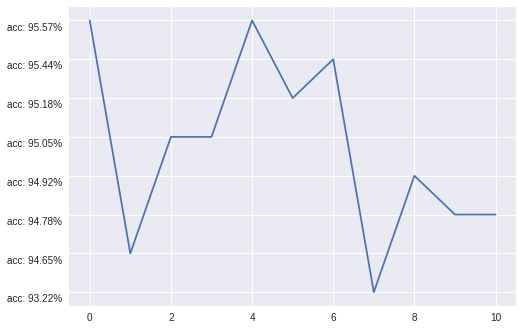

In [16]:
#for reproductivity
from numpy.random import seed 
from tensorflow import set_random_seed 
rownumber = 0
for FirstLayer in range(1000,2001,100):
  SecondLayer = 0.5*FirstLayer
  ThirdLayer = 0.1*FirstLayer
  seed(7) 
  set_random_seed(2)
  scaler = StandardScaler()
  X = scaler.fit_transform(X)
  model = Sequential()
  model.add(Dense(FirstLayer, input_dim=8, init='uniform', activation='relu' )) #bias_initializer='zeros'
  model.add(Dense(int(SecondLayer), init='uniform', activation='tanh'))
  model.add(Dense(int(ThirdLayer), init='uniform', activation='relu'))
  model.add(Dense(1, init='uniform', activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  history = model.fit(X, Y, epochs=150, batch_size=97,validation_split=0.20 ) #shuffle = False, 
  scores = model.evaluate(X, Y)
  analysisdf.loc[rownumber,"First Layer Neurons"]=  FirstLayer
  analysisdf.loc[rownumber,"Second layer neurons"]= SecondLayer
  analysisdf.loc[rownumber,"third layer neurons"]= ThirdLayer
  analysisdf.loc[rownumber,"accuracy"]= ("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
  wks.set_dataframe(analysisdf,(1,1))
  rownumber  += 1
plt.plot(analysisdf["accuracy"])

This shows it has clearly saturated and therefore there is no point increasing the neurons further. Now the highest accuracy must be lying some where between 900 and 1100 neurons. Lets see the change in accuracy;10 neurons at a time.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(900, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(450, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(90, activation="relu", kernel_initializer="uniform")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  from ipykernel import kernelapp as app


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 2s 3ms/step - loss: 0.6686 - acc: 0.7113 - val_loss: 0.6029 - val_acc: 0.7468
Epoch 2/150
613/613 [==============================] - 0s 105us/step - loss: 0.5346 - acc: 0.7504 - val_loss: 0.4944 - val_acc: 0.7662
Epoch 3/150
613/613 [==============================] - 0s 96us/step - loss: 0.4815 - acc: 0.7684 - val_loss: 0.4653 - val_acc: 0.7662
Epoch 4/150
613/613 [==============================] - 0s 100us/step - loss: 0.4591 - acc: 0.7945 - val_loss: 0.4870 - val_acc: 0.7597
Epoch 5/150
613/613 [==============================] - 0s 102us/step - loss: 0.4526 - acc: 0.7847 - val_loss: 0.4872 - val_acc: 0.7468
Epoch 6/150
613/613 [==============================] - 0s 100us/step - loss: 0.4451 - acc: 0.7863 - val_loss: 0.4802 - val_acc: 0.7597
Epoch 7/150
613/613 [==============================] - 0s 93us/step - loss: 0.4405 - acc: 0.7814 - val_loss: 0.4736 - val_acc: 0.7662
Epoch 8/150
6

Epoch 22/150
613/613 [==============================] - 0s 102us/step - loss: 0.3769 - acc: 0.8303 - val_loss: 0.4935 - val_acc: 0.8052
Epoch 23/150
613/613 [==============================] - 0s 109us/step - loss: 0.3644 - acc: 0.8401 - val_loss: 0.5129 - val_acc: 0.7987
Epoch 24/150
613/613 [==============================] - 0s 97us/step - loss: 0.3580 - acc: 0.8320 - val_loss: 0.5692 - val_acc: 0.7597
Epoch 25/150
613/613 [==============================] - 0s 91us/step - loss: 0.3640 - acc: 0.8418 - val_loss: 0.5675 - val_acc: 0.7792
Epoch 26/150
613/613 [==============================] - 0s 98us/step - loss: 0.3936 - acc: 0.8189 - val_loss: 0.6203 - val_acc: 0.7338
Epoch 27/150
613/613 [==============================] - 0s 95us/step - loss: 0.3743 - acc: 0.8271 - val_loss: 0.4975 - val_acc: 0.7857
Epoch 28/150
613/613 [==============================] - 0s 98us/step - loss: 0.3799 - acc: 0.8271 - val_loss: 0.5583 - val_acc: 0.7727
Epoch 29/150
613/613 [==============================]

613/613 [==============================] - 0s 94us/step - loss: 0.3167 - acc: 0.8646 - val_loss: 0.7830 - val_acc: 0.7662
Epoch 48/150
613/613 [==============================] - 0s 99us/step - loss: 0.2964 - acc: 0.8809 - val_loss: 0.6599 - val_acc: 0.7792
Epoch 49/150
613/613 [==============================] - 0s 98us/step - loss: 0.2733 - acc: 0.8972 - val_loss: 0.6659 - val_acc: 0.7532
Epoch 50/150
613/613 [==============================] - 0s 102us/step - loss: 0.2598 - acc: 0.8874 - val_loss: 0.6686 - val_acc: 0.7987
Epoch 51/150
613/613 [==============================] - 0s 99us/step - loss: 0.2389 - acc: 0.9054 - val_loss: 0.7595 - val_acc: 0.7597
Epoch 52/150
613/613 [==============================] - 0s 99us/step - loss: 0.2289 - acc: 0.9152 - val_loss: 0.7050 - val_acc: 0.7857
Epoch 53/150
613/613 [==============================] - 0s 99us/step - loss: 0.2053 - acc: 0.9233 - val_loss: 0.8030 - val_acc: 0.7857
Epoch 54/150
613/613 [==============================] - 0s 102us/st

Epoch 69/150
613/613 [==============================] - 0s 98us/step - loss: 0.1755 - acc: 0.9299 - val_loss: 0.9180 - val_acc: 0.7662
Epoch 70/150
613/613 [==============================] - 0s 106us/step - loss: 0.1462 - acc: 0.9445 - val_loss: 1.0664 - val_acc: 0.7273
Epoch 71/150
613/613 [==============================] - 0s 102us/step - loss: 0.1376 - acc: 0.9396 - val_loss: 1.0793 - val_acc: 0.7532
Epoch 72/150
613/613 [==============================] - 0s 102us/step - loss: 0.1399 - acc: 0.9543 - val_loss: 1.0532 - val_acc: 0.7662
Epoch 73/150
613/613 [==============================] - 0s 106us/step - loss: 0.1336 - acc: 0.9462 - val_loss: 1.0954 - val_acc: 0.7403
Epoch 74/150
613/613 [==============================] - 0s 107us/step - loss: 0.1031 - acc: 0.9657 - val_loss: 1.0635 - val_acc: 0.7727
Epoch 75/150
613/613 [==============================] - 0s 103us/step - loss: 0.1009 - acc: 0.9625 - val_loss: 1.1917 - val_acc: 0.7662
Epoch 76/150
613/613 [===========================

613/613 [==============================] - 0s 98us/step - loss: 0.0755 - acc: 0.9674 - val_loss: 1.4264 - val_acc: 0.7338
Epoch 93/150
613/613 [==============================] - 0s 103us/step - loss: 0.0916 - acc: 0.9641 - val_loss: 1.5745 - val_acc: 0.7273
Epoch 94/150
613/613 [==============================] - 0s 96us/step - loss: 0.1401 - acc: 0.9413 - val_loss: 1.5124 - val_acc: 0.7403
Epoch 95/150
613/613 [==============================] - 0s 109us/step - loss: 0.0942 - acc: 0.9576 - val_loss: 1.4730 - val_acc: 0.7403
Epoch 96/150
613/613 [==============================] - 0s 105us/step - loss: 0.0626 - acc: 0.9755 - val_loss: 1.4888 - val_acc: 0.7532
Epoch 97/150
613/613 [==============================] - 0s 96us/step - loss: 0.0538 - acc: 0.9821 - val_loss: 1.4973 - val_acc: 0.7468
Epoch 98/150
613/613 [==============================] - 0s 103us/step - loss: 0.0497 - acc: 0.9804 - val_loss: 1.5300 - val_acc: 0.7532
Epoch 99/150
613/613 [==============================] - 0s 112us

613/613 [==============================] - 0s 100us/step - loss: 0.0187 - acc: 0.9902 - val_loss: 1.9720 - val_acc: 0.7273
Epoch 116/150
613/613 [==============================] - 0s 99us/step - loss: 0.0193 - acc: 0.9902 - val_loss: 1.9585 - val_acc: 0.7532
Epoch 117/150
613/613 [==============================] - 0s 102us/step - loss: 0.0181 - acc: 0.9918 - val_loss: 1.9409 - val_acc: 0.7532
Epoch 118/150
613/613 [==============================] - 0s 102us/step - loss: 0.0189 - acc: 0.9902 - val_loss: 2.0381 - val_acc: 0.7468
Epoch 119/150
613/613 [==============================] - 0s 101us/step - loss: 0.0163 - acc: 0.9918 - val_loss: 2.0204 - val_acc: 0.7468
Epoch 120/150
613/613 [==============================] - 0s 104us/step - loss: 0.0163 - acc: 0.9918 - val_loss: 2.0420 - val_acc: 0.7403
Epoch 121/150
613/613 [==============================] - 0s 96us/step - loss: 0.0192 - acc: 0.9918 - val_loss: 2.0891 - val_acc: 0.7532
Epoch 122/150
613/613 [==============================] - 

613/613 [==============================] - 0s 100us/step - loss: 0.2234 - acc: 0.9005 - val_loss: 0.9496 - val_acc: 0.7468
Epoch 137/150
613/613 [==============================] - 0s 107us/step - loss: 0.2054 - acc: 0.9038 - val_loss: 0.9820 - val_acc: 0.7468
Epoch 138/150
613/613 [==============================] - 0s 112us/step - loss: 0.1669 - acc: 0.9266 - val_loss: 1.0075 - val_acc: 0.7468
Epoch 139/150
613/613 [==============================] - 0s 96us/step - loss: 0.1419 - acc: 0.9445 - val_loss: 1.0923 - val_acc: 0.7597
Epoch 140/150
613/613 [==============================] - 0s 95us/step - loss: 0.1170 - acc: 0.9608 - val_loss: 1.1689 - val_acc: 0.7727
Epoch 141/150
613/613 [==============================] - 0s 107us/step - loss: 0.1008 - acc: 0.9608 - val_loss: 1.2224 - val_acc: 0.7727
Epoch 142/150
613/613 [==============================] - 0s 100us/step - loss: 0.0916 - acc: 0.9739 - val_loss: 1.2890 - val_acc: 0.7468
Epoch 143/150
613/613 [==============================] - 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(910, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(455, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(91, activation="relu", kernel_initializer="uniform")`
  


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 2s 3ms/step - loss: 0.6695 - acc: 0.6868 - val_loss: 0.6065 - val_acc: 0.7338
Epoch 2/150
613/613 [==============================] - 0s 101us/step - loss: 0.5383 - acc: 0.7504 - val_loss: 0.4960 - val_acc: 0.7857
Epoch 3/150
613/613 [==============================] - 0s 95us/step - loss: 0.4826 - acc: 0.7716 - val_loss: 0.4638 - val_acc: 0.7857
Epoch 4/150
613/613 [==============================] - 0s 96us/step - loss: 0.4597 - acc: 0.7879 - val_loss: 0.4853 - val_acc: 0.7532
Epoch 5/150
613/613 [==============================] - 0s 107us/step - loss: 0.4534 - acc: 0.7847 - val_loss: 0.4873 - val_acc: 0.7468
Epoch 6/150
613/613 [==============================] - 0s 90us/step - loss: 0.4456 - acc: 0.7912 - val_loss: 0.4808 - val_acc: 0.7597
Epoch 7/150
613/613 [==============================] - 0s 93us/step - loss: 0.4402 - acc: 0.7896 - val_loss: 0.4732 - val_acc: 0.7662
Epoch 8/150
613

Epoch 23/150
613/613 [==============================] - 0s 98us/step - loss: 0.3658 - acc: 0.8450 - val_loss: 0.5111 - val_acc: 0.7922
Epoch 24/150
613/613 [==============================] - 0s 102us/step - loss: 0.3614 - acc: 0.8287 - val_loss: 0.5628 - val_acc: 0.7792
Epoch 25/150
613/613 [==============================] - 0s 99us/step - loss: 0.3685 - acc: 0.8369 - val_loss: 0.5600 - val_acc: 0.7597
Epoch 26/150
613/613 [==============================] - 0s 97us/step - loss: 0.3969 - acc: 0.8091 - val_loss: 0.6099 - val_acc: 0.7403
Epoch 27/150
613/613 [==============================] - 0s 107us/step - loss: 0.3698 - acc: 0.8320 - val_loss: 0.5144 - val_acc: 0.7792
Epoch 28/150
613/613 [==============================] - 0s 98us/step - loss: 0.3801 - acc: 0.8238 - val_loss: 0.5665 - val_acc: 0.7857
Epoch 29/150
613/613 [==============================] - 0s 101us/step - loss: 0.3625 - acc: 0.8336 - val_loss: 0.4939 - val_acc: 0.8312
Epoch 30/150
613/613 [==============================

613/613 [==============================] - 0s 93us/step - loss: 0.2811 - acc: 0.8793 - val_loss: 0.7434 - val_acc: 0.7727
Epoch 48/150
613/613 [==============================] - 0s 92us/step - loss: 0.2873 - acc: 0.8711 - val_loss: 0.6680 - val_acc: 0.7857
Epoch 49/150
613/613 [==============================] - 0s 96us/step - loss: 0.2379 - acc: 0.9135 - val_loss: 0.6823 - val_acc: 0.7662
Epoch 50/150
613/613 [==============================] - 0s 96us/step - loss: 0.2495 - acc: 0.8891 - val_loss: 0.6403 - val_acc: 0.7662
Epoch 51/150
613/613 [==============================] - 0s 106us/step - loss: 0.2411 - acc: 0.9021 - val_loss: 0.7547 - val_acc: 0.7727
Epoch 52/150
613/613 [==============================] - 0s 98us/step - loss: 0.2385 - acc: 0.9005 - val_loss: 0.6689 - val_acc: 0.7987
Epoch 53/150
613/613 [==============================] - 0s 93us/step - loss: 0.2078 - acc: 0.9119 - val_loss: 0.7717 - val_acc: 0.7727
Epoch 54/150
613/613 [==============================] - 0s 91us/ste

613/613 [==============================] - 0s 101us/step - loss: 0.1196 - acc: 0.9527 - val_loss: 1.2335 - val_acc: 0.7273
Epoch 72/150
613/613 [==============================] - 0s 96us/step - loss: 0.1472 - acc: 0.9413 - val_loss: 1.1336 - val_acc: 0.7597
Epoch 73/150
613/613 [==============================] - 0s 102us/step - loss: 0.1884 - acc: 0.9233 - val_loss: 1.1939 - val_acc: 0.7078
Epoch 74/150
613/613 [==============================] - 0s 101us/step - loss: 0.1358 - acc: 0.9445 - val_loss: 1.0478 - val_acc: 0.7792
Epoch 75/150
613/613 [==============================] - 0s 98us/step - loss: 0.1403 - acc: 0.9478 - val_loss: 1.2400 - val_acc: 0.7143
Epoch 76/150
613/613 [==============================] - 0s 99us/step - loss: 0.1197 - acc: 0.9576 - val_loss: 1.0759 - val_acc: 0.7403
Epoch 77/150
613/613 [==============================] - 0s 105us/step - loss: 0.0997 - acc: 0.9674 - val_loss: 1.1776 - val_acc: 0.7597
Epoch 78/150
613/613 [==============================] - 0s 102us

613/613 [==============================] - 0s 105us/step - loss: 0.0567 - acc: 0.9837 - val_loss: 1.4951 - val_acc: 0.7532
Epoch 93/150
613/613 [==============================] - 0s 100us/step - loss: 0.0425 - acc: 0.9935 - val_loss: 1.3780 - val_acc: 0.7532
Epoch 94/150
613/613 [==============================] - 0s 108us/step - loss: 0.0422 - acc: 0.9918 - val_loss: 1.5339 - val_acc: 0.7338
Epoch 95/150
613/613 [==============================] - 0s 98us/step - loss: 0.0454 - acc: 0.9853 - val_loss: 1.4458 - val_acc: 0.7403
Epoch 96/150
613/613 [==============================] - 0s 103us/step - loss: 0.0505 - acc: 0.9869 - val_loss: 1.6282 - val_acc: 0.7597
Epoch 97/150
613/613 [==============================] - 0s 98us/step - loss: 0.0618 - acc: 0.9804 - val_loss: 1.5376 - val_acc: 0.7532
Epoch 98/150
613/613 [==============================] - 0s 101us/step - loss: 0.0684 - acc: 0.9739 - val_loss: 1.5155 - val_acc: 0.7597
Epoch 99/150
613/613 [==============================] - 0s 103u

Epoch 114/150
613/613 [==============================] - 0s 100us/step - loss: 0.0829 - acc: 0.9706 - val_loss: 1.8036 - val_acc: 0.7273
Epoch 115/150
613/613 [==============================] - 0s 98us/step - loss: 0.0788 - acc: 0.9690 - val_loss: 1.6439 - val_acc: 0.7727
Epoch 116/150
613/613 [==============================] - 0s 103us/step - loss: 0.0704 - acc: 0.9772 - val_loss: 1.7805 - val_acc: 0.7338
Epoch 117/150
613/613 [==============================] - 0s 105us/step - loss: 0.0608 - acc: 0.9804 - val_loss: 1.6494 - val_acc: 0.7468
Epoch 118/150
613/613 [==============================] - 0s 109us/step - loss: 0.0372 - acc: 0.9853 - val_loss: 1.6128 - val_acc: 0.7468
Epoch 119/150
613/613 [==============================] - 0s 100us/step - loss: 0.0257 - acc: 0.9935 - val_loss: 1.6220 - val_acc: 0.7532
Epoch 120/150
613/613 [==============================] - 0s 99us/step - loss: 0.0182 - acc: 0.9984 - val_loss: 1.6839 - val_acc: 0.7532
Epoch 121/150
613/613 [====================

613/613 [==============================] - 0s 108us/step - loss: 0.0058 - acc: 0.9984 - val_loss: 1.8964 - val_acc: 0.7597
Epoch 136/150
613/613 [==============================] - 0s 111us/step - loss: 0.0056 - acc: 0.9984 - val_loss: 1.8755 - val_acc: 0.7597
Epoch 137/150
613/613 [==============================] - 0s 99us/step - loss: 0.0054 - acc: 0.9984 - val_loss: 1.8777 - val_acc: 0.7597
Epoch 138/150
613/613 [==============================] - 0s 92us/step - loss: 0.0052 - acc: 0.9984 - val_loss: 1.9193 - val_acc: 0.7597
Epoch 139/150
613/613 [==============================] - 0s 94us/step - loss: 0.0051 - acc: 0.9984 - val_loss: 1.9125 - val_acc: 0.7662
Epoch 140/150
613/613 [==============================] - 0s 94us/step - loss: 0.0048 - acc: 0.9984 - val_loss: 1.8756 - val_acc: 0.7662
Epoch 141/150
613/613 [==============================] - 0s 101us/step - loss: 0.0060 - acc: 0.9967 - val_loss: 1.9877 - val_acc: 0.7468
Epoch 142/150
613/613 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(920, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(460, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(92, activation="relu", kernel_initializer="uniform")`
  


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 2s 3ms/step - loss: 0.6673 - acc: 0.6966 - val_loss: 0.6029 - val_acc: 0.7338
Epoch 2/150
613/613 [==============================] - 0s 104us/step - loss: 0.5349 - acc: 0.7553 - val_loss: 0.4961 - val_acc: 0.7727
Epoch 3/150
613/613 [==============================] - 0s 95us/step - loss: 0.4818 - acc: 0.7700 - val_loss: 0.4604 - val_acc: 0.7792
Epoch 4/150
613/613 [==============================] - 0s 107us/step - loss: 0.4592 - acc: 0.7928 - val_loss: 0.4837 - val_acc: 0.7597
Epoch 5/150
613/613 [==============================] - 0s 95us/step - loss: 0.4546 - acc: 0.7847 - val_loss: 0.4861 - val_acc: 0.7662
Epoch 6/150
613/613 [==============================] - 0s 100us/step - loss: 0.4480 - acc: 0.7847 - val_loss: 0.4777 - val_acc: 0.7597
Epoch 7/150
613/613 [==============================] - 0s 107us/step - loss: 0.4412 - acc: 0.7879 - val_loss: 0.4692 - val_acc: 0.7532
Epoch 8/150
6

613/613 [==============================] - 0s 99us/step - loss: 0.3655 - acc: 0.8369 - val_loss: 0.5698 - val_acc: 0.7792
Epoch 26/150
613/613 [==============================] - 0s 102us/step - loss: 0.4007 - acc: 0.8108 - val_loss: 0.5907 - val_acc: 0.7597
Epoch 27/150
613/613 [==============================] - 0s 94us/step - loss: 0.3653 - acc: 0.8303 - val_loss: 0.5174 - val_acc: 0.7662
Epoch 28/150
613/613 [==============================] - 0s 106us/step - loss: 0.3741 - acc: 0.8385 - val_loss: 0.5369 - val_acc: 0.7792
Epoch 29/150
613/613 [==============================] - 0s 106us/step - loss: 0.3576 - acc: 0.8287 - val_loss: 0.4916 - val_acc: 0.8312
Epoch 30/150
613/613 [==============================] - 0s 109us/step - loss: 0.3459 - acc: 0.8336 - val_loss: 0.5191 - val_acc: 0.7727
Epoch 31/150
613/613 [==============================] - 0s 105us/step - loss: 0.3457 - acc: 0.8499 - val_loss: 0.5140 - val_acc: 0.8052
Epoch 32/150
613/613 [==============================] - 0s 97us

 - 0s 109us/step - loss: 0.2826 - acc: 0.8581 - val_loss: 0.6661 - val_acc: 0.7792
Epoch 47/150
613/613 [==============================] - 0s 101us/step - loss: 0.2880 - acc: 0.8858 - val_loss: 0.6849 - val_acc: 0.7727
Epoch 48/150
613/613 [==============================] - 0s 97us/step - loss: 0.2463 - acc: 0.8891 - val_loss: 0.7105 - val_acc: 0.7857
Epoch 49/150
613/613 [==============================] - 0s 103us/step - loss: 0.2402 - acc: 0.9054 - val_loss: 0.6224 - val_acc: 0.7987
Epoch 50/150
613/613 [==============================] - 0s 103us/step - loss: 0.2285 - acc: 0.8972 - val_loss: 0.7990 - val_acc: 0.7727
Epoch 51/150
613/613 [==============================] - 0s 101us/step - loss: 0.2323 - acc: 0.9005 - val_loss: 0.7099 - val_acc: 0.7922
Epoch 52/150
613/613 [==============================] - 0s 107us/step - loss: 0.2136 - acc: 0.9168 - val_loss: 0.7979 - val_acc: 0.7532
Epoch 53/150
613/613 [==============================] - 0s 104us/step - loss: 0.2319 - acc: 0.9038 - v

613/613 [==============================] - 0s 103us/step - loss: 0.1511 - acc: 0.9315 - val_loss: 1.1571 - val_acc: 0.7468
Epoch 69/150
613/613 [==============================] - 0s 96us/step - loss: 0.1558 - acc: 0.9380 - val_loss: 1.1348 - val_acc: 0.7143
Epoch 70/150
613/613 [==============================] - 0s 114us/step - loss: 0.2115 - acc: 0.9266 - val_loss: 1.1702 - val_acc: 0.7532
Epoch 71/150
613/613 [==============================] - 0s 102us/step - loss: 0.1918 - acc: 0.9266 - val_loss: 1.2136 - val_acc: 0.7468
Epoch 72/150
613/613 [==============================] - 0s 101us/step - loss: 0.1416 - acc: 0.9429 - val_loss: 1.0158 - val_acc: 0.7987
Epoch 73/150
613/613 [==============================] - 0s 99us/step - loss: 0.1568 - acc: 0.9331 - val_loss: 1.1725 - val_acc: 0.7662
Epoch 74/150
613/613 [==============================] - 0s 96us/step - loss: 0.1140 - acc: 0.9560 - val_loss: 1.0217 - val_acc: 0.7857
Epoch 75/150
613/613 [==============================] - 0s 97us/

613/613 [==============================] - 0s 100us/step - loss: 0.0515 - acc: 0.9837 - val_loss: 1.4404 - val_acc: 0.7468
Epoch 90/150
613/613 [==============================] - 0s 103us/step - loss: 0.0839 - acc: 0.9690 - val_loss: 1.5502 - val_acc: 0.7468
Epoch 91/150
613/613 [==============================] - 0s 102us/step - loss: 0.0823 - acc: 0.9657 - val_loss: 1.3285 - val_acc: 0.7727
Epoch 92/150
613/613 [==============================] - 0s 105us/step - loss: 0.0735 - acc: 0.9788 - val_loss: 1.5963 - val_acc: 0.7403
Epoch 93/150
613/613 [==============================] - 0s 100us/step - loss: 0.0424 - acc: 0.9886 - val_loss: 1.4846 - val_acc: 0.7662
Epoch 94/150
613/613 [==============================] - 0s 111us/step - loss: 0.0727 - acc: 0.9723 - val_loss: 1.5831 - val_acc: 0.7532
Epoch 95/150
613/613 [==============================] - 0s 107us/step - loss: 0.0466 - acc: 0.9821 - val_loss: 1.4526 - val_acc: 0.7532
Epoch 96/150
613/613 [==============================] - 0s 10

613/613 [==============================] - 0s 100us/step - loss: 0.0318 - acc: 0.9951 - val_loss: 1.4817 - val_acc: 0.7922
Epoch 115/150
613/613 [==============================] - 0s 105us/step - loss: 0.0270 - acc: 0.9935 - val_loss: 1.4652 - val_acc: 0.7532
Epoch 116/150
613/613 [==============================] - 0s 97us/step - loss: 0.0230 - acc: 0.9967 - val_loss: 1.4829 - val_acc: 0.7792
Epoch 117/150
613/613 [==============================] - 0s 96us/step - loss: 0.0135 - acc: 1.0000 - val_loss: 1.5035 - val_acc: 0.7597
Epoch 118/150
613/613 [==============================] - 0s 93us/step - loss: 0.0115 - acc: 0.9984 - val_loss: 1.5013 - val_acc: 0.7792
Epoch 119/150
613/613 [==============================] - 0s 95us/step - loss: 0.0091 - acc: 1.0000 - val_loss: 1.5675 - val_acc: 0.7597
Epoch 120/150
613/613 [==============================] - 0s 96us/step - loss: 0.0087 - acc: 1.0000 - val_loss: 1.5532 - val_acc: 0.7792
Epoch 121/150
613/613 [==============================] - 0s 

613/613 [==============================] - 0s 96us/step - loss: 0.0026 - acc: 1.0000 - val_loss: 1.7837 - val_acc: 0.7597
Epoch 137/150
613/613 [==============================] - 0s 96us/step - loss: 0.0025 - acc: 1.0000 - val_loss: 1.7926 - val_acc: 0.7597
Epoch 138/150
613/613 [==============================] - 0s 100us/step - loss: 0.0023 - acc: 1.0000 - val_loss: 1.8042 - val_acc: 0.7662
Epoch 139/150
613/613 [==============================] - 0s 90us/step - loss: 0.0021 - acc: 1.0000 - val_loss: 1.8114 - val_acc: 0.7662
Epoch 140/150
613/613 [==============================] - 0s 90us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 1.8067 - val_acc: 0.7662
Epoch 141/150
613/613 [==============================] - 0s 104us/step - loss: 0.0019 - acc: 1.0000 - val_loss: 1.8255 - val_acc: 0.7662
Epoch 142/150
613/613 [==============================] - 0s 93us/step - loss: 0.0018 - acc: 1.0000 - val_loss: 1.8417 - val_acc: 0.7597
Epoch 143/150
613/613 [==============================] - 0s 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(930, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(465, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(93, activation="relu", kernel_initializer="uniform")`
  


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 2s 3ms/step - loss: 0.6711 - acc: 0.6852 - val_loss: 0.6100 - val_acc: 0.7662
Epoch 2/150
613/613 [==============================] - 0s 112us/step - loss: 0.5417 - acc: 0.7586 - val_loss: 0.5038 - val_acc: 0.7532
Epoch 3/150
613/613 [==============================] - 0s 95us/step - loss: 0.4821 - acc: 0.7651 - val_loss: 0.4728 - val_acc: 0.7532
Epoch 4/150
613/613 [==============================] - 0s 108us/step - loss: 0.4575 - acc: 0.7928 - val_loss: 0.4878 - val_acc: 0.7662
Epoch 5/150
613/613 [==============================] - 0s 91us/step - loss: 0.4518 - acc: 0.7863 - val_loss: 0.4842 - val_acc: 0.7468
Epoch 6/150
613/613 [==============================] - 0s 97us/step - loss: 0.4456 - acc: 0.7830 - val_loss: 0.4793 - val_acc: 0.7532
Epoch 7/150
613/613 [==============================] - 0s 100us/step - loss: 0.4397 - acc: 0.7863 - val_loss: 0.4735 - val_acc: 0.7597
Epoch 8/150
61

613/613 [==============================] - 0s 99us/step - loss: 0.3769 - acc: 0.8287 - val_loss: 0.4874 - val_acc: 0.7987
Epoch 23/150
613/613 [==============================] - 0s 104us/step - loss: 0.3649 - acc: 0.8401 - val_loss: 0.5076 - val_acc: 0.8052
Epoch 24/150
613/613 [==============================] - 0s 102us/step - loss: 0.3592 - acc: 0.8303 - val_loss: 0.5541 - val_acc: 0.7792
Epoch 25/150
613/613 [==============================] - 0s 96us/step - loss: 0.3653 - acc: 0.8369 - val_loss: 0.5548 - val_acc: 0.7792
Epoch 26/150
613/613 [==============================] - 0s 102us/step - loss: 0.3906 - acc: 0.8124 - val_loss: 0.5925 - val_acc: 0.7468
Epoch 27/150
613/613 [==============================] - 0s 112us/step - loss: 0.3687 - acc: 0.8271 - val_loss: 0.5075 - val_acc: 0.7792
Epoch 28/150
613/613 [==============================] - 0s 108us/step - loss: 0.3762 - acc: 0.8271 - val_loss: 0.5618 - val_acc: 0.7922
Epoch 29/150
613/613 [==============================] - 0s 98us

613/613 [==============================] - 0s 106us/step - loss: 0.2831 - acc: 0.8809 - val_loss: 0.6552 - val_acc: 0.7727
Epoch 45/150
613/613 [==============================] - 0s 95us/step - loss: 0.3148 - acc: 0.8630 - val_loss: 0.6911 - val_acc: 0.7532
Epoch 46/150
613/613 [==============================] - 0s 102us/step - loss: 0.3218 - acc: 0.8613 - val_loss: 0.5632 - val_acc: 0.7857
Epoch 47/150
613/613 [==============================] - 0s 104us/step - loss: 0.2689 - acc: 0.8940 - val_loss: 0.6205 - val_acc: 0.7792
Epoch 48/150
613/613 [==============================] - 0s 101us/step - loss: 0.2513 - acc: 0.8923 - val_loss: 0.6286 - val_acc: 0.7922
Epoch 49/150
613/613 [==============================] - 0s 97us/step - loss: 0.2283 - acc: 0.9086 - val_loss: 0.6240 - val_acc: 0.7727
Epoch 50/150
613/613 [==============================] - 0s 103us/step - loss: 0.2261 - acc: 0.9103 - val_loss: 0.6332 - val_acc: 0.7922
Epoch 51/150
613/613 [==============================] - 0s 116u

613/613 [==============================] - 0s 102us/step - loss: 0.1581 - acc: 0.9445 - val_loss: 0.9601 - val_acc: 0.7857
Epoch 66/150
613/613 [==============================] - 0s 98us/step - loss: 0.1671 - acc: 0.9347 - val_loss: 1.0023 - val_acc: 0.7338
Epoch 67/150
613/613 [==============================] - 0s 98us/step - loss: 0.1787 - acc: 0.9315 - val_loss: 0.9111 - val_acc: 0.7597
Epoch 68/150
613/613 [==============================] - 0s 109us/step - loss: 0.1768 - acc: 0.9315 - val_loss: 0.9842 - val_acc: 0.7792
Epoch 69/150
613/613 [==============================] - 0s 99us/step - loss: 0.1720 - acc: 0.9380 - val_loss: 1.0027 - val_acc: 0.7013
Epoch 70/150
613/613 [==============================] - 0s 111us/step - loss: 0.1476 - acc: 0.9396 - val_loss: 0.9972 - val_acc: 0.7727
Epoch 71/150
613/613 [==============================] - 0s 100us/step - loss: 0.1740 - acc: 0.9282 - val_loss: 1.0957 - val_acc: 0.7273
Epoch 72/150
613/613 [==============================] - 0s 98us/

613/613 [==============================] - 0s 98us/step - loss: 0.0518 - acc: 0.9837 - val_loss: 1.2067 - val_acc: 0.7532
Epoch 88/150
613/613 [==============================] - 0s 99us/step - loss: 0.0452 - acc: 0.9886 - val_loss: 1.2348 - val_acc: 0.7792
Epoch 89/150
613/613 [==============================] - 0s 106us/step - loss: 0.0401 - acc: 0.9869 - val_loss: 1.2243 - val_acc: 0.7597
Epoch 90/150
613/613 [==============================] - 0s 99us/step - loss: 0.0353 - acc: 0.9886 - val_loss: 1.2855 - val_acc: 0.7792
Epoch 91/150
613/613 [==============================] - 0s 101us/step - loss: 0.0438 - acc: 0.9902 - val_loss: 1.3159 - val_acc: 0.7532
Epoch 92/150
613/613 [==============================] - 0s 102us/step - loss: 0.0299 - acc: 0.9918 - val_loss: 1.2864 - val_acc: 0.7662
Epoch 93/150
613/613 [==============================] - 0s 103us/step - loss: 0.0285 - acc: 0.9951 - val_loss: 1.3896 - val_acc: 0.7662
Epoch 94/150
613/613 [==============================] - 0s 102us

613/613 [==============================] - 0s 96us/step - loss: 0.0514 - acc: 0.9853 - val_loss: 1.1697 - val_acc: 0.7597
Epoch 109/150
613/613 [==============================] - 0s 103us/step - loss: 0.0430 - acc: 0.9902 - val_loss: 1.3308 - val_acc: 0.7662
Epoch 110/150
613/613 [==============================] - 0s 100us/step - loss: 0.0371 - acc: 0.9918 - val_loss: 1.2065 - val_acc: 0.7532
Epoch 111/150
613/613 [==============================] - 0s 101us/step - loss: 0.0315 - acc: 0.9935 - val_loss: 1.2976 - val_acc: 0.7792
Epoch 112/150
613/613 [==============================] - 0s 99us/step - loss: 0.0298 - acc: 0.9902 - val_loss: 1.2638 - val_acc: 0.7532
Epoch 113/150
613/613 [==============================] - 0s 110us/step - loss: 0.0227 - acc: 0.9951 - val_loss: 1.2916 - val_acc: 0.7662
Epoch 114/150
613/613 [==============================] - 0s 100us/step - loss: 0.0278 - acc: 0.9935 - val_loss: 1.3571 - val_acc: 0.7662
Epoch 115/150
613/613 [==============================] - 

613/613 [==============================] - 0s 102us/step - loss: 0.0070 - acc: 1.0000 - val_loss: 1.6055 - val_acc: 0.7597
Epoch 131/150
613/613 [==============================] - 0s 96us/step - loss: 0.0068 - acc: 1.0000 - val_loss: 1.6175 - val_acc: 0.7662
Epoch 132/150
613/613 [==============================] - 0s 111us/step - loss: 0.0062 - acc: 1.0000 - val_loss: 1.6381 - val_acc: 0.7727
Epoch 133/150
613/613 [==============================] - 0s 98us/step - loss: 0.0061 - acc: 1.0000 - val_loss: 1.6369 - val_acc: 0.7662
Epoch 134/150
613/613 [==============================] - 0s 97us/step - loss: 0.0063 - acc: 0.9984 - val_loss: 1.6364 - val_acc: 0.7662
Epoch 135/150
613/613 [==============================] - 0s 93us/step - loss: 0.0059 - acc: 0.9984 - val_loss: 1.6528 - val_acc: 0.7662
Epoch 136/150
613/613 [==============================] - 0s 94us/step - loss: 0.0055 - acc: 1.0000 - val_loss: 1.6706 - val_acc: 0.7597
Epoch 137/150
613/613 [==============================] - 0s 

767/767 [==============================] - 0s 92us/step


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(940, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(470, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(94, activation="relu", kernel_initializer="uniform")`
  


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 2s 3ms/step - loss: 0.6712 - acc: 0.6786 - val_loss: 0.6117 - val_acc: 0.7403
Epoch 2/150
613/613 [==============================] - 0s 108us/step - loss: 0.5409 - acc: 0.7520 - val_loss: 0.4990 - val_acc: 0.7597
Epoch 3/150
613/613 [==============================] - 0s 97us/step - loss: 0.4829 - acc: 0.7781 - val_loss: 0.4695 - val_acc: 0.7792
Epoch 4/150
613/613 [==============================] - 0s 109us/step - loss: 0.4622 - acc: 0.7961 - val_loss: 0.4890 - val_acc: 0.7597
Epoch 5/150
613/613 [==============================] - 0s 94us/step - loss: 0.4546 - acc: 0.7814 - val_loss: 0.4874 - val_acc: 0.7468
Epoch 6/150
613/613 [==============================] - 0s 99us/step - loss: 0.4471 - acc: 0.7879 - val_loss: 0.4805 - val_acc: 0.7597
Epoch 7/150
613/613 [==============================] - 0s 105us/step - loss: 0.4417 - acc: 0.7896 - val_loss: 0.4724 - val_acc: 0.7597
Epoch 8/150
61

613/613 [==============================] - 0s 111us/step - loss: 0.3725 - acc: 0.8254 - val_loss: 0.5050 - val_acc: 0.8052
Epoch 23/150
613/613 [==============================] - 0s 97us/step - loss: 0.3642 - acc: 0.8369 - val_loss: 0.5054 - val_acc: 0.7987
Epoch 24/150
613/613 [==============================] - 0s 100us/step - loss: 0.3603 - acc: 0.8271 - val_loss: 0.5775 - val_acc: 0.7597
Epoch 25/150
613/613 [==============================] - 0s 104us/step - loss: 0.3660 - acc: 0.8352 - val_loss: 0.5529 - val_acc: 0.7987
Epoch 26/150
613/613 [==============================] - 0s 98us/step - loss: 0.3888 - acc: 0.8075 - val_loss: 0.6019 - val_acc: 0.7403
Epoch 27/150
613/613 [==============================] - 0s 98us/step - loss: 0.3725 - acc: 0.8254 - val_loss: 0.4899 - val_acc: 0.8117
Epoch 28/150
613/613 [==============================] - 0s 100us/step - loss: 0.3748 - acc: 0.8352 - val_loss: 0.5688 - val_acc: 0.7792
Epoch 29/150
613/613 [==============================] - 0s 98us/

Epoch 46/150
613/613 [==============================] - 0s 104us/step - loss: 0.2934 - acc: 0.8711 - val_loss: 0.7605 - val_acc: 0.7597
Epoch 47/150
613/613 [==============================] - 0s 100us/step - loss: 0.3204 - acc: 0.8646 - val_loss: 0.8564 - val_acc: 0.7403
Epoch 48/150
613/613 [==============================] - 0s 95us/step - loss: 0.2776 - acc: 0.8777 - val_loss: 0.7233 - val_acc: 0.7532
Epoch 49/150
613/613 [==============================] - 0s 96us/step - loss: 0.2553 - acc: 0.9070 - val_loss: 0.7307 - val_acc: 0.7662
Epoch 50/150
613/613 [==============================] - 0s 97us/step - loss: 0.2512 - acc: 0.8874 - val_loss: 0.7025 - val_acc: 0.7532
Epoch 51/150
613/613 [==============================] - 0s 95us/step - loss: 0.2265 - acc: 0.9266 - val_loss: 0.7933 - val_acc: 0.7468
Epoch 52/150
613/613 [==============================] - 0s 100us/step - loss: 0.2246 - acc: 0.9005 - val_loss: 0.7708 - val_acc: 0.7662
Epoch 53/150
613/613 [==============================

613/613 [==============================] - 0s 103us/step - loss: 0.1788 - acc: 0.9331 - val_loss: 0.9454 - val_acc: 0.7338
Epoch 68/150
613/613 [==============================] - 0s 100us/step - loss: 0.1657 - acc: 0.9413 - val_loss: 0.8686 - val_acc: 0.7338
Epoch 69/150
613/613 [==============================] - 0s 100us/step - loss: 0.1612 - acc: 0.9429 - val_loss: 0.9908 - val_acc: 0.7273
Epoch 70/150
613/613 [==============================] - 0s 109us/step - loss: 0.1428 - acc: 0.9396 - val_loss: 1.0045 - val_acc: 0.7338
Epoch 71/150
613/613 [==============================] - 0s 112us/step - loss: 0.1273 - acc: 0.9543 - val_loss: 1.0684 - val_acc: 0.7338
Epoch 72/150
613/613 [==============================] - 0s 100us/step - loss: 0.1301 - acc: 0.9413 - val_loss: 1.0633 - val_acc: 0.7273
Epoch 73/150
613/613 [==============================] - 0s 102us/step - loss: 0.1166 - acc: 0.9608 - val_loss: 1.1302 - val_acc: 0.7078
Epoch 74/150
613/613 [==============================] - 0s 10

Epoch 90/150
613/613 [==============================] - 0s 104us/step - loss: 0.0690 - acc: 0.9674 - val_loss: 1.6101 - val_acc: 0.7208
Epoch 91/150
613/613 [==============================] - 0s 109us/step - loss: 0.0804 - acc: 0.9674 - val_loss: 1.4868 - val_acc: 0.7273
Epoch 92/150
613/613 [==============================] - 0s 105us/step - loss: 0.0725 - acc: 0.9739 - val_loss: 1.6606 - val_acc: 0.6883
Epoch 93/150
613/613 [==============================] - 0s 106us/step - loss: 0.0876 - acc: 0.9674 - val_loss: 1.5850 - val_acc: 0.7338
Epoch 94/150
613/613 [==============================] - 0s 95us/step - loss: 0.0689 - acc: 0.9723 - val_loss: 1.7769 - val_acc: 0.6948
Epoch 95/150
613/613 [==============================] - 0s 102us/step - loss: 0.0897 - acc: 0.9641 - val_loss: 1.5600 - val_acc: 0.7078
Epoch 96/150
613/613 [==============================] - 0s 105us/step - loss: 0.0642 - acc: 0.9772 - val_loss: 1.6650 - val_acc: 0.7208
Epoch 97/150
613/613 [===========================

Epoch 112/150
613/613 [==============================] - 0s 103us/step - loss: 0.0515 - acc: 0.9837 - val_loss: 1.6372 - val_acc: 0.6948
Epoch 113/150
613/613 [==============================] - 0s 98us/step - loss: 0.0459 - acc: 0.9902 - val_loss: 1.6236 - val_acc: 0.7143
Epoch 114/150
613/613 [==============================] - 0s 98us/step - loss: 0.0892 - acc: 0.9853 - val_loss: 1.8067 - val_acc: 0.7273
Epoch 115/150
613/613 [==============================] - 0s 96us/step - loss: 0.0819 - acc: 0.9723 - val_loss: 1.7426 - val_acc: 0.6948
Epoch 116/150
613/613 [==============================] - 0s 99us/step - loss: 0.0783 - acc: 0.9772 - val_loss: 1.6534 - val_acc: 0.7208
Epoch 117/150
613/613 [==============================] - 0s 105us/step - loss: 0.0565 - acc: 0.9821 - val_loss: 1.8411 - val_acc: 0.7143
Epoch 118/150
613/613 [==============================] - 0s 99us/step - loss: 0.0622 - acc: 0.9788 - val_loss: 1.8052 - val_acc: 0.7208
Epoch 119/150
613/613 [=======================

Epoch 134/150
613/613 [==============================] - 0s 98us/step - loss: 0.0132 - acc: 0.9951 - val_loss: 1.9650 - val_acc: 0.7273
Epoch 135/150
613/613 [==============================] - 0s 100us/step - loss: 0.0124 - acc: 0.9951 - val_loss: 1.9723 - val_acc: 0.7273
Epoch 136/150
613/613 [==============================] - 0s 113us/step - loss: 0.0118 - acc: 0.9935 - val_loss: 1.9794 - val_acc: 0.7078
Epoch 137/150
613/613 [==============================] - 0s 103us/step - loss: 0.0115 - acc: 0.9951 - val_loss: 1.9941 - val_acc: 0.7143
Epoch 138/150
613/613 [==============================] - 0s 108us/step - loss: 0.0113 - acc: 0.9951 - val_loss: 2.0190 - val_acc: 0.7078
Epoch 139/150
613/613 [==============================] - 0s 97us/step - loss: 0.0107 - acc: 0.9951 - val_loss: 2.0240 - val_acc: 0.7143
Epoch 140/150
613/613 [==============================] - 0s 97us/step - loss: 0.0105 - acc: 0.9951 - val_loss: 2.0132 - val_acc: 0.7078
Epoch 141/150
613/613 [=====================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(950, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(475, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(95, activation="relu", kernel_initializer="uniform")`
  


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 2s 3ms/step - loss: 0.6695 - acc: 0.6786 - val_loss: 0.6072 - val_acc: 0.7597
Epoch 2/150
613/613 [==============================] - 0s 111us/step - loss: 0.5361 - acc: 0.7586 - val_loss: 0.5024 - val_acc: 0.7597
Epoch 3/150
613/613 [==============================] - 0s 94us/step - loss: 0.4804 - acc: 0.7732 - val_loss: 0.4802 - val_acc: 0.7597
Epoch 4/150
613/613 [==============================] - 0s 94us/step - loss: 0.4574 - acc: 0.7928 - val_loss: 0.4915 - val_acc: 0.7662
Epoch 5/150
613/613 [==============================] - 0s 108us/step - loss: 0.4508 - acc: 0.7830 - val_loss: 0.4845 - val_acc: 0.7532
Epoch 6/150
613/613 [==============================] - 0s 100us/step - loss: 0.4453 - acc: 0.7863 - val_loss: 0.4790 - val_acc: 0.7597
Epoch 7/150
613/613 [==============================] - 0s 103us/step - loss: 0.4381 - acc: 0.7847 - val_loss: 0.4731 - val_acc: 0.7597
Epoch 8/150
6

613/613 [==============================] - 0s 97us/step - loss: 0.3640 - acc: 0.8450 - val_loss: 0.5053 - val_acc: 0.8117
Epoch 24/150
613/613 [==============================] - 0s 98us/step - loss: 0.3580 - acc: 0.8336 - val_loss: 0.5486 - val_acc: 0.7597
Epoch 25/150
613/613 [==============================] - 0s 98us/step - loss: 0.3631 - acc: 0.8418 - val_loss: 0.5545 - val_acc: 0.7857
Epoch 26/150
613/613 [==============================] - 0s 115us/step - loss: 0.3835 - acc: 0.8140 - val_loss: 0.5798 - val_acc: 0.7532
Epoch 27/150
613/613 [==============================] - 0s 102us/step - loss: 0.3649 - acc: 0.8369 - val_loss: 0.5074 - val_acc: 0.7922
Epoch 28/150
613/613 [==============================] - 0s 103us/step - loss: 0.3709 - acc: 0.8352 - val_loss: 0.5537 - val_acc: 0.7922
Epoch 29/150
613/613 [==============================] - 0s 106us/step - loss: 0.3579 - acc: 0.8287 - val_loss: 0.4969 - val_acc: 0.8377
Epoch 30/150
613/613 [==============================] - 0s 102us


613/613 [==============================] - 0s 99us/step - loss: 0.2637 - acc: 0.8907 - val_loss: 0.6814 - val_acc: 0.7857
Epoch 45/150
613/613 [==============================] - 0s 119us/step - loss: 0.2915 - acc: 0.8744 - val_loss: 0.7151 - val_acc: 0.7597
Epoch 46/150
613/613 [==============================] - 0s 96us/step - loss: 0.3134 - acc: 0.8548 - val_loss: 0.5877 - val_acc: 0.7792
Epoch 47/150
613/613 [==============================] - 0s 104us/step - loss: 0.2654 - acc: 0.8972 - val_loss: 0.6995 - val_acc: 0.7727
Epoch 48/150
613/613 [==============================] - 0s 97us/step - loss: 0.2645 - acc: 0.8891 - val_loss: 0.6477 - val_acc: 0.7727
Epoch 49/150
613/613 [==============================] - 0s 105us/step - loss: 0.2297 - acc: 0.9054 - val_loss: 0.6768 - val_acc: 0.7662
Epoch 50/150
613/613 [==============================] - 0s 100us/step - loss: 0.2269 - acc: 0.9054 - val_loss: 0.6372 - val_acc: 0.7727
Epoch 51/150
613/613 [==============================] - 0s 110u

Epoch 66/150
613/613 [==============================] - 0s 100us/step - loss: 0.1006 - acc: 0.9641 - val_loss: 0.9934 - val_acc: 0.7532
Epoch 67/150
613/613 [==============================] - 0s 108us/step - loss: 0.1310 - acc: 0.9560 - val_loss: 1.0337 - val_acc: 0.7078
Epoch 68/150
613/613 [==============================] - 0s 100us/step - loss: 0.1582 - acc: 0.9511 - val_loss: 1.0671 - val_acc: 0.7662
Epoch 69/150
613/613 [==============================] - 0s 108us/step - loss: 0.1599 - acc: 0.9315 - val_loss: 1.1050 - val_acc: 0.7403
Epoch 70/150
613/613 [==============================] - 0s 96us/step - loss: 0.1168 - acc: 0.9608 - val_loss: 1.1189 - val_acc: 0.7727
Epoch 71/150
613/613 [==============================] - 0s 102us/step - loss: 0.1666 - acc: 0.9184 - val_loss: 1.1131 - val_acc: 0.7403
Epoch 72/150
613/613 [==============================] - 0s 98us/step - loss: 0.1176 - acc: 0.9494 - val_loss: 1.0938 - val_acc: 0.7532
Epoch 73/150
613/613 [============================

613/613 [==============================] - 0s 112us/step - loss: 0.0857 - acc: 0.9690 - val_loss: 1.3913 - val_acc: 0.7338
Epoch 88/150
613/613 [==============================] - 0s 104us/step - loss: 0.1342 - acc: 0.9560 - val_loss: 1.4399 - val_acc: 0.7532
Epoch 89/150
613/613 [==============================] - 0s 98us/step - loss: 0.0913 - acc: 0.9690 - val_loss: 1.2850 - val_acc: 0.7597
Epoch 90/150
613/613 [==============================] - 0s 100us/step - loss: 0.0919 - acc: 0.9706 - val_loss: 1.3640 - val_acc: 0.7468
Epoch 91/150
613/613 [==============================] - 0s 103us/step - loss: 0.1385 - acc: 0.9494 - val_loss: 1.2390 - val_acc: 0.7727
Epoch 92/150
613/613 [==============================] - 0s 97us/step - loss: 0.1414 - acc: 0.9462 - val_loss: 1.4314 - val_acc: 0.7468
Epoch 93/150
613/613 [==============================] - 0s 95us/step - loss: 0.1554 - acc: 0.9494 - val_loss: 1.2979 - val_acc: 0.7662
Epoch 94/150
613/613 [==============================] - 0s 114us

613/613 [==============================] - 0s 101us/step - loss: 0.0333 - acc: 0.9886 - val_loss: 1.4980 - val_acc: 0.7532
Epoch 109/150
613/613 [==============================] - 0s 101us/step - loss: 0.0244 - acc: 0.9902 - val_loss: 1.4377 - val_acc: 0.7922
Epoch 110/150
613/613 [==============================] - 0s 103us/step - loss: 0.0392 - acc: 0.9886 - val_loss: 1.4725 - val_acc: 0.7662
Epoch 111/150
613/613 [==============================] - 0s 100us/step - loss: 0.0312 - acc: 0.9902 - val_loss: 1.5849 - val_acc: 0.7662
Epoch 112/150
613/613 [==============================] - 0s 103us/step - loss: 0.0541 - acc: 0.9739 - val_loss: 1.4875 - val_acc: 0.7727
Epoch 113/150
613/613 [==============================] - 0s 101us/step - loss: 0.0603 - acc: 0.9755 - val_loss: 1.4859 - val_acc: 0.7662
Epoch 114/150
613/613 [==============================] - 0s 109us/step - loss: 0.0472 - acc: 0.9853 - val_loss: 1.6912 - val_acc: 0.7338
Epoch 115/150
613/613 [==============================] 

613/613 [==============================] - 0s 99us/step - loss: 0.0415 - acc: 0.9853 - val_loss: 1.2384 - val_acc: 0.7403
Epoch 131/150
613/613 [==============================] - 0s 95us/step - loss: 0.0387 - acc: 0.9853 - val_loss: 1.2488 - val_acc: 0.7727
Epoch 132/150
613/613 [==============================] - 0s 98us/step - loss: 0.0242 - acc: 0.9967 - val_loss: 1.2377 - val_acc: 0.7922
Epoch 133/150
613/613 [==============================] - 0s 106us/step - loss: 0.0191 - acc: 0.9967 - val_loss: 1.3345 - val_acc: 0.7532
Epoch 134/150
613/613 [==============================] - 0s 105us/step - loss: 0.0212 - acc: 0.9967 - val_loss: 1.3668 - val_acc: 0.7662
Epoch 135/150
613/613 [==============================] - 0s 102us/step - loss: 0.0177 - acc: 0.9984 - val_loss: 1.3645 - val_acc: 0.7792
Epoch 136/150
613/613 [==============================] - 0s 98us/step - loss: 0.0141 - acc: 0.9984 - val_loss: 1.3963 - val_acc: 0.7792
Epoch 137/150
613/613 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(960, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(480, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(96, activation="relu", kernel_initializer="uniform")`
  


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 2s 3ms/step - loss: 0.6675 - acc: 0.7015 - val_loss: 0.5996 - val_acc: 0.7403
Epoch 2/150
613/613 [==============================] - 0s 99us/step - loss: 0.5291 - acc: 0.7586 - val_loss: 0.4950 - val_acc: 0.7662
Epoch 3/150
613/613 [==============================] - 0s 96us/step - loss: 0.4813 - acc: 0.7667 - val_loss: 0.4704 - val_acc: 0.7597
Epoch 4/150
613/613 [==============================] - 0s 107us/step - loss: 0.4591 - acc: 0.7928 - val_loss: 0.4891 - val_acc: 0.7662
Epoch 5/150
613/613 [==============================] - 0s 99us/step - loss: 0.4513 - acc: 0.7830 - val_loss: 0.4858 - val_acc: 0.7532
Epoch 6/150
613/613 [==============================] - 0s 99us/step - loss: 0.4442 - acc: 0.7863 - val_loss: 0.4774 - val_acc: 0.7597
Epoch 7/150
613/613 [==============================] - 0s 107us/step - loss: 0.4386 - acc: 0.7814 - val_loss: 0.4728 - val_acc: 0.7597
Epoch 8/150
613

Epoch 23/150
613/613 [==============================] - 0s 99us/step - loss: 0.3614 - acc: 0.8418 - val_loss: 0.5055 - val_acc: 0.8247
Epoch 24/150
613/613 [==============================] - 0s 101us/step - loss: 0.3566 - acc: 0.8369 - val_loss: 0.5479 - val_acc: 0.7727
Epoch 25/150
613/613 [==============================] - 0s 100us/step - loss: 0.3615 - acc: 0.8418 - val_loss: 0.5587 - val_acc: 0.7727
Epoch 26/150
613/613 [==============================] - 0s 99us/step - loss: 0.3853 - acc: 0.8108 - val_loss: 0.6021 - val_acc: 0.7338
Epoch 27/150
613/613 [==============================] - 0s 95us/step - loss: 0.3695 - acc: 0.8303 - val_loss: 0.5035 - val_acc: 0.7922
Epoch 28/150
613/613 [==============================] - 0s 93us/step - loss: 0.3732 - acc: 0.8352 - val_loss: 0.5594 - val_acc: 0.7857
Epoch 29/150
613/613 [==============================] - 0s 107us/step - loss: 0.3565 - acc: 0.8303 - val_loss: 0.5077 - val_acc: 0.8182
Epoch 30/150
613/613 [==============================

Epoch 46/150
613/613 [==============================] - 0s 102us/step - loss: 0.3625 - acc: 0.8320 - val_loss: 0.6473 - val_acc: 0.7727
Epoch 47/150
613/613 [==============================] - 0s 97us/step - loss: 0.3293 - acc: 0.8532 - val_loss: 0.6479 - val_acc: 0.7857
Epoch 48/150
613/613 [==============================] - 0s 108us/step - loss: 0.2926 - acc: 0.8842 - val_loss: 0.6399 - val_acc: 0.7987
Epoch 49/150
613/613 [==============================] - 0s 94us/step - loss: 0.2665 - acc: 0.8907 - val_loss: 0.5616 - val_acc: 0.7987
Epoch 50/150
613/613 [==============================] - 0s 99us/step - loss: 0.2543 - acc: 0.8842 - val_loss: 0.6244 - val_acc: 0.7662
Epoch 51/150
613/613 [==============================] - 0s 96us/step - loss: 0.2376 - acc: 0.8972 - val_loss: 0.7353 - val_acc: 0.7792
Epoch 52/150
613/613 [==============================] - 0s 100us/step - loss: 0.2485 - acc: 0.8907 - val_loss: 0.6853 - val_acc: 0.7662
Epoch 53/150
613/613 [==============================

613/613 [==============================] - 0s 109us/step - loss: 0.1177 - acc: 0.9511 - val_loss: 0.9913 - val_acc: 0.7338
Epoch 70/150
613/613 [==============================] - 0s 102us/step - loss: 0.1201 - acc: 0.9494 - val_loss: 0.9951 - val_acc: 0.7532
Epoch 71/150
613/613 [==============================] - 0s 96us/step - loss: 0.1080 - acc: 0.9592 - val_loss: 1.0841 - val_acc: 0.7338
Epoch 72/150
613/613 [==============================] - 0s 102us/step - loss: 0.1039 - acc: 0.9625 - val_loss: 1.0834 - val_acc: 0.7338
Epoch 73/150
613/613 [==============================] - 0s 100us/step - loss: 0.1138 - acc: 0.9560 - val_loss: 1.1193 - val_acc: 0.7338
Epoch 74/150
613/613 [==============================] - 0s 104us/step - loss: 0.1197 - acc: 0.9543 - val_loss: 1.1814 - val_acc: 0.7727
Epoch 75/150
613/613 [==============================] - 0s 105us/step - loss: 0.1086 - acc: 0.9657 - val_loss: 1.2318 - val_acc: 0.7338
Epoch 76/150
613/613 [==============================] - 0s 101

Epoch 91/150
613/613 [==============================] - 0s 100us/step - loss: 0.0656 - acc: 0.9690 - val_loss: 1.2419 - val_acc: 0.7597
Epoch 92/150
613/613 [==============================] - 0s 103us/step - loss: 0.0579 - acc: 0.9755 - val_loss: 1.2956 - val_acc: 0.7468
Epoch 93/150
613/613 [==============================] - 0s 114us/step - loss: 0.0519 - acc: 0.9837 - val_loss: 1.3313 - val_acc: 0.7662
Epoch 94/150
613/613 [==============================] - 0s 101us/step - loss: 0.0690 - acc: 0.9739 - val_loss: 1.3351 - val_acc: 0.7597
Epoch 95/150
613/613 [==============================] - 0s 103us/step - loss: 0.0631 - acc: 0.9788 - val_loss: 1.3798 - val_acc: 0.7727
Epoch 96/150
613/613 [==============================] - 0s 96us/step - loss: 0.0646 - acc: 0.9739 - val_loss: 1.4336 - val_acc: 0.7662
Epoch 97/150
613/613 [==============================] - 0s 97us/step - loss: 0.0539 - acc: 0.9788 - val_loss: 1.6088 - val_acc: 0.7468
Epoch 98/150
613/613 [============================

Epoch 113/150
613/613 [==============================] - 0s 100us/step - loss: 0.0556 - acc: 0.9788 - val_loss: 1.3158 - val_acc: 0.7597
Epoch 114/150
613/613 [==============================] - 0s 109us/step - loss: 0.0655 - acc: 0.9804 - val_loss: 1.3818 - val_acc: 0.7532
Epoch 115/150
613/613 [==============================] - 0s 101us/step - loss: 0.0461 - acc: 0.9804 - val_loss: 1.4436 - val_acc: 0.7468
Epoch 116/150
613/613 [==============================] - 0s 104us/step - loss: 0.0470 - acc: 0.9755 - val_loss: 1.4056 - val_acc: 0.7403
Epoch 117/150
613/613 [==============================] - 0s 95us/step - loss: 0.0408 - acc: 0.9902 - val_loss: 1.4535 - val_acc: 0.7468
Epoch 118/150
613/613 [==============================] - 0s 102us/step - loss: 0.0474 - acc: 0.9821 - val_loss: 1.4584 - val_acc: 0.7468
Epoch 119/150
613/613 [==============================] - 0s 99us/step - loss: 0.0643 - acc: 0.9788 - val_loss: 1.5664 - val_acc: 0.7468
Epoch 120/150
613/613 [====================

613/613 [==============================] - 0s 104us/step - loss: 0.1200 - acc: 0.9657 - val_loss: 1.7593 - val_acc: 0.7468
Epoch 136/150
613/613 [==============================] - 0s 100us/step - loss: 0.2513 - acc: 0.9217 - val_loss: 1.6055 - val_acc: 0.7078
Epoch 137/150
613/613 [==============================] - 0s 91us/step - loss: 0.1851 - acc: 0.9429 - val_loss: 1.8996 - val_acc: 0.7208
Epoch 138/150
613/613 [==============================] - 0s 93us/step - loss: 0.3409 - acc: 0.9233 - val_loss: 1.6123 - val_acc: 0.7403
Epoch 139/150
613/613 [==============================] - 0s 109us/step - loss: 0.1916 - acc: 0.9266 - val_loss: 1.5167 - val_acc: 0.7078
Epoch 140/150
613/613 [==============================] - 0s 95us/step - loss: 0.1845 - acc: 0.9347 - val_loss: 1.3846 - val_acc: 0.7532
Epoch 141/150
613/613 [==============================] - 0s 104us/step - loss: 0.1118 - acc: 0.9625 - val_loss: 1.4673 - val_acc: 0.7597
Epoch 142/150
613/613 [==============================] - 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(970, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(485, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(97, activation="relu", kernel_initializer="uniform")`
  


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 2s 3ms/step - loss: 0.6652 - acc: 0.7064 - val_loss: 0.5918 - val_acc: 0.7532
Epoch 2/150
613/613 [==============================] - 0s 103us/step - loss: 0.5236 - acc: 0.7504 - val_loss: 0.4891 - val_acc: 0.7468
Epoch 3/150
613/613 [==============================] - 0s 100us/step - loss: 0.4809 - acc: 0.7716 - val_loss: 0.4614 - val_acc: 0.7597
Epoch 4/150
613/613 [==============================] - 0s 104us/step - loss: 0.4576 - acc: 0.7928 - val_loss: 0.4893 - val_acc: 0.7597
Epoch 5/150
613/613 [==============================] - 0s 106us/step - loss: 0.4514 - acc: 0.7879 - val_loss: 0.4848 - val_acc: 0.7403
Epoch 6/150
613/613 [==============================] - 0s 107us/step - loss: 0.4456 - acc: 0.7879 - val_loss: 0.4770 - val_acc: 0.7597
Epoch 7/150
613/613 [==============================] - 0s 100us/step - loss: 0.4389 - acc: 0.7863 - val_loss: 0.4675 - val_acc: 0.7597
Epoch 8/150

613/613 [==============================] - 0s 110us/step - loss: 0.3776 - acc: 0.8336 - val_loss: 0.4944 - val_acc: 0.8052
Epoch 23/150
613/613 [==============================] - 0s 99us/step - loss: 0.3674 - acc: 0.8401 - val_loss: 0.5089 - val_acc: 0.8052
Epoch 24/150
613/613 [==============================] - 0s 95us/step - loss: 0.3607 - acc: 0.8352 - val_loss: 0.5769 - val_acc: 0.7727
Epoch 25/150
613/613 [==============================] - 0s 105us/step - loss: 0.3611 - acc: 0.8450 - val_loss: 0.5610 - val_acc: 0.7727
Epoch 26/150
613/613 [==============================] - 0s 104us/step - loss: 0.3946 - acc: 0.8075 - val_loss: 0.5932 - val_acc: 0.7468
Epoch 27/150
613/613 [==============================] - 0s 100us/step - loss: 0.3639 - acc: 0.8336 - val_loss: 0.5213 - val_acc: 0.7727
Epoch 28/150
613/613 [==============================] - 0s 101us/step - loss: 0.3728 - acc: 0.8352 - val_loss: 0.5391 - val_acc: 0.7857
Epoch 29/150
613/613 [==============================] - 0s 105u

613/613 [==============================] - 0s 103us/step - loss: 0.2425 - acc: 0.9038 - val_loss: 0.6980 - val_acc: 0.7792
Epoch 45/150
613/613 [==============================] - 0s 98us/step - loss: 0.2740 - acc: 0.8923 - val_loss: 0.8484 - val_acc: 0.7403
Epoch 46/150
613/613 [==============================] - 0s 105us/step - loss: 0.3121 - acc: 0.8548 - val_loss: 0.6410 - val_acc: 0.7857
Epoch 47/150
613/613 [==============================] - 0s 106us/step - loss: 0.3083 - acc: 0.8711 - val_loss: 0.7713 - val_acc: 0.7403
Epoch 48/150
613/613 [==============================] - 0s 105us/step - loss: 0.2721 - acc: 0.8858 - val_loss: 0.6769 - val_acc: 0.7857
Epoch 49/150
613/613 [==============================] - 0s 117us/step - loss: 0.2570 - acc: 0.8923 - val_loss: 0.6302 - val_acc: 0.7922
Epoch 50/150
613/613 [==============================] - 0s 101us/step - loss: 0.2295 - acc: 0.9152 - val_loss: 0.6708 - val_acc: 0.8052
Epoch 51/150
613/613 [==============================] - 0s 106

Epoch 66/150
613/613 [==============================] - 0s 115us/step - loss: 0.1480 - acc: 0.9511 - val_loss: 1.1917 - val_acc: 0.7662
Epoch 67/150
613/613 [==============================] - 0s 101us/step - loss: 0.1378 - acc: 0.9445 - val_loss: 1.0969 - val_acc: 0.7597
Epoch 68/150
613/613 [==============================] - 0s 102us/step - loss: 0.1268 - acc: 0.9560 - val_loss: 1.0645 - val_acc: 0.7727
Epoch 69/150
613/613 [==============================] - 0s 104us/step - loss: 0.1266 - acc: 0.9462 - val_loss: 1.1365 - val_acc: 0.7532
Epoch 70/150
613/613 [==============================] - 0s 100us/step - loss: 0.1128 - acc: 0.9641 - val_loss: 1.2528 - val_acc: 0.7727
Epoch 71/150
613/613 [==============================] - 0s 101us/step - loss: 0.1462 - acc: 0.9250 - val_loss: 1.1448 - val_acc: 0.7662
Epoch 72/150
613/613 [==============================] - 0s 114us/step - loss: 0.1133 - acc: 0.9625 - val_loss: 1.0955 - val_acc: 0.7857
Epoch 73/150
613/613 [==========================

Epoch 88/150
613/613 [==============================] - 0s 100us/step - loss: 0.1288 - acc: 0.9494 - val_loss: 1.4334 - val_acc: 0.7597
Epoch 89/150
613/613 [==============================] - 0s 101us/step - loss: 0.1601 - acc: 0.9331 - val_loss: 1.3761 - val_acc: 0.7727
Epoch 90/150
613/613 [==============================] - 0s 111us/step - loss: 0.1061 - acc: 0.9560 - val_loss: 1.2482 - val_acc: 0.7273
Epoch 91/150
613/613 [==============================] - 0s 102us/step - loss: 0.0883 - acc: 0.9674 - val_loss: 1.1955 - val_acc: 0.7208
Epoch 92/150
613/613 [==============================] - 0s 100us/step - loss: 0.0955 - acc: 0.9641 - val_loss: 1.3640 - val_acc: 0.7403
Epoch 93/150
613/613 [==============================] - 0s 103us/step - loss: 0.0684 - acc: 0.9821 - val_loss: 1.1629 - val_acc: 0.7792
Epoch 94/150
613/613 [==============================] - 0s 101us/step - loss: 0.0742 - acc: 0.9739 - val_loss: 1.2848 - val_acc: 0.7403
Epoch 95/150
613/613 [==========================

613/613 [==============================] - 0s 105us/step - loss: 0.0165 - acc: 0.9935 - val_loss: 1.6014 - val_acc: 0.7468
Epoch 110/150
613/613 [==============================] - 0s 103us/step - loss: 0.0184 - acc: 0.9967 - val_loss: 1.6258 - val_acc: 0.7597
Epoch 111/150
613/613 [==============================] - 0s 105us/step - loss: 0.0131 - acc: 0.9984 - val_loss: 1.6286 - val_acc: 0.7597
Epoch 112/150
613/613 [==============================] - 0s 100us/step - loss: 0.0129 - acc: 0.9967 - val_loss: 1.7272 - val_acc: 0.7468
Epoch 113/150
613/613 [==============================] - 0s 98us/step - loss: 0.0146 - acc: 0.9951 - val_loss: 1.6463 - val_acc: 0.7532
Epoch 114/150
613/613 [==============================] - 0s 99us/step - loss: 0.0916 - acc: 0.9706 - val_loss: 1.9599 - val_acc: 0.7468
Epoch 115/150
613/613 [==============================] - 0s 106us/step - loss: 0.2479 - acc: 0.9201 - val_loss: 1.7958 - val_acc: 0.7403
Epoch 116/150
613/613 [==============================] - 

Epoch 131/150
613/613 [==============================] - 0s 105us/step - loss: 0.0236 - acc: 0.9935 - val_loss: 1.6036 - val_acc: 0.7532
Epoch 132/150
613/613 [==============================] - 0s 106us/step - loss: 0.0132 - acc: 0.9984 - val_loss: 1.8093 - val_acc: 0.7273
Epoch 133/150
613/613 [==============================] - 0s 107us/step - loss: 0.0161 - acc: 0.9967 - val_loss: 1.6590 - val_acc: 0.7468
Epoch 134/150
613/613 [==============================] - 0s 118us/step - loss: 0.0104 - acc: 1.0000 - val_loss: 1.7113 - val_acc: 0.7403
Epoch 135/150
613/613 [==============================] - 0s 98us/step - loss: 0.0082 - acc: 1.0000 - val_loss: 1.7166 - val_acc: 0.7468
Epoch 136/150
613/613 [==============================] - 0s 94us/step - loss: 0.0058 - acc: 1.0000 - val_loss: 1.6592 - val_acc: 0.7532
Epoch 137/150
613/613 [==============================] - 0s 106us/step - loss: 0.0059 - acc: 1.0000 - val_loss: 1.6986 - val_acc: 0.7468
Epoch 138/150
613/613 [====================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(980, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(490, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(98, activation="relu", kernel_initializer="uniform")`
  


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 2s 3ms/step - loss: 0.6649 - acc: 0.6949 - val_loss: 0.5915 - val_acc: 0.7338
Epoch 2/150
613/613 [==============================] - 0s 111us/step - loss: 0.5240 - acc: 0.7569 - val_loss: 0.4905 - val_acc: 0.7597
Epoch 3/150
613/613 [==============================] - 0s 94us/step - loss: 0.4821 - acc: 0.7700 - val_loss: 0.4633 - val_acc: 0.7727
Epoch 4/150
613/613 [==============================] - 0s 107us/step - loss: 0.4590 - acc: 0.7961 - val_loss: 0.4881 - val_acc: 0.7597
Epoch 5/150
613/613 [==============================] - 0s 109us/step - loss: 0.4537 - acc: 0.7847 - val_loss: 0.4825 - val_acc: 0.7532
Epoch 6/150
613/613 [==============================] - 0s 104us/step - loss: 0.4479 - acc: 0.7847 - val_loss: 0.4742 - val_acc: 0.7532
Epoch 7/150
613/613 [==============================] - 0s 98us/step - loss: 0.4400 - acc: 0.7863 - val_loss: 0.4647 - val_acc: 0.7662
Epoch 8/150
6


613/613 [==============================] - 0s 110us/step - loss: 0.3606 - acc: 0.8401 - val_loss: 0.5301 - val_acc: 0.7987
Epoch 24/150
613/613 [==============================] - 0s 108us/step - loss: 0.3574 - acc: 0.8385 - val_loss: 0.5798 - val_acc: 0.7662
Epoch 25/150
613/613 [==============================] - 0s 99us/step - loss: 0.3508 - acc: 0.8467 - val_loss: 0.5447 - val_acc: 0.7662
Epoch 26/150
613/613 [==============================] - 0s 97us/step - loss: 0.3764 - acc: 0.8222 - val_loss: 0.5267 - val_acc: 0.7922
Epoch 27/150
613/613 [==============================] - 0s 101us/step - loss: 0.3449 - acc: 0.8515 - val_loss: 0.5461 - val_acc: 0.7727
Epoch 28/150
613/613 [==============================] - 0s 98us/step - loss: 0.3488 - acc: 0.8564 - val_loss: 0.5016 - val_acc: 0.8312
Epoch 29/150
613/613 [==============================] - 0s 113us/step - loss: 0.3299 - acc: 0.8581 - val_loss: 0.5614 - val_acc: 0.7792
Epoch 30/150
613/613 [==============================] - 0s 100u

Epoch 45/150
613/613 [==============================] - 0s 109us/step - loss: 0.2463 - acc: 0.8891 - val_loss: 0.9187 - val_acc: 0.7468
Epoch 46/150
613/613 [==============================] - 0s 112us/step - loss: 0.3008 - acc: 0.8662 - val_loss: 0.7744 - val_acc: 0.7727
Epoch 47/150
613/613 [==============================] - 0s 109us/step - loss: 0.3172 - acc: 0.8744 - val_loss: 0.8111 - val_acc: 0.7338
Epoch 48/150
613/613 [==============================] - 0s 113us/step - loss: 0.2778 - acc: 0.8777 - val_loss: 0.7084 - val_acc: 0.7792
Epoch 49/150
613/613 [==============================] - 0s 100us/step - loss: 0.2374 - acc: 0.9021 - val_loss: 0.6882 - val_acc: 0.7792
Epoch 50/150
613/613 [==============================] - 0s 109us/step - loss: 0.2199 - acc: 0.9086 - val_loss: 0.6481 - val_acc: 0.7857
Epoch 51/150
613/613 [==============================] - 0s 100us/step - loss: 0.2081 - acc: 0.9233 - val_loss: 0.7029 - val_acc: 0.7662
Epoch 52/150
613/613 [==========================

613/613 [==============================] - 0s 105us/step - loss: 0.1160 - acc: 0.9576 - val_loss: 1.1422 - val_acc: 0.7532
Epoch 67/150
613/613 [==============================] - 0s 105us/step - loss: 0.2099 - acc: 0.9168 - val_loss: 1.2752 - val_acc: 0.7078
Epoch 68/150
613/613 [==============================] - 0s 108us/step - loss: 0.2130 - acc: 0.9152 - val_loss: 1.1692 - val_acc: 0.7597
Epoch 69/150
613/613 [==============================] - 0s 102us/step - loss: 0.1849 - acc: 0.9201 - val_loss: 1.1023 - val_acc: 0.7532
Epoch 70/150
613/613 [==============================] - 0s 100us/step - loss: 0.1552 - acc: 0.9396 - val_loss: 0.9685 - val_acc: 0.7662
Epoch 71/150
613/613 [==============================] - 0s 102us/step - loss: 0.1549 - acc: 0.9413 - val_loss: 1.0065 - val_acc: 0.7532
Epoch 72/150
613/613 [==============================] - 0s 96us/step - loss: 0.1003 - acc: 0.9706 - val_loss: 0.9925 - val_acc: 0.7792
Epoch 73/150
613/613 [==============================] - 0s 101

Epoch 88/150
613/613 [==============================] - 0s 95us/step - loss: 0.0609 - acc: 0.9788 - val_loss: 1.3586 - val_acc: 0.7597
Epoch 89/150
613/613 [==============================] - 0s 104us/step - loss: 0.0585 - acc: 0.9804 - val_loss: 1.2892 - val_acc: 0.7273
Epoch 90/150
613/613 [==============================] - 0s 109us/step - loss: 0.0682 - acc: 0.9739 - val_loss: 1.2588 - val_acc: 0.7857
Epoch 91/150
613/613 [==============================] - 0s 102us/step - loss: 0.0586 - acc: 0.9837 - val_loss: 1.3810 - val_acc: 0.7662
Epoch 92/150
613/613 [==============================] - 0s 102us/step - loss: 0.0515 - acc: 0.9788 - val_loss: 1.2706 - val_acc: 0.7662
Epoch 93/150
613/613 [==============================] - 0s 110us/step - loss: 0.0503 - acc: 0.9804 - val_loss: 1.4371 - val_acc: 0.7857
Epoch 94/150
613/613 [==============================] - 0s 104us/step - loss: 0.0606 - acc: 0.9755 - val_loss: 1.3515 - val_acc: 0.7857
Epoch 95/150
613/613 [===========================

613/613 [==============================] - 0s 100us/step - loss: 0.0754 - acc: 0.9755 - val_loss: 1.6355 - val_acc: 0.7727
Epoch 110/150
613/613 [==============================] - 0s 101us/step - loss: 0.0787 - acc: 0.9657 - val_loss: 1.7025 - val_acc: 0.7338
Epoch 111/150
613/613 [==============================] - 0s 106us/step - loss: 0.1799 - acc: 0.9494 - val_loss: 1.6942 - val_acc: 0.7597
Epoch 112/150
613/613 [==============================] - 0s 108us/step - loss: 0.1941 - acc: 0.9364 - val_loss: 1.6953 - val_acc: 0.7273
Epoch 113/150
613/613 [==============================] - 0s 95us/step - loss: 0.2159 - acc: 0.9217 - val_loss: 1.4350 - val_acc: 0.7468
Epoch 114/150
613/613 [==============================] - 0s 103us/step - loss: 0.2231 - acc: 0.9429 - val_loss: 1.3866 - val_acc: 0.7857
Epoch 115/150
613/613 [==============================] - 0s 99us/step - loss: 0.0941 - acc: 0.9641 - val_loss: 1.3743 - val_acc: 0.7273
Epoch 116/150
613/613 [==============================] - 

Epoch 131/150
613/613 [==============================] - 0s 114us/step - loss: 0.0050 - acc: 1.0000 - val_loss: 1.5339 - val_acc: 0.7727
Epoch 132/150
613/613 [==============================] - 0s 104us/step - loss: 0.0045 - acc: 1.0000 - val_loss: 1.5366 - val_acc: 0.7792
Epoch 133/150
613/613 [==============================] - 0s 97us/step - loss: 0.0041 - acc: 1.0000 - val_loss: 1.5535 - val_acc: 0.7792
Epoch 134/150
613/613 [==============================] - 0s 93us/step - loss: 0.0043 - acc: 1.0000 - val_loss: 1.5638 - val_acc: 0.7727
Epoch 135/150
613/613 [==============================] - 0s 99us/step - loss: 0.0037 - acc: 1.0000 - val_loss: 1.5717 - val_acc: 0.7857
Epoch 136/150
613/613 [==============================] - 0s 106us/step - loss: 0.0037 - acc: 1.0000 - val_loss: 1.5917 - val_acc: 0.7662
Epoch 137/150
613/613 [==============================] - 0s 109us/step - loss: 0.0034 - acc: 1.0000 - val_loss: 1.6020 - val_acc: 0.7727
Epoch 138/150
613/613 [=====================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(990, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(495, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(99, activation="relu", kernel_initializer="uniform")`
  


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 2s 3ms/step - loss: 0.6656 - acc: 0.6917 - val_loss: 0.5932 - val_acc: 0.7403
Epoch 2/150
613/613 [==============================] - 0s 107us/step - loss: 0.5244 - acc: 0.7602 - val_loss: 0.4932 - val_acc: 0.7597
Epoch 3/150
613/613 [==============================] - 0s 101us/step - loss: 0.4818 - acc: 0.7700 - val_loss: 0.4675 - val_acc: 0.7662
Epoch 4/150
613/613 [==============================] - 0s 98us/step - loss: 0.4582 - acc: 0.7945 - val_loss: 0.4870 - val_acc: 0.7597
Epoch 5/150
613/613 [==============================] - 0s 111us/step - loss: 0.4530 - acc: 0.7847 - val_loss: 0.4791 - val_acc: 0.7532
Epoch 6/150
613/613 [==============================] - 0s 99us/step - loss: 0.4484 - acc: 0.7896 - val_loss: 0.4722 - val_acc: 0.7597
Epoch 7/150
613/613 [==============================] - 0s 105us/step - loss: 0.4388 - acc: 0.7814 - val_loss: 0.4656 - val_acc: 0.7662
Epoch 8/150
6

Epoch 22/150
613/613 [==============================] - 0s 101us/step - loss: 0.3754 - acc: 0.8352 - val_loss: 0.4888 - val_acc: 0.8052
Epoch 23/150
613/613 [==============================] - 0s 101us/step - loss: 0.3654 - acc: 0.8369 - val_loss: 0.5149 - val_acc: 0.8052
Epoch 24/150
613/613 [==============================] - 0s 102us/step - loss: 0.3568 - acc: 0.8401 - val_loss: 0.5694 - val_acc: 0.7597
Epoch 25/150
613/613 [==============================] - 0s 118us/step - loss: 0.3514 - acc: 0.8515 - val_loss: 0.5452 - val_acc: 0.7792
Epoch 26/150
613/613 [==============================] - 0s 107us/step - loss: 0.3809 - acc: 0.8173 - val_loss: 0.5429 - val_acc: 0.7857
Epoch 27/150
613/613 [==============================] - 0s 102us/step - loss: 0.3475 - acc: 0.8352 - val_loss: 0.5634 - val_acc: 0.7532
Epoch 28/150
613/613 [==============================] - 0s 99us/step - loss: 0.3496 - acc: 0.8467 - val_loss: 0.4988 - val_acc: 0.8247
Epoch 29/150
613/613 [===========================

Epoch 44/150
613/613 [==============================] - 0s 111us/step - loss: 0.2528 - acc: 0.8956 - val_loss: 0.7380 - val_acc: 0.7662
Epoch 45/150
613/613 [==============================] - 0s 105us/step - loss: 0.2705 - acc: 0.8825 - val_loss: 0.9839 - val_acc: 0.7403
Epoch 46/150
613/613 [==============================] - 0s 101us/step - loss: 0.3283 - acc: 0.8434 - val_loss: 0.6641 - val_acc: 0.7987
Epoch 47/150
613/613 [==============================] - 0s 101us/step - loss: 0.3035 - acc: 0.8891 - val_loss: 0.6821 - val_acc: 0.7597
Epoch 48/150
613/613 [==============================] - 0s 104us/step - loss: 0.2485 - acc: 0.8923 - val_loss: 0.7117 - val_acc: 0.7727
Epoch 49/150
613/613 [==============================] - 0s 115us/step - loss: 0.2369 - acc: 0.9070 - val_loss: 0.6017 - val_acc: 0.7857
Epoch 50/150
613/613 [==============================] - 0s 108us/step - loss: 0.2209 - acc: 0.9135 - val_loss: 0.7265 - val_acc: 0.7727
Epoch 51/150
613/613 [==========================

613/613 [==============================] - 0s 98us/step - loss: 0.1227 - acc: 0.9576 - val_loss: 1.1039 - val_acc: 0.7597
Epoch 67/150
613/613 [==============================] - 0s 95us/step - loss: 0.1605 - acc: 0.9331 - val_loss: 1.0198 - val_acc: 0.7208
Epoch 68/150
613/613 [==============================] - 0s 105us/step - loss: 0.1706 - acc: 0.9380 - val_loss: 1.1519 - val_acc: 0.7727
Epoch 69/150
613/613 [==============================] - 0s 105us/step - loss: 0.1653 - acc: 0.9282 - val_loss: 1.0772 - val_acc: 0.7597
Epoch 70/150
613/613 [==============================] - 0s 100us/step - loss: 0.1192 - acc: 0.9592 - val_loss: 1.1597 - val_acc: 0.7727
Epoch 71/150
613/613 [==============================] - 0s 103us/step - loss: 0.1017 - acc: 0.9592 - val_loss: 1.1292 - val_acc: 0.7857
Epoch 72/150
613/613 [==============================] - 0s 103us/step - loss: 0.0908 - acc: 0.9657 - val_loss: 1.0154 - val_acc: 0.7662
Epoch 73/150
613/613 [==============================] - 0s 104u

613/613 [==============================] - 0s 109us/step - loss: 0.1563 - acc: 0.9462 - val_loss: 1.4686 - val_acc: 0.6753
Epoch 88/150
613/613 [==============================] - 0s 100us/step - loss: 0.2097 - acc: 0.9184 - val_loss: 1.6460 - val_acc: 0.7208
Epoch 89/150
613/613 [==============================] - 0s 98us/step - loss: 0.2200 - acc: 0.9119 - val_loss: 1.3678 - val_acc: 0.7403
Epoch 90/150
613/613 [==============================] - 0s 101us/step - loss: 0.1796 - acc: 0.9380 - val_loss: 1.3517 - val_acc: 0.7208
Epoch 91/150
613/613 [==============================] - 0s 110us/step - loss: 0.1822 - acc: 0.9315 - val_loss: 1.1708 - val_acc: 0.7792
Epoch 92/150
613/613 [==============================] - 0s 103us/step - loss: 0.1114 - acc: 0.9592 - val_loss: 1.1741 - val_acc: 0.7597
Epoch 93/150
613/613 [==============================] - 0s 105us/step - loss: 0.0784 - acc: 0.9772 - val_loss: 1.1094 - val_acc: 0.7468
Epoch 94/150
613/613 [==============================] - 0s 107

Epoch 109/150
613/613 [==============================] - 0s 123us/step - loss: 0.0106 - acc: 0.9984 - val_loss: 1.6018 - val_acc: 0.7403
Epoch 110/150
613/613 [==============================] - 0s 102us/step - loss: 0.0097 - acc: 0.9984 - val_loss: 1.5796 - val_acc: 0.7727
Epoch 111/150
613/613 [==============================] - 0s 105us/step - loss: 0.0088 - acc: 0.9984 - val_loss: 1.6258 - val_acc: 0.7468
Epoch 112/150
613/613 [==============================] - 0s 98us/step - loss: 0.0069 - acc: 1.0000 - val_loss: 1.5823 - val_acc: 0.7532
Epoch 113/150
613/613 [==============================] - 0s 100us/step - loss: 0.0054 - acc: 1.0000 - val_loss: 1.6317 - val_acc: 0.7597
Epoch 114/150
613/613 [==============================] - 0s 104us/step - loss: 0.0059 - acc: 1.0000 - val_loss: 1.6650 - val_acc: 0.7532
Epoch 115/150
613/613 [==============================] - 0s 109us/step - loss: 0.0045 - acc: 1.0000 - val_loss: 1.6396 - val_acc: 0.7468
Epoch 116/150
613/613 [===================

613/613 [==============================] - 0s 101us/step - loss: 0.0022 - acc: 1.0000 - val_loss: 1.7802 - val_acc: 0.7597
Epoch 131/150
613/613 [==============================] - 0s 99us/step - loss: 0.0018 - acc: 1.0000 - val_loss: 1.8103 - val_acc: 0.7532
Epoch 132/150
613/613 [==============================] - 0s 99us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 1.8416 - val_acc: 0.7662
Epoch 133/150
613/613 [==============================] - 0s 100us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 1.8310 - val_acc: 0.7532
Epoch 134/150
613/613 [==============================] - 0s 107us/step - loss: 0.0030 - acc: 0.9984 - val_loss: 1.8163 - val_acc: 0.7597
Epoch 135/150
613/613 [==============================] - 0s 104us/step - loss: 0.0022 - acc: 1.0000 - val_loss: 1.8322 - val_acc: 0.7597
Epoch 136/150
613/613 [==============================] - 0s 96us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 1.8686 - val_acc: 0.7532
Epoch 137/150
613/613 [==============================] - 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1000, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(500, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(100, activation="relu", kernel_initializer="uniform")`
  


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 2s 3ms/step - loss: 0.6666 - acc: 0.6656 - val_loss: 0.5957 - val_acc: 0.7208
Epoch 2/150
613/613 [==============================] - 0s 113us/step - loss: 0.5282 - acc: 0.7504 - val_loss: 0.4908 - val_acc: 0.7597
Epoch 3/150
613/613 [==============================] - 0s 99us/step - loss: 0.4817 - acc: 0.7700 - val_loss: 0.4591 - val_acc: 0.7857
Epoch 4/150
613/613 [==============================] - 0s 96us/step - loss: 0.4568 - acc: 0.7945 - val_loss: 0.4855 - val_acc: 0.7662
Epoch 5/150
613/613 [==============================] - 0s 105us/step - loss: 0.4526 - acc: 0.7830 - val_loss: 0.4818 - val_acc: 0.7662
Epoch 6/150
613/613 [==============================] - 0s 111us/step - loss: 0.4469 - acc: 0.7847 - val_loss: 0.4733 - val_acc: 0.7597
Epoch 7/150
613/613 [==============================] - 0s 107us/step - loss: 0.4383 - acc: 0.7847 - val_loss: 0.4644 - val_acc: 0.7597
Epoch 8/150
6

613/613 [==============================] - 0s 101us/step - loss: 0.3732 - acc: 0.8352 - val_loss: 0.4899 - val_acc: 0.8052
Epoch 23/150
613/613 [==============================] - 0s 113us/step - loss: 0.3625 - acc: 0.8401 - val_loss: 0.5154 - val_acc: 0.7857
Epoch 24/150
613/613 [==============================] - 0s 108us/step - loss: 0.3541 - acc: 0.8369 - val_loss: 0.5722 - val_acc: 0.7597
Epoch 25/150
613/613 [==============================] - 0s 100us/step - loss: 0.3499 - acc: 0.8499 - val_loss: 0.5582 - val_acc: 0.7857
Epoch 26/150
613/613 [==============================] - 0s 110us/step - loss: 0.3789 - acc: 0.8238 - val_loss: 0.5470 - val_acc: 0.7662
Epoch 27/150
613/613 [==============================] - 0s 105us/step - loss: 0.3451 - acc: 0.8369 - val_loss: 0.5618 - val_acc: 0.7532
Epoch 28/150
613/613 [==============================] - 0s 100us/step - loss: 0.3466 - acc: 0.8499 - val_loss: 0.5072 - val_acc: 0.8182
Epoch 29/150
613/613 [==============================] - 0s 10

613/613 [==============================] - 0s 106us/step - loss: 0.2603 - acc: 0.8956 - val_loss: 0.8861 - val_acc: 0.7273
Epoch 43/150
613/613 [==============================] - 0s 101us/step - loss: 0.2471 - acc: 0.8989 - val_loss: 0.6691 - val_acc: 0.8052
Epoch 44/150
613/613 [==============================] - 0s 109us/step - loss: 0.2285 - acc: 0.9168 - val_loss: 0.7182 - val_acc: 0.7727
Epoch 45/150
613/613 [==============================] - 0s 117us/step - loss: 0.2482 - acc: 0.8923 - val_loss: 0.9781 - val_acc: 0.7403
Epoch 46/150
613/613 [==============================] - 0s 105us/step - loss: 0.3053 - acc: 0.8613 - val_loss: 0.6668 - val_acc: 0.7857
Epoch 47/150
613/613 [==============================] - 0s 99us/step - loss: 0.2981 - acc: 0.8842 - val_loss: 0.6956 - val_acc: 0.7792
Epoch 48/150
613/613 [==============================] - 0s 95us/step - loss: 0.2390 - acc: 0.8972 - val_loss: 0.7196 - val_acc: 0.7662
Epoch 49/150
613/613 [==============================] - 0s 110u

Epoch 63/150
613/613 [==============================] - 0s 102us/step - loss: 0.0982 - acc: 0.9657 - val_loss: 0.9588 - val_acc: 0.7597
Epoch 64/150
613/613 [==============================] - 0s 118us/step - loss: 0.1270 - acc: 0.9576 - val_loss: 1.0157 - val_acc: 0.7532
Epoch 65/150
613/613 [==============================] - 0s 105us/step - loss: 0.1238 - acc: 0.9543 - val_loss: 1.1218 - val_acc: 0.7727
Epoch 66/150
613/613 [==============================] - 0s 98us/step - loss: 0.1412 - acc: 0.9429 - val_loss: 1.3038 - val_acc: 0.7468
Epoch 67/150
613/613 [==============================] - 0s 103us/step - loss: 0.2018 - acc: 0.9299 - val_loss: 1.0503 - val_acc: 0.7208
Epoch 68/150
613/613 [==============================] - 0s 105us/step - loss: 0.2078 - acc: 0.9299 - val_loss: 1.1169 - val_acc: 0.7403
Epoch 69/150
613/613 [==============================] - 0s 101us/step - loss: 0.1768 - acc: 0.9315 - val_loss: 1.1219 - val_acc: 0.7143
Epoch 70/150
613/613 [===========================

613/613 [==============================] - 0s 99us/step - loss: 0.1501 - acc: 0.9560 - val_loss: 1.4144 - val_acc: 0.7208
Epoch 85/150
613/613 [==============================] - 0s 100us/step - loss: 0.1302 - acc: 0.9462 - val_loss: 1.5033 - val_acc: 0.7338
Epoch 86/150
613/613 [==============================] - 0s 102us/step - loss: 0.0924 - acc: 0.9625 - val_loss: 1.2985 - val_acc: 0.7597
Epoch 87/150
613/613 [==============================] - 0s 102us/step - loss: 0.0812 - acc: 0.9690 - val_loss: 1.1932 - val_acc: 0.7727
Epoch 88/150
613/613 [==============================] - 0s 103us/step - loss: 0.0672 - acc: 0.9755 - val_loss: 1.4982 - val_acc: 0.7662
Epoch 89/150
613/613 [==============================] - 0s 101us/step - loss: 0.0636 - acc: 0.9821 - val_loss: 1.2407 - val_acc: 0.7792
Epoch 90/150
613/613 [==============================] - 0s 109us/step - loss: 0.0392 - acc: 0.9902 - val_loss: 1.3402 - val_acc: 0.7468
Epoch 91/150
613/613 [==============================] - 0s 98u

613/613 [==============================] - 0s 105us/step - loss: 0.1890 - acc: 0.9217 - val_loss: 0.8818 - val_acc: 0.7208
Epoch 106/150
613/613 [==============================] - 0s 110us/step - loss: 0.1622 - acc: 0.9347 - val_loss: 0.8199 - val_acc: 0.7662
Epoch 107/150
613/613 [==============================] - 0s 99us/step - loss: 0.1158 - acc: 0.9674 - val_loss: 0.8513 - val_acc: 0.7922
Epoch 108/150
613/613 [==============================] - 0s 97us/step - loss: 0.0924 - acc: 0.9674 - val_loss: 0.8779 - val_acc: 0.7857
Epoch 109/150
613/613 [==============================] - 0s 110us/step - loss: 0.0744 - acc: 0.9886 - val_loss: 0.9528 - val_acc: 0.7727
Epoch 110/150
613/613 [==============================] - 0s 98us/step - loss: 0.0633 - acc: 0.9837 - val_loss: 0.9564 - val_acc: 0.7727
Epoch 111/150
613/613 [==============================] - 0s 103us/step - loss: 0.0551 - acc: 0.9951 - val_loss: 1.0714 - val_acc: 0.7792
Epoch 112/150
613/613 [==============================] - 0

613/613 [==============================] - 0s 97us/step - loss: 0.0099 - acc: 0.9984 - val_loss: 1.4634 - val_acc: 0.7727
Epoch 128/150
613/613 [==============================] - 0s 109us/step - loss: 0.0070 - acc: 1.0000 - val_loss: 1.4947 - val_acc: 0.7532
Epoch 129/150
613/613 [==============================] - 0s 102us/step - loss: 0.0070 - acc: 1.0000 - val_loss: 1.4728 - val_acc: 0.7792
Epoch 130/150
613/613 [==============================] - 0s 98us/step - loss: 0.0059 - acc: 1.0000 - val_loss: 1.4995 - val_acc: 0.7597
Epoch 131/150
613/613 [==============================] - 0s 103us/step - loss: 0.0054 - acc: 1.0000 - val_loss: 1.5334 - val_acc: 0.7532
Epoch 132/150
613/613 [==============================] - 0s 101us/step - loss: 0.0050 - acc: 1.0000 - val_loss: 1.5422 - val_acc: 0.7597
Epoch 133/150
613/613 [==============================] - 0s 104us/step - loss: 0.0046 - acc: 1.0000 - val_loss: 1.5422 - val_acc: 0.7597
Epoch 134/150
613/613 [==============================] - 

613/613 [==============================] - 0s 94us/step - loss: 0.0027 - acc: 1.0000 - val_loss: 1.6903 - val_acc: 0.7532
Epoch 149/150
613/613 [==============================] - 0s 100us/step - loss: 0.0025 - acc: 1.0000 - val_loss: 1.6577 - val_acc: 0.7727
Epoch 150/150
767/767 [==============================] - 0s 88us/step


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1010, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(505, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(101, activation="relu", kernel_initializer="uniform")`
  


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 2s 4ms/step - loss: 0.6658 - acc: 0.6688 - val_loss: 0.5929 - val_acc: 0.7403
Epoch 2/150
613/613 [==============================] - 0s 102us/step - loss: 0.5217 - acc: 0.7586 - val_loss: 0.4959 - val_acc: 0.7662
Epoch 3/150
613/613 [==============================] - 0s 99us/step - loss: 0.4825 - acc: 0.7765 - val_loss: 0.4680 - val_acc: 0.7662
Epoch 4/150
613/613 [==============================] - 0s 109us/step - loss: 0.4587 - acc: 0.7993 - val_loss: 0.4926 - val_acc: 0.7662
Epoch 5/150
613/613 [==============================] - 0s 101us/step - loss: 0.4513 - acc: 0.7847 - val_loss: 0.4876 - val_acc: 0.7468
Epoch 6/150
613/613 [==============================] - 0s 102us/step - loss: 0.4452 - acc: 0.7863 - val_loss: 0.4820 - val_acc: 0.7597
Epoch 7/150
613/613 [==============================] - 0s 99us/step - loss: 0.4396 - acc: 0.7879 - val_loss: 0.4708 - val_acc: 0.7727
Epoch 8/150
6

613/613 [==============================] - 0s 106us/step - loss: 0.3630 - acc: 0.8418 - val_loss: 0.5138 - val_acc: 0.8182
Epoch 24/150
613/613 [==============================] - 0s 96us/step - loss: 0.3559 - acc: 0.8352 - val_loss: 0.5777 - val_acc: 0.7532
Epoch 25/150
613/613 [==============================] - 0s 95us/step - loss: 0.3547 - acc: 0.8499 - val_loss: 0.5508 - val_acc: 0.7727
Epoch 26/150
613/613 [==============================] - 0s 101us/step - loss: 0.3771 - acc: 0.8157 - val_loss: 0.5873 - val_acc: 0.7727
Epoch 27/150
613/613 [==============================] - 0s 98us/step - loss: 0.3569 - acc: 0.8401 - val_loss: 0.5131 - val_acc: 0.7922
Epoch 28/150
613/613 [==============================] - 0s 100us/step - loss: 0.3570 - acc: 0.8467 - val_loss: 0.5248 - val_acc: 0.8182
Epoch 29/150
613/613 [==============================] - 0s 106us/step - loss: 0.3416 - acc: 0.8434 - val_loss: 0.5568 - val_acc: 0.7792
Epoch 30/150
613/613 [==============================] - 0s 110us

Epoch 46/150
613/613 [==============================] - 0s 106us/step - loss: 0.2745 - acc: 0.8809 - val_loss: 0.6899 - val_acc: 0.7792
Epoch 47/150
613/613 [==============================] - 0s 105us/step - loss: 0.2658 - acc: 0.8989 - val_loss: 0.7076 - val_acc: 0.7922
Epoch 48/150
613/613 [==============================] - 0s 105us/step - loss: 0.2207 - acc: 0.9168 - val_loss: 0.8283 - val_acc: 0.7662
Epoch 49/150
613/613 [==============================] - 0s 120us/step - loss: 0.2290 - acc: 0.9184 - val_loss: 0.6985 - val_acc: 0.7727
Epoch 50/150
613/613 [==============================] - 0s 103us/step - loss: 0.2524 - acc: 0.8842 - val_loss: 0.8258 - val_acc: 0.7532
Epoch 51/150
613/613 [==============================] - 0s 107us/step - loss: 0.2433 - acc: 0.8972 - val_loss: 0.7342 - val_acc: 0.7922
Epoch 52/150
613/613 [==============================] - 0s 100us/step - loss: 0.2089 - acc: 0.9152 - val_loss: 0.7165 - val_acc: 0.7727
Epoch 53/150
613/613 [==========================

613/613 [==============================] - 0s 114us/step - loss: 0.1116 - acc: 0.9625 - val_loss: 0.9571 - val_acc: 0.7468
Epoch 68/150
613/613 [==============================] - 0s 104us/step - loss: 0.0891 - acc: 0.9723 - val_loss: 1.1087 - val_acc: 0.7468
Epoch 69/150
613/613 [==============================] - 0s 101us/step - loss: 0.0681 - acc: 0.9804 - val_loss: 1.1464 - val_acc: 0.7143
Epoch 70/150
613/613 [==============================] - 0s 100us/step - loss: 0.0666 - acc: 0.9869 - val_loss: 1.2480 - val_acc: 0.7662
Epoch 71/150
613/613 [==============================] - 0s 101us/step - loss: 0.0757 - acc: 0.9690 - val_loss: 1.2150 - val_acc: 0.7273
Epoch 72/150
613/613 [==============================] - 0s 108us/step - loss: 0.0846 - acc: 0.9755 - val_loss: 1.4283 - val_acc: 0.7403
Epoch 73/150
613/613 [==============================] - 0s 120us/step - loss: 0.1299 - acc: 0.9511 - val_loss: 1.3568 - val_acc: 0.7468
Epoch 74/150
613/613 [==============================] - 0s 99

613/613 [==============================] - 0s 102us/step - loss: 0.0329 - acc: 0.9951 - val_loss: 1.4275 - val_acc: 0.7273
Epoch 89/150
613/613 [==============================] - 0s 106us/step - loss: 0.0256 - acc: 0.9967 - val_loss: 1.4571 - val_acc: 0.7468
Epoch 90/150
613/613 [==============================] - 0s 104us/step - loss: 0.0216 - acc: 1.0000 - val_loss: 1.4731 - val_acc: 0.7662
Epoch 91/150
613/613 [==============================] - 0s 118us/step - loss: 0.0241 - acc: 0.9967 - val_loss: 1.4288 - val_acc: 0.7662
Epoch 92/150
613/613 [==============================] - 0s 108us/step - loss: 0.0198 - acc: 0.9984 - val_loss: 1.5269 - val_acc: 0.7468
Epoch 93/150
613/613 [==============================] - 0s 104us/step - loss: 0.0205 - acc: 0.9984 - val_loss: 1.4984 - val_acc: 0.7597
Epoch 94/150
613/613 [==============================] - 0s 97us/step - loss: 0.0205 - acc: 0.9967 - val_loss: 1.5881 - val_acc: 0.7403
Epoch 95/150
613/613 [==============================] - 0s 98u

Epoch 110/150
613/613 [==============================] - 0s 103us/step - loss: 0.0517 - acc: 0.9869 - val_loss: 1.6272 - val_acc: 0.7532
Epoch 111/150
613/613 [==============================] - 0s 105us/step - loss: 0.0407 - acc: 0.9853 - val_loss: 1.8681 - val_acc: 0.7338
Epoch 112/150
613/613 [==============================] - 0s 106us/step - loss: 0.1667 - acc: 0.9543 - val_loss: 2.1267 - val_acc: 0.7208
Epoch 113/150
613/613 [==============================] - 0s 111us/step - loss: 0.2940 - acc: 0.9217 - val_loss: 2.0507 - val_acc: 0.7403
Epoch 114/150
613/613 [==============================] - 0s 109us/step - loss: 0.3246 - acc: 0.8956 - val_loss: 1.8155 - val_acc: 0.7338
Epoch 115/150
613/613 [==============================] - 0s 100us/step - loss: 0.2524 - acc: 0.9103 - val_loss: 1.5204 - val_acc: 0.7338
Epoch 116/150
613/613 [==============================] - 0s 99us/step - loss: 0.2192 - acc: 0.9250 - val_loss: 1.7188 - val_acc: 0.7143
Epoch 117/150
613/613 [===================

613/613 [==============================] - 0s 103us/step - loss: 0.0135 - acc: 1.0000 - val_loss: 1.5633 - val_acc: 0.7532
Epoch 132/150
613/613 [==============================] - 0s 102us/step - loss: 0.0134 - acc: 0.9967 - val_loss: 1.5744 - val_acc: 0.7468
Epoch 133/150
613/613 [==============================] - 0s 105us/step - loss: 0.0100 - acc: 0.9984 - val_loss: 1.5623 - val_acc: 0.7403
Epoch 134/150
613/613 [==============================] - 0s 103us/step - loss: 0.0094 - acc: 1.0000 - val_loss: 1.5697 - val_acc: 0.7468
Epoch 135/150
613/613 [==============================] - 0s 114us/step - loss: 0.0079 - acc: 1.0000 - val_loss: 1.6206 - val_acc: 0.7597
Epoch 136/150
613/613 [==============================] - 0s 100us/step - loss: 0.0076 - acc: 1.0000 - val_loss: 1.6224 - val_acc: 0.7468
Epoch 137/150
613/613 [==============================] - 0s 114us/step - loss: 0.0068 - acc: 1.0000 - val_loss: 1.6243 - val_acc: 0.7468
Epoch 138/150
613/613 [==============================] 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1020, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(510, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(102, activation="relu", kernel_initializer="uniform")`
  


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 2s 4ms/step - loss: 0.6579 - acc: 0.7227 - val_loss: 0.5741 - val_acc: 0.7532
Epoch 2/150
613/613 [==============================] - 0s 113us/step - loss: 0.5098 - acc: 0.7618 - val_loss: 0.4963 - val_acc: 0.7597
Epoch 3/150
613/613 [==============================] - 0s 97us/step - loss: 0.4810 - acc: 0.7716 - val_loss: 0.4708 - val_acc: 0.7468
Epoch 4/150
613/613 [==============================] - 0s 94us/step - loss: 0.4565 - acc: 0.7993 - val_loss: 0.4912 - val_acc: 0.7727
Epoch 5/150
613/613 [==============================] - 0s 100us/step - loss: 0.4508 - acc: 0.7879 - val_loss: 0.4807 - val_acc: 0.7403
Epoch 6/150
613/613 [==============================] - 0s 101us/step - loss: 0.4468 - acc: 0.7879 - val_loss: 0.4744 - val_acc: 0.7532
Epoch 7/150
613/613 [==============================] - 0s 104us/step - loss: 0.4388 - acc: 0.7814 - val_loss: 0.4698 - val_acc: 0.7727
Epoch 8/150
6

613/613 [==============================] - 0s 107us/step - loss: 0.3771 - acc: 0.8320 - val_loss: 0.4864 - val_acc: 0.7922
Epoch 23/150
613/613 [==============================] - 0s 94us/step - loss: 0.3637 - acc: 0.8418 - val_loss: 0.5218 - val_acc: 0.8052
Epoch 24/150
613/613 [==============================] - 0s 98us/step - loss: 0.3588 - acc: 0.8369 - val_loss: 0.5742 - val_acc: 0.7662
Epoch 25/150
613/613 [==============================] - 0s 101us/step - loss: 0.3614 - acc: 0.8434 - val_loss: 0.5667 - val_acc: 0.7987
Epoch 26/150
613/613 [==============================] - 0s 107us/step - loss: 0.3862 - acc: 0.8173 - val_loss: 0.5770 - val_acc: 0.7597
Epoch 27/150
613/613 [==============================] - 0s 107us/step - loss: 0.3608 - acc: 0.8352 - val_loss: 0.5192 - val_acc: 0.7792
Epoch 28/150
613/613 [==============================] - 0s 112us/step - loss: 0.3667 - acc: 0.8352 - val_loss: 0.5312 - val_acc: 0.7792
Epoch 29/150
613/613 [==============================] - 0s 105u

Epoch 44/150
613/613 [==============================] - 0s 101us/step - loss: 0.2522 - acc: 0.9021 - val_loss: 0.7055 - val_acc: 0.7857
Epoch 45/150
613/613 [==============================] - 0s 103us/step - loss: 0.2789 - acc: 0.8874 - val_loss: 0.8290 - val_acc: 0.7403
Epoch 46/150
613/613 [==============================] - 0s 115us/step - loss: 0.3118 - acc: 0.8532 - val_loss: 0.6412 - val_acc: 0.7987
Epoch 47/150
613/613 [==============================] - 0s 107us/step - loss: 0.2842 - acc: 0.8777 - val_loss: 0.7744 - val_acc: 0.7662
Epoch 48/150
613/613 [==============================] - 0s 103us/step - loss: 0.2647 - acc: 0.8858 - val_loss: 0.7055 - val_acc: 0.7338
Epoch 49/150
613/613 [==============================] - 0s 114us/step - loss: 0.2361 - acc: 0.9070 - val_loss: 0.7035 - val_acc: 0.7597
Epoch 50/150
613/613 [==============================] - 0s 113us/step - loss: 0.2204 - acc: 0.9217 - val_loss: 0.6798 - val_acc: 0.7857
Epoch 51/150
613/613 [==========================

613/613 [==============================] - 0s 111us/step - loss: 0.1576 - acc: 0.9347 - val_loss: 0.8826 - val_acc: 0.7662
Epoch 66/150
613/613 [==============================] - 0s 104us/step - loss: 0.1232 - acc: 0.9576 - val_loss: 0.9639 - val_acc: 0.7727
Epoch 67/150
613/613 [==============================] - 0s 98us/step - loss: 0.1258 - acc: 0.9641 - val_loss: 0.9366 - val_acc: 0.7857
Epoch 68/150
613/613 [==============================] - 0s 102us/step - loss: 0.1113 - acc: 0.9560 - val_loss: 1.0277 - val_acc: 0.7792
Epoch 69/150
613/613 [==============================] - 0s 106us/step - loss: 0.1055 - acc: 0.9674 - val_loss: 1.0069 - val_acc: 0.7792
Epoch 70/150
613/613 [==============================] - 0s 103us/step - loss: 0.1032 - acc: 0.9674 - val_loss: 1.1114 - val_acc: 0.7532
Epoch 71/150
613/613 [==============================] - 0s 101us/step - loss: 0.0918 - acc: 0.9657 - val_loss: 1.1707 - val_acc: 0.7662
Epoch 72/150
613/613 [==============================] - 0s 106


613/613 [==============================] - 0s 102us/step - loss: 0.1576 - acc: 0.9413 - val_loss: 1.4948 - val_acc: 0.7273
Epoch 87/150
613/613 [==============================] - 0s 112us/step - loss: 0.2558 - acc: 0.9152 - val_loss: 1.6249 - val_acc: 0.7013
Epoch 88/150
613/613 [==============================] - 0s 111us/step - loss: 0.2879 - acc: 0.8972 - val_loss: 1.4575 - val_acc: 0.7727
Epoch 89/150
613/613 [==============================] - 0s 101us/step - loss: 0.2443 - acc: 0.9086 - val_loss: 1.2321 - val_acc: 0.7403
Epoch 90/150
613/613 [==============================] - 0s 102us/step - loss: 0.1640 - acc: 0.9445 - val_loss: 1.1850 - val_acc: 0.7532
Epoch 91/150
613/613 [==============================] - 0s 104us/step - loss: 0.1332 - acc: 0.9396 - val_loss: 1.0991 - val_acc: 0.7857
Epoch 92/150
613/613 [==============================] - 0s 105us/step - loss: 0.1316 - acc: 0.9511 - val_loss: 1.2535 - val_acc: 0.6883
Epoch 93/150
613/613 [==============================] - 0s 1

613/613 [==============================] - 0s 111us/step - loss: 0.0479 - acc: 0.9853 - val_loss: 1.6305 - val_acc: 0.7597
Epoch 108/150
613/613 [==============================] - 0s 111us/step - loss: 0.0281 - acc: 0.9951 - val_loss: 1.6709 - val_acc: 0.7792
Epoch 109/150
613/613 [==============================] - 0s 107us/step - loss: 0.0276 - acc: 0.9951 - val_loss: 1.6300 - val_acc: 0.7727
Epoch 110/150
613/613 [==============================] - 0s 105us/step - loss: 0.0260 - acc: 0.9902 - val_loss: 1.7395 - val_acc: 0.7727
Epoch 111/150
613/613 [==============================] - 0s 105us/step - loss: 0.0306 - acc: 0.9902 - val_loss: 1.6342 - val_acc: 0.7597
Epoch 112/150
613/613 [==============================] - 0s 114us/step - loss: 0.0173 - acc: 0.9984 - val_loss: 1.7072 - val_acc: 0.7597
Epoch 113/150
613/613 [==============================] - 0s 107us/step - loss: 0.0093 - acc: 1.0000 - val_loss: 1.7202 - val_acc: 0.7597
Epoch 114/150
613/613 [==============================] 

Epoch 129/150
613/613 [==============================] - 0s 103us/step - loss: 0.0021 - acc: 1.0000 - val_loss: 1.8957 - val_acc: 0.7532
Epoch 130/150
613/613 [==============================] - 0s 108us/step - loss: 0.0019 - acc: 1.0000 - val_loss: 1.9139 - val_acc: 0.7532
Epoch 131/150
613/613 [==============================] - 0s 93us/step - loss: 0.0019 - acc: 1.0000 - val_loss: 1.9268 - val_acc: 0.7532
Epoch 132/150
613/613 [==============================] - 0s 100us/step - loss: 0.0018 - acc: 1.0000 - val_loss: 1.9233 - val_acc: 0.7468
Epoch 133/150
613/613 [==============================] - 0s 110us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 1.9468 - val_acc: 0.7532
Epoch 134/150
613/613 [==============================] - 0s 102us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 1.9399 - val_acc: 0.7662
Epoch 135/150
613/613 [==============================] - 0s 100us/step - loss: 0.0023 - acc: 1.0000 - val_loss: 1.9545 - val_acc: 0.7468
Epoch 136/150
613/613 [===================

767/767 [==============================] - 0s 92us/step


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1030, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(515, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(103, activation="relu", kernel_initializer="uniform")`
  


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 2s 4ms/step - loss: 0.6672 - acc: 0.6835 - val_loss: 0.5940 - val_acc: 0.7662
Epoch 2/150
613/613 [==============================] - 0s 106us/step - loss: 0.5245 - acc: 0.7569 - val_loss: 0.4979 - val_acc: 0.7727
Epoch 3/150
613/613 [==============================] - 0s 101us/step - loss: 0.4804 - acc: 0.7732 - val_loss: 0.4745 - val_acc: 0.7597
Epoch 4/150
613/613 [==============================] - 0s 105us/step - loss: 0.4573 - acc: 0.7961 - val_loss: 0.4922 - val_acc: 0.7727
Epoch 5/150
613/613 [==============================] - 0s 103us/step - loss: 0.4502 - acc: 0.7847 - val_loss: 0.4832 - val_acc: 0.7532
Epoch 6/150
613/613 [==============================] - 0s 102us/step - loss: 0.4445 - acc: 0.7798 - val_loss: 0.4762 - val_acc: 0.7597
Epoch 7/150
613/613 [==============================] - 0s 99us/step - loss: 0.4375 - acc: 0.7781 - val_loss: 0.4737 - val_acc: 0.7727
Epoch 8/150


Epoch 22/150
613/613 [==============================] - 0s 108us/step - loss: 0.3733 - acc: 0.8336 - val_loss: 0.4939 - val_acc: 0.8117
Epoch 23/150
613/613 [==============================] - 0s 111us/step - loss: 0.3598 - acc: 0.8467 - val_loss: 0.5205 - val_acc: 0.8052
Epoch 24/150
613/613 [==============================] - 0s 99us/step - loss: 0.3550 - acc: 0.8385 - val_loss: 0.5546 - val_acc: 0.7597
Epoch 25/150
613/613 [==============================] - 0s 101us/step - loss: 0.3584 - acc: 0.8532 - val_loss: 0.5612 - val_acc: 0.7727
Epoch 26/150
613/613 [==============================] - 0s 102us/step - loss: 0.3774 - acc: 0.8238 - val_loss: 0.5787 - val_acc: 0.7338
Epoch 27/150
613/613 [==============================] - 0s 111us/step - loss: 0.3546 - acc: 0.8401 - val_loss: 0.5206 - val_acc: 0.7857
Epoch 28/150
613/613 [==============================] - 0s 103us/step - loss: 0.3589 - acc: 0.8352 - val_loss: 0.5549 - val_acc: 0.7987
Epoch 29/150
613/613 [===========================

613/613 [==============================] - 0s 103us/step - loss: 0.2577 - acc: 0.8940 - val_loss: 0.7369 - val_acc: 0.7922
Epoch 45/150
613/613 [==============================] - 0s 108us/step - loss: 0.2957 - acc: 0.8679 - val_loss: 0.7274 - val_acc: 0.7662
Epoch 46/150
613/613 [==============================] - 0s 111us/step - loss: 0.3112 - acc: 0.8646 - val_loss: 0.6107 - val_acc: 0.7922
Epoch 47/150
613/613 [==============================] - 0s 105us/step - loss: 0.2419 - acc: 0.9119 - val_loss: 0.6740 - val_acc: 0.7727
Epoch 48/150
613/613 [==============================] - 0s 107us/step - loss: 0.2473 - acc: 0.8956 - val_loss: 0.6409 - val_acc: 0.7922
Epoch 49/150
613/613 [==============================] - 0s 106us/step - loss: 0.2216 - acc: 0.9184 - val_loss: 0.6806 - val_acc: 0.7662
Epoch 50/150
613/613 [==============================] - 0s 96us/step - loss: 0.2097 - acc: 0.9201 - val_loss: 0.7060 - val_acc: 0.7662
Epoch 51/150
613/613 [==============================] - 0s 107

613/613 [==============================] - 0s 105us/step - loss: 0.1271 - acc: 0.9527 - val_loss: 0.9869 - val_acc: 0.7468
Epoch 67/150
613/613 [==============================] - 0s 100us/step - loss: 0.1657 - acc: 0.9462 - val_loss: 1.0179 - val_acc: 0.7662
Epoch 68/150
613/613 [==============================] - 0s 102us/step - loss: 0.1822 - acc: 0.9364 - val_loss: 1.1423 - val_acc: 0.7338
Epoch 69/150
613/613 [==============================] - 0s 100us/step - loss: 0.2004 - acc: 0.9364 - val_loss: 1.0490 - val_acc: 0.7403
Epoch 70/150
613/613 [==============================] - 0s 100us/step - loss: 0.1927 - acc: 0.9038 - val_loss: 1.1205 - val_acc: 0.7403
Epoch 71/150
613/613 [==============================] - 0s 109us/step - loss: 0.1666 - acc: 0.9347 - val_loss: 1.0604 - val_acc: 0.7468
Epoch 72/150
613/613 [==============================] - 0s 109us/step - loss: 0.1369 - acc: 0.9445 - val_loss: 1.0005 - val_acc: 0.7597
Epoch 73/150
613/613 [==============================] - 0s 10

Epoch 88/150
613/613 [==============================] - 0s 99us/step - loss: 0.1469 - acc: 0.9478 - val_loss: 1.5793 - val_acc: 0.7143
Epoch 89/150
613/613 [==============================] - 0s 115us/step - loss: 0.0682 - acc: 0.9723 - val_loss: 1.3690 - val_acc: 0.7857
Epoch 90/150
613/613 [==============================] - 0s 101us/step - loss: 0.0616 - acc: 0.9804 - val_loss: 1.4270 - val_acc: 0.7597
Epoch 91/150
613/613 [==============================] - 0s 105us/step - loss: 0.0684 - acc: 0.9755 - val_loss: 1.3231 - val_acc: 0.7468
Epoch 92/150
613/613 [==============================] - 0s 102us/step - loss: 0.0808 - acc: 0.9657 - val_loss: 1.5451 - val_acc: 0.7597
Epoch 93/150
613/613 [==============================] - 0s 106us/step - loss: 0.0780 - acc: 0.9706 - val_loss: 1.3878 - val_acc: 0.7792
Epoch 94/150
613/613 [==============================] - 0s 103us/step - loss: 0.0950 - acc: 0.9608 - val_loss: 1.4565 - val_acc: 0.7532
Epoch 95/150
613/613 [===========================

Epoch 109/150
613/613 [==============================] - 0s 108us/step - loss: 0.0070 - acc: 1.0000 - val_loss: 1.6349 - val_acc: 0.7597
Epoch 110/150
613/613 [==============================] - 0s 103us/step - loss: 0.0067 - acc: 1.0000 - val_loss: 1.6394 - val_acc: 0.7597
Epoch 111/150
613/613 [==============================] - 0s 99us/step - loss: 0.0073 - acc: 0.9984 - val_loss: 1.6344 - val_acc: 0.7792
Epoch 112/150
613/613 [==============================] - 0s 103us/step - loss: 0.0103 - acc: 0.9984 - val_loss: 1.6619 - val_acc: 0.7662
Epoch 113/150
613/613 [==============================] - 0s 107us/step - loss: 0.0096 - acc: 1.0000 - val_loss: 1.6518 - val_acc: 0.7662
Epoch 114/150
613/613 [==============================] - 0s 113us/step - loss: 0.0168 - acc: 0.9984 - val_loss: 1.6912 - val_acc: 0.7662
Epoch 115/150
613/613 [==============================] - 0s 106us/step - loss: 0.0156 - acc: 0.9951 - val_loss: 1.7113 - val_acc: 0.7468
Epoch 116/150
613/613 [===================


613/613 [==============================] - 0s 105us/step - loss: 0.1164 - acc: 0.9592 - val_loss: 1.1718 - val_acc: 0.7727
Epoch 132/150
613/613 [==============================] - 0s 106us/step - loss: 0.0891 - acc: 0.9674 - val_loss: 1.1490 - val_acc: 0.7597
Epoch 133/150
613/613 [==============================] - 0s 108us/step - loss: 0.0569 - acc: 0.9837 - val_loss: 1.1687 - val_acc: 0.7597
Epoch 134/150
613/613 [==============================] - 0s 119us/step - loss: 0.0523 - acc: 0.9886 - val_loss: 1.1659 - val_acc: 0.7597
Epoch 135/150
613/613 [==============================] - 0s 107us/step - loss: 0.0332 - acc: 0.9984 - val_loss: 1.1938 - val_acc: 0.7792
Epoch 136/150
613/613 [==============================] - 0s 104us/step - loss: 0.0306 - acc: 0.9967 - val_loss: 1.2859 - val_acc: 0.7532
Epoch 137/150
613/613 [==============================] - 0s 103us/step - loss: 0.0219 - acc: 1.0000 - val_loss: 1.2962 - val_acc: 0.7792
Epoch 138/150
613/613 [==============================]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1040, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(520, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(104, activation="relu", kernel_initializer="uniform")`
  


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 2s 4ms/step - loss: 0.6603 - acc: 0.7162 - val_loss: 0.5790 - val_acc: 0.7403
Epoch 2/150
613/613 [==============================] - 0s 107us/step - loss: 0.5140 - acc: 0.7569 - val_loss: 0.4947 - val_acc: 0.7662
Epoch 3/150
613/613 [==============================] - 0s 105us/step - loss: 0.4793 - acc: 0.7684 - val_loss: 0.4729 - val_acc: 0.7532
Epoch 4/150
613/613 [==============================] - 0s 112us/step - loss: 0.4570 - acc: 0.7961 - val_loss: 0.4903 - val_acc: 0.7662
Epoch 5/150
613/613 [==============================] - 0s 102us/step - loss: 0.4492 - acc: 0.7879 - val_loss: 0.4782 - val_acc: 0.7403
Epoch 6/150
613/613 [==============================] - 0s 109us/step - loss: 0.4452 - acc: 0.7830 - val_loss: 0.4742 - val_acc: 0.7597
Epoch 7/150
613/613 [==============================] - 0s 108us/step - loss: 0.4362 - acc: 0.7863 - val_loss: 0.4696 - val_acc: 0.7727
Epoch 8/150

Epoch 22/150
613/613 [==============================] - 0s 101us/step - loss: 0.3712 - acc: 0.8385 - val_loss: 0.4916 - val_acc: 0.8052
Epoch 23/150
613/613 [==============================] - 0s 99us/step - loss: 0.3597 - acc: 0.8450 - val_loss: 0.5219 - val_acc: 0.8182
Epoch 24/150
613/613 [==============================] - 0s 99us/step - loss: 0.3538 - acc: 0.8336 - val_loss: 0.5789 - val_acc: 0.7597
Epoch 25/150
613/613 [==============================] - 0s 112us/step - loss: 0.3505 - acc: 0.8467 - val_loss: 0.5563 - val_acc: 0.7662
Epoch 26/150
613/613 [==============================] - 0s 103us/step - loss: 0.3723 - acc: 0.8189 - val_loss: 0.5474 - val_acc: 0.7727
Epoch 27/150
613/613 [==============================] - 0s 103us/step - loss: 0.3456 - acc: 0.8450 - val_loss: 0.5376 - val_acc: 0.7597
Epoch 28/150
613/613 [==============================] - 0s 103us/step - loss: 0.3467 - acc: 0.8450 - val_loss: 0.5214 - val_acc: 0.8182
Epoch 29/150
613/613 [============================

613/613 [==============================] - 0s 98us/step - loss: 0.2569 - acc: 0.8940 - val_loss: 0.6621 - val_acc: 0.7727
Epoch 44/150
613/613 [==============================] - 0s 119us/step - loss: 0.2281 - acc: 0.9086 - val_loss: 0.7635 - val_acc: 0.7662
Epoch 45/150
613/613 [==============================] - 0s 102us/step - loss: 0.2318 - acc: 0.9054 - val_loss: 0.8785 - val_acc: 0.7532
Epoch 46/150
613/613 [==============================] - 0s 107us/step - loss: 0.2634 - acc: 0.8760 - val_loss: 0.7290 - val_acc: 0.7792
Epoch 47/150
613/613 [==============================] - 0s 95us/step - loss: 0.2580 - acc: 0.8956 - val_loss: 0.7906 - val_acc: 0.7727
Epoch 48/150
613/613 [==============================] - 0s 102us/step - loss: 0.2187 - acc: 0.9054 - val_loss: 0.7754 - val_acc: 0.7857
Epoch 49/150
613/613 [==============================] - 0s 102us/step - loss: 0.2118 - acc: 0.9217 - val_loss: 0.6930 - val_acc: 0.7662
Epoch 50/150
613/613 [==============================] - 0s 116u

613/613 [==============================] - 0s 100us/step - loss: 0.1065 - acc: 0.9690 - val_loss: 1.1494 - val_acc: 0.7532
Epoch 65/150
613/613 [==============================] - 0s 98us/step - loss: 0.1034 - acc: 0.9543 - val_loss: 1.0376 - val_acc: 0.7727
Epoch 66/150
613/613 [==============================] - 0s 105us/step - loss: 0.0921 - acc: 0.9657 - val_loss: 1.1890 - val_acc: 0.7532
Epoch 67/150
613/613 [==============================] - 0s 98us/step - loss: 0.1518 - acc: 0.9413 - val_loss: 1.2725 - val_acc: 0.6948
Epoch 68/150
613/613 [==============================] - 0s 132us/step - loss: 0.1362 - acc: 0.9445 - val_loss: 1.3460 - val_acc: 0.7532
Epoch 69/150
613/613 [==============================] - 0s 102us/step - loss: 0.1562 - acc: 0.9413 - val_loss: 1.2124 - val_acc: 0.7273
Epoch 70/150
613/613 [==============================] - 0s 106us/step - loss: 0.1100 - acc: 0.9576 - val_loss: 1.3177 - val_acc: 0.7532
Epoch 71/150
613/613 [==============================] - 0s 99us

613/613 [==============================] - 0s 116us/step - loss: 0.1036 - acc: 0.9674 - val_loss: 1.2470 - val_acc: 0.7727
Epoch 86/150
613/613 [==============================] - 0s 116us/step - loss: 0.1137 - acc: 0.9560 - val_loss: 1.2891 - val_acc: 0.7532
Epoch 87/150
613/613 [==============================] - 0s 100us/step - loss: 0.1262 - acc: 0.9527 - val_loss: 1.3593 - val_acc: 0.7468
Epoch 88/150
613/613 [==============================] - 0s 105us/step - loss: 0.1339 - acc: 0.9494 - val_loss: 1.1945 - val_acc: 0.7597
Epoch 89/150
613/613 [==============================] - 0s 103us/step - loss: 0.0781 - acc: 0.9739 - val_loss: 1.4125 - val_acc: 0.7468
Epoch 90/150
613/613 [==============================] - 0s 102us/step - loss: 0.0902 - acc: 0.9608 - val_loss: 1.1844 - val_acc: 0.7532
Epoch 91/150
613/613 [==============================] - 0s 110us/step - loss: 0.0671 - acc: 0.9821 - val_loss: 1.3378 - val_acc: 0.7792
Epoch 92/150
613/613 [==============================] - 0s 11

613/613 [==============================] - 0s 106us/step - loss: 0.0074 - acc: 1.0000 - val_loss: 1.6568 - val_acc: 0.7532
Epoch 107/150
613/613 [==============================] - 0s 105us/step - loss: 0.0098 - acc: 0.9984 - val_loss: 1.6468 - val_acc: 0.7727
Epoch 108/150
613/613 [==============================] - 0s 98us/step - loss: 0.0086 - acc: 0.9984 - val_loss: 1.6909 - val_acc: 0.7662
Epoch 109/150
613/613 [==============================] - 0s 108us/step - loss: 0.0058 - acc: 1.0000 - val_loss: 1.7452 - val_acc: 0.7662
Epoch 110/150
613/613 [==============================] - 0s 108us/step - loss: 0.0062 - acc: 1.0000 - val_loss: 1.7425 - val_acc: 0.7532
Epoch 111/150
613/613 [==============================] - 0s 98us/step - loss: 0.0061 - acc: 1.0000 - val_loss: 1.7259 - val_acc: 0.7857
Epoch 112/150
613/613 [==============================] - 0s 96us/step - loss: 0.0065 - acc: 1.0000 - val_loss: 1.7469 - val_acc: 0.7532
Epoch 113/150
613/613 [==============================] - 0

Epoch 127/150
613/613 [==============================] - 0s 101us/step - loss: 0.0028 - acc: 1.0000 - val_loss: 1.9067 - val_acc: 0.7662
Epoch 128/150
613/613 [==============================] - 0s 103us/step - loss: 0.0022 - acc: 1.0000 - val_loss: 1.9381 - val_acc: 0.7597
Epoch 129/150
613/613 [==============================] - 0s 104us/step - loss: 0.0025 - acc: 1.0000 - val_loss: 1.9019 - val_acc: 0.7597
Epoch 130/150
613/613 [==============================] - 0s 113us/step - loss: 0.0021 - acc: 1.0000 - val_loss: 1.9228 - val_acc: 0.7597
Epoch 131/150
613/613 [==============================] - 0s 116us/step - loss: 0.0019 - acc: 1.0000 - val_loss: 1.9546 - val_acc: 0.7532
Epoch 132/150
613/613 [==============================] - 0s 105us/step - loss: 0.0019 - acc: 1.0000 - val_loss: 1.9715 - val_acc: 0.7532
Epoch 133/150
613/613 [==============================] - 0s 112us/step - loss: 0.0018 - acc: 1.0000 - val_loss: 1.9586 - val_acc: 0.7597
Epoch 134/150
613/613 [==================

613/613 [==============================] - 0s 114us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 2.0621 - val_acc: 0.7532
Epoch 149/150
613/613 [==============================] - 0s 107us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 2.0331 - val_acc: 0.7662
Epoch 150/150
767/767 [==============================] - 0s 85us/step


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1050, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(525, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(105, activation="relu", kernel_initializer="uniform")`
  


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 2s 4ms/step - loss: 0.6632 - acc: 0.6852 - val_loss: 0.5867 - val_acc: 0.7403
Epoch 2/150
613/613 [==============================] - 0s 109us/step - loss: 0.5174 - acc: 0.7569 - val_loss: 0.4967 - val_acc: 0.7727
Epoch 3/150
613/613 [==============================] - 0s 111us/step - loss: 0.4845 - acc: 0.7684 - val_loss: 0.4655 - val_acc: 0.7662
Epoch 4/150
613/613 [==============================] - 0s 99us/step - loss: 0.4583 - acc: 0.7993 - val_loss: 0.4933 - val_acc: 0.7662
Epoch 5/150
613/613 [==============================] - 0s 103us/step - loss: 0.4531 - acc: 0.7863 - val_loss: 0.4865 - val_acc: 0.7532
Epoch 6/150
613/613 [==============================] - 0s 105us/step - loss: 0.4462 - acc: 0.7879 - val_loss: 0.4787 - val_acc: 0.7597
Epoch 7/150
613/613 [==============================] - 0s 104us/step - loss: 0.4393 - acc: 0.7814 - val_loss: 0.4668 - val_acc: 0.7662
Epoch 8/150


613/613 [==============================] - 0s 98us/step - loss: 0.3720 - acc: 0.8434 - val_loss: 0.4936 - val_acc: 0.8052
Epoch 23/150
613/613 [==============================] - 0s 106us/step - loss: 0.3630 - acc: 0.8385 - val_loss: 0.5154 - val_acc: 0.8052
Epoch 24/150
613/613 [==============================] - 0s 106us/step - loss: 0.3554 - acc: 0.8418 - val_loss: 0.5844 - val_acc: 0.7662
Epoch 25/150
613/613 [==============================] - 0s 110us/step - loss: 0.3496 - acc: 0.8499 - val_loss: 0.5416 - val_acc: 0.7792
Epoch 26/150
613/613 [==============================] - 0s 110us/step - loss: 0.3752 - acc: 0.8271 - val_loss: 0.5510 - val_acc: 0.7727
Epoch 27/150
613/613 [==============================] - 0s 116us/step - loss: 0.3490 - acc: 0.8401 - val_loss: 0.5469 - val_acc: 0.7468
Epoch 28/150
613/613 [==============================] - 0s 119us/step - loss: 0.3473 - acc: 0.8499 - val_loss: 0.5059 - val_acc: 0.8312
Epoch 29/150
613/613 [==============================] - 0s 104

Epoch 44/150
613/613 [==============================] - 0s 108us/step - loss: 0.2636 - acc: 0.8874 - val_loss: 0.7457 - val_acc: 0.7857
Epoch 45/150
613/613 [==============================] - 0s 108us/step - loss: 0.2860 - acc: 0.8777 - val_loss: 1.0423 - val_acc: 0.7273
Epoch 46/150
613/613 [==============================] - 0s 114us/step - loss: 0.3512 - acc: 0.8499 - val_loss: 0.6985 - val_acc: 0.7662
Epoch 47/150
613/613 [==============================] - 0s 103us/step - loss: 0.3240 - acc: 0.8662 - val_loss: 0.7402 - val_acc: 0.7403
Epoch 48/150
613/613 [==============================] - 0s 103us/step - loss: 0.2630 - acc: 0.8858 - val_loss: 0.6481 - val_acc: 0.7792
Epoch 49/150
613/613 [==============================] - 0s 102us/step - loss: 0.2396 - acc: 0.8989 - val_loss: 0.7165 - val_acc: 0.7597
Epoch 50/150
613/613 [==============================] - 0s 108us/step - loss: 0.2304 - acc: 0.9038 - val_loss: 0.6342 - val_acc: 0.7857
Epoch 51/150
613/613 [==========================

613/613 [==============================] - 0s 113us/step - loss: 0.1505 - acc: 0.9576 - val_loss: 1.0186 - val_acc: 0.6948
Epoch 65/150
613/613 [==============================] - 0s 106us/step - loss: 0.1405 - acc: 0.9462 - val_loss: 1.0096 - val_acc: 0.7792
Epoch 66/150
613/613 [==============================] - 0s 108us/step - loss: 0.1147 - acc: 0.9592 - val_loss: 1.0567 - val_acc: 0.7597
Epoch 67/150
613/613 [==============================] - 0s 98us/step - loss: 0.1255 - acc: 0.9625 - val_loss: 0.9233 - val_acc: 0.7987
Epoch 68/150
613/613 [==============================] - 0s 101us/step - loss: 0.1212 - acc: 0.9478 - val_loss: 1.0453 - val_acc: 0.7857
Epoch 69/150
613/613 [==============================] - 0s 104us/step - loss: 0.1057 - acc: 0.9543 - val_loss: 1.1035 - val_acc: 0.7532
Epoch 70/150
613/613 [==============================] - 0s 115us/step - loss: 0.0957 - acc: 0.9657 - val_loss: 1.1461 - val_acc: 0.7662
Epoch 71/150
613/613 [==============================] - 0s 99u

Epoch 85/150
613/613 [==============================] - 0s 100us/step - loss: 0.1412 - acc: 0.9478 - val_loss: 1.1923 - val_acc: 0.7532
Epoch 86/150
613/613 [==============================] - 0s 103us/step - loss: 0.0983 - acc: 0.9657 - val_loss: 1.1003 - val_acc: 0.7597
Epoch 87/150
613/613 [==============================] - 0s 109us/step - loss: 0.0747 - acc: 0.9755 - val_loss: 1.1806 - val_acc: 0.7597
Epoch 88/150
613/613 [==============================] - 0s 109us/step - loss: 0.0625 - acc: 0.9869 - val_loss: 1.1162 - val_acc: 0.7727
Epoch 89/150
613/613 [==============================] - 0s 103us/step - loss: 0.0519 - acc: 0.9918 - val_loss: 1.1985 - val_acc: 0.7727
Epoch 90/150
613/613 [==============================] - 0s 104us/step - loss: 0.0535 - acc: 0.9804 - val_loss: 1.2043 - val_acc: 0.7597
Epoch 91/150
613/613 [==============================] - 0s 103us/step - loss: 0.0432 - acc: 0.9886 - val_loss: 1.2081 - val_acc: 0.7662
Epoch 92/150
613/613 [==========================

613/613 [==============================] - 0s 106us/step - loss: 0.2565 - acc: 0.9103 - val_loss: 2.0055 - val_acc: 0.7143
Epoch 107/150
613/613 [==============================] - 0s 102us/step - loss: 0.3983 - acc: 0.8989 - val_loss: 1.6173 - val_acc: 0.7857
Epoch 108/150
613/613 [==============================] - 0s 101us/step - loss: 0.3162 - acc: 0.9086 - val_loss: 2.1299 - val_acc: 0.7013
Epoch 109/150
613/613 [==============================] - 0s 98us/step - loss: 0.2475 - acc: 0.9250 - val_loss: 1.3121 - val_acc: 0.7857
Epoch 110/150
613/613 [==============================] - 0s 100us/step - loss: 0.1931 - acc: 0.9299 - val_loss: 1.1868 - val_acc: 0.7857
Epoch 111/150
613/613 [==============================] - 0s 109us/step - loss: 0.0996 - acc: 0.9641 - val_loss: 1.1598 - val_acc: 0.7792
Epoch 112/150
613/613 [==============================] - 0s 106us/step - loss: 0.1064 - acc: 0.9576 - val_loss: 1.1452 - val_acc: 0.7662
Epoch 113/150
613/613 [==============================] -

613/613 [==============================] - 0s 107us/step - loss: 0.0082 - acc: 1.0000 - val_loss: 1.5902 - val_acc: 0.7532
Epoch 128/150
613/613 [==============================] - 0s 112us/step - loss: 0.0074 - acc: 1.0000 - val_loss: 1.6224 - val_acc: 0.7792
Epoch 129/150
613/613 [==============================] - 0s 98us/step - loss: 0.0063 - acc: 1.0000 - val_loss: 1.6030 - val_acc: 0.7662
Epoch 130/150
613/613 [==============================] - 0s 113us/step - loss: 0.0058 - acc: 1.0000 - val_loss: 1.6409 - val_acc: 0.7662
Epoch 131/150
613/613 [==============================] - 0s 105us/step - loss: 0.0053 - acc: 1.0000 - val_loss: 1.6486 - val_acc: 0.7532
Epoch 132/150
613/613 [==============================] - 0s 107us/step - loss: 0.0049 - acc: 1.0000 - val_loss: 1.6623 - val_acc: 0.7597
Epoch 133/150
613/613 [==============================] - 0s 105us/step - loss: 0.0045 - acc: 1.0000 - val_loss: 1.6742 - val_acc: 0.7597
Epoch 134/150
613/613 [==============================] -

 - 0s 116us/step - loss: 0.0023 - acc: 1.0000 - val_loss: 1.8414 - val_acc: 0.7662
Epoch 149/150
613/613 [==============================] - 0s 108us/step - loss: 0.0022 - acc: 1.0000 - val_loss: 1.8359 - val_acc: 0.7792
Epoch 150/150
767/767 [==============================] - 0s 88us/step


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1060, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(530, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(106, activation="relu", kernel_initializer="uniform")`
  


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 2s 4ms/step - loss: 0.6634 - acc: 0.6786 - val_loss: 0.5847 - val_acc: 0.7532
Epoch 2/150
613/613 [==============================] - 0s 107us/step - loss: 0.5157 - acc: 0.7618 - val_loss: 0.4955 - val_acc: 0.7597
Epoch 3/150
613/613 [==============================] - 0s 112us/step - loss: 0.4823 - acc: 0.7716 - val_loss: 0.4694 - val_acc: 0.7597
Epoch 4/150
613/613 [==============================] - 0s 105us/step - loss: 0.4570 - acc: 0.7977 - val_loss: 0.4929 - val_acc: 0.7662
Epoch 5/150
613/613 [==============================] - 0s 104us/step - loss: 0.4508 - acc: 0.7798 - val_loss: 0.4832 - val_acc: 0.7468
Epoch 6/150
613/613 [==============================] - 0s 102us/step - loss: 0.4457 - acc: 0.7814 - val_loss: 0.4773 - val_acc: 0.7662
Epoch 7/150
613/613 [==============================] - 0s 106us/step - loss: 0.4384 - acc: 0.7847 - val_loss: 0.4701 - val_acc: 0.7597
Epoch 8/150

613/613 [==============================] - 0s 108us/step - loss: 0.3732 - acc: 0.8352 - val_loss: 0.4905 - val_acc: 0.8052
Epoch 23/150
613/613 [==============================] - 0s 119us/step - loss: 0.3609 - acc: 0.8434 - val_loss: 0.5162 - val_acc: 0.8052
Epoch 24/150
613/613 [==============================] - 0s 104us/step - loss: 0.3545 - acc: 0.8352 - val_loss: 0.5750 - val_acc: 0.7662
Epoch 25/150
613/613 [==============================] - 0s 100us/step - loss: 0.3513 - acc: 0.8450 - val_loss: 0.5484 - val_acc: 0.7727
Epoch 26/150
613/613 [==============================] - 0s 113us/step - loss: 0.3746 - acc: 0.8157 - val_loss: 0.5560 - val_acc: 0.7792
Epoch 27/150
613/613 [==============================] - 0s 105us/step - loss: 0.3480 - acc: 0.8467 - val_loss: 0.5367 - val_acc: 0.7662
Epoch 28/150
613/613 [==============================] - 0s 114us/step - loss: 0.3481 - acc: 0.8499 - val_loss: 0.5212 - val_acc: 0.8117
Epoch 29/150
613/613 [==============================] - 0s 10

613/613 [==============================] - 0s 105us/step - loss: 0.2616 - acc: 0.8874 - val_loss: 0.7930 - val_acc: 0.7273
Epoch 43/150
613/613 [==============================] - 0s 103us/step - loss: 0.2520 - acc: 0.8874 - val_loss: 0.6560 - val_acc: 0.7727
Epoch 44/150
613/613 [==============================] - 0s 104us/step - loss: 0.2319 - acc: 0.9152 - val_loss: 0.7499 - val_acc: 0.7857
Epoch 45/150
613/613 [==============================] - 0s 108us/step - loss: 0.2615 - acc: 0.8858 - val_loss: 0.8469 - val_acc: 0.7662
Epoch 46/150
613/613 [==============================] - 0s 103us/step - loss: 0.2711 - acc: 0.8825 - val_loss: 0.6782 - val_acc: 0.8052
Epoch 47/150
613/613 [==============================] - 0s 117us/step - loss: 0.2530 - acc: 0.9038 - val_loss: 0.8347 - val_acc: 0.7662
Epoch 48/150
613/613 [==============================] - 0s 106us/step - loss: 0.2195 - acc: 0.9086 - val_loss: 0.7488 - val_acc: 0.7857
Epoch 49/150
613/613 [==============================] - 0s 10

613/613 [==============================] - 0s 102us/step - loss: 0.1042 - acc: 0.9625 - val_loss: 1.2494 - val_acc: 0.7273
Epoch 64/150
613/613 [==============================] - 0s 100us/step - loss: 0.1205 - acc: 0.9511 - val_loss: 1.1268 - val_acc: 0.7727
Epoch 65/150
613/613 [==============================] - 0s 118us/step - loss: 0.1024 - acc: 0.9625 - val_loss: 1.0549 - val_acc: 0.7662
Epoch 66/150
613/613 [==============================] - 0s 100us/step - loss: 0.0817 - acc: 0.9772 - val_loss: 1.1063 - val_acc: 0.7403
Epoch 67/150
613/613 [==============================] - 0s 102us/step - loss: 0.1219 - acc: 0.9608 - val_loss: 1.1998 - val_acc: 0.6883
Epoch 68/150
613/613 [==============================] - 0s 103us/step - loss: 0.1538 - acc: 0.9364 - val_loss: 1.2276 - val_acc: 0.7662
Epoch 69/150
613/613 [==============================] - 0s 102us/step - loss: 0.1151 - acc: 0.9576 - val_loss: 1.2389 - val_acc: 0.7338
Epoch 70/150
613/613 [==============================] - 0s 97

613/613 [==============================] - 0s 119us/step - loss: 0.0776 - acc: 0.9755 - val_loss: 1.3815 - val_acc: 0.7597
Epoch 85/150
613/613 [==============================] - 0s 104us/step - loss: 0.0685 - acc: 0.9804 - val_loss: 1.3717 - val_acc: 0.7662
Epoch 86/150
613/613 [==============================] - 0s 97us/step - loss: 0.0585 - acc: 0.9821 - val_loss: 1.3392 - val_acc: 0.7662
Epoch 87/150
613/613 [==============================] - 0s 106us/step - loss: 0.0449 - acc: 0.9886 - val_loss: 1.3178 - val_acc: 0.7792
Epoch 88/150
613/613 [==============================] - 0s 101us/step - loss: 0.0497 - acc: 0.9853 - val_loss: 1.5821 - val_acc: 0.7403
Epoch 89/150
613/613 [==============================] - 0s 102us/step - loss: 0.0284 - acc: 0.9984 - val_loss: 1.3172 - val_acc: 0.7532
Epoch 90/150
613/613 [==============================] - 0s 113us/step - loss: 0.0282 - acc: 0.9902 - val_loss: 1.4971 - val_acc: 0.7532
Epoch 91/150
613/613 [==============================] - 0s 109

613/613 [==============================] - 0s 110us/step - loss: 0.0057 - acc: 1.0000 - val_loss: 1.7582 - val_acc: 0.7727
Epoch 106/150
613/613 [==============================] - 0s 107us/step - loss: 0.0051 - acc: 1.0000 - val_loss: 1.7290 - val_acc: 0.7597
Epoch 107/150
613/613 [==============================] - 0s 101us/step - loss: 0.0068 - acc: 0.9984 - val_loss: 1.7110 - val_acc: 0.7597
Epoch 108/150
613/613 [==============================] - 0s 102us/step - loss: 0.0052 - acc: 1.0000 - val_loss: 1.8044 - val_acc: 0.7532
Epoch 109/150
613/613 [==============================] - 0s 113us/step - loss: 0.0070 - acc: 0.9967 - val_loss: 1.7349 - val_acc: 0.7662
Epoch 110/150
613/613 [==============================] - 0s 104us/step - loss: 0.0073 - acc: 0.9984 - val_loss: 1.7686 - val_acc: 0.7532
Epoch 111/150
613/613 [==============================] - 0s 107us/step - loss: 0.0094 - acc: 0.9984 - val_loss: 1.8746 - val_acc: 0.7727
Epoch 112/150
613/613 [==============================] 

Epoch 126/150
613/613 [==============================] - 0s 106us/step - loss: 0.0251 - acc: 1.0000 - val_loss: 1.3821 - val_acc: 0.7792
Epoch 127/150
613/613 [==============================] - 0s 102us/step - loss: 0.0203 - acc: 1.0000 - val_loss: 1.4304 - val_acc: 0.7857
Epoch 128/150
613/613 [==============================] - 0s 102us/step - loss: 0.0167 - acc: 1.0000 - val_loss: 1.4416 - val_acc: 0.7727
Epoch 129/150
613/613 [==============================] - 0s 118us/step - loss: 0.0144 - acc: 1.0000 - val_loss: 1.4982 - val_acc: 0.7727
Epoch 130/150
613/613 [==============================] - 0s 112us/step - loss: 0.0124 - acc: 1.0000 - val_loss: 1.5218 - val_acc: 0.7727
Epoch 131/150
613/613 [==============================] - 0s 105us/step - loss: 0.0116 - acc: 1.0000 - val_loss: 1.5323 - val_acc: 0.7727
Epoch 132/150
613/613 [==============================] - 0s 105us/step - loss: 0.0100 - acc: 1.0000 - val_loss: 1.5565 - val_acc: 0.7727
Epoch 133/150
613/613 [==================

613/613 [==============================] - 0s 101us/step - loss: 0.0040 - acc: 1.0000 - val_loss: 1.7518 - val_acc: 0.7597
Epoch 148/150
613/613 [==============================] - 0s 100us/step - loss: 0.0041 - acc: 1.0000 - val_loss: 1.8058 - val_acc: 0.7662
Epoch 149/150
613/613 [==============================] - 0s 110us/step - loss: 0.0039 - acc: 1.0000 - val_loss: 1.7745 - val_acc: 0.7662
Epoch 150/150
767/767 [==============================] - 0s 97us/step


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1070, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(535, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(107, activation="relu", kernel_initializer="uniform")`
  


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 3s 4ms/step - loss: 0.6638 - acc: 0.6786 - val_loss: 0.5843 - val_acc: 0.7532
Epoch 2/150
613/613 [==============================] - 0s 110us/step - loss: 0.5168 - acc: 0.7586 - val_loss: 0.4906 - val_acc: 0.7662
Epoch 3/150
613/613 [==============================] - 0s 127us/step - loss: 0.4821 - acc: 0.7667 - val_loss: 0.4682 - val_acc: 0.7532
Epoch 4/150
613/613 [==============================] - 0s 101us/step - loss: 0.4579 - acc: 0.7977 - val_loss: 0.4902 - val_acc: 0.7727
Epoch 5/150
613/613 [==============================] - 0s 103us/step - loss: 0.4512 - acc: 0.7896 - val_loss: 0.4783 - val_acc: 0.7532
Epoch 6/150
613/613 [==============================] - 0s 100us/step - loss: 0.4478 - acc: 0.7798 - val_loss: 0.4706 - val_acc: 0.7597
Epoch 7/150
613/613 [==============================] - 0s 102us/step - loss: 0.4373 - acc: 0.7798 - val_loss: 0.4678 - val_acc: 0.7662
Epoch 8/150

613/613 [==============================] - 0s 114us/step - loss: 0.3715 - acc: 0.8369 - val_loss: 0.4983 - val_acc: 0.7987
Epoch 23/150
613/613 [==============================] - 0s 103us/step - loss: 0.3629 - acc: 0.8385 - val_loss: 0.5228 - val_acc: 0.7922
Epoch 24/150
613/613 [==============================] - 0s 101us/step - loss: 0.3554 - acc: 0.8401 - val_loss: 0.5719 - val_acc: 0.7662
Epoch 25/150
613/613 [==============================] - 0s 104us/step - loss: 0.3462 - acc: 0.8548 - val_loss: 0.5474 - val_acc: 0.7727
Epoch 26/150
613/613 [==============================] - 0s 103us/step - loss: 0.3703 - acc: 0.8222 - val_loss: 0.5311 - val_acc: 0.7857
Epoch 27/150
613/613 [==============================] - 0s 106us/step - loss: 0.3427 - acc: 0.8418 - val_loss: 0.5692 - val_acc: 0.7532
Epoch 28/150
613/613 [==============================] - 0s 110us/step - loss: 0.3418 - acc: 0.8532 - val_loss: 0.5199 - val_acc: 0.8247
Epoch 29/150
613/613 [==============================] - 0s 11

613/613 [==============================] - 0s 103us/step - loss: 0.2489 - acc: 0.8891 - val_loss: 0.6962 - val_acc: 0.7922
Epoch 44/150
613/613 [==============================] - 0s 103us/step - loss: 0.2448 - acc: 0.8989 - val_loss: 0.7285 - val_acc: 0.7727
Epoch 45/150
613/613 [==============================] - 0s 104us/step - loss: 0.2654 - acc: 0.9005 - val_loss: 1.0352 - val_acc: 0.7338
Epoch 46/150
613/613 [==============================] - 0s 122us/step - loss: 0.3294 - acc: 0.8499 - val_loss: 0.6916 - val_acc: 0.7597
Epoch 47/150
613/613 [==============================] - 0s 105us/step - loss: 0.3064 - acc: 0.8728 - val_loss: 0.7401 - val_acc: 0.7403
Epoch 48/150
613/613 [==============================] - 0s 108us/step - loss: 0.2687 - acc: 0.8777 - val_loss: 0.6983 - val_acc: 0.7662
Epoch 49/150
613/613 [==============================] - 0s 106us/step - loss: 0.2292 - acc: 0.9103 - val_loss: 0.6771 - val_acc: 0.7727
Epoch 50/150
613/613 [==============================] - 0s 10


613/613 [==============================] - 0s 109us/step - loss: 0.2064 - acc: 0.9168 - val_loss: 1.0399 - val_acc: 0.7403
Epoch 65/150
613/613 [==============================] - 0s 107us/step - loss: 0.2039 - acc: 0.9184 - val_loss: 1.1461 - val_acc: 0.7468
Epoch 66/150
613/613 [==============================] - 0s 115us/step - loss: 0.1560 - acc: 0.9364 - val_loss: 0.9981 - val_acc: 0.7727
Epoch 67/150
613/613 [==============================] - 0s 108us/step - loss: 0.1499 - acc: 0.9527 - val_loss: 0.9211 - val_acc: 0.7597
Epoch 68/150
613/613 [==============================] - 0s 106us/step - loss: 0.1341 - acc: 0.9462 - val_loss: 0.9742 - val_acc: 0.7662
Epoch 69/150
613/613 [==============================] - 0s 101us/step - loss: 0.1141 - acc: 0.9608 - val_loss: 1.0590 - val_acc: 0.7468
Epoch 70/150
613/613 [==============================] - 0s 101us/step - loss: 0.0957 - acc: 0.9641 - val_loss: 1.1364 - val_acc: 0.7532
Epoch 71/150
613/613 [==============================] - 0s 1

Epoch 85/150
613/613 [==============================] - 0s 92us/step - loss: 0.1281 - acc: 0.9511 - val_loss: 1.1901 - val_acc: 0.7273
Epoch 86/150
613/613 [==============================] - 0s 101us/step - loss: 0.1174 - acc: 0.9560 - val_loss: 1.0030 - val_acc: 0.7857
Epoch 87/150
613/613 [==============================] - 0s 103us/step - loss: 0.0704 - acc: 0.9837 - val_loss: 1.0563 - val_acc: 0.7792
Epoch 88/150
613/613 [==============================] - 0s 102us/step - loss: 0.0618 - acc: 0.9853 - val_loss: 1.0937 - val_acc: 0.7597
Epoch 89/150
613/613 [==============================] - 0s 103us/step - loss: 0.0486 - acc: 0.9886 - val_loss: 1.1730 - val_acc: 0.7468
Epoch 90/150
613/613 [==============================] - 0s 100us/step - loss: 0.0455 - acc: 0.9935 - val_loss: 1.1911 - val_acc: 0.7857
Epoch 91/150
613/613 [==============================] - 0s 118us/step - loss: 0.0341 - acc: 0.9967 - val_loss: 1.2275 - val_acc: 0.7727
Epoch 92/150
613/613 [===========================

613/613 [==============================] - 0s 102us/step - loss: 0.2091 - acc: 0.9217 - val_loss: 1.7260 - val_acc: 0.7013
Epoch 107/150
613/613 [==============================] - 0s 109us/step - loss: 0.2924 - acc: 0.9119 - val_loss: 1.6168 - val_acc: 0.7662
Epoch 108/150
613/613 [==============================] - 0s 131us/step - loss: 0.2124 - acc: 0.9217 - val_loss: 1.5753 - val_acc: 0.7597
Epoch 109/150
613/613 [==============================] - 0s 103us/step - loss: 0.1656 - acc: 0.9527 - val_loss: 1.2663 - val_acc: 0.7792
Epoch 110/150
613/613 [==============================] - 0s 102us/step - loss: 0.0776 - acc: 0.9755 - val_loss: 1.2126 - val_acc: 0.7662
Epoch 111/150
613/613 [==============================] - 0s 100us/step - loss: 0.0642 - acc: 0.9853 - val_loss: 1.2253 - val_acc: 0.7597
Epoch 112/150
613/613 [==============================] - 0s 101us/step - loss: 0.0624 - acc: 0.9772 - val_loss: 1.2954 - val_acc: 0.7662
Epoch 113/150
613/613 [==============================] 

Epoch 127/150
613/613 [==============================] - 0s 96us/step - loss: 0.0058 - acc: 1.0000 - val_loss: 1.6513 - val_acc: 0.7792
Epoch 128/150
613/613 [==============================] - 0s 103us/step - loss: 0.0055 - acc: 1.0000 - val_loss: 1.6716 - val_acc: 0.7792
Epoch 129/150
613/613 [==============================] - 0s 104us/step - loss: 0.0045 - acc: 1.0000 - val_loss: 1.6536 - val_acc: 0.7727
Epoch 130/150
613/613 [==============================] - 0s 116us/step - loss: 0.0041 - acc: 1.0000 - val_loss: 1.6893 - val_acc: 0.7727
Epoch 131/150
613/613 [==============================] - 0s 109us/step - loss: 0.0040 - acc: 1.0000 - val_loss: 1.6976 - val_acc: 0.7792
Epoch 132/150
613/613 [==============================] - 0s 113us/step - loss: 0.0036 - acc: 1.0000 - val_loss: 1.7007 - val_acc: 0.7792
Epoch 133/150
613/613 [==============================] - 0s 105us/step - loss: 0.0034 - acc: 1.0000 - val_loss: 1.7148 - val_acc: 0.7727
Epoch 134/150
613/613 [===================

613/613 [==============================] - 0s 120us/step - loss: 0.0018 - acc: 1.0000 - val_loss: 1.8567 - val_acc: 0.7857
Epoch 150/150
767/767 [==============================] - 0s 94us/step


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1080, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(540, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(108, activation="relu", kernel_initializer="uniform")`
  


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 3s 4ms/step - loss: 0.6599 - acc: 0.7210 - val_loss: 0.5759 - val_acc: 0.7597
Epoch 2/150
613/613 [==============================] - 0s 106us/step - loss: 0.5093 - acc: 0.7618 - val_loss: 0.4931 - val_acc: 0.7597
Epoch 3/150
613/613 [==============================] - 0s 101us/step - loss: 0.4800 - acc: 0.7732 - val_loss: 0.4771 - val_acc: 0.7597
Epoch 4/150
613/613 [==============================] - 0s 112us/step - loss: 0.4580 - acc: 0.7993 - val_loss: 0.4896 - val_acc: 0.7727
Epoch 5/150
613/613 [==============================] - 0s 102us/step - loss: 0.4492 - acc: 0.7912 - val_loss: 0.4781 - val_acc: 0.7597
Epoch 6/150
613/613 [==============================] - 0s 108us/step - loss: 0.4486 - acc: 0.7879 - val_loss: 0.4704 - val_acc: 0.7532
Epoch 7/150
613/613 [==============================] - 0s 100us/step - loss: 0.4362 - acc: 0.7879 - val_loss: 0.4687 - val_acc: 0.7597
Epoch 8/150


613/613 [==============================] - 0s 100us/step - loss: 0.3741 - acc: 0.8369 - val_loss: 0.4955 - val_acc: 0.7987
Epoch 23/150
613/613 [==============================] - 0s 100us/step - loss: 0.3617 - acc: 0.8385 - val_loss: 0.5228 - val_acc: 0.7922
Epoch 24/150
613/613 [==============================] - 0s 104us/step - loss: 0.3530 - acc: 0.8450 - val_loss: 0.5742 - val_acc: 0.7597
Epoch 25/150
613/613 [==============================] - 0s 116us/step - loss: 0.3472 - acc: 0.8499 - val_loss: 0.5549 - val_acc: 0.7727
Epoch 26/150
613/613 [==============================] - 0s 106us/step - loss: 0.3699 - acc: 0.8254 - val_loss: 0.5421 - val_acc: 0.7662
Epoch 27/150
613/613 [==============================] - 0s 103us/step - loss: 0.3405 - acc: 0.8401 - val_loss: 0.5626 - val_acc: 0.7532
Epoch 28/150
613/613 [==============================] - 0s 108us/step - loss: 0.3408 - acc: 0.8515 - val_loss: 0.5169 - val_acc: 0.8312
Epoch 29/150
613/613 [==============================] - 0s 1

613/613 [==============================] - 0s 101us/step - loss: 0.2226 - acc: 0.9135 - val_loss: 0.7337 - val_acc: 0.7857
Epoch 45/150
613/613 [==============================] - 0s 105us/step - loss: 0.2248 - acc: 0.9054 - val_loss: 0.9651 - val_acc: 0.7532
Epoch 46/150
613/613 [==============================] - 0s 108us/step - loss: 0.2954 - acc: 0.8760 - val_loss: 0.7320 - val_acc: 0.7857
Epoch 47/150
613/613 [==============================] - 0s 101us/step - loss: 0.2845 - acc: 0.8760 - val_loss: 0.6844 - val_acc: 0.8052
Epoch 48/150
613/613 [==============================] - 0s 108us/step - loss: 0.2436 - acc: 0.8874 - val_loss: 0.8717 - val_acc: 0.7208
Epoch 49/150
613/613 [==============================] - 0s 107us/step - loss: 0.2472 - acc: 0.8972 - val_loss: 0.6399 - val_acc: 0.7857
Epoch 50/150
613/613 [==============================] - 0s 114us/step - loss: 0.2214 - acc: 0.9021 - val_loss: 0.8129 - val_acc: 0.7727
Epoch 51/150
613/613 [==============================] - 0s 10

613/613 [==============================] - 0s 105us/step - loss: 0.1710 - acc: 0.9347 - val_loss: 1.3211 - val_acc: 0.7597
Epoch 66/150
613/613 [==============================] - 0s 106us/step - loss: 0.2053 - acc: 0.9152 - val_loss: 1.3837 - val_acc: 0.7532
Epoch 67/150
613/613 [==============================] - 0s 115us/step - loss: 0.2477 - acc: 0.9086 - val_loss: 1.0512 - val_acc: 0.7403
Epoch 68/150
613/613 [==============================] - 0s 105us/step - loss: 0.2003 - acc: 0.9184 - val_loss: 1.2313 - val_acc: 0.7273
Epoch 69/150
613/613 [==============================] - 0s 107us/step - loss: 0.2235 - acc: 0.9233 - val_loss: 1.1160 - val_acc: 0.7338
Epoch 70/150
613/613 [==============================] - 0s 108us/step - loss: 0.1562 - acc: 0.9364 - val_loss: 0.9595 - val_acc: 0.7857
Epoch 71/150
613/613 [==============================] - 0s 104us/step - loss: 0.1361 - acc: 0.9396 - val_loss: 1.0399 - val_acc: 0.7338
Epoch 72/150
613/613 [==============================] - 0s 10

Epoch 86/150
613/613 [==============================] - 0s 104us/step - loss: 0.0717 - acc: 0.9804 - val_loss: 1.2884 - val_acc: 0.7727
Epoch 87/150
613/613 [==============================] - 0s 101us/step - loss: 0.0642 - acc: 0.9837 - val_loss: 1.2945 - val_acc: 0.7597
Epoch 88/150
613/613 [==============================] - 0s 103us/step - loss: 0.0757 - acc: 0.9772 - val_loss: 1.3922 - val_acc: 0.7403
Epoch 89/150
613/613 [==============================] - 0s 106us/step - loss: 0.0503 - acc: 0.9853 - val_loss: 1.1949 - val_acc: 0.7597
Epoch 90/150
613/613 [==============================] - 0s 103us/step - loss: 0.0383 - acc: 0.9902 - val_loss: 1.3522 - val_acc: 0.7662
Epoch 91/150
613/613 [==============================] - 0s 110us/step - loss: 0.0558 - acc: 0.9886 - val_loss: 1.3740 - val_acc: 0.7662
Epoch 92/150
613/613 [==============================] - 0s 107us/step - loss: 0.0426 - acc: 0.9853 - val_loss: 1.3225 - val_acc: 0.7403
Epoch 93/150
613/613 [==========================

613/613 [==============================] - 0s 106us/step - loss: 0.1436 - acc: 0.9380 - val_loss: 1.4409 - val_acc: 0.7662
Epoch 108/150
613/613 [==============================] - 0s 98us/step - loss: 0.1593 - acc: 0.9560 - val_loss: 1.4887 - val_acc: 0.7597
Epoch 109/150
613/613 [==============================] - 0s 107us/step - loss: 0.1067 - acc: 0.9674 - val_loss: 1.2202 - val_acc: 0.7792
Epoch 110/150
613/613 [==============================] - 0s 109us/step - loss: 0.0631 - acc: 0.9804 - val_loss: 1.2145 - val_acc: 0.7532
Epoch 111/150
613/613 [==============================] - 0s 103us/step - loss: 0.0420 - acc: 0.9935 - val_loss: 1.1885 - val_acc: 0.7597
Epoch 112/150
613/613 [==============================] - 0s 106us/step - loss: 0.0332 - acc: 0.9967 - val_loss: 1.2530 - val_acc: 0.7597
Epoch 113/150
613/613 [==============================] - 0s 103us/step - loss: 0.0231 - acc: 0.9984 - val_loss: 1.2917 - val_acc: 0.7727
Epoch 114/150
613/613 [==============================] -

Epoch 128/150
613/613 [==============================] - 0s 102us/step - loss: 0.0043 - acc: 1.0000 - val_loss: 1.6422 - val_acc: 0.7662
Epoch 129/150
613/613 [==============================] - 0s 106us/step - loss: 0.0039 - acc: 1.0000 - val_loss: 1.6394 - val_acc: 0.7857
Epoch 130/150
613/613 [==============================] - 0s 97us/step - loss: 0.0034 - acc: 1.0000 - val_loss: 1.6741 - val_acc: 0.7662
Epoch 131/150
613/613 [==============================] - 0s 107us/step - loss: 0.0032 - acc: 1.0000 - val_loss: 1.6755 - val_acc: 0.7662
Epoch 132/150
613/613 [==============================] - 0s 107us/step - loss: 0.0030 - acc: 1.0000 - val_loss: 1.6806 - val_acc: 0.7662
Epoch 133/150
613/613 [==============================] - 0s 113us/step - loss: 0.0028 - acc: 1.0000 - val_loss: 1.7004 - val_acc: 0.7727
Epoch 134/150
613/613 [==============================] - 0s 103us/step - loss: 0.0027 - acc: 1.0000 - val_loss: 1.7072 - val_acc: 0.7662
Epoch 135/150
613/613 [===================

613/613 [==============================] - 0s 108us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 1.8260 - val_acc: 0.7662
Epoch 150/150
767/767 [==============================] - 0s 101us/step


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1090, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(545, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(109, activation="relu", kernel_initializer="uniform")`
  


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 3s 4ms/step - loss: 0.6602 - acc: 0.6819 - val_loss: 0.5763 - val_acc: 0.7597
Epoch 2/150
613/613 [==============================] - 0s 116us/step - loss: 0.5116 - acc: 0.7618 - val_loss: 0.4936 - val_acc: 0.7597
Epoch 3/150
613/613 [==============================] - 0s 108us/step - loss: 0.4814 - acc: 0.7700 - val_loss: 0.4739 - val_acc: 0.7468
Epoch 4/150
613/613 [==============================] - 0s 104us/step - loss: 0.4589 - acc: 0.7977 - val_loss: 0.4888 - val_acc: 0.7662
Epoch 5/150
613/613 [==============================] - 0s 101us/step - loss: 0.4515 - acc: 0.7879 - val_loss: 0.4752 - val_acc: 0.7468
Epoch 6/150
613/613 [==============================] - 0s 109us/step - loss: 0.4492 - acc: 0.7896 - val_loss: 0.4703 - val_acc: 0.7532
Epoch 7/150
613/613 [==============================] - 0s 105us/step - loss: 0.4375 - acc: 0.7847 - val_loss: 0.4695 - val_acc: 0.7662
Epoch 8/150

613/613 [==============================] - 0s 98us/step - loss: 0.3561 - acc: 0.8434 - val_loss: 0.5515 - val_acc: 0.7922
Epoch 24/150
613/613 [==============================] - 0s 103us/step - loss: 0.3553 - acc: 0.8352 - val_loss: 0.5681 - val_acc: 0.7857
Epoch 25/150
613/613 [==============================] - 0s 105us/step - loss: 0.3383 - acc: 0.8499 - val_loss: 0.5478 - val_acc: 0.7857
Epoch 26/150
613/613 [==============================] - 0s 102us/step - loss: 0.3569 - acc: 0.8303 - val_loss: 0.5394 - val_acc: 0.7857
Epoch 27/150
613/613 [==============================] - 0s 102us/step - loss: 0.3329 - acc: 0.8467 - val_loss: 0.5742 - val_acc: 0.7727
Epoch 28/150
613/613 [==============================] - 0s 102us/step - loss: 0.3275 - acc: 0.8564 - val_loss: 0.5536 - val_acc: 0.8052
Epoch 29/150
613/613 [==============================] - 0s 117us/step - loss: 0.3350 - acc: 0.8467 - val_loss: 0.5941 - val_acc: 0.7857
Epoch 30/150
613/613 [==============================] - 0s 103

Epoch 45/150
613/613 [==============================] - 0s 104us/step - loss: 0.2562 - acc: 0.8907 - val_loss: 0.9916 - val_acc: 0.7468
Epoch 46/150
613/613 [==============================] - 0s 104us/step - loss: 0.3021 - acc: 0.8662 - val_loss: 0.7734 - val_acc: 0.7662
Epoch 47/150
613/613 [==============================] - 0s 101us/step - loss: 0.3195 - acc: 0.8744 - val_loss: 0.7924 - val_acc: 0.7273
Epoch 48/150
613/613 [==============================] - 0s 100us/step - loss: 0.2924 - acc: 0.8679 - val_loss: 0.7115 - val_acc: 0.7532
Epoch 49/150
613/613 [==============================] - 0s 103us/step - loss: 0.2451 - acc: 0.8972 - val_loss: 0.7112 - val_acc: 0.7727
Epoch 50/150
613/613 [==============================] - 0s 114us/step - loss: 0.2139 - acc: 0.9201 - val_loss: 0.6896 - val_acc: 0.7727
Epoch 51/150
613/613 [==============================] - 0s 111us/step - loss: 0.2004 - acc: 0.9184 - val_loss: 0.7367 - val_acc: 0.7468
Epoch 52/150
613/613 [==========================

613/613 [==============================] - 0s 103us/step - loss: 0.1360 - acc: 0.9592 - val_loss: 0.9296 - val_acc: 0.7792
Epoch 68/150
613/613 [==============================] - 0s 112us/step - loss: 0.1074 - acc: 0.9576 - val_loss: 1.0197 - val_acc: 0.7987
Epoch 69/150
613/613 [==============================] - 0s 106us/step - loss: 0.0949 - acc: 0.9657 - val_loss: 1.1433 - val_acc: 0.7468
Epoch 70/150
613/613 [==============================] - 0s 105us/step - loss: 0.0902 - acc: 0.9739 - val_loss: 1.0530 - val_acc: 0.7727
Epoch 71/150
613/613 [==============================] - 0s 101us/step - loss: 0.0801 - acc: 0.9641 - val_loss: 1.1334 - val_acc: 0.7273
Epoch 72/150
613/613 [==============================] - 0s 104us/step - loss: 0.0662 - acc: 0.9853 - val_loss: 1.1696 - val_acc: 0.7792
Epoch 73/150
613/613 [==============================] - 0s 119us/step - loss: 0.0845 - acc: 0.9674 - val_loss: 1.0921 - val_acc: 0.7857
Epoch 74/150
613/613 [==============================] - 0s 10

Epoch 89/150
613/613 [==============================] - 0s 104us/step - loss: 0.1545 - acc: 0.9413 - val_loss: 1.2667 - val_acc: 0.7208
Epoch 90/150
613/613 [==============================] - 0s 99us/step - loss: 0.0872 - acc: 0.9674 - val_loss: 1.2141 - val_acc: 0.7532
Epoch 91/150
613/613 [==============================] - 0s 113us/step - loss: 0.0851 - acc: 0.9690 - val_loss: 1.0986 - val_acc: 0.7857
Epoch 92/150
613/613 [==============================] - 0s 108us/step - loss: 0.0588 - acc: 0.9837 - val_loss: 1.2050 - val_acc: 0.7597
Epoch 93/150
613/613 [==============================] - 0s 105us/step - loss: 0.0513 - acc: 0.9902 - val_loss: 1.1495 - val_acc: 0.7532
Epoch 94/150
613/613 [==============================] - 0s 118us/step - loss: 0.0409 - acc: 0.9902 - val_loss: 1.2892 - val_acc: 0.7987
Epoch 95/150
613/613 [==============================] - 0s 108us/step - loss: 0.0528 - acc: 0.9821 - val_loss: 1.2180 - val_acc: 0.7792
Epoch 96/150
613/613 [===========================

613/613 [==============================] - 0s 105us/step - loss: 0.1058 - acc: 0.9625 - val_loss: 1.2971 - val_acc: 0.7532
Epoch 111/150
613/613 [==============================] - 0s 94us/step - loss: 0.0734 - acc: 0.9788 - val_loss: 1.3649 - val_acc: 0.7662
Epoch 112/150
613/613 [==============================] - 0s 117us/step - loss: 0.0442 - acc: 0.9902 - val_loss: 1.2517 - val_acc: 0.7662
Epoch 113/150
613/613 [==============================] - 0s 109us/step - loss: 0.0401 - acc: 0.9902 - val_loss: 1.3153 - val_acc: 0.7727
Epoch 114/150
613/613 [==============================] - 0s 99us/step - loss: 0.0786 - acc: 0.9853 - val_loss: 1.4582 - val_acc: 0.7922
Epoch 115/150
613/613 [==============================] - 0s 97us/step - loss: 0.0702 - acc: 0.9755 - val_loss: 1.3784 - val_acc: 0.7273
Epoch 116/150
613/613 [==============================] - 0s 108us/step - loss: 0.0658 - acc: 0.9837 - val_loss: 1.5081 - val_acc: 0.7338
Epoch 117/150
613/613 [==============================] - 0

Epoch 131/150
613/613 [==============================] - 0s 115us/step - loss: 0.0107 - acc: 0.9984 - val_loss: 1.5534 - val_acc: 0.7792
Epoch 132/150
613/613 [==============================] - 0s 107us/step - loss: 0.0070 - acc: 0.9984 - val_loss: 1.5466 - val_acc: 0.7468
Epoch 133/150
613/613 [==============================] - 0s 108us/step - loss: 0.0061 - acc: 1.0000 - val_loss: 1.5738 - val_acc: 0.7597
Epoch 134/150
613/613 [==============================] - 0s 109us/step - loss: 0.0045 - acc: 1.0000 - val_loss: 1.5805 - val_acc: 0.7597
Epoch 135/150
613/613 [==============================] - 0s 102us/step - loss: 0.0040 - acc: 1.0000 - val_loss: 1.5892 - val_acc: 0.7597
Epoch 136/150
613/613 [==============================] - 0s 117us/step - loss: 0.0034 - acc: 1.0000 - val_loss: 1.6081 - val_acc: 0.7662
Epoch 137/150
613/613 [==============================] - 0s 108us/step - loss: 0.0033 - acc: 1.0000 - val_loss: 1.6091 - val_acc: 0.7597
Epoch 138/150
613/613 [==================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1100, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(550, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(110, activation="relu", kernel_initializer="uniform")`
  


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 3s 4ms/step - loss: 0.6583 - acc: 0.6770 - val_loss: 0.5669 - val_acc: 0.7468
Epoch 2/150
613/613 [==============================] - 0s 115us/step - loss: 0.5066 - acc: 0.7602 - val_loss: 0.4932 - val_acc: 0.7532
Epoch 3/150
613/613 [==============================] - 0s 108us/step - loss: 0.4801 - acc: 0.7716 - val_loss: 0.4685 - val_acc: 0.7597
Epoch 4/150
613/613 [==============================] - 0s 102us/step - loss: 0.4581 - acc: 0.7928 - val_loss: 0.4881 - val_acc: 0.7727
Epoch 5/150
613/613 [==============================] - 0s 101us/step - loss: 0.4496 - acc: 0.7879 - val_loss: 0.4767 - val_acc: 0.7468
Epoch 6/150
613/613 [==============================] - 0s 106us/step - loss: 0.4461 - acc: 0.7830 - val_loss: 0.4740 - val_acc: 0.7662
Epoch 7/150
613/613 [==============================] - 0s 102us/step - loss: 0.4365 - acc: 0.7879 - val_loss: 0.4692 - val_acc: 0.7857
Epoch 8/150

Epoch 23/150
613/613 [==============================] - 0s 108us/step - loss: 0.3590 - acc: 0.8385 - val_loss: 0.5246 - val_acc: 0.7857
Epoch 24/150
613/613 [==============================] - 0s 105us/step - loss: 0.3504 - acc: 0.8369 - val_loss: 0.5673 - val_acc: 0.7662
Epoch 25/150
613/613 [==============================] - 0s 100us/step - loss: 0.3376 - acc: 0.8532 - val_loss: 0.5450 - val_acc: 0.7857
Epoch 26/150
613/613 [==============================] - 0s 116us/step - loss: 0.3586 - acc: 0.8271 - val_loss: 0.5382 - val_acc: 0.7857
Epoch 27/150
613/613 [==============================] - 0s 102us/step - loss: 0.3337 - acc: 0.8532 - val_loss: 0.5541 - val_acc: 0.7597
Epoch 28/150
613/613 [==============================] - 0s 105us/step - loss: 0.3314 - acc: 0.8483 - val_loss: 0.5349 - val_acc: 0.8247
Epoch 29/150
613/613 [==============================] - 0s 105us/step - loss: 0.3331 - acc: 0.8401 - val_loss: 0.5668 - val_acc: 0.7857
Epoch 30/150
613/613 [==========================

613/613 [==============================] - 0s 108us/step - loss: 0.2673 - acc: 0.8842 - val_loss: 1.0853 - val_acc: 0.7468
Epoch 46/150
613/613 [==============================] - 0s 114us/step - loss: 0.3387 - acc: 0.8564 - val_loss: 0.7119 - val_acc: 0.7532
Epoch 47/150
613/613 [==============================] - 0s 113us/step - loss: 0.3374 - acc: 0.8385 - val_loss: 0.7636 - val_acc: 0.7468
Epoch 48/150
613/613 [==============================] - 0s 115us/step - loss: 0.2726 - acc: 0.8940 - val_loss: 0.6933 - val_acc: 0.8247
Epoch 49/150
613/613 [==============================] - 0s 104us/step - loss: 0.2383 - acc: 0.9086 - val_loss: 0.7032 - val_acc: 0.7662
Epoch 50/150
613/613 [==============================] - 0s 108us/step - loss: 0.2061 - acc: 0.9282 - val_loss: 0.7061 - val_acc: 0.7727
Epoch 51/150
613/613 [==============================] - 0s 106us/step - loss: 0.1860 - acc: 0.9250 - val_loss: 0.8079 - val_acc: 0.7662
Epoch 52/150
613/613 [==============================] - 0s 11

Epoch 68/150
613/613 [==============================] - 0s 103us/step - loss: 0.1405 - acc: 0.9445 - val_loss: 1.0258 - val_acc: 0.7532
Epoch 69/150
613/613 [==============================] - 0s 110us/step - loss: 0.1301 - acc: 0.9478 - val_loss: 0.9674 - val_acc: 0.8052
Epoch 70/150
613/613 [==============================] - 0s 104us/step - loss: 0.0983 - acc: 0.9674 - val_loss: 1.1476 - val_acc: 0.7597
Epoch 71/150
613/613 [==============================] - 0s 102us/step - loss: 0.1065 - acc: 0.9543 - val_loss: 1.0846 - val_acc: 0.7403
Epoch 72/150
613/613 [==============================] - 0s 103us/step - loss: 0.0988 - acc: 0.9608 - val_loss: 1.1027 - val_acc: 0.7597
Epoch 73/150
613/613 [==============================] - 0s 100us/step - loss: 0.1120 - acc: 0.9429 - val_loss: 1.1182 - val_acc: 0.7597
Epoch 74/150
613/613 [==============================] - 0s 106us/step - loss: 0.0942 - acc: 0.9641 - val_loss: 1.3152 - val_acc: 0.7532
Epoch 75/150
613/613 [==========================

613/613 [==============================] - 0s 112us/step - loss: 0.0856 - acc: 0.9674 - val_loss: 1.3897 - val_acc: 0.7597
Epoch 91/150
613/613 [==============================] - 0s 109us/step - loss: 0.0777 - acc: 0.9706 - val_loss: 1.3981 - val_acc: 0.7597
Epoch 92/150
613/613 [==============================] - 0s 98us/step - loss: 0.1000 - acc: 0.9608 - val_loss: 1.5080 - val_acc: 0.7338
Epoch 93/150
613/613 [==============================] - 0s 105us/step - loss: 0.0973 - acc: 0.9625 - val_loss: 1.5577 - val_acc: 0.7727
Epoch 94/150
613/613 [==============================] - 0s 114us/step - loss: 0.0976 - acc: 0.9674 - val_loss: 1.6233 - val_acc: 0.7857
Epoch 95/150
613/613 [==============================] - 0s 100us/step - loss: 0.1268 - acc: 0.9543 - val_loss: 1.5205 - val_acc: 0.7208
Epoch 96/150
613/613 [==============================] - 0s 100us/step - loss: 0.1002 - acc: 0.9706 - val_loss: 1.7039 - val_acc: 0.7597
Epoch 97/150
613/613 [==============================] - 0s 104

Epoch 113/150
613/613 [==============================] - 0s 111us/step - loss: 0.0064 - acc: 1.0000 - val_loss: 1.7740 - val_acc: 0.7532
Epoch 114/150
613/613 [==============================] - 0s 112us/step - loss: 0.0056 - acc: 1.0000 - val_loss: 1.7954 - val_acc: 0.7532
Epoch 115/150
613/613 [==============================] - 0s 106us/step - loss: 0.0054 - acc: 1.0000 - val_loss: 1.7888 - val_acc: 0.7597
Epoch 116/150
613/613 [==============================] - 0s 109us/step - loss: 0.0052 - acc: 1.0000 - val_loss: 1.8128 - val_acc: 0.7532
Epoch 117/150
613/613 [==============================] - 0s 111us/step - loss: 0.0047 - acc: 1.0000 - val_loss: 1.8406 - val_acc: 0.7532
Epoch 118/150
613/613 [==============================] - 0s 117us/step - loss: 0.0046 - acc: 1.0000 - val_loss: 1.8243 - val_acc: 0.7532
Epoch 119/150
613/613 [==============================] - 0s 111us/step - loss: 0.0043 - acc: 1.0000 - val_loss: 1.8347 - val_acc: 0.7532
Epoch 120/150
613/613 [==================

613/613 [==============================] - 0s 103us/step - loss: 0.0021 - acc: 1.0000 - val_loss: 1.9594 - val_acc: 0.7532
Epoch 136/150
613/613 [==============================] - 0s 114us/step - loss: 0.0022 - acc: 1.0000 - val_loss: 1.9854 - val_acc: 0.7468
Epoch 137/150
613/613 [==============================] - 0s 111us/step - loss: 0.0021 - acc: 1.0000 - val_loss: 1.9816 - val_acc: 0.7597
Epoch 138/150
613/613 [==============================] - 0s 106us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 1.9866 - val_acc: 0.7532
Epoch 139/150
613/613 [==============================] - 0s 100us/step - loss: 0.0019 - acc: 1.0000 - val_loss: 1.9941 - val_acc: 0.7532
Epoch 140/150
613/613 [==============================] - 0s 114us/step - loss: 0.0018 - acc: 1.0000 - val_loss: 1.9875 - val_acc: 0.7532
Epoch 141/150
613/613 [==============================] - 0s 117us/step - loss: 0.0018 - acc: 1.0000 - val_loss: 1.9950 - val_acc: 0.7597
Epoch 142/150
613/613 [==============================] 

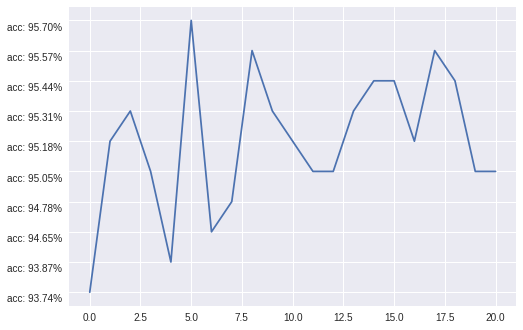

In [17]:
#for reproductivity
from numpy.random import seed 
from tensorflow import set_random_seed 
rownumber = 0
for FirstLayer in range(900,1101,10):
  SecondLayer = 0.5*FirstLayer
  ThirdLayer = 0.1*FirstLayer
  seed(7) 
  set_random_seed(2)
  scaler = StandardScaler()
  X = scaler.fit_transform(X)
  model = Sequential()
  model.add(Dense(FirstLayer, input_dim=8, init='uniform', activation='relu' )) #bias_initializer='zeros'
  model.add(Dense(int(SecondLayer), init='uniform', activation='tanh'))
  model.add(Dense(int(ThirdLayer), init='uniform', activation='relu'))
  model.add(Dense(1, init='uniform', activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  history = model.fit(X, Y, epochs=150, batch_size=97,validation_split=0.20 ) #shuffle = False, 
  scores = model.evaluate(X, Y)
  analysisdf.loc[rownumber,"First Layer Neurons"]=  FirstLayer
  analysisdf.loc[rownumber,"Second layer neurons"]= SecondLayer
  analysisdf.loc[rownumber,"third layer neurons"]= ThirdLayer
  analysisdf.loc[rownumber,"accuracy"]= ("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
  wks.set_dataframe(analysisdf,(1,1))
  rownumber  += 1
plt.plot(analysisdf["accuracy"])

The gighest accuracy is somewhere in this range. So lets see between 1050 and 1075 @ 1 neuron at a time.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1050, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(525, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(105, activation="relu", kernel_initializer="uniform")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  from ipykernel import kernelapp as app


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 4s 6ms/step - loss: 0.6632 - acc: 0.6852 - val_loss: 0.5867 - val_acc: 0.7403
Epoch 2/150
613/613 [==============================] - 0s 123us/step - loss: 0.5174 - acc: 0.7569 - val_loss: 0.4967 - val_acc: 0.7727
Epoch 3/150
613/613 [==============================] - 0s 102us/step - loss: 0.4845 - acc: 0.7684 - val_loss: 0.4655 - val_acc: 0.7662
Epoch 4/150
613/613 [==============================] - 0s 102us/step - loss: 0.4583 - acc: 0.7993 - val_loss: 0.4933 - val_acc: 0.7662
Epoch 5/150
613/613 [==============================] - 0s 103us/step - loss: 0.4531 - acc: 0.7863 - val_loss: 0.4865 - val_acc: 0.7532
Epoch 6/150
613/613 [==============================] - 0s 106us/step - loss: 0.4462 - acc: 0.7879 - val_loss: 0.4787 - val_acc: 0.7597
Epoch 7/150
613/613 [==============================] - 0s 106us/step - loss: 0.4393 - acc: 0.7814 - val_loss: 0.4668 - val_acc: 0.7662
Epoch 8/150

Epoch 23/150
613/613 [==============================] - 0s 106us/step - loss: 0.3630 - acc: 0.8385 - val_loss: 0.5153 - val_acc: 0.8052
Epoch 24/150
613/613 [==============================] - 0s 101us/step - loss: 0.3553 - acc: 0.8418 - val_loss: 0.5844 - val_acc: 0.7662
Epoch 25/150
613/613 [==============================] - 0s 123us/step - loss: 0.3495 - acc: 0.8499 - val_loss: 0.5421 - val_acc: 0.7792
Epoch 26/150
613/613 [==============================] - 0s 110us/step - loss: 0.3752 - acc: 0.8287 - val_loss: 0.5507 - val_acc: 0.7727
Epoch 27/150
613/613 [==============================] - 0s 104us/step - loss: 0.3490 - acc: 0.8401 - val_loss: 0.5473 - val_acc: 0.7468
Epoch 28/150
613/613 [==============================] - 0s 108us/step - loss: 0.3471 - acc: 0.8499 - val_loss: 0.5057 - val_acc: 0.8312
Epoch 29/150
613/613 [==============================] - 0s 107us/step - loss: 0.3310 - acc: 0.8548 - val_loss: 0.5767 - val_acc: 0.7792
Epoch 30/150
613/613 [==========================

613/613 [==============================] - 0s 104us/step - loss: 0.3549 - acc: 0.8434 - val_loss: 0.6971 - val_acc: 0.7662
Epoch 47/150
613/613 [==============================] - 0s 101us/step - loss: 0.3296 - acc: 0.8662 - val_loss: 0.7440 - val_acc: 0.7403
Epoch 48/150
613/613 [==============================] - 0s 117us/step - loss: 0.2694 - acc: 0.8842 - val_loss: 0.6410 - val_acc: 0.7922
Epoch 49/150
613/613 [==============================] - 0s 112us/step - loss: 0.2466 - acc: 0.8891 - val_loss: 0.7162 - val_acc: 0.7597
Epoch 50/150
613/613 [==============================] - 0s 103us/step - loss: 0.2373 - acc: 0.8989 - val_loss: 0.6250 - val_acc: 0.7922
Epoch 51/150
613/613 [==============================] - 0s 105us/step - loss: 0.2148 - acc: 0.9168 - val_loss: 0.7690 - val_acc: 0.7338
Epoch 52/150
613/613 [==============================] - 0s 116us/step - loss: 0.2176 - acc: 0.9135 - val_loss: 0.6521 - val_acc: 0.7922
Epoch 53/150
613/613 [==============================] - 0s 10

613/613 [==============================] - 0s 114us/step - loss: 0.1735 - acc: 0.9184 - val_loss: 0.9436 - val_acc: 0.7532
Epoch 70/150
613/613 [==============================] - 0s 107us/step - loss: 0.1581 - acc: 0.9413 - val_loss: 0.9169 - val_acc: 0.7597
Epoch 71/150
613/613 [==============================] - 0s 103us/step - loss: 0.1282 - acc: 0.9494 - val_loss: 0.9620 - val_acc: 0.7922
Epoch 72/150
613/613 [==============================] - 0s 134us/step - loss: 0.1261 - acc: 0.9560 - val_loss: 1.0378 - val_acc: 0.7922
Epoch 73/150
613/613 [==============================] - 0s 102us/step - loss: 0.1243 - acc: 0.9527 - val_loss: 1.0420 - val_acc: 0.7468
Epoch 74/150
613/613 [==============================] - 0s 100us/step - loss: 0.0977 - acc: 0.9723 - val_loss: 0.9773 - val_acc: 0.7922
Epoch 75/150
613/613 [==============================] - 0s 100us/step - loss: 0.0845 - acc: 0.9772 - val_loss: 1.1156 - val_acc: 0.7857
Epoch 76/150
613/613 [==============================] - 0s 11

613/613 [==============================] - 0s 99us/step - loss: 0.0673 - acc: 0.9755 - val_loss: 1.3324 - val_acc: 0.7597
Epoch 93/150
613/613 [==============================] - 0s 119us/step - loss: 0.0522 - acc: 0.9853 - val_loss: 1.2687 - val_acc: 0.7922
Epoch 94/150
613/613 [==============================] - 0s 108us/step - loss: 0.0455 - acc: 0.9902 - val_loss: 1.5269 - val_acc: 0.7597
Epoch 95/150
613/613 [==============================] - 0s 106us/step - loss: 0.0459 - acc: 0.9821 - val_loss: 1.3207 - val_acc: 0.7597
Epoch 96/150
613/613 [==============================] - 0s 108us/step - loss: 0.0448 - acc: 0.9869 - val_loss: 1.5514 - val_acc: 0.7662
Epoch 97/150
613/613 [==============================] - 0s 106us/step - loss: 0.0375 - acc: 0.9902 - val_loss: 1.4435 - val_acc: 0.7922
Epoch 98/150
613/613 [==============================] - 0s 107us/step - loss: 0.0374 - acc: 0.9886 - val_loss: 1.5609 - val_acc: 0.7727
Epoch 99/150
613/613 [==============================] - 0s 109

613/613 [==============================] - 0s 105us/step - loss: 0.1141 - acc: 0.9511 - val_loss: 1.7215 - val_acc: 0.7208
Epoch 116/150
613/613 [==============================] - 0s 111us/step - loss: 0.0976 - acc: 0.9641 - val_loss: 1.6109 - val_acc: 0.7532
Epoch 117/150
613/613 [==============================] - 0s 103us/step - loss: 0.1640 - acc: 0.9462 - val_loss: 1.6040 - val_acc: 0.7597
Epoch 118/150
613/613 [==============================] - 0s 116us/step - loss: 0.1668 - acc: 0.9478 - val_loss: 1.6810 - val_acc: 0.7338
Epoch 119/150
613/613 [==============================] - 0s 105us/step - loss: 0.1814 - acc: 0.9478 - val_loss: 1.3535 - val_acc: 0.7792
Epoch 120/150
613/613 [==============================] - 0s 118us/step - loss: 0.2028 - acc: 0.9347 - val_loss: 1.3500 - val_acc: 0.7727
Epoch 121/150
613/613 [==============================] - 0s 116us/step - loss: 0.1691 - acc: 0.9413 - val_loss: 1.6211 - val_acc: 0.7532
Epoch 122/150
613/613 [==============================] 

613/613 [==============================] - 0s 109us/step - loss: 0.0092 - acc: 1.0000 - val_loss: 1.5401 - val_acc: 0.7532
Epoch 139/150
613/613 [==============================] - 0s 106us/step - loss: 0.0083 - acc: 1.0000 - val_loss: 1.5298 - val_acc: 0.7792
Epoch 140/150
613/613 [==============================] - 0s 105us/step - loss: 0.0079 - acc: 1.0000 - val_loss: 1.5246 - val_acc: 0.7597
Epoch 141/150
613/613 [==============================] - 0s 110us/step - loss: 0.0077 - acc: 1.0000 - val_loss: 1.6111 - val_acc: 0.7532
Epoch 142/150
613/613 [==============================] - 0s 119us/step - loss: 0.0074 - acc: 1.0000 - val_loss: 1.5960 - val_acc: 0.7597
Epoch 143/150
613/613 [==============================] - 0s 108us/step - loss: 0.0061 - acc: 1.0000 - val_loss: 1.6001 - val_acc: 0.7597
Epoch 144/150
613/613 [==============================] - 0s 106us/step - loss: 0.0059 - acc: 1.0000 - val_loss: 1.6285 - val_acc: 0.7597
Epoch 145/150
613/613 [==============================] 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1051, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 3s 5ms/step - loss: 0.6643 - acc: 0.6786 - val_loss: 0.5877 - val_acc: 0.7273
Epoch 2/150
613/613 [==============================] - 0s 123us/step - loss: 0.5215 - acc: 0.7488 - val_loss: 0.4891 - val_acc: 0.7662
Epoch 3/150
613/613 [==============================] - 0s 102us/step - loss: 0.4830 - acc: 0.7635 - val_loss: 0.4610 - val_acc: 0.7662
Epoch 4/150
613/613 [==============================] - 0s 107us/step - loss: 0.4583 - acc: 0.7945 - val_loss: 0.4920 - val_acc: 0.7662
Epoch 5/150
613/613 [==============================] - 0s 103us/step - loss: 0.4530 - acc: 0.7847 - val_loss: 0.4824 - val_acc: 0.7403
Epoch 6/150
613/613 [==============================] - 0s 107us/step - loss: 0.4473 - acc: 0.7896 - val_loss: 0.4725 - val_acc: 0.7532
Epoch 7/150
613/613 [==============================] - 0s 103us/step - loss: 0.4379 - acc: 0.7863 - val_loss: 0.4640 - val_acc: 0.7597
Epoch 8/150

613/613 [==============================] - 0s 108us/step - loss: 0.3485 - acc: 0.8467 - val_loss: 0.5725 - val_acc: 0.7662
Epoch 25/150
613/613 [==============================] - 0s 114us/step - loss: 0.3365 - acc: 0.8597 - val_loss: 0.5447 - val_acc: 0.7922
Epoch 26/150
613/613 [==============================] - 0s 105us/step - loss: 0.3576 - acc: 0.8271 - val_loss: 0.5374 - val_acc: 0.7922
Epoch 27/150
613/613 [==============================] - 0s 112us/step - loss: 0.3350 - acc: 0.8418 - val_loss: 0.5649 - val_acc: 0.7468
Epoch 28/150
613/613 [==============================] - 0s 109us/step - loss: 0.3286 - acc: 0.8679 - val_loss: 0.5431 - val_acc: 0.8052
Epoch 29/150
613/613 [==============================] - 0s 102us/step - loss: 0.3342 - acc: 0.8434 - val_loss: 0.5979 - val_acc: 0.7662
Epoch 30/150
613/613 [==============================] - 0s 107us/step - loss: 0.3262 - acc: 0.8597 - val_loss: 0.5238 - val_acc: 0.7987
Epoch 31/150
613/613 [==============================] - 0s 11

613/613 [==============================] - 0s 108us/step - loss: 0.2179 - acc: 0.9005 - val_loss: 0.8696 - val_acc: 0.7597
Epoch 49/150
613/613 [==============================] - 0s 106us/step - loss: 0.2298 - acc: 0.9103 - val_loss: 0.6637 - val_acc: 0.7922
Epoch 50/150
613/613 [==============================] - 0s 116us/step - loss: 0.1999 - acc: 0.9152 - val_loss: 0.7800 - val_acc: 0.7857
Epoch 51/150
613/613 [==============================] - 0s 108us/step - loss: 0.2109 - acc: 0.9135 - val_loss: 0.8970 - val_acc: 0.7208
Epoch 52/150
613/613 [==============================] - 0s 105us/step - loss: 0.1940 - acc: 0.9233 - val_loss: 0.8033 - val_acc: 0.7792
Epoch 53/150
613/613 [==============================] - 0s 108us/step - loss: 0.1878 - acc: 0.9217 - val_loss: 0.8110 - val_acc: 0.7662
Epoch 54/150
613/613 [==============================] - 0s 105us/step - loss: 0.1797 - acc: 0.9380 - val_loss: 0.8376 - val_acc: 0.7662
Epoch 55/150
613/613 [==============================] - 0s 10

613/613 [==============================] - 0s 110us/step - loss: 0.0817 - acc: 0.9788 - val_loss: 1.1336 - val_acc: 0.7468
Epoch 71/150
613/613 [==============================] - 0s 108us/step - loss: 0.0686 - acc: 0.9772 - val_loss: 1.1714 - val_acc: 0.7403
Epoch 72/150
613/613 [==============================] - 0s 116us/step - loss: 0.0789 - acc: 0.9755 - val_loss: 1.2014 - val_acc: 0.7662
Epoch 73/150
613/613 [==============================] - 0s 103us/step - loss: 0.0859 - acc: 0.9641 - val_loss: 1.1551 - val_acc: 0.7727
Epoch 74/150
613/613 [==============================] - 0s 115us/step - loss: 0.1161 - acc: 0.9478 - val_loss: 1.2251 - val_acc: 0.7532
Epoch 75/150
613/613 [==============================] - 0s 103us/step - loss: 0.0993 - acc: 0.9641 - val_loss: 1.2464 - val_acc: 0.7532
Epoch 76/150
613/613 [==============================] - 0s 105us/step - loss: 0.0973 - acc: 0.9674 - val_loss: 1.3217 - val_acc: 0.7597
Epoch 77/150
613/613 [==============================] - 0s 11

Epoch 93/150
613/613 [==============================] - 0s 118us/step - loss: 0.0175 - acc: 0.9984 - val_loss: 1.4433 - val_acc: 0.7597
Epoch 94/150
613/613 [==============================] - 0s 105us/step - loss: 0.0190 - acc: 0.9984 - val_loss: 1.4759 - val_acc: 0.7792
Epoch 95/150
613/613 [==============================] - 0s 105us/step - loss: 0.0217 - acc: 0.9984 - val_loss: 1.4776 - val_acc: 0.7727
Epoch 96/150
613/613 [==============================] - 0s 105us/step - loss: 0.0142 - acc: 0.9984 - val_loss: 1.5167 - val_acc: 0.7792
Epoch 97/150
613/613 [==============================] - 0s 112us/step - loss: 0.0152 - acc: 0.9967 - val_loss: 1.5349 - val_acc: 0.7857
Epoch 98/150
613/613 [==============================] - 0s 106us/step - loss: 0.0224 - acc: 0.9935 - val_loss: 1.6061 - val_acc: 0.7792
Epoch 99/150
613/613 [==============================] - 0s 108us/step - loss: 0.0306 - acc: 0.9886 - val_loss: 1.5054 - val_acc: 0.7662
Epoch 100/150
613/613 [=========================

Epoch 115/150
613/613 [==============================] - 0s 106us/step - loss: 0.0882 - acc: 0.9788 - val_loss: 1.1920 - val_acc: 0.7532
Epoch 116/150
613/613 [==============================] - 0s 109us/step - loss: 0.0886 - acc: 0.9657 - val_loss: 1.1611 - val_acc: 0.7597
Epoch 117/150
613/613 [==============================] - 0s 104us/step - loss: 0.0660 - acc: 0.9788 - val_loss: 1.1993 - val_acc: 0.7468
Epoch 118/150
613/613 [==============================] - 0s 100us/step - loss: 0.0601 - acc: 0.9755 - val_loss: 1.2537 - val_acc: 0.7532
Epoch 119/150
613/613 [==============================] - 0s 107us/step - loss: 0.0594 - acc: 0.9821 - val_loss: 1.3089 - val_acc: 0.7792
Epoch 120/150
613/613 [==============================] - 0s 117us/step - loss: 0.0463 - acc: 0.9853 - val_loss: 1.2269 - val_acc: 0.7792
Epoch 121/150
613/613 [==============================] - 0s 108us/step - loss: 0.0367 - acc: 0.9918 - val_loss: 1.4096 - val_acc: 0.7468
Epoch 122/150
613/613 [==================

613/613 [==============================] - 0s 112us/step - loss: 0.0036 - acc: 1.0000 - val_loss: 1.6302 - val_acc: 0.7662
Epoch 138/150
613/613 [==============================] - 0s 136us/step - loss: 0.0033 - acc: 1.0000 - val_loss: 1.6423 - val_acc: 0.7532
Epoch 139/150
613/613 [==============================] - 0s 104us/step - loss: 0.0029 - acc: 1.0000 - val_loss: 1.6546 - val_acc: 0.7597
Epoch 140/150
613/613 [==============================] - 0s 98us/step - loss: 0.0028 - acc: 1.0000 - val_loss: 1.6462 - val_acc: 0.7727
Epoch 141/150
613/613 [==============================] - 0s 110us/step - loss: 0.0028 - acc: 1.0000 - val_loss: 1.6788 - val_acc: 0.7532
Epoch 142/150
613/613 [==============================] - 0s 106us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 1.6995 - val_acc: 0.7597
Epoch 143/150
613/613 [==============================] - 0s 117us/step - loss: 0.0023 - acc: 1.0000 - val_loss: 1.7033 - val_acc: 0.7662
Epoch 144/150
613/613 [==============================] -

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1052, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(526, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 3s 6ms/step - loss: 0.6660 - acc: 0.6737 - val_loss: 0.5921 - val_acc: 0.7143
Epoch 2/150
613/613 [==============================] - 0s 114us/step - loss: 0.5239 - acc: 0.7439 - val_loss: 0.4957 - val_acc: 0.7597
Epoch 3/150
613/613 [==============================] - 0s 107us/step - loss: 0.4838 - acc: 0.7651 - val_loss: 0.4636 - val_acc: 0.7662
Epoch 4/150
613/613 [==============================] - 0s 104us/step - loss: 0.4590 - acc: 0.7977 - val_loss: 0.4894 - val_acc: 0.7662
Epoch 5/150
613/613 [==============================] - 0s 108us/step - loss: 0.4534 - acc: 0.7814 - val_loss: 0.4797 - val_acc: 0.7468
Epoch 6/150
613/613 [==============================] - 0s 106us/step - loss: 0.4472 - acc: 0.7847 - val_loss: 0.4722 - val_acc: 0.7597
Epoch 7/150
613/613 [==============================] - 0s 106us/step - loss: 0.4380 - acc: 0.7847 - val_loss: 0.4678 - val_acc: 0.7532
Epoch 8/150

613/613 [==============================] - 0s 99us/step - loss: 0.3702 - acc: 0.8434 - val_loss: 0.4970 - val_acc: 0.8052
Epoch 23/150
613/613 [==============================] - 0s 106us/step - loss: 0.3609 - acc: 0.8369 - val_loss: 0.5180 - val_acc: 0.7987
Epoch 24/150
613/613 [==============================] - 0s 108us/step - loss: 0.3525 - acc: 0.8434 - val_loss: 0.5795 - val_acc: 0.7597
Epoch 25/150
613/613 [==============================] - 0s 108us/step - loss: 0.3445 - acc: 0.8515 - val_loss: 0.5372 - val_acc: 0.7662
Epoch 26/150
613/613 [==============================] - 0s 114us/step - loss: 0.3687 - acc: 0.8303 - val_loss: 0.5279 - val_acc: 0.7727
Epoch 27/150
613/613 [==============================] - 0s 108us/step - loss: 0.3404 - acc: 0.8352 - val_loss: 0.5703 - val_acc: 0.7403
Epoch 28/150
613/613 [==============================] - 0s 111us/step - loss: 0.3404 - acc: 0.8548 - val_loss: 0.5189 - val_acc: 0.8182
Epoch 29/150
613/613 [==============================] - 0s 111

Epoch 45/150
613/613 [==============================] - 0s 109us/step - loss: 0.2606 - acc: 0.8891 - val_loss: 1.0251 - val_acc: 0.7468
Epoch 46/150
613/613 [==============================] - 0s 105us/step - loss: 0.3314 - acc: 0.8467 - val_loss: 0.6595 - val_acc: 0.7857
Epoch 47/150
613/613 [==============================] - 0s 110us/step - loss: 0.3151 - acc: 0.8695 - val_loss: 0.7767 - val_acc: 0.7532
Epoch 48/150
613/613 [==============================] - 0s 107us/step - loss: 0.2837 - acc: 0.8695 - val_loss: 0.6841 - val_acc: 0.7792
Epoch 49/150
613/613 [==============================] - 0s 102us/step - loss: 0.2413 - acc: 0.8989 - val_loss: 0.7610 - val_acc: 0.7532
Epoch 50/150
613/613 [==============================] - 0s 110us/step - loss: 0.2341 - acc: 0.8972 - val_loss: 0.6429 - val_acc: 0.7597
Epoch 51/150
613/613 [==============================] - 0s 107us/step - loss: 0.2209 - acc: 0.9070 - val_loss: 0.7955 - val_acc: 0.7532
Epoch 52/150
613/613 [==========================

613/613 [==============================] - 0s 102us/step - loss: 0.2017 - acc: 0.9217 - val_loss: 0.9872 - val_acc: 0.7597
Epoch 68/150
613/613 [==============================] - 0s 101us/step - loss: 0.1487 - acc: 0.9364 - val_loss: 0.9526 - val_acc: 0.7597
Epoch 69/150
613/613 [==============================] - 0s 122us/step - loss: 0.1624 - acc: 0.9347 - val_loss: 1.0562 - val_acc: 0.7532
Epoch 70/150
613/613 [==============================] - 0s 111us/step - loss: 0.1188 - acc: 0.9576 - val_loss: 1.0191 - val_acc: 0.7792
Epoch 71/150
613/613 [==============================] - 0s 106us/step - loss: 0.1043 - acc: 0.9608 - val_loss: 1.0943 - val_acc: 0.7532
Epoch 72/150
613/613 [==============================] - 0s 105us/step - loss: 0.1011 - acc: 0.9690 - val_loss: 1.1907 - val_acc: 0.7727
Epoch 73/150
613/613 [==============================] - 0s 113us/step - loss: 0.1070 - acc: 0.9608 - val_loss: 1.1268 - val_acc: 0.7532
Epoch 74/150
613/613 [==============================] - 0s 12

Epoch 88/150
613/613 [==============================] - 0s 109us/step - loss: 0.1113 - acc: 0.9576 - val_loss: 1.1014 - val_acc: 0.7857
Epoch 89/150
613/613 [==============================] - 0s 104us/step - loss: 0.0874 - acc: 0.9641 - val_loss: 1.3889 - val_acc: 0.7403
Epoch 90/150
613/613 [==============================] - 0s 105us/step - loss: 0.0801 - acc: 0.9608 - val_loss: 1.1384 - val_acc: 0.7597
Epoch 91/150
613/613 [==============================] - 0s 104us/step - loss: 0.0478 - acc: 0.9869 - val_loss: 1.2415 - val_acc: 0.7597
Epoch 92/150
613/613 [==============================] - 0s 109us/step - loss: 0.0521 - acc: 0.9853 - val_loss: 1.1893 - val_acc: 0.7662
Epoch 93/150
613/613 [==============================] - 0s 112us/step - loss: 0.0413 - acc: 0.9886 - val_loss: 1.3420 - val_acc: 0.7792
Epoch 94/150
613/613 [==============================] - 0s 104us/step - loss: 0.0409 - acc: 0.9853 - val_loss: 1.2889 - val_acc: 0.7792
Epoch 95/150
613/613 [==========================

613/613 [==============================] - 0s 109us/step - loss: 0.0110 - acc: 0.9984 - val_loss: 1.6857 - val_acc: 0.7273
Epoch 110/150
613/613 [==============================] - 0s 101us/step - loss: 0.0173 - acc: 0.9935 - val_loss: 1.6665 - val_acc: 0.7662
Epoch 111/150
613/613 [==============================] - 0s 115us/step - loss: 0.0900 - acc: 0.9641 - val_loss: 1.7613 - val_acc: 0.7792
Epoch 112/150
613/613 [==============================] - 0s 110us/step - loss: 0.0952 - acc: 0.9723 - val_loss: 1.6897 - val_acc: 0.7403
Epoch 113/150
613/613 [==============================] - 0s 110us/step - loss: 0.0462 - acc: 0.9853 - val_loss: 1.6518 - val_acc: 0.7727
Epoch 114/150
613/613 [==============================] - 0s 103us/step - loss: 0.0225 - acc: 0.9902 - val_loss: 1.6651 - val_acc: 0.7727
Epoch 115/150
613/613 [==============================] - 0s 116us/step - loss: 0.0257 - acc: 0.9886 - val_loss: 1.6453 - val_acc: 0.7597
Epoch 116/150
613/613 [==============================] 

613/613 [==============================] - 0s 106us/step - loss: 0.0525 - acc: 0.9804 - val_loss: 1.4966 - val_acc: 0.7597
Epoch 132/150
613/613 [==============================] - 0s 108us/step - loss: 0.0323 - acc: 0.9869 - val_loss: 1.5263 - val_acc: 0.7662
Epoch 133/150
613/613 [==============================] - 0s 102us/step - loss: 0.0153 - acc: 1.0000 - val_loss: 1.5225 - val_acc: 0.7597
Epoch 134/150
613/613 [==============================] - 0s 114us/step - loss: 0.0168 - acc: 0.9984 - val_loss: 1.4967 - val_acc: 0.7857
Epoch 135/150
613/613 [==============================] - 0s 111us/step - loss: 0.0122 - acc: 0.9984 - val_loss: 1.5802 - val_acc: 0.7662
Epoch 136/150
613/613 [==============================] - 0s 105us/step - loss: 0.0104 - acc: 1.0000 - val_loss: 1.6155 - val_acc: 0.7597
Epoch 137/150
613/613 [==============================] - 0s 121us/step - loss: 0.0078 - acc: 1.0000 - val_loss: 1.5730 - val_acc: 0.7727
Epoch 138/150
613/613 [==============================] 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1053, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 3s 6ms/step - loss: 0.6638 - acc: 0.6966 - val_loss: 0.5871 - val_acc: 0.7403
Epoch 2/150
613/613 [==============================] - 0s 116us/step - loss: 0.5187 - acc: 0.7586 - val_loss: 0.4982 - val_acc: 0.7727
Epoch 3/150
613/613 [==============================] - 0s 105us/step - loss: 0.4816 - acc: 0.7700 - val_loss: 0.4748 - val_acc: 0.7532
Epoch 4/150
613/613 [==============================] - 0s 125us/step - loss: 0.4574 - acc: 0.7977 - val_loss: 0.4932 - val_acc: 0.7597
Epoch 5/150
613/613 [==============================] - 0s 105us/step - loss: 0.4508 - acc: 0.7879 - val_loss: 0.4845 - val_acc: 0.7468
Epoch 6/150
613/613 [==============================] - 0s 104us/step - loss: 0.4459 - acc: 0.7863 - val_loss: 0.4793 - val_acc: 0.7532
Epoch 7/150
613/613 [==============================] - 0s 102us/step - loss: 0.4382 - acc: 0.7863 - val_loss: 0.4710 - val_acc: 0.7532
Epoch 8/150

Epoch 24/150
613/613 [==============================] - 0s 109us/step - loss: 0.3514 - acc: 0.8418 - val_loss: 0.5648 - val_acc: 0.7597
Epoch 25/150
613/613 [==============================] - 0s 105us/step - loss: 0.3432 - acc: 0.8483 - val_loss: 0.5473 - val_acc: 0.7662
Epoch 26/150
613/613 [==============================] - 0s 104us/step - loss: 0.3623 - acc: 0.8303 - val_loss: 0.5378 - val_acc: 0.7857
Epoch 27/150
613/613 [==============================] - 0s 104us/step - loss: 0.3383 - acc: 0.8499 - val_loss: 0.5572 - val_acc: 0.7597
Epoch 28/150
613/613 [==============================] - 0s 122us/step - loss: 0.3344 - acc: 0.8597 - val_loss: 0.5247 - val_acc: 0.8117
Epoch 29/150
613/613 [==============================] - 0s 109us/step - loss: 0.3286 - acc: 0.8499 - val_loss: 0.5549 - val_acc: 0.7857
Epoch 30/150
613/613 [==============================] - 0s 105us/step - loss: 0.3153 - acc: 0.8597 - val_loss: 0.5133 - val_acc: 0.8052
Epoch 31/150
613/613 [==========================

613/613 [==============================] - 0s 118us/step - loss: 0.2799 - acc: 0.8662 - val_loss: 0.7312 - val_acc: 0.7987
Epoch 47/150
613/613 [==============================] - 0s 107us/step - loss: 0.2684 - acc: 0.8989 - val_loss: 0.8151 - val_acc: 0.7792
Epoch 48/150
613/613 [==============================] - 0s 112us/step - loss: 0.2313 - acc: 0.9021 - val_loss: 0.7829 - val_acc: 0.7857
Epoch 49/150
613/613 [==============================] - 0s 112us/step - loss: 0.2128 - acc: 0.9217 - val_loss: 0.6979 - val_acc: 0.7597
Epoch 50/150
613/613 [==============================] - 0s 118us/step - loss: 0.2079 - acc: 0.9233 - val_loss: 0.8316 - val_acc: 0.7792
Epoch 51/150
613/613 [==============================] - 0s 119us/step - loss: 0.2127 - acc: 0.9135 - val_loss: 0.7108 - val_acc: 0.7922
Epoch 52/150
613/613 [==============================] - 0s 106us/step - loss: 0.1727 - acc: 0.9364 - val_loss: 0.8196 - val_acc: 0.7792
Epoch 53/150
613/613 [==============================] - 0s 10

613/613 [==============================] - 0s 107us/step - loss: 0.0706 - acc: 0.9837 - val_loss: 1.1949 - val_acc: 0.7662
Epoch 71/150
613/613 [==============================] - 0s 109us/step - loss: 0.0955 - acc: 0.9576 - val_loss: 1.2474 - val_acc: 0.7338
Epoch 72/150
613/613 [==============================] - 0s 106us/step - loss: 0.1173 - acc: 0.9641 - val_loss: 1.2646 - val_acc: 0.7662
Epoch 73/150
613/613 [==============================] - 0s 110us/step - loss: 0.1239 - acc: 0.9527 - val_loss: 1.2525 - val_acc: 0.7597
Epoch 74/150
613/613 [==============================] - 0s 101us/step - loss: 0.0850 - acc: 0.9674 - val_loss: 1.2447 - val_acc: 0.7532
Epoch 75/150
613/613 [==============================] - 0s 109us/step - loss: 0.0911 - acc: 0.9657 - val_loss: 1.4128 - val_acc: 0.7143
Epoch 76/150
613/613 [==============================] - 0s 114us/step - loss: 0.0823 - acc: 0.9723 - val_loss: 1.2414 - val_acc: 0.7662
Epoch 77/150
613/613 [==============================] - 0s 11

613/613 [==============================] - 0s 104us/step - loss: 0.0233 - acc: 0.9967 - val_loss: 1.6548 - val_acc: 0.7468
Epoch 94/150
613/613 [==============================] - 0s 105us/step - loss: 0.0373 - acc: 0.9902 - val_loss: 1.5576 - val_acc: 0.7727
Epoch 95/150
613/613 [==============================] - 0s 118us/step - loss: 0.0530 - acc: 0.9804 - val_loss: 1.6567 - val_acc: 0.7468
Epoch 96/150
613/613 [==============================] - 0s 101us/step - loss: 0.0569 - acc: 0.9837 - val_loss: 1.7298 - val_acc: 0.7662
Epoch 97/150
613/613 [==============================] - 0s 107us/step - loss: 0.0425 - acc: 0.9853 - val_loss: 1.6019 - val_acc: 0.7208
Epoch 98/150
613/613 [==============================] - 0s 104us/step - loss: 0.0412 - acc: 0.9837 - val_loss: 1.6348 - val_acc: 0.7662
Epoch 99/150
613/613 [==============================] - 0s 103us/step - loss: 0.0662 - acc: 0.9804 - val_loss: 1.7193 - val_acc: 0.7662
Epoch 100/150
613/613 [==============================] - 0s 1

613/613 [==============================] - 0s 107us/step - loss: 0.2061 - acc: 0.9429 - val_loss: 1.9091 - val_acc: 0.7078
Epoch 115/150
613/613 [==============================] - 0s 118us/step - loss: 0.3302 - acc: 0.9038 - val_loss: 2.1218 - val_acc: 0.6883
Epoch 116/150
613/613 [==============================] - 0s 117us/step - loss: 0.3821 - acc: 0.8956 - val_loss: 2.0972 - val_acc: 0.7338
Epoch 117/150
613/613 [==============================] - 0s 105us/step - loss: 0.2231 - acc: 0.9266 - val_loss: 1.8255 - val_acc: 0.7403
Epoch 118/150
613/613 [==============================] - 0s 101us/step - loss: 0.3347 - acc: 0.9005 - val_loss: 1.7593 - val_acc: 0.7143
Epoch 119/150
613/613 [==============================] - 0s 108us/step - loss: 0.3318 - acc: 0.9038 - val_loss: 1.3953 - val_acc: 0.7532
Epoch 120/150
613/613 [==============================] - 0s 102us/step - loss: 0.1882 - acc: 0.9331 - val_loss: 1.3444 - val_acc: 0.7597
Epoch 121/150
613/613 [==============================] 

613/613 [==============================] - 0s 108us/step - loss: 0.0086 - acc: 1.0000 - val_loss: 1.5591 - val_acc: 0.7532
Epoch 137/150
613/613 [==============================] - 0s 102us/step - loss: 0.0081 - acc: 1.0000 - val_loss: 1.5971 - val_acc: 0.7532
Epoch 138/150
613/613 [==============================] - 0s 117us/step - loss: 0.0079 - acc: 1.0000 - val_loss: 1.6415 - val_acc: 0.7597
Epoch 139/150
613/613 [==============================] - 0s 111us/step - loss: 0.0072 - acc: 1.0000 - val_loss: 1.6298 - val_acc: 0.7662
Epoch 140/150
613/613 [==============================] - 0s 101us/step - loss: 0.0069 - acc: 1.0000 - val_loss: 1.6345 - val_acc: 0.7597
Epoch 141/150
613/613 [==============================] - 0s 110us/step - loss: 0.0064 - acc: 1.0000 - val_loss: 1.6807 - val_acc: 0.7597
Epoch 142/150
613/613 [==============================] - 0s 109us/step - loss: 0.0060 - acc: 1.0000 - val_loss: 1.6774 - val_acc: 0.7597
Epoch 143/150
613/613 [==============================] 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1054, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(527, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 4s 6ms/step - loss: 0.6615 - acc: 0.6770 - val_loss: 0.5826 - val_acc: 0.7338
Epoch 2/150
613/613 [==============================] - 0s 135us/step - loss: 0.5172 - acc: 0.7520 - val_loss: 0.4907 - val_acc: 0.7662
Epoch 3/150
613/613 [==============================] - 0s 110us/step - loss: 0.4844 - acc: 0.7684 - val_loss: 0.4589 - val_acc: 0.7727
Epoch 4/150
613/613 [==============================] - 0s 103us/step - loss: 0.4590 - acc: 0.7912 - val_loss: 0.4921 - val_acc: 0.7662
Epoch 5/150
613/613 [==============================] - 0s 97us/step - loss: 0.4538 - acc: 0.7847 - val_loss: 0.4846 - val_acc: 0.7403
Epoch 6/150
613/613 [==============================] - 0s 103us/step - loss: 0.4470 - acc: 0.7912 - val_loss: 0.4758 - val_acc: 0.7532
Epoch 7/150
613/613 [==============================] - 0s 105us/step - loss: 0.4393 - acc: 0.7863 - val_loss: 0.4640 - val_acc: 0.7597
Epoch 8/150


613/613 [==============================] - 0s 105us/step - loss: 0.3581 - acc: 0.8401 - val_loss: 0.5409 - val_acc: 0.7987
Epoch 24/150
613/613 [==============================] - 0s 108us/step - loss: 0.3561 - acc: 0.8352 - val_loss: 0.5836 - val_acc: 0.7792
Epoch 25/150
613/613 [==============================] - 0s 103us/step - loss: 0.3502 - acc: 0.8434 - val_loss: 0.5632 - val_acc: 0.7792
Epoch 26/150
613/613 [==============================] - 0s 111us/step - loss: 0.3754 - acc: 0.8091 - val_loss: 0.5461 - val_acc: 0.7727
Epoch 27/150
613/613 [==============================] - 0s 109us/step - loss: 0.3476 - acc: 0.8320 - val_loss: 0.5699 - val_acc: 0.7403
Epoch 28/150
613/613 [==============================] - 0s 117us/step - loss: 0.3543 - acc: 0.8369 - val_loss: 0.5319 - val_acc: 0.8117
Epoch 29/150
613/613 [==============================] - 0s 111us/step - loss: 0.3296 - acc: 0.8483 - val_loss: 0.5791 - val_acc: 0.7727
Epoch 30/150
613/613 [==============================] - 0s 10

613/613 [==============================] - 0s 107us/step - loss: 0.2370 - acc: 0.8989 - val_loss: 0.9028 - val_acc: 0.7597
Epoch 46/150
613/613 [==============================] - 0s 121us/step - loss: 0.2859 - acc: 0.8662 - val_loss: 0.7617 - val_acc: 0.7727
Epoch 47/150
613/613 [==============================] - 0s 107us/step - loss: 0.2580 - acc: 0.8825 - val_loss: 0.8176 - val_acc: 0.7662
Epoch 48/150
613/613 [==============================] - 0s 109us/step - loss: 0.2624 - acc: 0.8793 - val_loss: 0.8862 - val_acc: 0.7597
Epoch 49/150
613/613 [==============================] - 0s 107us/step - loss: 0.2576 - acc: 0.8972 - val_loss: 0.7205 - val_acc: 0.8052
Epoch 50/150
613/613 [==============================] - 0s 106us/step - loss: 0.2223 - acc: 0.9021 - val_loss: 0.8558 - val_acc: 0.7532
Epoch 51/150
613/613 [==============================] - 0s 114us/step - loss: 0.2050 - acc: 0.9152 - val_loss: 0.7676 - val_acc: 0.7597
Epoch 52/150
613/613 [==============================] - 0s 10

Epoch 68/150
613/613 [==============================] - 0s 107us/step - loss: 0.1315 - acc: 0.9396 - val_loss: 1.2775 - val_acc: 0.7727
Epoch 69/150
613/613 [==============================] - 0s 113us/step - loss: 0.1574 - acc: 0.9380 - val_loss: 1.3180 - val_acc: 0.6558
Epoch 70/150
613/613 [==============================] - 0s 102us/step - loss: 0.1744 - acc: 0.9250 - val_loss: 1.2577 - val_acc: 0.7532
Epoch 71/150
613/613 [==============================] - 0s 108us/step - loss: 0.1290 - acc: 0.9478 - val_loss: 1.1971 - val_acc: 0.7792
Epoch 72/150
613/613 [==============================] - 0s 106us/step - loss: 0.1149 - acc: 0.9608 - val_loss: 1.2900 - val_acc: 0.7662
Epoch 73/150
613/613 [==============================] - 0s 108us/step - loss: 0.1062 - acc: 0.9576 - val_loss: 1.2642 - val_acc: 0.7727
Epoch 74/150
613/613 [==============================] - 0s 104us/step - loss: 0.1124 - acc: 0.9560 - val_loss: 1.2745 - val_acc: 0.7597
Epoch 75/150
613/613 [==========================

613/613 [==============================] - 0s 102us/step - loss: 0.0622 - acc: 0.9804 - val_loss: 1.2378 - val_acc: 0.7792
Epoch 92/150
613/613 [==============================] - 0s 119us/step - loss: 0.0538 - acc: 0.9821 - val_loss: 1.3087 - val_acc: 0.7338
Epoch 93/150
613/613 [==============================] - 0s 113us/step - loss: 0.0497 - acc: 0.9902 - val_loss: 1.3195 - val_acc: 0.7727
Epoch 94/150
613/613 [==============================] - 0s 104us/step - loss: 0.0413 - acc: 0.9902 - val_loss: 1.4548 - val_acc: 0.7468
Epoch 95/150
613/613 [==============================] - 0s 111us/step - loss: 0.0349 - acc: 0.9951 - val_loss: 1.3874 - val_acc: 0.7597
Epoch 96/150
613/613 [==============================] - 0s 111us/step - loss: 0.0249 - acc: 0.9984 - val_loss: 1.4609 - val_acc: 0.7468
Epoch 97/150
613/613 [==============================] - 0s 110us/step - loss: 0.0226 - acc: 0.9951 - val_loss: 1.4426 - val_acc: 0.7468
Epoch 98/150
613/613 [==============================] - 0s 10

Epoch 113/150
613/613 [==============================] - 0s 111us/step - loss: 0.0060 - acc: 1.0000 - val_loss: 1.7687 - val_acc: 0.7468
Epoch 114/150
613/613 [==============================] - 0s 113us/step - loss: 0.0050 - acc: 1.0000 - val_loss: 1.7831 - val_acc: 0.7468
Epoch 115/150
613/613 [==============================] - 0s 111us/step - loss: 0.0040 - acc: 1.0000 - val_loss: 1.7672 - val_acc: 0.7468
Epoch 116/150
613/613 [==============================] - 0s 114us/step - loss: 0.0038 - acc: 1.0000 - val_loss: 1.7833 - val_acc: 0.7468
Epoch 117/150
613/613 [==============================] - 0s 105us/step - loss: 0.0035 - acc: 1.0000 - val_loss: 1.8286 - val_acc: 0.7532
Epoch 118/150
613/613 [==============================] - 0s 106us/step - loss: 0.0044 - acc: 1.0000 - val_loss: 1.8077 - val_acc: 0.7597
Epoch 119/150
613/613 [==============================] - 0s 106us/step - loss: 0.0042 - acc: 1.0000 - val_loss: 1.7979 - val_acc: 0.7597
Epoch 120/150
613/613 [==================

Epoch 136/150
613/613 [==============================] - 0s 96us/step - loss: 0.0541 - acc: 0.9821 - val_loss: 1.2215 - val_acc: 0.7662
Epoch 137/150
613/613 [==============================] - 0s 111us/step - loss: 0.0391 - acc: 0.9902 - val_loss: 1.3209 - val_acc: 0.7597
Epoch 138/150
613/613 [==============================] - 0s 114us/step - loss: 0.0323 - acc: 0.9935 - val_loss: 1.3181 - val_acc: 0.7727
Epoch 139/150
613/613 [==============================] - 0s 117us/step - loss: 0.0232 - acc: 1.0000 - val_loss: 1.3691 - val_acc: 0.7532
Epoch 140/150
613/613 [==============================] - 0s 108us/step - loss: 0.0184 - acc: 0.9984 - val_loss: 1.4475 - val_acc: 0.7532
Epoch 141/150
613/613 [==============================] - 0s 103us/step - loss: 0.0162 - acc: 0.9967 - val_loss: 1.4221 - val_acc: 0.7532
Epoch 142/150
613/613 [==============================] - 0s 100us/step - loss: 0.0143 - acc: 1.0000 - val_loss: 1.4729 - val_acc: 0.7662
Epoch 143/150
613/613 [===================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1055, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 4s 6ms/step - loss: 0.6642 - acc: 0.6754 - val_loss: 0.5901 - val_acc: 0.7273
Epoch 2/150
613/613 [==============================] - 0s 136us/step - loss: 0.5222 - acc: 0.7520 - val_loss: 0.4917 - val_acc: 0.7662
Epoch 3/150
613/613 [==============================] - 0s 108us/step - loss: 0.4857 - acc: 0.7667 - val_loss: 0.4583 - val_acc: 0.7727
Epoch 4/150
613/613 [==============================] - 0s 106us/step - loss: 0.4614 - acc: 0.7896 - val_loss: 0.4896 - val_acc: 0.7662
Epoch 5/150
613/613 [==============================] - 0s 105us/step - loss: 0.4561 - acc: 0.7830 - val_loss: 0.4851 - val_acc: 0.7468
Epoch 6/150
613/613 [==============================] - 0s 103us/step - loss: 0.4496 - acc: 0.7863 - val_loss: 0.4756 - val_acc: 0.7532
Epoch 7/150
613/613 [==============================] - 0s 111us/step - loss: 0.4409 - acc: 0.7830 - val_loss: 0.4645 - val_acc: 0.7532
Epoch 8/150

613/613 [==============================] - 0s 106us/step - loss: 0.3542 - acc: 0.8467 - val_loss: 0.5730 - val_acc: 0.7662
Epoch 25/150
613/613 [==============================] - 0s 111us/step - loss: 0.3446 - acc: 0.8548 - val_loss: 0.5407 - val_acc: 0.7662
Epoch 26/150
613/613 [==============================] - 0s 111us/step - loss: 0.3722 - acc: 0.8206 - val_loss: 0.5369 - val_acc: 0.7857
Epoch 27/150
613/613 [==============================] - 0s 102us/step - loss: 0.3439 - acc: 0.8467 - val_loss: 0.5763 - val_acc: 0.7403
Epoch 28/150
613/613 [==============================] - 0s 105us/step - loss: 0.3418 - acc: 0.8548 - val_loss: 0.5153 - val_acc: 0.8182
Epoch 29/150
613/613 [==============================] - 0s 100us/step - loss: 0.3395 - acc: 0.8467 - val_loss: 0.5514 - val_acc: 0.7922
Epoch 30/150
613/613 [==============================] - 0s 106us/step - loss: 0.3257 - acc: 0.8597 - val_loss: 0.5031 - val_acc: 0.8117
Epoch 31/150
613/613 [==============================] - 0s 11

613/613 [==============================] - 0s 109us/step - loss: 0.3287 - acc: 0.8532 - val_loss: 0.6788 - val_acc: 0.7857
Epoch 47/150
613/613 [==============================] - 0s 102us/step - loss: 0.3044 - acc: 0.8858 - val_loss: 0.6924 - val_acc: 0.7727
Epoch 48/150
613/613 [==============================] - 0s 110us/step - loss: 0.2542 - acc: 0.8972 - val_loss: 0.6667 - val_acc: 0.7792
Epoch 49/150
613/613 [==============================] - 0s 112us/step - loss: 0.2205 - acc: 0.9119 - val_loss: 0.6407 - val_acc: 0.7727
Epoch 50/150
613/613 [==============================] - 0s 107us/step - loss: 0.2086 - acc: 0.9250 - val_loss: 0.7456 - val_acc: 0.7727
Epoch 51/150
613/613 [==============================] - 0s 103us/step - loss: 0.2011 - acc: 0.9152 - val_loss: 0.6954 - val_acc: 0.7792
Epoch 52/150
613/613 [==============================] - 0s 109us/step - loss: 0.1868 - acc: 0.9299 - val_loss: 0.7602 - val_acc: 0.7792
Epoch 53/150
613/613 [==============================] - 0s 10

613/613 [==============================] - 0s 104us/step - loss: 0.1329 - acc: 0.9511 - val_loss: 1.0779 - val_acc: 0.7532
Epoch 68/150
613/613 [==============================] - 0s 122us/step - loss: 0.1124 - acc: 0.9560 - val_loss: 1.1062 - val_acc: 0.7532
Epoch 69/150
613/613 [==============================] - 0s 103us/step - loss: 0.1179 - acc: 0.9527 - val_loss: 1.2054 - val_acc: 0.7013
Epoch 70/150
613/613 [==============================] - 0s 105us/step - loss: 0.2056 - acc: 0.9233 - val_loss: 1.2957 - val_acc: 0.7143
Epoch 71/150
613/613 [==============================] - 0s 105us/step - loss: 0.2096 - acc: 0.9315 - val_loss: 1.4647 - val_acc: 0.7208
Epoch 72/150
613/613 [==============================] - 0s 108us/step - loss: 0.1890 - acc: 0.9331 - val_loss: 1.1797 - val_acc: 0.7468
Epoch 73/150
613/613 [==============================] - 0s 105us/step - loss: 0.1918 - acc: 0.9233 - val_loss: 1.1312 - val_acc: 0.7792
Epoch 74/150
613/613 [==============================] - 0s 11

613/613 [==============================] - 0s 109us/step - loss: 0.0625 - acc: 0.9837 - val_loss: 1.2317 - val_acc: 0.7597
Epoch 90/150
613/613 [==============================] - 0s 101us/step - loss: 0.0445 - acc: 0.9886 - val_loss: 1.2919 - val_acc: 0.7403
Epoch 91/150
613/613 [==============================] - 0s 126us/step - loss: 0.0463 - acc: 0.9837 - val_loss: 1.2219 - val_acc: 0.7403
Epoch 92/150
613/613 [==============================] - 0s 99us/step - loss: 0.0410 - acc: 0.9918 - val_loss: 1.4085 - val_acc: 0.7597
Epoch 93/150
613/613 [==============================] - 0s 109us/step - loss: 0.0350 - acc: 0.9869 - val_loss: 1.3004 - val_acc: 0.7727
Epoch 94/150
613/613 [==============================] - 0s 102us/step - loss: 0.0437 - acc: 0.9853 - val_loss: 1.4554 - val_acc: 0.7597
Epoch 95/150
613/613 [==============================] - 0s 111us/step - loss: 0.0355 - acc: 0.9886 - val_loss: 1.3692 - val_acc: 0.7532
Epoch 96/150
613/613 [==============================] - 0s 105

613/613 [==============================] - 0s 114us/step - loss: 0.0602 - acc: 0.9755 - val_loss: 1.5270 - val_acc: 0.7532
Epoch 113/150
613/613 [==============================] - 0s 113us/step - loss: 0.0497 - acc: 0.9804 - val_loss: 1.3995 - val_acc: 0.7403
Epoch 114/150
613/613 [==============================] - 0s 106us/step - loss: 0.0448 - acc: 0.9886 - val_loss: 1.6071 - val_acc: 0.7662
Epoch 115/150
613/613 [==============================] - 0s 113us/step - loss: 0.0244 - acc: 0.9951 - val_loss: 1.4934 - val_acc: 0.7727
Epoch 116/150
613/613 [==============================] - 0s 105us/step - loss: 0.0121 - acc: 0.9984 - val_loss: 1.5491 - val_acc: 0.7532
Epoch 117/150
613/613 [==============================] - 0s 101us/step - loss: 0.0196 - acc: 0.9951 - val_loss: 1.5435 - val_acc: 0.7857
Epoch 118/150
613/613 [==============================] - 0s 108us/step - loss: 0.0135 - acc: 0.9967 - val_loss: 1.5744 - val_acc: 0.7662
Epoch 119/150
613/613 [==============================] 


613/613 [==============================] - 0s 107us/step - loss: 0.1835 - acc: 0.9315 - val_loss: 1.0054 - val_acc: 0.7468
Epoch 137/150
613/613 [==============================] - 0s 118us/step - loss: 0.1324 - acc: 0.9445 - val_loss: 0.8826 - val_acc: 0.7662
Epoch 138/150
613/613 [==============================] - 0s 107us/step - loss: 0.0886 - acc: 0.9723 - val_loss: 1.0063 - val_acc: 0.7532
Epoch 139/150
613/613 [==============================] - 0s 109us/step - loss: 0.0657 - acc: 0.9869 - val_loss: 0.9755 - val_acc: 0.7597
Epoch 140/150
613/613 [==============================] - 0s 119us/step - loss: 0.0532 - acc: 0.9886 - val_loss: 1.0687 - val_acc: 0.7597
Epoch 141/150
613/613 [==============================] - 0s 100us/step - loss: 0.0396 - acc: 0.9967 - val_loss: 1.2018 - val_acc: 0.7597
Epoch 142/150
613/613 [==============================] - 0s 112us/step - loss: 0.0408 - acc: 0.9869 - val_loss: 1.1853 - val_acc: 0.7532
Epoch 143/150
613/613 [==============================]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1056, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(528, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 4s 6ms/step - loss: 0.6659 - acc: 0.6672 - val_loss: 0.5931 - val_acc: 0.7338
Epoch 2/150
613/613 [==============================] - 0s 123us/step - loss: 0.5214 - acc: 0.7569 - val_loss: 0.4936 - val_acc: 0.7532
Epoch 3/150
613/613 [==============================] - 0s 109us/step - loss: 0.4823 - acc: 0.7716 - val_loss: 0.4663 - val_acc: 0.7662
Epoch 4/150
613/613 [==============================] - 0s 109us/step - loss: 0.4575 - acc: 0.7945 - val_loss: 0.4918 - val_acc: 0.7597
Epoch 5/150
613/613 [==============================] - 0s 104us/step - loss: 0.4522 - acc: 0.7847 - val_loss: 0.4828 - val_acc: 0.7532
Epoch 6/150
613/613 [==============================] - 0s 106us/step - loss: 0.4470 - acc: 0.7863 - val_loss: 0.4740 - val_acc: 0.7597
Epoch 7/150
613/613 [==============================] - 0s 105us/step - loss: 0.4373 - acc: 0.7879 - val_loss: 0.4662 - val_acc: 0.7727
Epoch 8/150

613/613 [==============================] - 0s 102us/step - loss: 0.3476 - acc: 0.8499 - val_loss: 0.5469 - val_acc: 0.7727
Epoch 26/150
613/613 [==============================] - 0s 108us/step - loss: 0.3743 - acc: 0.8254 - val_loss: 0.5378 - val_acc: 0.7727
Epoch 27/150
613/613 [==============================] - 0s 118us/step - loss: 0.3440 - acc: 0.8401 - val_loss: 0.5684 - val_acc: 0.7532
Epoch 28/150
613/613 [==============================] - 0s 104us/step - loss: 0.3456 - acc: 0.8548 - val_loss: 0.5081 - val_acc: 0.8182
Epoch 29/150
613/613 [==============================] - 0s 106us/step - loss: 0.3344 - acc: 0.8515 - val_loss: 0.5555 - val_acc: 0.7857
Epoch 30/150
613/613 [==============================] - 0s 106us/step - loss: 0.3239 - acc: 0.8483 - val_loss: 0.5115 - val_acc: 0.8117
Epoch 31/150
613/613 [==============================] - 0s 107us/step - loss: 0.3227 - acc: 0.8581 - val_loss: 0.5575 - val_acc: 0.7727
Epoch 32/150
613/613 [==============================] - 0s 10

Epoch 47/150
613/613 [==============================] - 0s 101us/step - loss: 0.2982 - acc: 0.8842 - val_loss: 0.6823 - val_acc: 0.7662
Epoch 48/150
613/613 [==============================] - 0s 109us/step - loss: 0.2395 - acc: 0.8907 - val_loss: 0.7425 - val_acc: 0.7792
Epoch 49/150
613/613 [==============================] - 0s 114us/step - loss: 0.2266 - acc: 0.9119 - val_loss: 0.6207 - val_acc: 0.7922
Epoch 50/150
613/613 [==============================] - 0s 108us/step - loss: 0.2159 - acc: 0.9135 - val_loss: 0.7888 - val_acc: 0.7597
Epoch 51/150
613/613 [==============================] - 0s 114us/step - loss: 0.2075 - acc: 0.9054 - val_loss: 0.6834 - val_acc: 0.7792
Epoch 52/150
613/613 [==============================] - 0s 116us/step - loss: 0.1883 - acc: 0.9233 - val_loss: 0.7693 - val_acc: 0.7597
Epoch 53/150
613/613 [==============================] - 0s 107us/step - loss: 0.1916 - acc: 0.9315 - val_loss: 0.7752 - val_acc: 0.7662
Epoch 54/150
613/613 [==========================

Epoch 70/150
613/613 [==============================] - 0s 106us/step - loss: 0.1059 - acc: 0.9543 - val_loss: 1.1373 - val_acc: 0.7662
Epoch 71/150
613/613 [==============================] - 0s 111us/step - loss: 0.0913 - acc: 0.9755 - val_loss: 1.2672 - val_acc: 0.7338
Epoch 72/150
613/613 [==============================] - 0s 111us/step - loss: 0.0921 - acc: 0.9706 - val_loss: 1.1927 - val_acc: 0.7468
Epoch 73/150
613/613 [==============================] - 0s 112us/step - loss: 0.0913 - acc: 0.9608 - val_loss: 1.2542 - val_acc: 0.7532
Epoch 74/150
613/613 [==============================] - 0s 103us/step - loss: 0.1097 - acc: 0.9592 - val_loss: 1.2876 - val_acc: 0.7403
Epoch 75/150
613/613 [==============================] - 0s 115us/step - loss: 0.1167 - acc: 0.9576 - val_loss: 1.2627 - val_acc: 0.7662
Epoch 76/150
613/613 [==============================] - 0s 111us/step - loss: 0.1256 - acc: 0.9560 - val_loss: 1.2368 - val_acc: 0.7468
Epoch 77/150
613/613 [==========================

613/613 [==============================] - 0s 110us/step - loss: 0.1280 - acc: 0.9396 - val_loss: 1.4597 - val_acc: 0.7143
Epoch 93/150
613/613 [==============================] - 0s 110us/step - loss: 0.1210 - acc: 0.9576 - val_loss: 1.1705 - val_acc: 0.7857
Epoch 94/150
613/613 [==============================] - 0s 104us/step - loss: 0.1413 - acc: 0.9543 - val_loss: 1.2386 - val_acc: 0.7597
Epoch 95/150
613/613 [==============================] - 0s 108us/step - loss: 0.0815 - acc: 0.9755 - val_loss: 1.1702 - val_acc: 0.7662
Epoch 96/150
613/613 [==============================] - 0s 103us/step - loss: 0.0714 - acc: 0.9755 - val_loss: 1.3028 - val_acc: 0.7597
Epoch 97/150
613/613 [==============================] - 0s 106us/step - loss: 0.0683 - acc: 0.9706 - val_loss: 1.1882 - val_acc: 0.7468
Epoch 98/150
613/613 [==============================] - 0s 104us/step - loss: 0.0623 - acc: 0.9804 - val_loss: 1.3694 - val_acc: 0.7662
Epoch 99/150
613/613 [==============================] - 0s 10

613/613 [==============================] - 0s 111us/step - loss: 0.0054 - acc: 1.0000 - val_loss: 1.6227 - val_acc: 0.7727
Epoch 115/150
613/613 [==============================] - 0s 101us/step - loss: 0.0048 - acc: 1.0000 - val_loss: 1.6169 - val_acc: 0.7662
Epoch 116/150
613/613 [==============================] - 0s 108us/step - loss: 0.0048 - acc: 1.0000 - val_loss: 1.6358 - val_acc: 0.7662
Epoch 117/150
613/613 [==============================] - 0s 112us/step - loss: 0.0042 - acc: 1.0000 - val_loss: 1.6702 - val_acc: 0.7597
Epoch 118/150
613/613 [==============================] - 0s 107us/step - loss: 0.0045 - acc: 1.0000 - val_loss: 1.6643 - val_acc: 0.7597
Epoch 119/150
613/613 [==============================] - 0s 102us/step - loss: 0.0038 - acc: 1.0000 - val_loss: 1.6782 - val_acc: 0.7597
Epoch 120/150
613/613 [==============================] - 0s 103us/step - loss: 0.0038 - acc: 1.0000 - val_loss: 1.6838 - val_acc: 0.7597
Epoch 121/150
613/613 [==============================] 


613/613 [==============================] - 0s 106us/step - loss: 0.0018 - acc: 1.0000 - val_loss: 1.8127 - val_acc: 0.7662
Epoch 137/150
613/613 [==============================] - 0s 105us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 1.8228 - val_acc: 0.7662
Epoch 138/150
613/613 [==============================] - 0s 109us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 1.8381 - val_acc: 0.7662
Epoch 139/150
613/613 [==============================] - 0s 113us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 1.8370 - val_acc: 0.7597
Epoch 140/150
613/613 [==============================] - 0s 118us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 1.8252 - val_acc: 0.7662
Epoch 141/150
613/613 [==============================] - 0s 107us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 1.8442 - val_acc: 0.7662
Epoch 142/150
613/613 [==============================] - 0s 105us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 1.8602 - val_acc: 0.7662
Epoch 143/150
613/613 [==============================]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1057, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 4s 6ms/step - loss: 0.6631 - acc: 0.6721 - val_loss: 0.5865 - val_acc: 0.7468
Epoch 2/150
613/613 [==============================] - 0s 114us/step - loss: 0.5170 - acc: 0.7520 - val_loss: 0.4919 - val_acc: 0.7597
Epoch 3/150
613/613 [==============================] - 0s 112us/step - loss: 0.4818 - acc: 0.7667 - val_loss: 0.4668 - val_acc: 0.7597
Epoch 4/150
613/613 [==============================] - 0s 101us/step - loss: 0.4578 - acc: 0.8010 - val_loss: 0.4914 - val_acc: 0.7662
Epoch 5/150
613/613 [==============================] - 0s 104us/step - loss: 0.4513 - acc: 0.7863 - val_loss: 0.4819 - val_acc: 0.7468
Epoch 6/150
613/613 [==============================] - 0s 106us/step - loss: 0.4461 - acc: 0.7814 - val_loss: 0.4736 - val_acc: 0.7662
Epoch 7/150
613/613 [==============================] - 0s 114us/step - loss: 0.4375 - acc: 0.7830 - val_loss: 0.4666 - val_acc: 0.7597
Epoch 8/150

613/613 [==============================] - 0s 110us/step - loss: 0.3536 - acc: 0.8467 - val_loss: 0.5747 - val_acc: 0.7597
Epoch 25/150
613/613 [==============================] - 0s 113us/step - loss: 0.3461 - acc: 0.8564 - val_loss: 0.5500 - val_acc: 0.7727
Epoch 26/150
613/613 [==============================] - 0s 109us/step - loss: 0.3717 - acc: 0.8222 - val_loss: 0.5489 - val_acc: 0.7792
Epoch 27/150
613/613 [==============================] - 0s 110us/step - loss: 0.3438 - acc: 0.8434 - val_loss: 0.5549 - val_acc: 0.7597
Epoch 28/150
613/613 [==============================] - 0s 102us/step - loss: 0.3430 - acc: 0.8515 - val_loss: 0.5164 - val_acc: 0.8182
Epoch 29/150
613/613 [==============================] - 0s 101us/step - loss: 0.3293 - acc: 0.8564 - val_loss: 0.5690 - val_acc: 0.7662
Epoch 30/150
613/613 [==============================] - 0s 107us/step - loss: 0.3234 - acc: 0.8564 - val_loss: 0.5205 - val_acc: 0.7987
Epoch 31/150
613/613 [==============================] - 0s 10

613/613 [==============================] - 0s 119us/step - loss: 0.3134 - acc: 0.8728 - val_loss: 0.7319 - val_acc: 0.7143
Epoch 48/150
613/613 [==============================] - 0s 102us/step - loss: 0.2751 - acc: 0.8760 - val_loss: 0.6748 - val_acc: 0.7727
Epoch 49/150
613/613 [==============================] - 0s 105us/step - loss: 0.2365 - acc: 0.9021 - val_loss: 0.6925 - val_acc: 0.7532
Epoch 50/150
613/613 [==============================] - 0s 103us/step - loss: 0.2278 - acc: 0.9119 - val_loss: 0.6514 - val_acc: 0.7468
Epoch 51/150
613/613 [==============================] - 0s 114us/step - loss: 0.2123 - acc: 0.9119 - val_loss: 0.7885 - val_acc: 0.7208
Epoch 52/150
613/613 [==============================] - 0s 112us/step - loss: 0.2193 - acc: 0.9152 - val_loss: 0.7262 - val_acc: 0.7727
Epoch 53/150
613/613 [==============================] - 0s 107us/step - loss: 0.2068 - acc: 0.9184 - val_loss: 0.7157 - val_acc: 0.7662
Epoch 54/150
613/613 [==============================] - 0s 11

613/613 [==============================] - 0s 107us/step - loss: 0.1093 - acc: 0.9560 - val_loss: 1.1613 - val_acc: 0.7338
Epoch 71/150
613/613 [==============================] - 0s 103us/step - loss: 0.1133 - acc: 0.9625 - val_loss: 1.1481 - val_acc: 0.7662
Epoch 72/150
613/613 [==============================] - 0s 106us/step - loss: 0.1062 - acc: 0.9592 - val_loss: 1.1675 - val_acc: 0.7468
Epoch 73/150
613/613 [==============================] - 0s 110us/step - loss: 0.1171 - acc: 0.9592 - val_loss: 1.1613 - val_acc: 0.7532
Epoch 74/150
613/613 [==============================] - 0s 103us/step - loss: 0.1254 - acc: 0.9560 - val_loss: 1.2038 - val_acc: 0.7208
Epoch 75/150
613/613 [==============================] - 0s 108us/step - loss: 0.1469 - acc: 0.9429 - val_loss: 1.1001 - val_acc: 0.7857
Epoch 76/150
613/613 [==============================] - 0s 144us/step - loss: 0.1194 - acc: 0.9543 - val_loss: 1.1057 - val_acc: 0.7532
Epoch 77/150
613/613 [==============================] - 0s 11

Epoch 94/150
613/613 [==============================] - 0s 120us/step - loss: 0.0505 - acc: 0.9837 - val_loss: 1.5001 - val_acc: 0.7532
Epoch 95/150
613/613 [==============================] - 0s 114us/step - loss: 0.0549 - acc: 0.9869 - val_loss: 1.2363 - val_acc: 0.7532
Epoch 96/150
613/613 [==============================] - 0s 103us/step - loss: 0.0532 - acc: 0.9869 - val_loss: 1.5447 - val_acc: 0.7338
Epoch 97/150
613/613 [==============================] - 0s 105us/step - loss: 0.0547 - acc: 0.9788 - val_loss: 1.4175 - val_acc: 0.7532
Epoch 98/150
613/613 [==============================] - 0s 109us/step - loss: 0.0457 - acc: 0.9869 - val_loss: 1.4656 - val_acc: 0.7857
Epoch 99/150
613/613 [==============================] - 0s 108us/step - loss: 0.0503 - acc: 0.9821 - val_loss: 1.5256 - val_acc: 0.7468
Epoch 100/150
613/613 [==============================] - 0s 105us/step - loss: 0.0273 - acc: 0.9902 - val_loss: 1.5368 - val_acc: 0.7468
Epoch 101/150
613/613 [========================

Epoch 119/150
613/613 [==============================] - 0s 117us/step - loss: 0.0028 - acc: 1.0000 - val_loss: 1.7616 - val_acc: 0.7597
Epoch 120/150
613/613 [==============================] - 0s 118us/step - loss: 0.0027 - acc: 1.0000 - val_loss: 1.7774 - val_acc: 0.7597
Epoch 121/150
613/613 [==============================] - 0s 108us/step - loss: 0.0026 - acc: 1.0000 - val_loss: 1.7829 - val_acc: 0.7532
Epoch 122/150
613/613 [==============================] - 0s 107us/step - loss: 0.0025 - acc: 1.0000 - val_loss: 1.7917 - val_acc: 0.7597
Epoch 123/150
613/613 [==============================] - 0s 106us/step - loss: 0.0023 - acc: 1.0000 - val_loss: 1.7874 - val_acc: 0.7597
Epoch 124/150
613/613 [==============================] - 0s 108us/step - loss: 0.0021 - acc: 1.0000 - val_loss: 1.7998 - val_acc: 0.7597
Epoch 125/150
613/613 [==============================] - 0s 109us/step - loss: 0.0019 - acc: 1.0000 - val_loss: 1.8244 - val_acc: 0.7597
Epoch 126/150
613/613 [==================

Epoch 143/150
613/613 [==============================] - 0s 106us/step - loss: 5.0714e-04 - acc: 1.0000 - val_loss: 2.1045 - val_acc: 0.7597
Epoch 144/150
613/613 [==============================] - 0s 101us/step - loss: 4.8241e-04 - acc: 1.0000 - val_loss: 2.1161 - val_acc: 0.7597
Epoch 145/150
613/613 [==============================] - 0s 108us/step - loss: 4.5347e-04 - acc: 1.0000 - val_loss: 2.1245 - val_acc: 0.7597
Epoch 146/150
613/613 [==============================] - 0s 113us/step - loss: 4.3159e-04 - acc: 1.0000 - val_loss: 2.1350 - val_acc: 0.7532
Epoch 147/150
613/613 [==============================] - 0s 114us/step - loss: 4.1083e-04 - acc: 1.0000 - val_loss: 2.1442 - val_acc: 0.7597
Epoch 148/150
613/613 [==============================] - 0s 108us/step - loss: 3.9432e-04 - acc: 1.0000 - val_loss: 2.1574 - val_acc: 0.7597
Epoch 149/150
613/613 [==============================] - 0s 110us/step - loss: 3.7502e-04 - acc: 1.0000 - val_loss: 2.1656 - val_acc: 0.7597
Epoch 150/150

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1058, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(529, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 4s 6ms/step - loss: 0.6603 - acc: 0.6917 - val_loss: 0.5808 - val_acc: 0.7208
Epoch 2/150
613/613 [==============================] - 0s 122us/step - loss: 0.5173 - acc: 0.7537 - val_loss: 0.4893 - val_acc: 0.7662
Epoch 3/150
613/613 [==============================] - 0s 103us/step - loss: 0.4833 - acc: 0.7651 - val_loss: 0.4589 - val_acc: 0.7727
Epoch 4/150
613/613 [==============================] - 0s 103us/step - loss: 0.4596 - acc: 0.7961 - val_loss: 0.4883 - val_acc: 0.7727
Epoch 5/150
613/613 [==============================] - 0s 100us/step - loss: 0.4544 - acc: 0.7879 - val_loss: 0.4803 - val_acc: 0.7468
Epoch 6/150
613/613 [==============================] - 0s 110us/step - loss: 0.4475 - acc: 0.7879 - val_loss: 0.4719 - val_acc: 0.7597
Epoch 7/150
613/613 [==============================] - 0s 114us/step - loss: 0.4388 - acc: 0.7879 - val_loss: 0.4612 - val_acc: 0.7662
Epoch 8/150

613/613 [==============================] - 0s 109us/step - loss: 0.3547 - acc: 0.8434 - val_loss: 0.5322 - val_acc: 0.8052
Epoch 24/150
613/613 [==============================] - 0s 116us/step - loss: 0.3629 - acc: 0.8254 - val_loss: 0.5489 - val_acc: 0.7922
Epoch 25/150
613/613 [==============================] - 0s 107us/step - loss: 0.3511 - acc: 0.8385 - val_loss: 0.5145 - val_acc: 0.7727
Epoch 26/150
613/613 [==============================] - 0s 120us/step - loss: 0.3598 - acc: 0.8238 - val_loss: 0.5478 - val_acc: 0.7987
Epoch 27/150
613/613 [==============================] - 0s 111us/step - loss: 0.3363 - acc: 0.8467 - val_loss: 0.5431 - val_acc: 0.7792
Epoch 28/150
613/613 [==============================] - 0s 102us/step - loss: 0.3376 - acc: 0.8499 - val_loss: 0.5386 - val_acc: 0.7922
Epoch 29/150
613/613 [==============================] - 0s 108us/step - loss: 0.3179 - acc: 0.8777 - val_loss: 0.5838 - val_acc: 0.7792
Epoch 30/150
613/613 [==============================] - 0s 10

Epoch 45/150
613/613 [==============================] - 0s 108us/step - loss: 0.2563 - acc: 0.8940 - val_loss: 0.9576 - val_acc: 0.7597
Epoch 46/150
613/613 [==============================] - 0s 107us/step - loss: 0.2923 - acc: 0.8613 - val_loss: 0.7314 - val_acc: 0.7338
Epoch 47/150
613/613 [==============================] - 0s 111us/step - loss: 0.2736 - acc: 0.8858 - val_loss: 0.7783 - val_acc: 0.7792
Epoch 48/150
613/613 [==============================] - 0s 104us/step - loss: 0.2356 - acc: 0.8972 - val_loss: 0.8151 - val_acc: 0.7727
Epoch 49/150
613/613 [==============================] - 0s 108us/step - loss: 0.2198 - acc: 0.9135 - val_loss: 0.6832 - val_acc: 0.7987
Epoch 50/150
613/613 [==============================] - 0s 122us/step - loss: 0.2195 - acc: 0.9021 - val_loss: 0.8222 - val_acc: 0.7662
Epoch 51/150
613/613 [==============================] - 0s 107us/step - loss: 0.2120 - acc: 0.9152 - val_loss: 0.7505 - val_acc: 0.7727
Epoch 52/150
613/613 [==========================

Epoch 70/150
613/613 [==============================] - 0s 112us/step - loss: 0.1019 - acc: 0.9641 - val_loss: 1.0348 - val_acc: 0.7662
Epoch 71/150
613/613 [==============================] - 0s 114us/step - loss: 0.0880 - acc: 0.9788 - val_loss: 1.0388 - val_acc: 0.7792
Epoch 72/150
613/613 [==============================] - 0s 107us/step - loss: 0.0883 - acc: 0.9755 - val_loss: 1.1173 - val_acc: 0.7792
Epoch 73/150
613/613 [==============================] - 0s 114us/step - loss: 0.0783 - acc: 0.9657 - val_loss: 1.1015 - val_acc: 0.7597
Epoch 74/150
613/613 [==============================] - 0s 101us/step - loss: 0.0683 - acc: 0.9772 - val_loss: 1.1970 - val_acc: 0.7468
Epoch 75/150
613/613 [==============================] - 0s 113us/step - loss: 0.0680 - acc: 0.9788 - val_loss: 1.1577 - val_acc: 0.7727
Epoch 76/150
613/613 [==============================] - 0s 104us/step - loss: 0.0631 - acc: 0.9821 - val_loss: 1.2427 - val_acc: 0.7338
Epoch 77/150
613/613 [==========================

Epoch 95/150
613/613 [==============================] - 0s 113us/step - loss: 0.0452 - acc: 0.9821 - val_loss: 1.2854 - val_acc: 0.7468
Epoch 96/150
613/613 [==============================] - 0s 112us/step - loss: 0.0358 - acc: 0.9869 - val_loss: 1.5150 - val_acc: 0.7532
Epoch 97/150
613/613 [==============================] - 0s 109us/step - loss: 0.0314 - acc: 0.9902 - val_loss: 1.3668 - val_acc: 0.7597
Epoch 98/150
613/613 [==============================] - 0s 112us/step - loss: 0.0275 - acc: 0.9918 - val_loss: 1.5562 - val_acc: 0.7532
Epoch 99/150
613/613 [==============================] - 0s 107us/step - loss: 0.0230 - acc: 0.9935 - val_loss: 1.4342 - val_acc: 0.7403
Epoch 100/150
613/613 [==============================] - 0s 105us/step - loss: 0.0216 - acc: 0.9951 - val_loss: 1.5868 - val_acc: 0.7468
Epoch 101/150
613/613 [==============================] - 0s 108us/step - loss: 0.0203 - acc: 0.9935 - val_loss: 1.4946 - val_acc: 0.7597
Epoch 102/150
613/613 [=======================

Epoch 121/150
613/613 [==============================] - 0s 106us/step - loss: 0.0391 - acc: 0.9951 - val_loss: 1.3535 - val_acc: 0.7662
Epoch 122/150
613/613 [==============================] - 0s 106us/step - loss: 0.0325 - acc: 0.9951 - val_loss: 1.3775 - val_acc: 0.7662
Epoch 123/150
613/613 [==============================] - 0s 110us/step - loss: 0.0280 - acc: 0.9967 - val_loss: 1.3909 - val_acc: 0.7922
Epoch 124/150
613/613 [==============================] - 0s 103us/step - loss: 0.0251 - acc: 0.9951 - val_loss: 1.4535 - val_acc: 0.7662
Epoch 125/150
613/613 [==============================] - 0s 104us/step - loss: 0.0215 - acc: 0.9967 - val_loss: 1.4653 - val_acc: 0.7597
Epoch 126/150
613/613 [==============================] - 0s 118us/step - loss: 0.0177 - acc: 1.0000 - val_loss: 1.5308 - val_acc: 0.7662
Epoch 127/150
613/613 [==============================] - 0s 107us/step - loss: 0.0166 - acc: 1.0000 - val_loss: 1.5229 - val_acc: 0.7662
Epoch 128/150
613/613 [==================

Epoch 144/150
613/613 [==============================] - 0s 120us/step - loss: 0.0035 - acc: 1.0000 - val_loss: 1.8069 - val_acc: 0.7727
Epoch 145/150
613/613 [==============================] - 0s 113us/step - loss: 0.0032 - acc: 1.0000 - val_loss: 1.8138 - val_acc: 0.7727
Epoch 146/150
613/613 [==============================] - 0s 103us/step - loss: 0.0032 - acc: 1.0000 - val_loss: 1.8211 - val_acc: 0.7727
Epoch 147/150
613/613 [==============================] - 0s 105us/step - loss: 0.0032 - acc: 1.0000 - val_loss: 1.8257 - val_acc: 0.7727
Epoch 148/150
613/613 [==============================] - 0s 115us/step - loss: 0.0030 - acc: 1.0000 - val_loss: 1.8602 - val_acc: 0.7662
Epoch 149/150
613/613 [==============================] - 0s 104us/step - loss: 0.0027 - acc: 1.0000 - val_loss: 1.8454 - val_acc: 0.7727
Epoch 150/150
767/767 [==============================] - 0s 103us/step


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1059, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 4s 6ms/step - loss: 0.6577 - acc: 0.7113 - val_loss: 0.5741 - val_acc: 0.7468
Epoch 2/150
613/613 [==============================] - 0s 125us/step - loss: 0.5108 - acc: 0.7586 - val_loss: 0.4896 - val_acc: 0.7532
Epoch 3/150
613/613 [==============================] - 0s 104us/step - loss: 0.4838 - acc: 0.7651 - val_loss: 0.4614 - val_acc: 0.7662
Epoch 4/150
613/613 [==============================] - 0s 109us/step - loss: 0.4584 - acc: 0.7961 - val_loss: 0.4890 - val_acc: 0.7662
Epoch 5/150
613/613 [==============================] - 0s 99us/step - loss: 0.4527 - acc: 0.7830 - val_loss: 0.4804 - val_acc: 0.7403
Epoch 6/150
613/613 [==============================] - 0s 111us/step - loss: 0.4471 - acc: 0.7863 - val_loss: 0.4728 - val_acc: 0.7597
Epoch 7/150
613/613 [==============================] - 0s 108us/step - loss: 0.4389 - acc: 0.7830 - val_loss: 0.4653 - val_acc: 0.7727
Epoch 8/150


Epoch 26/150
613/613 [==============================] - 0s 114us/step - loss: 0.3626 - acc: 0.8287 - val_loss: 0.5319 - val_acc: 0.7792
Epoch 27/150
613/613 [==============================] - 0s 109us/step - loss: 0.3378 - acc: 0.8401 - val_loss: 0.5702 - val_acc: 0.7532
Epoch 28/150
613/613 [==============================] - 0s 113us/step - loss: 0.3364 - acc: 0.8581 - val_loss: 0.5317 - val_acc: 0.8182
Epoch 29/150
613/613 [==============================] - 0s 109us/step - loss: 0.3396 - acc: 0.8450 - val_loss: 0.5628 - val_acc: 0.7792
Epoch 30/150
613/613 [==============================] - 0s 111us/step - loss: 0.3257 - acc: 0.8564 - val_loss: 0.5071 - val_acc: 0.8182
Epoch 31/150
613/613 [==============================] - 0s 107us/step - loss: 0.3296 - acc: 0.8499 - val_loss: 0.5552 - val_acc: 0.8117
Epoch 32/150
613/613 [==============================] - 0s 111us/step - loss: 0.3448 - acc: 0.8564 - val_loss: 0.5953 - val_acc: 0.8117
Epoch 33/150
613/613 [==========================

Epoch 49/150
613/613 [==============================] - 0s 107us/step - loss: 0.2236 - acc: 0.9152 - val_loss: 0.6103 - val_acc: 0.7987
Epoch 50/150
613/613 [==============================] - 0s 113us/step - loss: 0.2132 - acc: 0.9152 - val_loss: 0.7225 - val_acc: 0.7857
Epoch 51/150
613/613 [==============================] - 0s 106us/step - loss: 0.2050 - acc: 0.9135 - val_loss: 0.6682 - val_acc: 0.8117
Epoch 52/150
613/613 [==============================] - 0s 107us/step - loss: 0.1893 - acc: 0.9282 - val_loss: 0.7373 - val_acc: 0.7792
Epoch 53/150
613/613 [==============================] - 0s 111us/step - loss: 0.1801 - acc: 0.9299 - val_loss: 0.7258 - val_acc: 0.7662
Epoch 54/150
613/613 [==============================] - 0s 110us/step - loss: 0.1689 - acc: 0.9331 - val_loss: 0.7805 - val_acc: 0.7922
Epoch 55/150
613/613 [==============================] - 0s 108us/step - loss: 0.1500 - acc: 0.9413 - val_loss: 0.9567 - val_acc: 0.7727
Epoch 56/150
613/613 [==========================

Epoch 73/150
613/613 [==============================] - 0s 110us/step - loss: 0.1005 - acc: 0.9576 - val_loss: 1.0683 - val_acc: 0.8247
Epoch 74/150
613/613 [==============================] - 0s 119us/step - loss: 0.0867 - acc: 0.9755 - val_loss: 1.2440 - val_acc: 0.7532
Epoch 75/150
613/613 [==============================] - 0s 109us/step - loss: 0.0816 - acc: 0.9772 - val_loss: 1.1616 - val_acc: 0.8117
Epoch 76/150
613/613 [==============================] - 0s 110us/step - loss: 0.0853 - acc: 0.9706 - val_loss: 1.2315 - val_acc: 0.7662
Epoch 77/150
613/613 [==============================] - 0s 106us/step - loss: 0.0836 - acc: 0.9674 - val_loss: 1.4031 - val_acc: 0.7597
Epoch 78/150
613/613 [==============================] - 0s 115us/step - loss: 0.0864 - acc: 0.9641 - val_loss: 1.3624 - val_acc: 0.7662
Epoch 79/150
613/613 [==============================] - 0s 110us/step - loss: 0.1296 - acc: 0.9462 - val_loss: 1.2222 - val_acc: 0.7922
Epoch 80/150
613/613 [==========================

613/613 [==============================] - 0s 105us/step - loss: 0.0229 - acc: 0.9935 - val_loss: 1.3854 - val_acc: 0.7597
Epoch 98/150
613/613 [==============================] - 0s 118us/step - loss: 0.0266 - acc: 0.9967 - val_loss: 1.4762 - val_acc: 0.7857
Epoch 99/150
613/613 [==============================] - 0s 119us/step - loss: 0.0338 - acc: 0.9918 - val_loss: 1.3443 - val_acc: 0.7792
Epoch 100/150
613/613 [==============================] - 0s 108us/step - loss: 0.0209 - acc: 0.9984 - val_loss: 1.5803 - val_acc: 0.7597
Epoch 101/150
613/613 [==============================] - 0s 109us/step - loss: 0.0217 - acc: 0.9935 - val_loss: 1.4183 - val_acc: 0.7597
Epoch 102/150
613/613 [==============================] - 0s 115us/step - loss: 0.0174 - acc: 0.9984 - val_loss: 1.5725 - val_acc: 0.7468
Epoch 103/150
613/613 [==============================] - 0s 109us/step - loss: 0.0119 - acc: 1.0000 - val_loss: 1.4810 - val_acc: 0.7662
Epoch 104/150
613/613 [==============================] - 

613/613 [==============================] - 0s 109us/step - loss: 0.0693 - acc: 0.9853 - val_loss: 1.1967 - val_acc: 0.7662
Epoch 122/150
613/613 [==============================] - 0s 108us/step - loss: 0.0580 - acc: 0.9804 - val_loss: 1.1517 - val_acc: 0.7468
Epoch 123/150
613/613 [==============================] - 0s 111us/step - loss: 0.0699 - acc: 0.9788 - val_loss: 1.1733 - val_acc: 0.7922
Epoch 124/150
613/613 [==============================] - 0s 106us/step - loss: 0.0640 - acc: 0.9804 - val_loss: 1.2064 - val_acc: 0.7727
Epoch 125/150
613/613 [==============================] - 0s 105us/step - loss: 0.0479 - acc: 0.9869 - val_loss: 1.2621 - val_acc: 0.7727
Epoch 126/150
613/613 [==============================] - 0s 116us/step - loss: 0.0366 - acc: 0.9902 - val_loss: 1.3072 - val_acc: 0.7857
Epoch 127/150
613/613 [==============================] - 0s 106us/step - loss: 0.0369 - acc: 0.9902 - val_loss: 1.3033 - val_acc: 0.7597
Epoch 128/150
613/613 [==============================] 

613/613 [==============================] - 0s 107us/step - loss: 0.0033 - acc: 1.0000 - val_loss: 1.6593 - val_acc: 0.7727
Epoch 145/150
613/613 [==============================] - 0s 111us/step - loss: 0.0031 - acc: 1.0000 - val_loss: 1.6704 - val_acc: 0.7727
Epoch 146/150
613/613 [==============================] - 0s 110us/step - loss: 0.0030 - acc: 1.0000 - val_loss: 1.6788 - val_acc: 0.7727
Epoch 147/150
613/613 [==============================] - 0s 106us/step - loss: 0.0029 - acc: 1.0000 - val_loss: 1.6813 - val_acc: 0.7727
Epoch 148/150
613/613 [==============================] - 0s 133us/step - loss: 0.0029 - acc: 1.0000 - val_loss: 1.7052 - val_acc: 0.7597
Epoch 149/150
613/613 [==============================] - 0s 107us/step - loss: 0.0027 - acc: 1.0000 - val_loss: 1.7031 - val_acc: 0.7727
Epoch 150/150
767/767 [==============================] - 0s 96us/step


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1060, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(530, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(106, activation="relu", kernel_initializer="uniform")`
  


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 4s 6ms/step - loss: 0.6634 - acc: 0.6786 - val_loss: 0.5847 - val_acc: 0.7532
Epoch 2/150
613/613 [==============================] - 0s 121us/step - loss: 0.5157 - acc: 0.7618 - val_loss: 0.4955 - val_acc: 0.7597
Epoch 3/150
613/613 [==============================] - 0s 103us/step - loss: 0.4823 - acc: 0.7716 - val_loss: 0.4694 - val_acc: 0.7597
Epoch 4/150
613/613 [==============================] - 0s 105us/step - loss: 0.4570 - acc: 0.7977 - val_loss: 0.4929 - val_acc: 0.7662
Epoch 5/150
613/613 [==============================] - 0s 106us/step - loss: 0.4508 - acc: 0.7798 - val_loss: 0.4832 - val_acc: 0.7468
Epoch 6/150
613/613 [==============================] - 0s 111us/step - loss: 0.4457 - acc: 0.7814 - val_loss: 0.4773 - val_acc: 0.7662
Epoch 7/150
613/613 [==============================] - 0s 110us/step - loss: 0.4384 - acc: 0.7847 - val_loss: 0.4701 - val_acc: 0.7597
Epoch 8/150

613/613 [==============================] - 0s 105us/step - loss: 0.3545 - acc: 0.8352 - val_loss: 0.5750 - val_acc: 0.7662
Epoch 25/150
613/613 [==============================] - 0s 109us/step - loss: 0.3513 - acc: 0.8450 - val_loss: 0.5484 - val_acc: 0.7727
Epoch 26/150
613/613 [==============================] - 0s 109us/step - loss: 0.3745 - acc: 0.8157 - val_loss: 0.5560 - val_acc: 0.7792
Epoch 27/150
613/613 [==============================] - 0s 104us/step - loss: 0.3480 - acc: 0.8467 - val_loss: 0.5368 - val_acc: 0.7662
Epoch 28/150
613/613 [==============================] - 0s 119us/step - loss: 0.3480 - acc: 0.8499 - val_loss: 0.5211 - val_acc: 0.8117
Epoch 29/150
613/613 [==============================] - 0s 105us/step - loss: 0.3307 - acc: 0.8564 - val_loss: 0.5606 - val_acc: 0.7727
Epoch 30/150
613/613 [==============================] - 0s 104us/step - loss: 0.3289 - acc: 0.8515 - val_loss: 0.5157 - val_acc: 0.7792
Epoch 31/150
613/613 [==============================] - 0s 11

613/613 [==============================] - 0s 103us/step - loss: 0.2201 - acc: 0.9103 - val_loss: 0.7466 - val_acc: 0.7727
Epoch 49/150
613/613 [==============================] - 0s 104us/step - loss: 0.2043 - acc: 0.9135 - val_loss: 0.7361 - val_acc: 0.7597
Epoch 50/150
613/613 [==============================] - 0s 112us/step - loss: 0.1893 - acc: 0.9201 - val_loss: 0.8251 - val_acc: 0.7727
Epoch 51/150
613/613 [==============================] - 0s 116us/step - loss: 0.1989 - acc: 0.9184 - val_loss: 0.7731 - val_acc: 0.7857
Epoch 52/150
613/613 [==============================] - 0s 112us/step - loss: 0.1743 - acc: 0.9233 - val_loss: 0.9429 - val_acc: 0.7338
Epoch 53/150
613/613 [==============================] - 0s 108us/step - loss: 0.1807 - acc: 0.9233 - val_loss: 0.8399 - val_acc: 0.7597
Epoch 54/150
613/613 [==============================] - 0s 107us/step - loss: 0.1769 - acc: 0.9315 - val_loss: 0.8645 - val_acc: 0.7597
Epoch 55/150
613/613 [==============================] - 0s 10

613/613 [==============================] - 0s 113us/step - loss: 0.2020 - acc: 0.9299 - val_loss: 1.1972 - val_acc: 0.7597
Epoch 74/150
613/613 [==============================] - 0s 105us/step - loss: 0.1668 - acc: 0.9396 - val_loss: 1.4792 - val_acc: 0.7208
Epoch 75/150
613/613 [==============================] - 0s 105us/step - loss: 0.1900 - acc: 0.9266 - val_loss: 1.1390 - val_acc: 0.7857
Epoch 76/150
613/613 [==============================] - 0s 108us/step - loss: 0.1539 - acc: 0.9396 - val_loss: 1.2056 - val_acc: 0.7403
Epoch 77/150
613/613 [==============================] - 0s 102us/step - loss: 0.1200 - acc: 0.9674 - val_loss: 1.1365 - val_acc: 0.7792
Epoch 78/150
613/613 [==============================] - 0s 112us/step - loss: 0.0822 - acc: 0.9772 - val_loss: 1.1852 - val_acc: 0.7403
Epoch 79/150
613/613 [==============================] - 0s 106us/step - loss: 0.0659 - acc: 0.9837 - val_loss: 1.1414 - val_acc: 0.7403
Epoch 80/150
613/613 [==============================] - 0s 10

613/613 [==============================] - 0s 99us/step - loss: 0.0760 - acc: 0.9690 - val_loss: 1.6993 - val_acc: 0.7338
Epoch 96/150
613/613 [==============================] - 0s 111us/step - loss: 0.0582 - acc: 0.9837 - val_loss: 1.7776 - val_acc: 0.7597
Epoch 97/150
613/613 [==============================] - 0s 108us/step - loss: 0.0924 - acc: 0.9739 - val_loss: 1.7747 - val_acc: 0.7338
Epoch 98/150
613/613 [==============================] - 0s 114us/step - loss: 0.1123 - acc: 0.9592 - val_loss: 1.6270 - val_acc: 0.7597
Epoch 99/150
613/613 [==============================] - 0s 118us/step - loss: 0.2446 - acc: 0.9266 - val_loss: 1.3397 - val_acc: 0.7597
Epoch 100/150
613/613 [==============================] - 0s 105us/step - loss: 0.1397 - acc: 0.9527 - val_loss: 1.6658 - val_acc: 0.7208
Epoch 101/150
613/613 [==============================] - 0s 104us/step - loss: 0.1231 - acc: 0.9494 - val_loss: 1.4647 - val_acc: 0.7403
Epoch 102/150
613/613 [==============================] - 0s 

613/613 [==============================] - 0s 108us/step - loss: 0.0047 - acc: 1.0000 - val_loss: 1.7194 - val_acc: 0.7597
Epoch 120/150
613/613 [==============================] - 0s 108us/step - loss: 0.0045 - acc: 1.0000 - val_loss: 1.7177 - val_acc: 0.7532
Epoch 121/150
613/613 [==============================] - 0s 108us/step - loss: 0.0047 - acc: 1.0000 - val_loss: 1.7372 - val_acc: 0.7597
Epoch 122/150
613/613 [==============================] - 0s 109us/step - loss: 0.0041 - acc: 1.0000 - val_loss: 1.7617 - val_acc: 0.7662
Epoch 123/150
613/613 [==============================] - 0s 122us/step - loss: 0.0042 - acc: 1.0000 - val_loss: 1.7534 - val_acc: 0.7597
Epoch 124/150
613/613 [==============================] - 0s 100us/step - loss: 0.0038 - acc: 1.0000 - val_loss: 1.7603 - val_acc: 0.7597
Epoch 125/150
613/613 [==============================] - 0s 107us/step - loss: 0.0034 - acc: 1.0000 - val_loss: 1.7827 - val_acc: 0.7597
Epoch 126/150
613/613 [==============================] 

613/613 [==============================] - 0s 114us/step - loss: 0.0019 - acc: 1.0000 - val_loss: 1.9120 - val_acc: 0.7532
Epoch 144/150
613/613 [==============================] - 0s 103us/step - loss: 0.0018 - acc: 1.0000 - val_loss: 1.9070 - val_acc: 0.7532
Epoch 145/150
613/613 [==============================] - 0s 111us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 1.9106 - val_acc: 0.7597
Epoch 146/150
613/613 [==============================] - 0s 114us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 1.9195 - val_acc: 0.7597
Epoch 147/150
613/613 [==============================] - 0s 102us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 1.9174 - val_acc: 0.7597
Epoch 148/150
613/613 [==============================] - 0s 111us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 1.9411 - val_acc: 0.7532
Epoch 149/150
613/613 [==============================] - 0s 105us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 1.9401 - val_acc: 0.7597
Epoch 150/150
767/767 [==============================] 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1061, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 4s 6ms/step - loss: 0.6658 - acc: 0.6688 - val_loss: 0.5888 - val_acc: 0.7468
Epoch 2/150
613/613 [==============================] - 0s 123us/step - loss: 0.5196 - acc: 0.7602 - val_loss: 0.4917 - val_acc: 0.7662
Epoch 3/150
613/613 [==============================] - 0s 111us/step - loss: 0.4813 - acc: 0.7749 - val_loss: 0.4731 - val_acc: 0.7468
Epoch 4/150
613/613 [==============================] - 0s 107us/step - loss: 0.4582 - acc: 0.7977 - val_loss: 0.4921 - val_acc: 0.7662
Epoch 5/150
613/613 [==============================] - 0s 107us/step - loss: 0.4517 - acc: 0.7847 - val_loss: 0.4821 - val_acc: 0.7403
Epoch 6/150
613/613 [==============================] - 0s 97us/step - loss: 0.4470 - acc: 0.7814 - val_loss: 0.4724 - val_acc: 0.7597
Epoch 7/150
613/613 [==============================] - 0s 107us/step - loss: 0.4383 - acc: 0.7798 - val_loss: 0.4681 - val_acc: 0.7662
Epoch 8/150


613/613 [==============================] - 0s 125us/step - loss: 0.3542 - acc: 0.8352 - val_loss: 0.5524 - val_acc: 0.7662
Epoch 25/150
613/613 [==============================] - 0s 108us/step - loss: 0.3534 - acc: 0.8548 - val_loss: 0.5458 - val_acc: 0.7597
Epoch 26/150
613/613 [==============================] - 0s 103us/step - loss: 0.3735 - acc: 0.8173 - val_loss: 0.5422 - val_acc: 0.7727
Epoch 27/150
613/613 [==============================] - 0s 108us/step - loss: 0.3496 - acc: 0.8467 - val_loss: 0.5205 - val_acc: 0.7727
Epoch 28/150
613/613 [==============================] - 0s 103us/step - loss: 0.3503 - acc: 0.8483 - val_loss: 0.5157 - val_acc: 0.8247
Epoch 29/150
613/613 [==============================] - 0s 108us/step - loss: 0.3336 - acc: 0.8434 - val_loss: 0.5449 - val_acc: 0.7857
Epoch 30/150
613/613 [==============================] - 0s 134us/step - loss: 0.3323 - acc: 0.8483 - val_loss: 0.5001 - val_acc: 0.7792
Epoch 31/150
613/613 [==============================] - 0s 10

613/613 [==============================] - 0s 116us/step - loss: 0.2585 - acc: 0.8956 - val_loss: 0.7736 - val_acc: 0.7532
Epoch 48/150
613/613 [==============================] - 0s 107us/step - loss: 0.2626 - acc: 0.8874 - val_loss: 0.6747 - val_acc: 0.7987
Epoch 49/150
613/613 [==============================] - 0s 106us/step - loss: 0.2208 - acc: 0.9103 - val_loss: 0.7169 - val_acc: 0.7532
Epoch 50/150
613/613 [==============================] - 0s 107us/step - loss: 0.2148 - acc: 0.9070 - val_loss: 0.6764 - val_acc: 0.7727
Epoch 51/150
613/613 [==============================] - 0s 101us/step - loss: 0.1995 - acc: 0.9233 - val_loss: 0.7704 - val_acc: 0.7662
Epoch 52/150
613/613 [==============================] - 0s 101us/step - loss: 0.1940 - acc: 0.9201 - val_loss: 0.7283 - val_acc: 0.7792
Epoch 53/150
613/613 [==============================] - 0s 104us/step - loss: 0.1749 - acc: 0.9217 - val_loss: 0.7728 - val_acc: 0.7792
Epoch 54/150
613/613 [==============================] - 0s 11

613/613 [==============================] - 0s 105us/step - loss: 0.0800 - acc: 0.9772 - val_loss: 1.1251 - val_acc: 0.7403
Epoch 72/150
613/613 [==============================] - 0s 112us/step - loss: 0.0774 - acc: 0.9772 - val_loss: 1.0556 - val_acc: 0.7662
Epoch 73/150
613/613 [==============================] - 0s 106us/step - loss: 0.0975 - acc: 0.9690 - val_loss: 1.0758 - val_acc: 0.7403
Epoch 74/150
613/613 [==============================] - 0s 112us/step - loss: 0.0674 - acc: 0.9788 - val_loss: 1.1707 - val_acc: 0.7792
Epoch 75/150
613/613 [==============================] - 0s 108us/step - loss: 0.0701 - acc: 0.9706 - val_loss: 1.2200 - val_acc: 0.7403
Epoch 76/150
613/613 [==============================] - 0s 111us/step - loss: 0.0690 - acc: 0.9788 - val_loss: 1.2172 - val_acc: 0.7597
Epoch 77/150
613/613 [==============================] - 0s 109us/step - loss: 0.1211 - acc: 0.9543 - val_loss: 1.2703 - val_acc: 0.7532
Epoch 78/150
613/613 [==============================] - 0s 12

613/613 [==============================] - 0s 101us/step - loss: 0.0527 - acc: 0.9902 - val_loss: 1.2798 - val_acc: 0.7597
Epoch 96/150
613/613 [==============================] - 0s 109us/step - loss: 0.0404 - acc: 0.9918 - val_loss: 1.3842 - val_acc: 0.7662
Epoch 97/150
613/613 [==============================] - 0s 107us/step - loss: 0.0277 - acc: 0.9951 - val_loss: 1.3202 - val_acc: 0.7662
Epoch 98/150
613/613 [==============================] - 0s 113us/step - loss: 0.0275 - acc: 0.9967 - val_loss: 1.3747 - val_acc: 0.7662
Epoch 99/150
613/613 [==============================] - 0s 125us/step - loss: 0.0228 - acc: 0.9951 - val_loss: 1.3729 - val_acc: 0.7792
Epoch 100/150
613/613 [==============================] - 0s 109us/step - loss: 0.0195 - acc: 0.9967 - val_loss: 1.4711 - val_acc: 0.7532
Epoch 101/150
613/613 [==============================] - 0s 106us/step - loss: 0.0212 - acc: 0.9984 - val_loss: 1.3948 - val_acc: 0.7662
Epoch 102/150
613/613 [==============================] - 0s


613/613 [==============================] - 0s 111us/step - loss: 0.0481 - acc: 0.9821 - val_loss: 1.4151 - val_acc: 0.7792
Epoch 120/150
613/613 [==============================] - 0s 108us/step - loss: 0.0434 - acc: 0.9886 - val_loss: 1.5545 - val_acc: 0.7727
Epoch 121/150
613/613 [==============================] - 0s 108us/step - loss: 0.0474 - acc: 0.9821 - val_loss: 1.4474 - val_acc: 0.7662
Epoch 122/150
613/613 [==============================] - 0s 122us/step - loss: 0.0358 - acc: 0.9902 - val_loss: 1.5200 - val_acc: 0.7727
Epoch 123/150
613/613 [==============================] - 0s 111us/step - loss: 0.0184 - acc: 1.0000 - val_loss: 1.4872 - val_acc: 0.7792
Epoch 124/150
613/613 [==============================] - 0s 104us/step - loss: 0.0169 - acc: 0.9984 - val_loss: 1.5078 - val_acc: 0.7532
Epoch 125/150
613/613 [==============================] - 0s 112us/step - loss: 0.0104 - acc: 1.0000 - val_loss: 1.4593 - val_acc: 0.7662
Epoch 126/150
613/613 [==============================]

613/613 [==============================] - 0s 101us/step - loss: 0.0023 - acc: 1.0000 - val_loss: 1.6800 - val_acc: 0.7792
Epoch 145/150
613/613 [==============================] - 0s 111us/step - loss: 0.0022 - acc: 1.0000 - val_loss: 1.6816 - val_acc: 0.7792
Epoch 146/150
613/613 [==============================] - 0s 110us/step - loss: 0.0021 - acc: 1.0000 - val_loss: 1.6813 - val_acc: 0.7792
Epoch 147/150
613/613 [==============================] - 0s 112us/step - loss: 0.0021 - acc: 1.0000 - val_loss: 1.6816 - val_acc: 0.7792
Epoch 148/150
613/613 [==============================] - 0s 104us/step - loss: 0.0021 - acc: 1.0000 - val_loss: 1.6903 - val_acc: 0.7662
Epoch 149/150
613/613 [==============================] - 0s 112us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 1.6952 - val_acc: 0.7792
Epoch 150/150
767/767 [==============================] - 0s 97us/step


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1062, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(531, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 4s 7ms/step - loss: 0.6586 - acc: 0.6949 - val_loss: 0.5747 - val_acc: 0.7532
Epoch 2/150
613/613 [==============================] - 0s 123us/step - loss: 0.5085 - acc: 0.7602 - val_loss: 0.4927 - val_acc: 0.7532
Epoch 3/150
613/613 [==============================] - 0s 105us/step - loss: 0.4817 - acc: 0.7716 - val_loss: 0.4657 - val_acc: 0.7597
Epoch 4/150
613/613 [==============================] - 0s 108us/step - loss: 0.4570 - acc: 0.7961 - val_loss: 0.4908 - val_acc: 0.7662
Epoch 5/150
613/613 [==============================] - 0s 113us/step - loss: 0.4505 - acc: 0.7830 - val_loss: 0.4807 - val_acc: 0.7403
Epoch 6/150
613/613 [==============================] - 0s 108us/step - loss: 0.4459 - acc: 0.7847 - val_loss: 0.4737 - val_acc: 0.7532
Epoch 7/150
613/613 [==============================] - 0s 111us/step - loss: 0.4373 - acc: 0.7847 - val_loss: 0.4667 - val_acc: 0.7792
Epoch 8/150

613/613 [==============================] - 0s 113us/step - loss: 0.3635 - acc: 0.8254 - val_loss: 0.5284 - val_acc: 0.7792
Epoch 27/150
613/613 [==============================] - 0s 123us/step - loss: 0.3379 - acc: 0.8483 - val_loss: 0.5604 - val_acc: 0.7468
Epoch 28/150
613/613 [==============================] - 0s 108us/step - loss: 0.3347 - acc: 0.8564 - val_loss: 0.5299 - val_acc: 0.8247
Epoch 29/150
613/613 [==============================] - 0s 111us/step - loss: 0.3354 - acc: 0.8434 - val_loss: 0.5613 - val_acc: 0.7857
Epoch 30/150
613/613 [==============================] - 0s 112us/step - loss: 0.3204 - acc: 0.8613 - val_loss: 0.5130 - val_acc: 0.7922
Epoch 31/150
613/613 [==============================] - 0s 116us/step - loss: 0.3231 - acc: 0.8597 - val_loss: 0.5728 - val_acc: 0.7922
Epoch 32/150
613/613 [==============================] - 0s 118us/step - loss: 0.3552 - acc: 0.8499 - val_loss: 0.6060 - val_acc: 0.8117
Epoch 33/150
613/613 [==============================] - 0s 10

613/613 [==============================] - 0s 105us/step - loss: 0.2411 - acc: 0.9135 - val_loss: 0.6241 - val_acc: 0.7597
Epoch 50/150
613/613 [==============================] - 0s 108us/step - loss: 0.2321 - acc: 0.8989 - val_loss: 0.7939 - val_acc: 0.7468
Epoch 51/150
613/613 [==============================] - 0s 99us/step - loss: 0.2224 - acc: 0.9168 - val_loss: 0.7286 - val_acc: 0.7792
Epoch 52/150
613/613 [==============================] - 0s 116us/step - loss: 0.2099 - acc: 0.9103 - val_loss: 0.7156 - val_acc: 0.7857
Epoch 53/150
613/613 [==============================] - 0s 107us/step - loss: 0.1942 - acc: 0.9135 - val_loss: 0.7763 - val_acc: 0.7792
Epoch 54/150
613/613 [==============================] - 0s 109us/step - loss: 0.1691 - acc: 0.9331 - val_loss: 0.8056 - val_acc: 0.7857
Epoch 55/150
613/613 [==============================] - 0s 116us/step - loss: 0.1544 - acc: 0.9429 - val_loss: 0.9926 - val_acc: 0.7857
Epoch 56/150
613/613 [==============================] - 0s 107

Epoch 73/150
613/613 [==============================] - 0s 106us/step - loss: 0.1607 - acc: 0.9380 - val_loss: 1.1349 - val_acc: 0.7403
Epoch 74/150
613/613 [==============================] - 0s 105us/step - loss: 0.0931 - acc: 0.9723 - val_loss: 1.0535 - val_acc: 0.7727
Epoch 75/150
613/613 [==============================] - 0s 125us/step - loss: 0.0814 - acc: 0.9755 - val_loss: 1.1333 - val_acc: 0.7597
Epoch 76/150
613/613 [==============================] - 0s 101us/step - loss: 0.0775 - acc: 0.9723 - val_loss: 1.0953 - val_acc: 0.7662
Epoch 77/150
613/613 [==============================] - 0s 105us/step - loss: 0.0603 - acc: 0.9837 - val_loss: 1.1522 - val_acc: 0.7727
Epoch 78/150
613/613 [==============================] - 0s 113us/step - loss: 0.0517 - acc: 0.9837 - val_loss: 1.1948 - val_acc: 0.7662
Epoch 79/150
613/613 [==============================] - 0s 108us/step - loss: 0.0531 - acc: 0.9869 - val_loss: 1.2444 - val_acc: 0.7532
Epoch 80/150
613/613 [==========================

Epoch 97/150
613/613 [==============================] - 0s 111us/step - loss: 0.1017 - acc: 0.9657 - val_loss: 1.1613 - val_acc: 0.7597
Epoch 98/150
613/613 [==============================] - 0s 105us/step - loss: 0.0628 - acc: 0.9788 - val_loss: 1.2131 - val_acc: 0.7662
Epoch 99/150
613/613 [==============================] - 0s 110us/step - loss: 0.0597 - acc: 0.9804 - val_loss: 1.1999 - val_acc: 0.7597
Epoch 100/150
613/613 [==============================] - 0s 101us/step - loss: 0.0511 - acc: 0.9869 - val_loss: 1.2813 - val_acc: 0.7857
Epoch 101/150
613/613 [==============================] - 0s 117us/step - loss: 0.0368 - acc: 0.9902 - val_loss: 1.2668 - val_acc: 0.7597
Epoch 102/150
613/613 [==============================] - 0s 112us/step - loss: 0.0259 - acc: 0.9984 - val_loss: 1.2512 - val_acc: 0.7662
Epoch 103/150
613/613 [==============================] - 0s 112us/step - loss: 0.0237 - acc: 0.9984 - val_loss: 1.3406 - val_acc: 0.7597
Epoch 104/150
613/613 [=====================

613/613 [==============================] - 0s 105us/step - loss: 0.0057 - acc: 1.0000 - val_loss: 1.6650 - val_acc: 0.7532
Epoch 122/150
613/613 [==============================] - 0s 105us/step - loss: 0.0049 - acc: 1.0000 - val_loss: 1.6742 - val_acc: 0.7662
Epoch 123/150
613/613 [==============================] - 0s 105us/step - loss: 0.0062 - acc: 0.9984 - val_loss: 1.6672 - val_acc: 0.7532
Epoch 124/150
613/613 [==============================] - 0s 117us/step - loss: 0.0102 - acc: 0.9984 - val_loss: 1.7348 - val_acc: 0.7403
Epoch 125/150
613/613 [==============================] - 0s 103us/step - loss: 0.0166 - acc: 0.9967 - val_loss: 1.7300 - val_acc: 0.7468
Epoch 126/150
613/613 [==============================] - 0s 105us/step - loss: 0.0171 - acc: 0.9967 - val_loss: 1.7398 - val_acc: 0.7662
Epoch 127/150
613/613 [==============================] - 0s 105us/step - loss: 0.0384 - acc: 0.9869 - val_loss: 1.7514 - val_acc: 0.7662
Epoch 128/150
613/613 [==============================] 

Epoch 145/150
613/613 [==============================] - 0s 106us/step - loss: 0.0149 - acc: 1.0000 - val_loss: 1.4195 - val_acc: 0.7532
Epoch 146/150
613/613 [==============================] - 0s 121us/step - loss: 0.0121 - acc: 1.0000 - val_loss: 1.4431 - val_acc: 0.7597
Epoch 147/150
613/613 [==============================] - 0s 117us/step - loss: 0.0112 - acc: 1.0000 - val_loss: 1.4622 - val_acc: 0.7597
Epoch 148/150
613/613 [==============================] - 0s 109us/step - loss: 0.0117 - acc: 0.9984 - val_loss: 1.5691 - val_acc: 0.7532
Epoch 149/150
613/613 [==============================] - 0s 109us/step - loss: 0.0090 - acc: 1.0000 - val_loss: 1.5185 - val_acc: 0.7727
Epoch 150/150
767/767 [==============================] - 0s 96us/step


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1063, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 4s 7ms/step - loss: 0.6620 - acc: 0.6737 - val_loss: 0.5817 - val_acc: 0.7338
Epoch 2/150
613/613 [==============================] - 0s 122us/step - loss: 0.5149 - acc: 0.7553 - val_loss: 0.4927 - val_acc: 0.7532
Epoch 3/150
613/613 [==============================] - 0s 106us/step - loss: 0.4822 - acc: 0.7716 - val_loss: 0.4688 - val_acc: 0.7597
Epoch 4/150
613/613 [==============================] - 0s 108us/step - loss: 0.4588 - acc: 0.8010 - val_loss: 0.4909 - val_acc: 0.7662
Epoch 5/150
613/613 [==============================] - 0s 108us/step - loss: 0.4526 - acc: 0.7879 - val_loss: 0.4800 - val_acc: 0.7403
Epoch 6/150
613/613 [==============================] - 0s 105us/step - loss: 0.4472 - acc: 0.7814 - val_loss: 0.4715 - val_acc: 0.7597
Epoch 7/150
613/613 [==============================] - 0s 104us/step - loss: 0.4377 - acc: 0.7863 - val_loss: 0.4635 - val_acc: 0.7727
Epoch 8/150

Epoch 26/150
613/613 [==============================] - 0s 110us/step - loss: 0.3723 - acc: 0.8140 - val_loss: 0.5367 - val_acc: 0.7792
Epoch 27/150
613/613 [==============================] - 0s 109us/step - loss: 0.3386 - acc: 0.8434 - val_loss: 0.5535 - val_acc: 0.7662
Epoch 28/150
613/613 [==============================] - 0s 109us/step - loss: 0.3376 - acc: 0.8450 - val_loss: 0.5172 - val_acc: 0.8052
Epoch 29/150
613/613 [==============================] - 0s 106us/step - loss: 0.3214 - acc: 0.8646 - val_loss: 0.5979 - val_acc: 0.7597
Epoch 30/150
613/613 [==============================] - 0s 113us/step - loss: 0.3186 - acc: 0.8564 - val_loss: 0.5238 - val_acc: 0.8052
Epoch 31/150
613/613 [==============================] - 0s 109us/step - loss: 0.3067 - acc: 0.8793 - val_loss: 0.5588 - val_acc: 0.7857
Epoch 32/150
613/613 [==============================] - 0s 109us/step - loss: 0.3275 - acc: 0.8646 - val_loss: 0.6001 - val_acc: 0.8117
Epoch 33/150
613/613 [==========================

613/613 [==============================] - 0s 110us/step - loss: 0.1990 - acc: 0.9168 - val_loss: 0.6797 - val_acc: 0.7987
Epoch 53/150
613/613 [==============================] - 0s 115us/step - loss: 0.1833 - acc: 0.9233 - val_loss: 0.7409 - val_acc: 0.7727
Epoch 54/150
613/613 [==============================] - 0s 103us/step - loss: 0.1634 - acc: 0.9445 - val_loss: 0.8301 - val_acc: 0.7727
Epoch 55/150
613/613 [==============================] - 0s 106us/step - loss: 0.1560 - acc: 0.9429 - val_loss: 0.9968 - val_acc: 0.7597
Epoch 56/150
613/613 [==============================] - 0s 112us/step - loss: 0.2167 - acc: 0.9152 - val_loss: 0.9221 - val_acc: 0.7597
Epoch 57/150
613/613 [==============================] - 0s 108us/step - loss: 0.2224 - acc: 0.9005 - val_loss: 1.0933 - val_acc: 0.7208
Epoch 58/150
613/613 [==============================] - 0s 113us/step - loss: 0.2525 - acc: 0.8940 - val_loss: 1.1383 - val_acc: 0.7532
Epoch 59/150
613/613 [==============================] - 0s 10

Epoch 77/150
613/613 [==============================] - 0s 107us/step - loss: 0.0877 - acc: 0.9706 - val_loss: 1.2869 - val_acc: 0.7727
Epoch 78/150
613/613 [==============================] - 0s 108us/step - loss: 0.0732 - acc: 0.9690 - val_loss: 1.3827 - val_acc: 0.7208
Epoch 79/150
613/613 [==============================] - 0s 104us/step - loss: 0.0926 - acc: 0.9641 - val_loss: 1.4558 - val_acc: 0.7403
Epoch 80/150
613/613 [==============================] - 0s 110us/step - loss: 0.1100 - acc: 0.9641 - val_loss: 1.2965 - val_acc: 0.7208
Epoch 81/150
613/613 [==============================] - 0s 106us/step - loss: 0.1180 - acc: 0.9560 - val_loss: 1.4329 - val_acc: 0.7468
Epoch 82/150
613/613 [==============================] - 0s 109us/step - loss: 0.1616 - acc: 0.9494 - val_loss: 1.5901 - val_acc: 0.6753
Epoch 83/150
613/613 [==============================] - 0s 101us/step - loss: 0.1786 - acc: 0.9282 - val_loss: 1.4280 - val_acc: 0.7532
Epoch 84/150
613/613 [==========================

613/613 [==============================] - 0s 110us/step - loss: 0.0255 - acc: 0.9967 - val_loss: 1.4823 - val_acc: 0.7727
Epoch 103/150
613/613 [==============================] - 0s 108us/step - loss: 0.0338 - acc: 0.9902 - val_loss: 1.4887 - val_acc: 0.7468
Epoch 104/150
613/613 [==============================] - 0s 114us/step - loss: 0.0437 - acc: 0.9869 - val_loss: 1.5085 - val_acc: 0.7338
Epoch 105/150
613/613 [==============================] - 0s 108us/step - loss: 0.0440 - acc: 0.9821 - val_loss: 1.5383 - val_acc: 0.7597
Epoch 106/150
613/613 [==============================] - 0s 103us/step - loss: 0.0504 - acc: 0.9886 - val_loss: 1.5233 - val_acc: 0.7662
Epoch 107/150
613/613 [==============================] - 0s 110us/step - loss: 0.1054 - acc: 0.9592 - val_loss: 1.5693 - val_acc: 0.6948
Epoch 108/150
613/613 [==============================] - 0s 109us/step - loss: 0.1569 - acc: 0.9462 - val_loss: 1.9327 - val_acc: 0.7338
Epoch 109/150
613/613 [==============================] 

Epoch 127/150
613/613 [==============================] - 0s 114us/step - loss: 0.0474 - acc: 0.9788 - val_loss: 1.5004 - val_acc: 0.7532
Epoch 128/150
613/613 [==============================] - 0s 114us/step - loss: 0.0394 - acc: 0.9869 - val_loss: 1.7462 - val_acc: 0.7403
Epoch 129/150
613/613 [==============================] - 0s 109us/step - loss: 0.0255 - acc: 0.9935 - val_loss: 1.6090 - val_acc: 0.7792
Epoch 130/150
613/613 [==============================] - 0s 109us/step - loss: 0.0124 - acc: 0.9967 - val_loss: 1.5796 - val_acc: 0.7403
Epoch 131/150
613/613 [==============================] - 0s 111us/step - loss: 0.0119 - acc: 0.9967 - val_loss: 1.6456 - val_acc: 0.7792
Epoch 132/150
613/613 [==============================] - 0s 106us/step - loss: 0.0106 - acc: 0.9951 - val_loss: 1.6556 - val_acc: 0.7468
Epoch 133/150
613/613 [==============================] - 0s 113us/step - loss: 0.0103 - acc: 0.9951 - val_loss: 1.6760 - val_acc: 0.7857
Epoch 134/150
613/613 [==================

767/767 [==============================] - 0s 111us/step


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1064, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(532, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 4s 7ms/step - loss: 0.6618 - acc: 0.6868 - val_loss: 0.5823 - val_acc: 0.7403
Epoch 2/150
613/613 [==============================] - 0s 100us/step - loss: 0.5133 - acc: 0.7569 - val_loss: 0.4902 - val_acc: 0.7532
Epoch 3/150
613/613 [==============================] - 0s 104us/step - loss: 0.4832 - acc: 0.7716 - val_loss: 0.4651 - val_acc: 0.7597
Epoch 4/150
613/613 [==============================] - 0s 103us/step - loss: 0.4591 - acc: 0.7945 - val_loss: 0.4927 - val_acc: 0.7662
Epoch 5/150
613/613 [==============================] - 0s 111us/step - loss: 0.4538 - acc: 0.7798 - val_loss: 0.4841 - val_acc: 0.7468
Epoch 6/150
613/613 [==============================] - 0s 110us/step - loss: 0.4483 - acc: 0.7830 - val_loss: 0.4742 - val_acc: 0.7532
Epoch 7/150
613/613 [==============================] - 0s 129us/step - loss: 0.4393 - acc: 0.7798 - val_loss: 0.4673 - val_acc: 0.7662
Epoch 8/150

613/613 [==============================] - 0s 106us/step - loss: 0.3486 - acc: 0.8515 - val_loss: 0.5402 - val_acc: 0.7727
Epoch 26/150
613/613 [==============================] - 0s 105us/step - loss: 0.3715 - acc: 0.8222 - val_loss: 0.5383 - val_acc: 0.7857
Epoch 27/150
613/613 [==============================] - 0s 111us/step - loss: 0.3436 - acc: 0.8401 - val_loss: 0.5513 - val_acc: 0.7662
Epoch 28/150
613/613 [==============================] - 0s 119us/step - loss: 0.3444 - acc: 0.8467 - val_loss: 0.5116 - val_acc: 0.8182
Epoch 29/150
613/613 [==============================] - 0s 107us/step - loss: 0.3338 - acc: 0.8434 - val_loss: 0.5573 - val_acc: 0.7987
Epoch 30/150
613/613 [==============================] - 0s 107us/step - loss: 0.3238 - acc: 0.8581 - val_loss: 0.5042 - val_acc: 0.8247
Epoch 31/150
613/613 [==============================] - 0s 110us/step - loss: 0.3244 - acc: 0.8515 - val_loss: 0.5487 - val_acc: 0.8052
Epoch 32/150
613/613 [==============================] - 0s 10

Epoch 49/150
613/613 [==============================] - 0s 111us/step - loss: 0.2188 - acc: 0.9119 - val_loss: 0.6729 - val_acc: 0.7597
Epoch 50/150
613/613 [==============================] - 0s 112us/step - loss: 0.2022 - acc: 0.9217 - val_loss: 0.7601 - val_acc: 0.7922
Epoch 51/150
613/613 [==============================] - 0s 109us/step - loss: 0.1955 - acc: 0.9250 - val_loss: 0.7061 - val_acc: 0.8052
Epoch 52/150
613/613 [==============================] - 0s 107us/step - loss: 0.1779 - acc: 0.9315 - val_loss: 0.8238 - val_acc: 0.7857
Epoch 53/150
613/613 [==============================] - 0s 108us/step - loss: 0.1739 - acc: 0.9347 - val_loss: 0.8124 - val_acc: 0.7662
Epoch 54/150
613/613 [==============================] - 0s 111us/step - loss: 0.1728 - acc: 0.9282 - val_loss: 0.7885 - val_acc: 0.7532
Epoch 55/150
613/613 [==============================] - 0s 105us/step - loss: 0.1505 - acc: 0.9445 - val_loss: 0.9948 - val_acc: 0.7857
Epoch 56/150
613/613 [==========================

Epoch 72/150
613/613 [==============================] - 0s 109us/step - loss: 0.1011 - acc: 0.9674 - val_loss: 1.0080 - val_acc: 0.7597
Epoch 73/150
613/613 [==============================] - 0s 119us/step - loss: 0.0949 - acc: 0.9592 - val_loss: 1.0813 - val_acc: 0.7857
Epoch 74/150
613/613 [==============================] - 0s 114us/step - loss: 0.0716 - acc: 0.9788 - val_loss: 1.1016 - val_acc: 0.7857
Epoch 75/150
613/613 [==============================] - 0s 109us/step - loss: 0.0552 - acc: 0.9886 - val_loss: 1.1268 - val_acc: 0.7597
Epoch 76/150
613/613 [==============================] - 0s 114us/step - loss: 0.0523 - acc: 0.9821 - val_loss: 1.2054 - val_acc: 0.7597
Epoch 77/150
613/613 [==============================] - 0s 104us/step - loss: 0.0498 - acc: 0.9869 - val_loss: 1.2624 - val_acc: 0.7727
Epoch 78/150
613/613 [==============================] - 0s 108us/step - loss: 0.0419 - acc: 0.9935 - val_loss: 1.2393 - val_acc: 0.7597
Epoch 79/150
613/613 [==========================

Epoch 97/150
613/613 [==============================] - 0s 105us/step - loss: 0.0325 - acc: 0.9918 - val_loss: 1.2706 - val_acc: 0.7727
Epoch 98/150
613/613 [==============================] - 0s 119us/step - loss: 0.0397 - acc: 0.9918 - val_loss: 1.4289 - val_acc: 0.7922
Epoch 99/150
613/613 [==============================] - 0s 107us/step - loss: 0.0310 - acc: 0.9886 - val_loss: 1.4421 - val_acc: 0.7792
Epoch 100/150
613/613 [==============================] - 0s 112us/step - loss: 0.0230 - acc: 0.9951 - val_loss: 1.3949 - val_acc: 0.7792
Epoch 101/150
613/613 [==============================] - 0s 114us/step - loss: 0.0124 - acc: 1.0000 - val_loss: 1.5050 - val_acc: 0.7857
Epoch 102/150
613/613 [==============================] - 0s 109us/step - loss: 0.0130 - acc: 0.9984 - val_loss: 1.4566 - val_acc: 0.7857
Epoch 103/150
613/613 [==============================] - 0s 108us/step - loss: 0.0094 - acc: 1.0000 - val_loss: 1.4817 - val_acc: 0.7987
Epoch 104/150
613/613 [=====================

Epoch 121/150
613/613 [==============================] - 0s 112us/step - loss: 0.0344 - acc: 0.9902 - val_loss: 1.5200 - val_acc: 0.7857
Epoch 122/150
613/613 [==============================] - 0s 108us/step - loss: 0.0293 - acc: 0.9918 - val_loss: 1.6736 - val_acc: 0.7403
Epoch 123/150
613/613 [==============================] - 0s 121us/step - loss: 0.0462 - acc: 0.9837 - val_loss: 1.5604 - val_acc: 0.7857
Epoch 124/150
613/613 [==============================] - 0s 112us/step - loss: 0.0665 - acc: 0.9755 - val_loss: 1.7873 - val_acc: 0.7078
Epoch 125/150
613/613 [==============================] - 0s 110us/step - loss: 0.0771 - acc: 0.9755 - val_loss: 1.7205 - val_acc: 0.7662
Epoch 126/150
613/613 [==============================] - 0s 113us/step - loss: 0.1247 - acc: 0.9641 - val_loss: 1.7908 - val_acc: 0.7143
Epoch 127/150
613/613 [==============================] - 0s 105us/step - loss: 0.0898 - acc: 0.9674 - val_loss: 1.6898 - val_acc: 0.7532
Epoch 128/150
613/613 [==================

613/613 [==============================] - 0s 114us/step - loss: 0.0078 - acc: 0.9984 - val_loss: 1.5234 - val_acc: 0.7792
Epoch 147/150
613/613 [==============================] - 0s 106us/step - loss: 0.0074 - acc: 1.0000 - val_loss: 1.5066 - val_acc: 0.7727
Epoch 148/150
613/613 [==============================] - 0s 105us/step - loss: 0.0069 - acc: 1.0000 - val_loss: 1.6037 - val_acc: 0.7727
Epoch 149/150
613/613 [==============================] - 0s 102us/step - loss: 0.0057 - acc: 1.0000 - val_loss: 1.5398 - val_acc: 0.7792
Epoch 150/150
767/767 [==============================] - 0s 103us/step


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1065, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 4s 7ms/step - loss: 0.6653 - acc: 0.6803 - val_loss: 0.5900 - val_acc: 0.7338
Epoch 2/150
613/613 [==============================] - 0s 117us/step - loss: 0.5194 - acc: 0.7569 - val_loss: 0.4935 - val_acc: 0.7597
Epoch 3/150
613/613 [==============================] - 0s 108us/step - loss: 0.4832 - acc: 0.7684 - val_loss: 0.4724 - val_acc: 0.7597
Epoch 4/150
613/613 [==============================] - 0s 109us/step - loss: 0.4593 - acc: 0.8010 - val_loss: 0.4927 - val_acc: 0.7662
Epoch 5/150
613/613 [==============================] - 0s 106us/step - loss: 0.4526 - acc: 0.7896 - val_loss: 0.4835 - val_acc: 0.7468
Epoch 6/150
613/613 [==============================] - 0s 108us/step - loss: 0.4472 - acc: 0.7814 - val_loss: 0.4758 - val_acc: 0.7662
Epoch 7/150
613/613 [==============================] - 0s 109us/step - loss: 0.4383 - acc: 0.7781 - val_loss: 0.4705 - val_acc: 0.7662
Epoch 8/150

613/613 [==============================] - 0s 111us/step - loss: 0.3716 - acc: 0.8271 - val_loss: 0.5449 - val_acc: 0.7727
Epoch 27/150
613/613 [==============================] - 0s 122us/step - loss: 0.3449 - acc: 0.8467 - val_loss: 0.5499 - val_acc: 0.7597
Epoch 28/150
613/613 [==============================] - 0s 114us/step - loss: 0.3459 - acc: 0.8483 - val_loss: 0.5249 - val_acc: 0.8247
Epoch 29/150
613/613 [==============================] - 0s 116us/step - loss: 0.3282 - acc: 0.8515 - val_loss: 0.5640 - val_acc: 0.7922
Epoch 30/150
613/613 [==============================] - 0s 119us/step - loss: 0.3242 - acc: 0.8646 - val_loss: 0.5270 - val_acc: 0.7857
Epoch 31/150
613/613 [==============================] - 0s 113us/step - loss: 0.3234 - acc: 0.8581 - val_loss: 0.5827 - val_acc: 0.7922
Epoch 32/150
613/613 [==============================] - 0s 119us/step - loss: 0.3487 - acc: 0.8532 - val_loss: 0.5925 - val_acc: 0.7987
Epoch 33/150
613/613 [==============================] - 0s 11

613/613 [==============================] - 0s 105us/step - loss: 0.2148 - acc: 0.9119 - val_loss: 0.7775 - val_acc: 0.7922
Epoch 52/150
613/613 [==============================] - 0s 109us/step - loss: 0.1798 - acc: 0.9266 - val_loss: 0.8812 - val_acc: 0.7597
Epoch 53/150
613/613 [==============================] - 0s 117us/step - loss: 0.1808 - acc: 0.9266 - val_loss: 0.8542 - val_acc: 0.7532
Epoch 54/150
613/613 [==============================] - 0s 104us/step - loss: 0.1704 - acc: 0.9380 - val_loss: 0.8718 - val_acc: 0.7662
Epoch 55/150
613/613 [==============================] - 0s 111us/step - loss: 0.1552 - acc: 0.9396 - val_loss: 1.0898 - val_acc: 0.7662
Epoch 56/150
613/613 [==============================] - 0s 107us/step - loss: 0.2145 - acc: 0.9135 - val_loss: 0.8122 - val_acc: 0.7857
Epoch 57/150
613/613 [==============================] - 0s 103us/step - loss: 0.1637 - acc: 0.9315 - val_loss: 1.0286 - val_acc: 0.7662
Epoch 58/150
613/613 [==============================] - 0s 10

Epoch 76/150
613/613 [==============================] - 0s 119us/step - loss: 0.0673 - acc: 0.9772 - val_loss: 1.3266 - val_acc: 0.7857
Epoch 77/150
613/613 [==============================] - 0s 103us/step - loss: 0.0624 - acc: 0.9804 - val_loss: 1.4768 - val_acc: 0.7468
Epoch 78/150
613/613 [==============================] - 0s 110us/step - loss: 0.0801 - acc: 0.9706 - val_loss: 1.4624 - val_acc: 0.7662
Epoch 79/150
613/613 [==============================] - 0s 105us/step - loss: 0.1051 - acc: 0.9592 - val_loss: 1.3649 - val_acc: 0.7662
Epoch 80/150
613/613 [==============================] - 0s 113us/step - loss: 0.1667 - acc: 0.9364 - val_loss: 1.4401 - val_acc: 0.7403
Epoch 81/150
613/613 [==============================] - 0s 117us/step - loss: 0.1385 - acc: 0.9413 - val_loss: 1.5430 - val_acc: 0.7792
Epoch 82/150
613/613 [==============================] - 0s 126us/step - loss: 0.1366 - acc: 0.9527 - val_loss: 1.3827 - val_acc: 0.7597
Epoch 83/150
613/613 [==========================


613/613 [==============================] - 0s 109us/step - loss: 0.0208 - acc: 0.9984 - val_loss: 1.5884 - val_acc: 0.7597
Epoch 101/150
613/613 [==============================] - 0s 114us/step - loss: 0.0139 - acc: 0.9984 - val_loss: 1.5394 - val_acc: 0.7662
Epoch 102/150
613/613 [==============================] - 0s 110us/step - loss: 0.0095 - acc: 1.0000 - val_loss: 1.5470 - val_acc: 0.7532
Epoch 103/150
613/613 [==============================] - 0s 103us/step - loss: 0.0079 - acc: 1.0000 - val_loss: 1.6021 - val_acc: 0.7727
Epoch 104/150
613/613 [==============================] - 0s 109us/step - loss: 0.0069 - acc: 1.0000 - val_loss: 1.5887 - val_acc: 0.7597
Epoch 105/150
613/613 [==============================] - 0s 106us/step - loss: 0.0074 - acc: 1.0000 - val_loss: 1.6959 - val_acc: 0.7662
Epoch 106/150
613/613 [==============================] - 0s 108us/step - loss: 0.0066 - acc: 1.0000 - val_loss: 1.6364 - val_acc: 0.7597
Epoch 107/150
613/613 [==============================]

613/613 [==============================] - 0s 117us/step - loss: 0.0996 - acc: 0.9625 - val_loss: 1.0891 - val_acc: 0.7922
Epoch 126/150
613/613 [==============================] - 0s 104us/step - loss: 0.0747 - acc: 0.9772 - val_loss: 1.1169 - val_acc: 0.7727
Epoch 127/150
613/613 [==============================] - 0s 123us/step - loss: 0.0507 - acc: 0.9935 - val_loss: 1.1871 - val_acc: 0.7532
Epoch 128/150
613/613 [==============================] - 0s 110us/step - loss: 0.0447 - acc: 0.9951 - val_loss: 1.2207 - val_acc: 0.7662
Epoch 129/150
613/613 [==============================] - 0s 110us/step - loss: 0.0392 - acc: 0.9951 - val_loss: 1.2530 - val_acc: 0.7662
Epoch 130/150
613/613 [==============================] - 0s 110us/step - loss: 0.0307 - acc: 0.9967 - val_loss: 1.3437 - val_acc: 0.7727
Epoch 131/150
613/613 [==============================] - 0s 120us/step - loss: 0.0249 - acc: 1.0000 - val_loss: 1.3449 - val_acc: 0.7727
Epoch 132/150
613/613 [==============================] 

767/767 [==============================] - 0s 103us/step


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1066, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(533, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 4s 7ms/step - loss: 0.6648 - acc: 0.6721 - val_loss: 0.5868 - val_acc: 0.7532
Epoch 2/150
613/613 [==============================] - 0s 120us/step - loss: 0.5197 - acc: 0.7569 - val_loss: 0.4953 - val_acc: 0.7662
Epoch 3/150
613/613 [==============================] - 0s 108us/step - loss: 0.4823 - acc: 0.7667 - val_loss: 0.4650 - val_acc: 0.7597
Epoch 4/150
613/613 [==============================] - 0s 108us/step - loss: 0.4581 - acc: 0.7961 - val_loss: 0.4890 - val_acc: 0.7727
Epoch 5/150
613/613 [==============================] - 0s 115us/step - loss: 0.4527 - acc: 0.7847 - val_loss: 0.4801 - val_acc: 0.7532
Epoch 6/150
613/613 [==============================] - 0s 111us/step - loss: 0.4484 - acc: 0.7830 - val_loss: 0.4717 - val_acc: 0.7532
Epoch 7/150
613/613 [==============================] - 0s 108us/step - loss: 0.4381 - acc: 0.7814 - val_loss: 0.4678 - val_acc: 0.7727
Epoch 8/150

Epoch 26/150
613/613 [==============================] - 0s 105us/step - loss: 0.3527 - acc: 0.8369 - val_loss: 0.5406 - val_acc: 0.7792
Epoch 27/150
613/613 [==============================] - 0s 108us/step - loss: 0.3329 - acc: 0.8467 - val_loss: 0.5424 - val_acc: 0.7662
Epoch 28/150
613/613 [==============================] - 0s 101us/step - loss: 0.3278 - acc: 0.8597 - val_loss: 0.5426 - val_acc: 0.8247
Epoch 29/150
613/613 [==============================] - 0s 107us/step - loss: 0.3278 - acc: 0.8450 - val_loss: 0.6205 - val_acc: 0.7597
Epoch 30/150
613/613 [==============================] - 0s 107us/step - loss: 0.3254 - acc: 0.8613 - val_loss: 0.5491 - val_acc: 0.7922
Epoch 31/150
613/613 [==============================] - 0s 116us/step - loss: 0.3106 - acc: 0.8532 - val_loss: 0.5758 - val_acc: 0.7922
Epoch 32/150
613/613 [==============================] - 0s 109us/step - loss: 0.3328 - acc: 0.8613 - val_loss: 0.6206 - val_acc: 0.8117
Epoch 33/150
613/613 [==========================

613/613 [==============================] - 0s 117us/step - loss: 0.2176 - acc: 0.8989 - val_loss: 0.8766 - val_acc: 0.7468
Epoch 52/150
613/613 [==============================] - 0s 111us/step - loss: 0.2150 - acc: 0.9021 - val_loss: 0.7892 - val_acc: 0.7727
Epoch 53/150
613/613 [==============================] - 0s 115us/step - loss: 0.1864 - acc: 0.9266 - val_loss: 0.8692 - val_acc: 0.7727
Epoch 54/150
613/613 [==============================] - 0s 116us/step - loss: 0.1717 - acc: 0.9364 - val_loss: 0.8674 - val_acc: 0.7727
Epoch 55/150
613/613 [==============================] - 0s 106us/step - loss: 0.1469 - acc: 0.9462 - val_loss: 0.9498 - val_acc: 0.7922
Epoch 56/150
613/613 [==============================] - 0s 107us/step - loss: 0.1950 - acc: 0.9184 - val_loss: 0.9158 - val_acc: 0.7857
Epoch 57/150
613/613 [==============================] - 0s 111us/step - loss: 0.1460 - acc: 0.9462 - val_loss: 0.9632 - val_acc: 0.7792
Epoch 58/150
613/613 [==============================] - 0s 11

Epoch 76/150
613/613 [==============================] - 0s 107us/step - loss: 0.0443 - acc: 0.9902 - val_loss: 1.1789 - val_acc: 0.7662
Epoch 77/150
613/613 [==============================] - 0s 105us/step - loss: 0.0534 - acc: 0.9804 - val_loss: 1.2410 - val_acc: 0.7662
Epoch 78/150
613/613 [==============================] - 0s 110us/step - loss: 0.0461 - acc: 0.9902 - val_loss: 1.3288 - val_acc: 0.7922
Epoch 79/150
613/613 [==============================] - 0s 110us/step - loss: 0.0478 - acc: 0.9821 - val_loss: 1.3040 - val_acc: 0.7987
Epoch 80/150
613/613 [==============================] - 0s 119us/step - loss: 0.0350 - acc: 0.9951 - val_loss: 1.3431 - val_acc: 0.7727
Epoch 81/150
613/613 [==============================] - 0s 104us/step - loss: 0.0382 - acc: 0.9886 - val_loss: 1.4279 - val_acc: 0.7792
Epoch 82/150
613/613 [==============================] - 0s 107us/step - loss: 0.0305 - acc: 0.9935 - val_loss: 1.5427 - val_acc: 0.7662
Epoch 83/150
613/613 [==========================

613/613 [==============================] - 0s 109us/step - loss: 0.0511 - acc: 0.9886 - val_loss: 1.1879 - val_acc: 0.7597
Epoch 102/150
613/613 [==============================] - 0s 124us/step - loss: 0.0327 - acc: 0.9967 - val_loss: 1.2717 - val_acc: 0.7727
Epoch 103/150
613/613 [==============================] - 0s 108us/step - loss: 0.0288 - acc: 0.9967 - val_loss: 1.2953 - val_acc: 0.7792
Epoch 104/150
613/613 [==============================] - 0s 114us/step - loss: 0.0257 - acc: 0.9984 - val_loss: 1.3529 - val_acc: 0.7727
Epoch 105/150
613/613 [==============================] - 0s 114us/step - loss: 0.0259 - acc: 1.0000 - val_loss: 1.4758 - val_acc: 0.7597
Epoch 106/150
613/613 [==============================] - 0s 109us/step - loss: 0.0206 - acc: 1.0000 - val_loss: 1.3922 - val_acc: 0.7857
Epoch 107/150
613/613 [==============================] - 0s 117us/step - loss: 0.0166 - acc: 1.0000 - val_loss: 1.4864 - val_acc: 0.7727
Epoch 108/150
613/613 [==============================] 

613/613 [==============================] - 0s 108us/step - loss: 0.0066 - acc: 1.0000 - val_loss: 1.7817 - val_acc: 0.7597
Epoch 127/150
613/613 [==============================] - 0s 118us/step - loss: 0.0050 - acc: 0.9984 - val_loss: 1.8251 - val_acc: 0.7597
Epoch 128/150
613/613 [==============================] - 0s 106us/step - loss: 0.0032 - acc: 1.0000 - val_loss: 1.8947 - val_acc: 0.7597
Epoch 129/150
613/613 [==============================] - 0s 112us/step - loss: 0.0039 - acc: 1.0000 - val_loss: 1.8371 - val_acc: 0.7727
Epoch 130/150
613/613 [==============================] - 0s 112us/step - loss: 0.0027 - acc: 1.0000 - val_loss: 1.8548 - val_acc: 0.7727
Epoch 131/150
613/613 [==============================] - 0s 113us/step - loss: 0.0026 - acc: 1.0000 - val_loss: 1.8929 - val_acc: 0.7727
Epoch 132/150
613/613 [==============================] - 0s 108us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 1.8875 - val_acc: 0.7597
Epoch 133/150
613/613 [==============================] 

767/767 [==============================] - 0s 110us/step


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1067, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 4s 7ms/step - loss: 0.6645 - acc: 0.6786 - val_loss: 0.5877 - val_acc: 0.7468
Epoch 2/150
613/613 [==============================] - 0s 125us/step - loss: 0.5183 - acc: 0.7586 - val_loss: 0.4962 - val_acc: 0.7727
Epoch 3/150
613/613 [==============================] - 0s 103us/step - loss: 0.4832 - acc: 0.7700 - val_loss: 0.4695 - val_acc: 0.7597
Epoch 4/150
613/613 [==============================] - 0s 104us/step - loss: 0.4583 - acc: 0.7993 - val_loss: 0.4913 - val_acc: 0.7597
Epoch 5/150
613/613 [==============================] - 0s 105us/step - loss: 0.4523 - acc: 0.7847 - val_loss: 0.4830 - val_acc: 0.7403
Epoch 6/150
613/613 [==============================] - 0s 113us/step - loss: 0.4465 - acc: 0.7863 - val_loss: 0.4766 - val_acc: 0.7597
Epoch 7/150
613/613 [==============================] - 0s 105us/step - loss: 0.4386 - acc: 0.7798 - val_loss: 0.4698 - val_acc: 0.7597
Epoch 8/150

Epoch 26/150
613/613 [==============================] - 0s 108us/step - loss: 0.3670 - acc: 0.8287 - val_loss: 0.5315 - val_acc: 0.7922
Epoch 27/150
613/613 [==============================] - 0s 109us/step - loss: 0.3424 - acc: 0.8418 - val_loss: 0.5382 - val_acc: 0.7662
Epoch 28/150
613/613 [==============================] - 0s 107us/step - loss: 0.3397 - acc: 0.8581 - val_loss: 0.5132 - val_acc: 0.8247
Epoch 29/150
613/613 [==============================] - 0s 112us/step - loss: 0.3261 - acc: 0.8548 - val_loss: 0.5678 - val_acc: 0.7792
Epoch 30/150
613/613 [==============================] - 0s 112us/step - loss: 0.3238 - acc: 0.8564 - val_loss: 0.5045 - val_acc: 0.8117
Epoch 31/150
613/613 [==============================] - 0s 111us/step - loss: 0.3198 - acc: 0.8515 - val_loss: 0.5806 - val_acc: 0.7987
Epoch 32/150
613/613 [==============================] - 0s 115us/step - loss: 0.3497 - acc: 0.8450 - val_loss: 0.5959 - val_acc: 0.8117
Epoch 33/150
613/613 [==========================

613/613 [==============================] - 0s 119us/step - loss: 0.2122 - acc: 0.9184 - val_loss: 0.6860 - val_acc: 0.7792
Epoch 51/150
613/613 [==============================] - 0s 106us/step - loss: 0.1963 - acc: 0.9168 - val_loss: 0.7923 - val_acc: 0.7662
Epoch 52/150
613/613 [==============================] - 0s 109us/step - loss: 0.1887 - acc: 0.9250 - val_loss: 0.7290 - val_acc: 0.7727
Epoch 53/150
613/613 [==============================] - 0s 106us/step - loss: 0.1632 - acc: 0.9380 - val_loss: 0.7831 - val_acc: 0.7857
Epoch 54/150
613/613 [==============================] - 0s 109us/step - loss: 0.1398 - acc: 0.9478 - val_loss: 0.8339 - val_acc: 0.7792
Epoch 55/150
613/613 [==============================] - 0s 109us/step - loss: 0.1311 - acc: 0.9608 - val_loss: 0.9749 - val_acc: 0.7857
Epoch 56/150
613/613 [==============================] - 0s 111us/step - loss: 0.1685 - acc: 0.9315 - val_loss: 0.8536 - val_acc: 0.7792
Epoch 57/150
613/613 [==============================] - 0s 10

613/613 [==============================] - 0s 121us/step - loss: 0.0945 - acc: 0.9674 - val_loss: 1.3520 - val_acc: 0.7727
Epoch 75/150
613/613 [==============================] - 0s 105us/step - loss: 0.0797 - acc: 0.9755 - val_loss: 1.3260 - val_acc: 0.7727
Epoch 76/150
613/613 [==============================] - 0s 112us/step - loss: 0.0825 - acc: 0.9706 - val_loss: 1.3587 - val_acc: 0.7273
Epoch 77/150
613/613 [==============================] - 0s 112us/step - loss: 0.0677 - acc: 0.9755 - val_loss: 1.4279 - val_acc: 0.7662
Epoch 78/150
613/613 [==============================] - 0s 109us/step - loss: 0.0994 - acc: 0.9674 - val_loss: 1.3976 - val_acc: 0.7532
Epoch 79/150
613/613 [==============================] - 0s 112us/step - loss: 0.1123 - acc: 0.9511 - val_loss: 1.2872 - val_acc: 0.7597
Epoch 80/150
613/613 [==============================] - 0s 112us/step - loss: 0.0660 - acc: 0.9821 - val_loss: 1.5224 - val_acc: 0.7597
Epoch 81/150
613/613 [==============================] - 0s 10

Epoch 99/150
613/613 [==============================] - 0s 114us/step - loss: 0.0203 - acc: 0.9951 - val_loss: 1.6564 - val_acc: 0.7403
Epoch 100/150
613/613 [==============================] - 0s 107us/step - loss: 0.0240 - acc: 0.9935 - val_loss: 1.7582 - val_acc: 0.7468
Epoch 101/150
613/613 [==============================] - 0s 111us/step - loss: 0.0120 - acc: 1.0000 - val_loss: 1.7657 - val_acc: 0.7468
Epoch 102/150
613/613 [==============================] - 0s 111us/step - loss: 0.0105 - acc: 0.9984 - val_loss: 1.7282 - val_acc: 0.7597
Epoch 103/150
613/613 [==============================] - 0s 114us/step - loss: 0.0095 - acc: 0.9984 - val_loss: 1.7733 - val_acc: 0.7662
Epoch 104/150
613/613 [==============================] - 0s 105us/step - loss: 0.0141 - acc: 0.9967 - val_loss: 1.7634 - val_acc: 0.7468
Epoch 105/150
613/613 [==============================] - 0s 107us/step - loss: 0.0144 - acc: 0.9984 - val_loss: 1.9216 - val_acc: 0.7468
Epoch 106/150
613/613 [===================

613/613 [==============================] - 0s 110us/step - loss: 0.0386 - acc: 0.9902 - val_loss: 1.4045 - val_acc: 0.7662
Epoch 125/150
613/613 [==============================] - 0s 104us/step - loss: 0.0319 - acc: 0.9935 - val_loss: 1.4231 - val_acc: 0.7857
Epoch 126/150
613/613 [==============================] - 0s 116us/step - loss: 0.0250 - acc: 0.9951 - val_loss: 1.4276 - val_acc: 0.7727
Epoch 127/150
613/613 [==============================] - 0s 107us/step - loss: 0.0207 - acc: 0.9984 - val_loss: 1.4596 - val_acc: 0.7727
Epoch 128/150
613/613 [==============================] - 0s 108us/step - loss: 0.0136 - acc: 1.0000 - val_loss: 1.5794 - val_acc: 0.7597
Epoch 129/150
613/613 [==============================] - 0s 121us/step - loss: 0.0118 - acc: 1.0000 - val_loss: 1.5401 - val_acc: 0.7727
Epoch 130/150
613/613 [==============================] - 0s 105us/step - loss: 0.0095 - acc: 1.0000 - val_loss: 1.5714 - val_acc: 0.7662
Epoch 131/150
613/613 [==============================] 

Epoch 150/150
767/767 [==============================] - 0s 101us/step


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1068, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(534, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 4s 7ms/step - loss: 0.6596 - acc: 0.6949 - val_loss: 0.5757 - val_acc: 0.7338
Epoch 2/150
613/613 [==============================] - 0s 130us/step - loss: 0.5118 - acc: 0.7635 - val_loss: 0.4889 - val_acc: 0.7597
Epoch 3/150
613/613 [==============================] - 0s 111us/step - loss: 0.4802 - acc: 0.7732 - val_loss: 0.4706 - val_acc: 0.7532
Epoch 4/150
613/613 [==============================] - 0s 111us/step - loss: 0.4574 - acc: 0.7977 - val_loss: 0.4935 - val_acc: 0.7662
Epoch 5/150
613/613 [==============================] - 0s 113us/step - loss: 0.4518 - acc: 0.7847 - val_loss: 0.4813 - val_acc: 0.7468
Epoch 6/150
613/613 [==============================] - 0s 113us/step - loss: 0.4482 - acc: 0.7814 - val_loss: 0.4719 - val_acc: 0.7597
Epoch 7/150
613/613 [==============================] - 0s 121us/step - loss: 0.4375 - acc: 0.7830 - val_loss: 0.4695 - val_acc: 0.7662
Epoch 8/150

613/613 [==============================] - 0s 106us/step - loss: 0.3760 - acc: 0.8140 - val_loss: 0.5442 - val_acc: 0.7857
Epoch 27/150
613/613 [==============================] - 0s 113us/step - loss: 0.3448 - acc: 0.8336 - val_loss: 0.5726 - val_acc: 0.7532
Epoch 28/150
613/613 [==============================] - 0s 114us/step - loss: 0.3441 - acc: 0.8581 - val_loss: 0.5128 - val_acc: 0.8182
Epoch 29/150
613/613 [==============================] - 0s 113us/step - loss: 0.3372 - acc: 0.8483 - val_loss: 0.5644 - val_acc: 0.7857
Epoch 30/150
613/613 [==============================] - 0s 112us/step - loss: 0.3271 - acc: 0.8564 - val_loss: 0.5107 - val_acc: 0.8182
Epoch 31/150
613/613 [==============================] - 0s 107us/step - loss: 0.3272 - acc: 0.8548 - val_loss: 0.5568 - val_acc: 0.7857
Epoch 32/150
613/613 [==============================] - 0s 107us/step - loss: 0.3416 - acc: 0.8597 - val_loss: 0.5860 - val_acc: 0.8117
Epoch 33/150
613/613 [==============================] - 0s 11

613/613 [==============================] - 0s 112us/step - loss: 0.1895 - acc: 0.9331 - val_loss: 0.7356 - val_acc: 0.7922
Epoch 53/150
613/613 [==============================] - 0s 108us/step - loss: 0.1723 - acc: 0.9364 - val_loss: 0.7368 - val_acc: 0.7662
Epoch 54/150
613/613 [==============================] - 0s 119us/step - loss: 0.1545 - acc: 0.9445 - val_loss: 0.8236 - val_acc: 0.7792
Epoch 55/150
613/613 [==============================] - 0s 105us/step - loss: 0.1436 - acc: 0.9592 - val_loss: 0.9442 - val_acc: 0.7727
Epoch 56/150
613/613 [==============================] - 0s 120us/step - loss: 0.1872 - acc: 0.9250 - val_loss: 0.8881 - val_acc: 0.7727
Epoch 57/150
613/613 [==============================] - 0s 113us/step - loss: 0.2217 - acc: 0.9201 - val_loss: 0.9629 - val_acc: 0.7662
Epoch 58/150
613/613 [==============================] - 0s 108us/step - loss: 0.2026 - acc: 0.9152 - val_loss: 1.1225 - val_acc: 0.7857
Epoch 59/150
613/613 [==============================] - 0s 10

Epoch 78/150
613/613 [==============================] - 0s 113us/step - loss: 0.0810 - acc: 0.9674 - val_loss: 1.3992 - val_acc: 0.7208
Epoch 79/150
613/613 [==============================] - 0s 108us/step - loss: 0.0806 - acc: 0.9657 - val_loss: 1.4220 - val_acc: 0.7338
Epoch 80/150
613/613 [==============================] - 0s 117us/step - loss: 0.1361 - acc: 0.9527 - val_loss: 1.2782 - val_acc: 0.7727
Epoch 81/150
613/613 [==============================] - 0s 107us/step - loss: 0.1557 - acc: 0.9396 - val_loss: 1.4431 - val_acc: 0.7532
Epoch 82/150
613/613 [==============================] - 0s 108us/step - loss: 0.1140 - acc: 0.9511 - val_loss: 1.7928 - val_acc: 0.7273
Epoch 83/150
613/613 [==============================] - 0s 111us/step - loss: 0.1554 - acc: 0.9347 - val_loss: 1.4541 - val_acc: 0.7662
Epoch 84/150
613/613 [==============================] - 0s 120us/step - loss: 0.1136 - acc: 0.9641 - val_loss: 1.2954 - val_acc: 0.7922
Epoch 85/150
613/613 [==========================

Epoch 103/150
613/613 [==============================] - 0s 106us/step - loss: 0.0090 - acc: 1.0000 - val_loss: 1.6209 - val_acc: 0.7597
Epoch 104/150
613/613 [==============================] - 0s 113us/step - loss: 0.0071 - acc: 1.0000 - val_loss: 1.6092 - val_acc: 0.7532
Epoch 105/150
613/613 [==============================] - 0s 112us/step - loss: 0.0076 - acc: 1.0000 - val_loss: 1.7293 - val_acc: 0.7468
Epoch 106/150
613/613 [==============================] - 0s 104us/step - loss: 0.0065 - acc: 1.0000 - val_loss: 1.6297 - val_acc: 0.7468
Epoch 107/150
613/613 [==============================] - 0s 119us/step - loss: 0.0083 - acc: 1.0000 - val_loss: 1.7145 - val_acc: 0.7727
Epoch 108/150
613/613 [==============================] - 0s 108us/step - loss: 0.0083 - acc: 1.0000 - val_loss: 1.7239 - val_acc: 0.7468
Epoch 109/150
613/613 [==============================] - 0s 107us/step - loss: 0.0050 - acc: 1.0000 - val_loss: 1.6993 - val_acc: 0.7727
Epoch 110/150
613/613 [==================

613/613 [==============================] - 0s 110us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 1.9115 - val_acc: 0.7597
Epoch 129/150
613/613 [==============================] - 0s 107us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 1.9036 - val_acc: 0.7662
Epoch 130/150
613/613 [==============================] - 0s 112us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 1.9209 - val_acc: 0.7597
Epoch 131/150
613/613 [==============================] - 0s 116us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 1.9368 - val_acc: 0.7597
Epoch 132/150
613/613 [==============================] - 0s 106us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 1.9572 - val_acc: 0.7597
Epoch 133/150
613/613 [==============================] - 0s 106us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 1.9712 - val_acc: 0.7597
Epoch 134/150
613/613 [==============================] - 0s 108us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 1.9773 - val_acc: 0.7532
Epoch 135/150
613/613 [==============================] 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1069, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 4s 7ms/step - loss: 0.6611 - acc: 0.6803 - val_loss: 0.5798 - val_acc: 0.7273
Epoch 2/150
613/613 [==============================] - 0s 120us/step - loss: 0.5152 - acc: 0.7504 - val_loss: 0.4966 - val_acc: 0.7597
Epoch 3/150
613/613 [==============================] - 0s 117us/step - loss: 0.4807 - acc: 0.7700 - val_loss: 0.4715 - val_acc: 0.7468
Epoch 4/150
613/613 [==============================] - 0s 111us/step - loss: 0.4565 - acc: 0.7961 - val_loss: 0.4916 - val_acc: 0.7597
Epoch 5/150
613/613 [==============================] - 0s 110us/step - loss: 0.4495 - acc: 0.7896 - val_loss: 0.4800 - val_acc: 0.7468
Epoch 6/150
613/613 [==============================] - 0s 104us/step - loss: 0.4462 - acc: 0.7847 - val_loss: 0.4732 - val_acc: 0.7532
Epoch 7/150
613/613 [==============================] - 0s 109us/step - loss: 0.4364 - acc: 0.7814 - val_loss: 0.4686 - val_acc: 0.7662
Epoch 8/150

Epoch 27/150
613/613 [==============================] - 0s 109us/step - loss: 0.3416 - acc: 0.8401 - val_loss: 0.5675 - val_acc: 0.7532
Epoch 28/150
613/613 [==============================] - 0s 102us/step - loss: 0.3402 - acc: 0.8630 - val_loss: 0.5244 - val_acc: 0.8182
Epoch 29/150
613/613 [==============================] - 0s 109us/step - loss: 0.3397 - acc: 0.8467 - val_loss: 0.5658 - val_acc: 0.7792
Epoch 30/150
613/613 [==============================] - 0s 109us/step - loss: 0.3234 - acc: 0.8613 - val_loss: 0.5195 - val_acc: 0.8052
Epoch 31/150
613/613 [==============================] - 0s 111us/step - loss: 0.3230 - acc: 0.8581 - val_loss: 0.5636 - val_acc: 0.7922
Epoch 32/150
613/613 [==============================] - 0s 107us/step - loss: 0.3457 - acc: 0.8483 - val_loss: 0.6061 - val_acc: 0.8117
Epoch 33/150
613/613 [==============================] - 0s 117us/step - loss: 0.3291 - acc: 0.8515 - val_loss: 0.5343 - val_acc: 0.7922
Epoch 34/150
613/613 [==========================

Epoch 53/150
613/613 [==============================] - 0s 108us/step - loss: 0.1918 - acc: 0.9380 - val_loss: 0.7792 - val_acc: 0.7792
Epoch 54/150
613/613 [==============================] - 0s 110us/step - loss: 0.1896 - acc: 0.9201 - val_loss: 0.7952 - val_acc: 0.7792
Epoch 55/150
613/613 [==============================] - 0s 102us/step - loss: 0.1617 - acc: 0.9478 - val_loss: 0.9479 - val_acc: 0.7857
Epoch 56/150
613/613 [==============================] - 0s 113us/step - loss: 0.2095 - acc: 0.9119 - val_loss: 0.8934 - val_acc: 0.7662
Epoch 57/150
613/613 [==============================] - 0s 110us/step - loss: 0.2065 - acc: 0.9184 - val_loss: 0.9530 - val_acc: 0.7792
Epoch 58/150
613/613 [==============================] - 0s 107us/step - loss: 0.1928 - acc: 0.9233 - val_loss: 1.0558 - val_acc: 0.7857
Epoch 59/150
613/613 [==============================] - 0s 114us/step - loss: 0.2249 - acc: 0.9152 - val_loss: 0.8255 - val_acc: 0.7403
Epoch 60/150
613/613 [==========================

613/613 [==============================] - 0s 110us/step - loss: 0.0794 - acc: 0.9690 - val_loss: 1.6525 - val_acc: 0.6948
Epoch 79/150
613/613 [==============================] - 0s 109us/step - loss: 0.1225 - acc: 0.9494 - val_loss: 1.6135 - val_acc: 0.6753
Epoch 80/150
613/613 [==============================] - 0s 114us/step - loss: 0.2095 - acc: 0.9331 - val_loss: 1.6412 - val_acc: 0.7078
Epoch 81/150
613/613 [==============================] - 0s 115us/step - loss: 0.1508 - acc: 0.9396 - val_loss: 1.3783 - val_acc: 0.7987
Epoch 82/150
613/613 [==============================] - 0s 105us/step - loss: 0.2182 - acc: 0.9315 - val_loss: 1.3667 - val_acc: 0.7662
Epoch 83/150
613/613 [==============================] - 0s 110us/step - loss: 0.2304 - acc: 0.9135 - val_loss: 1.4899 - val_acc: 0.7532
Epoch 84/150
613/613 [==============================] - 0s 111us/step - loss: 0.1977 - acc: 0.9184 - val_loss: 1.3081 - val_acc: 0.7273
Epoch 85/150
613/613 [==============================] - 0s 10

Epoch 104/150
613/613 [==============================] - 0s 117us/step - loss: 0.0113 - acc: 0.9984 - val_loss: 1.5928 - val_acc: 0.7662
Epoch 105/150
613/613 [==============================] - 0s 106us/step - loss: 0.0155 - acc: 0.9984 - val_loss: 1.7427 - val_acc: 0.7597
Epoch 106/150
613/613 [==============================] - 0s 106us/step - loss: 0.0222 - acc: 0.9951 - val_loss: 1.5786 - val_acc: 0.7792
Epoch 107/150
613/613 [==============================] - 0s 115us/step - loss: 0.0098 - acc: 1.0000 - val_loss: 1.6571 - val_acc: 0.7662
Epoch 108/150
613/613 [==============================] - 0s 105us/step - loss: 0.0111 - acc: 0.9984 - val_loss: 1.6429 - val_acc: 0.7597
Epoch 109/150
613/613 [==============================] - 0s 103us/step - loss: 0.0131 - acc: 0.9967 - val_loss: 1.6768 - val_acc: 0.7468
Epoch 110/150
613/613 [==============================] - 0s 103us/step - loss: 0.0219 - acc: 0.9935 - val_loss: 1.6953 - val_acc: 0.7597
Epoch 111/150
613/613 [==================

Epoch 130/150
613/613 [==============================] - 0s 104us/step - loss: 0.0079 - acc: 1.0000 - val_loss: 1.5683 - val_acc: 0.7662
Epoch 131/150
613/613 [==============================] - 0s 109us/step - loss: 0.0070 - acc: 1.0000 - val_loss: 1.6129 - val_acc: 0.7727
Epoch 132/150
613/613 [==============================] - 0s 105us/step - loss: 0.0061 - acc: 1.0000 - val_loss: 1.6350 - val_acc: 0.7727
Epoch 133/150
613/613 [==============================] - 0s 109us/step - loss: 0.0056 - acc: 1.0000 - val_loss: 1.6461 - val_acc: 0.7727
Epoch 134/150
613/613 [==============================] - 0s 108us/step - loss: 0.0054 - acc: 1.0000 - val_loss: 1.6464 - val_acc: 0.7727
Epoch 135/150
613/613 [==============================] - 0s 113us/step - loss: 0.0049 - acc: 1.0000 - val_loss: 1.6508 - val_acc: 0.7727
Epoch 136/150
613/613 [==============================] - 0s 103us/step - loss: 0.0045 - acc: 1.0000 - val_loss: 1.6779 - val_acc: 0.7662
Epoch 137/150
613/613 [==================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1070, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(535, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(107, activation="relu", kernel_initializer="uniform")`
  


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 5s 7ms/step - loss: 0.6638 - acc: 0.6786 - val_loss: 0.5843 - val_acc: 0.7532
Epoch 2/150
613/613 [==============================] - 0s 113us/step - loss: 0.5168 - acc: 0.7586 - val_loss: 0.4906 - val_acc: 0.7662
Epoch 3/150
613/613 [==============================] - 0s 105us/step - loss: 0.4821 - acc: 0.7667 - val_loss: 0.4682 - val_acc: 0.7532
Epoch 4/150
613/613 [==============================] - 0s 113us/step - loss: 0.4579 - acc: 0.7977 - val_loss: 0.4902 - val_acc: 0.7727
Epoch 5/150
613/613 [==============================] - 0s 111us/step - loss: 0.4512 - acc: 0.7896 - val_loss: 0.4783 - val_acc: 0.7532
Epoch 6/150
613/613 [==============================] - 0s 112us/step - loss: 0.4478 - acc: 0.7798 - val_loss: 0.4706 - val_acc: 0.7597
Epoch 7/150
613/613 [==============================] - 0s 113us/step - loss: 0.4373 - acc: 0.7798 - val_loss: 0.4678 - val_acc: 0.7662
Epoch 8/150

613/613 [==============================] - 0s 102us/step - loss: 0.3704 - acc: 0.8222 - val_loss: 0.5310 - val_acc: 0.7857
Epoch 27/150
613/613 [==============================] - 0s 104us/step - loss: 0.3427 - acc: 0.8418 - val_loss: 0.5693 - val_acc: 0.7532
Epoch 28/150
613/613 [==============================] - 0s 112us/step - loss: 0.3418 - acc: 0.8532 - val_loss: 0.5197 - val_acc: 0.8247
Epoch 29/150
613/613 [==============================] - 0s 109us/step - loss: 0.3400 - acc: 0.8467 - val_loss: 0.5588 - val_acc: 0.7857
Epoch 30/150
613/613 [==============================] - 0s 108us/step - loss: 0.3248 - acc: 0.8483 - val_loss: 0.5170 - val_acc: 0.8052
Epoch 31/150
613/613 [==============================] - 0s 119us/step - loss: 0.3274 - acc: 0.8564 - val_loss: 0.5547 - val_acc: 0.7922
Epoch 32/150
613/613 [==============================] - 0s 104us/step - loss: 0.3448 - acc: 0.8532 - val_loss: 0.5886 - val_acc: 0.8117
Epoch 33/150
613/613 [==============================] - 0s 10

Epoch 52/150
613/613 [==============================] - 0s 109us/step - loss: 0.1980 - acc: 0.9250 - val_loss: 0.7498 - val_acc: 0.7792
Epoch 53/150
613/613 [==============================] - 0s 108us/step - loss: 0.1926 - acc: 0.9266 - val_loss: 0.7594 - val_acc: 0.7532
Epoch 54/150
613/613 [==============================] - 0s 110us/step - loss: 0.1796 - acc: 0.9347 - val_loss: 0.8183 - val_acc: 0.7922
Epoch 55/150
613/613 [==============================] - 0s 113us/step - loss: 0.1545 - acc: 0.9413 - val_loss: 0.9202 - val_acc: 0.7792
Epoch 56/150
613/613 [==============================] - 0s 107us/step - loss: 0.1797 - acc: 0.9315 - val_loss: 0.8480 - val_acc: 0.7597
Epoch 57/150
613/613 [==============================] - 0s 117us/step - loss: 0.1786 - acc: 0.9282 - val_loss: 0.9291 - val_acc: 0.7727
Epoch 58/150
613/613 [==============================] - 0s 107us/step - loss: 0.1753 - acc: 0.9250 - val_loss: 1.0669 - val_acc: 0.7987
Epoch 59/150
613/613 [==========================

Epoch 78/150
613/613 [==============================] - 0s 111us/step - loss: 0.0467 - acc: 0.9869 - val_loss: 1.2828 - val_acc: 0.7727
Epoch 79/150
613/613 [==============================] - 0s 107us/step - loss: 0.0509 - acc: 0.9804 - val_loss: 1.2907 - val_acc: 0.7597
Epoch 80/150
613/613 [==============================] - 0s 112us/step - loss: 0.0503 - acc: 0.9821 - val_loss: 1.3300 - val_acc: 0.7338
Epoch 81/150
613/613 [==============================] - 0s 110us/step - loss: 0.0661 - acc: 0.9788 - val_loss: 1.3617 - val_acc: 0.7792
Epoch 82/150
613/613 [==============================] - 0s 109us/step - loss: 0.0839 - acc: 0.9706 - val_loss: 1.5293 - val_acc: 0.7727
Epoch 83/150
613/613 [==============================] - 0s 116us/step - loss: 0.1313 - acc: 0.9592 - val_loss: 1.6196 - val_acc: 0.7597
Epoch 84/150
613/613 [==============================] - 0s 107us/step - loss: 0.1703 - acc: 0.9380 - val_loss: 1.3640 - val_acc: 0.7403
Epoch 85/150
613/613 [==========================

613/613 [==============================] - 0s 105us/step - loss: 0.1042 - acc: 0.9674 - val_loss: 1.1982 - val_acc: 0.7857
Epoch 103/150
613/613 [==============================] - 0s 108us/step - loss: 0.1151 - acc: 0.9576 - val_loss: 1.2111 - val_acc: 0.7727
Epoch 104/150
613/613 [==============================] - 0s 110us/step - loss: 0.1151 - acc: 0.9494 - val_loss: 1.1613 - val_acc: 0.7403
Epoch 105/150
613/613 [==============================] - 0s 121us/step - loss: 0.0799 - acc: 0.9788 - val_loss: 1.3579 - val_acc: 0.7727
Epoch 106/150
613/613 [==============================] - 0s 109us/step - loss: 0.0723 - acc: 0.9739 - val_loss: 1.2125 - val_acc: 0.7468
Epoch 107/150
613/613 [==============================] - 0s 113us/step - loss: 0.0468 - acc: 0.9918 - val_loss: 1.3109 - val_acc: 0.7792
Epoch 108/150
613/613 [==============================] - 0s 111us/step - loss: 0.0412 - acc: 0.9902 - val_loss: 1.2349 - val_acc: 0.7662
Epoch 109/150
613/613 [==============================] 

Epoch 127/150
613/613 [==============================] - 0s 110us/step - loss: 0.0037 - acc: 1.0000 - val_loss: 1.6741 - val_acc: 0.7857
Epoch 128/150
613/613 [==============================] - 0s 108us/step - loss: 0.0034 - acc: 1.0000 - val_loss: 1.6970 - val_acc: 0.7662
Epoch 129/150
613/613 [==============================] - 0s 107us/step - loss: 0.0033 - acc: 1.0000 - val_loss: 1.6773 - val_acc: 0.7727
Epoch 130/150
613/613 [==============================] - 0s 111us/step - loss: 0.0030 - acc: 1.0000 - val_loss: 1.6933 - val_acc: 0.7792
Epoch 131/150
613/613 [==============================] - 0s 110us/step - loss: 0.0029 - acc: 1.0000 - val_loss: 1.7083 - val_acc: 0.7792
Epoch 132/150
613/613 [==============================] - 0s 107us/step - loss: 0.0028 - acc: 1.0000 - val_loss: 1.7220 - val_acc: 0.7727
Epoch 133/150
613/613 [==============================] - 0s 108us/step - loss: 0.0026 - acc: 1.0000 - val_loss: 1.7310 - val_acc: 0.7727
Epoch 134/150
613/613 [==================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1071, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 5s 7ms/step - loss: 0.6631 - acc: 0.6770 - val_loss: 0.5828 - val_acc: 0.7468
Epoch 2/150
613/613 [==============================] - 0s 119us/step - loss: 0.5152 - acc: 0.7602 - val_loss: 0.4992 - val_acc: 0.7727
Epoch 3/150
613/613 [==============================] - 0s 107us/step - loss: 0.4815 - acc: 0.7716 - val_loss: 0.4774 - val_acc: 0.7468
Epoch 4/150
613/613 [==============================] - 0s 113us/step - loss: 0.4573 - acc: 0.7977 - val_loss: 0.4924 - val_acc: 0.7662
Epoch 5/150
613/613 [==============================] - 0s 110us/step - loss: 0.4504 - acc: 0.7912 - val_loss: 0.4815 - val_acc: 0.7532
Epoch 6/150
613/613 [==============================] - 0s 119us/step - loss: 0.4469 - acc: 0.7830 - val_loss: 0.4753 - val_acc: 0.7597
Epoch 7/150
613/613 [==============================] - 0s 108us/step - loss: 0.4367 - acc: 0.7830 - val_loss: 0.4703 - val_acc: 0.7662
Epoch 8/150

Epoch 27/150
613/613 [==============================] - 0s 122us/step - loss: 0.3474 - acc: 0.8418 - val_loss: 0.5362 - val_acc: 0.7727
Epoch 28/150
613/613 [==============================] - 0s 110us/step - loss: 0.3473 - acc: 0.8515 - val_loss: 0.5149 - val_acc: 0.8247
Epoch 29/150
613/613 [==============================] - 0s 106us/step - loss: 0.3340 - acc: 0.8499 - val_loss: 0.5496 - val_acc: 0.7922
Epoch 30/150
613/613 [==============================] - 0s 105us/step - loss: 0.3289 - acc: 0.8483 - val_loss: 0.5067 - val_acc: 0.8117
Epoch 31/150
613/613 [==============================] - 0s 100us/step - loss: 0.3262 - acc: 0.8581 - val_loss: 0.5647 - val_acc: 0.7987
Epoch 32/150
613/613 [==============================] - 0s 107us/step - loss: 0.3574 - acc: 0.8434 - val_loss: 0.6190 - val_acc: 0.7792
Epoch 33/150
613/613 [==============================] - 0s 121us/step - loss: 0.3406 - acc: 0.8450 - val_loss: 0.5407 - val_acc: 0.7857
Epoch 34/150
613/613 [==========================

613/613 [==============================] - 0s 107us/step - loss: 0.1945 - acc: 0.9299 - val_loss: 0.7567 - val_acc: 0.7922
Epoch 53/150
613/613 [==============================] - 0s 104us/step - loss: 0.1798 - acc: 0.9282 - val_loss: 0.7542 - val_acc: 0.7792
Epoch 54/150
613/613 [==============================] - 0s 105us/step - loss: 0.1657 - acc: 0.9331 - val_loss: 0.8096 - val_acc: 0.7727
Epoch 55/150
613/613 [==============================] - 0s 121us/step - loss: 0.1561 - acc: 0.9429 - val_loss: 0.9586 - val_acc: 0.7727
Epoch 56/150
613/613 [==============================] - 0s 104us/step - loss: 0.1929 - acc: 0.9217 - val_loss: 0.8387 - val_acc: 0.7922
Epoch 57/150
613/613 [==============================] - 0s 110us/step - loss: 0.1887 - acc: 0.9250 - val_loss: 1.0835 - val_acc: 0.7208
Epoch 58/150
613/613 [==============================] - 0s 114us/step - loss: 0.2118 - acc: 0.9217 - val_loss: 1.1552 - val_acc: 0.7792
Epoch 59/150
613/613 [==============================] - 0s 10

613/613 [==============================] - 0s 105us/step - loss: 0.0428 - acc: 0.9869 - val_loss: 1.4166 - val_acc: 0.7468
Epoch 78/150
613/613 [==============================] - 0s 106us/step - loss: 0.0398 - acc: 0.9869 - val_loss: 1.4993 - val_acc: 0.7403
Epoch 79/150
613/613 [==============================] - 0s 118us/step - loss: 0.0425 - acc: 0.9837 - val_loss: 1.4090 - val_acc: 0.7013
Epoch 80/150
613/613 [==============================] - 0s 106us/step - loss: 0.0477 - acc: 0.9837 - val_loss: 1.5466 - val_acc: 0.7338
Epoch 81/150
613/613 [==============================] - 0s 112us/step - loss: 0.1150 - acc: 0.9674 - val_loss: 1.5160 - val_acc: 0.7662
Epoch 82/150
613/613 [==============================] - 0s 107us/step - loss: 0.1238 - acc: 0.9706 - val_loss: 1.6068 - val_acc: 0.7403
Epoch 83/150
613/613 [==============================] - 0s 104us/step - loss: 0.2259 - acc: 0.9266 - val_loss: 1.6317 - val_acc: 0.7727
Epoch 84/150
613/613 [==============================] - 0s 11

Epoch 101/150
613/613 [==============================] - 0s 104us/step - loss: 0.0333 - acc: 0.9918 - val_loss: 1.5294 - val_acc: 0.7662
Epoch 102/150
613/613 [==============================] - 0s 113us/step - loss: 0.0243 - acc: 0.9951 - val_loss: 1.6804 - val_acc: 0.7338
Epoch 103/150
613/613 [==============================] - 0s 107us/step - loss: 0.0236 - acc: 0.9918 - val_loss: 1.6128 - val_acc: 0.7597
Epoch 104/150
613/613 [==============================] - 0s 116us/step - loss: 0.0150 - acc: 1.0000 - val_loss: 1.6099 - val_acc: 0.7532
Epoch 105/150
613/613 [==============================] - 0s 109us/step - loss: 0.0189 - acc: 0.9967 - val_loss: 1.9175 - val_acc: 0.7662
Epoch 106/150
613/613 [==============================] - 0s 117us/step - loss: 0.0498 - acc: 0.9837 - val_loss: 1.5819 - val_acc: 0.7792
Epoch 107/150
613/613 [==============================] - 0s 112us/step - loss: 0.0511 - acc: 0.9886 - val_loss: 1.8701 - val_acc: 0.7078
Epoch 108/150
613/613 [==================

613/613 [==============================] - 0s 116us/step - loss: 0.0025 - acc: 1.0000 - val_loss: 1.8413 - val_acc: 0.7662
Epoch 127/150
613/613 [==============================] - 0s 111us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 1.8522 - val_acc: 0.7727
Epoch 128/150
613/613 [==============================] - 0s 122us/step - loss: 0.0023 - acc: 1.0000 - val_loss: 1.8495 - val_acc: 0.7662
Epoch 129/150
613/613 [==============================] - 0s 102us/step - loss: 0.0022 - acc: 1.0000 - val_loss: 1.8488 - val_acc: 0.7662
Epoch 130/150
613/613 [==============================] - 0s 106us/step - loss: 0.0021 - acc: 1.0000 - val_loss: 1.8620 - val_acc: 0.7662
Epoch 131/150
613/613 [==============================] - 0s 107us/step - loss: 0.0021 - acc: 1.0000 - val_loss: 1.8695 - val_acc: 0.7662
Epoch 132/150
613/613 [==============================] - 0s 107us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 1.8861 - val_acc: 0.7662
Epoch 133/150
613/613 [==============================] 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1072, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(536, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 5s 8ms/step - loss: 0.6609 - acc: 0.6819 - val_loss: 0.5784 - val_acc: 0.7468
Epoch 2/150
613/613 [==============================] - 0s 120us/step - loss: 0.5105 - acc: 0.7618 - val_loss: 0.4923 - val_acc: 0.7662
Epoch 3/150
613/613 [==============================] - 0s 105us/step - loss: 0.4807 - acc: 0.7732 - val_loss: 0.4757 - val_acc: 0.7468
Epoch 4/150
613/613 [==============================] - 0s 105us/step - loss: 0.4576 - acc: 0.7977 - val_loss: 0.4926 - val_acc: 0.7727
Epoch 5/150
613/613 [==============================] - 0s 109us/step - loss: 0.4510 - acc: 0.7879 - val_loss: 0.4789 - val_acc: 0.7468
Epoch 6/150
613/613 [==============================] - 0s 104us/step - loss: 0.4471 - acc: 0.7814 - val_loss: 0.4717 - val_acc: 0.7662
Epoch 7/150
613/613 [==============================] - 0s 113us/step - loss: 0.4377 - acc: 0.7830 - val_loss: 0.4697 - val_acc: 0.7662
Epoch 8/150

Epoch 27/150
613/613 [==============================] - 0s 109us/step - loss: 0.3521 - acc: 0.8401 - val_loss: 0.5454 - val_acc: 0.7597
Epoch 28/150
613/613 [==============================] - 0s 107us/step - loss: 0.3533 - acc: 0.8450 - val_loss: 0.5187 - val_acc: 0.8182
Epoch 29/150
613/613 [==============================] - 0s 108us/step - loss: 0.3360 - acc: 0.8515 - val_loss: 0.5712 - val_acc: 0.7662
Epoch 30/150
613/613 [==============================] - 0s 112us/step - loss: 0.3323 - acc: 0.8515 - val_loss: 0.5189 - val_acc: 0.7857
Epoch 31/150
613/613 [==============================] - 0s 130us/step - loss: 0.3274 - acc: 0.8483 - val_loss: 0.5764 - val_acc: 0.8052
Epoch 32/150
613/613 [==============================] - 0s 102us/step - loss: 0.3562 - acc: 0.8352 - val_loss: 0.6098 - val_acc: 0.7857
Epoch 33/150
613/613 [==============================] - 0s 107us/step - loss: 0.3417 - acc: 0.8418 - val_loss: 0.5479 - val_acc: 0.7727
Epoch 34/150
613/613 [==========================

613/613 [==============================] - 0s 111us/step - loss: 0.1823 - acc: 0.9282 - val_loss: 0.8472 - val_acc: 0.7662
Epoch 53/150
613/613 [==============================] - 0s 103us/step - loss: 0.1794 - acc: 0.9315 - val_loss: 0.8087 - val_acc: 0.7532
Epoch 54/150
613/613 [==============================] - 0s 113us/step - loss: 0.1762 - acc: 0.9250 - val_loss: 0.8449 - val_acc: 0.7403
Epoch 55/150
613/613 [==============================] - 0s 107us/step - loss: 0.1611 - acc: 0.9462 - val_loss: 0.9636 - val_acc: 0.7792
Epoch 56/150
613/613 [==============================] - 0s 108us/step - loss: 0.1855 - acc: 0.9168 - val_loss: 0.8300 - val_acc: 0.7792
Epoch 57/150
613/613 [==============================] - 0s 110us/step - loss: 0.1685 - acc: 0.9331 - val_loss: 1.0392 - val_acc: 0.7597
Epoch 58/150
613/613 [==============================] - 0s 117us/step - loss: 0.1894 - acc: 0.9217 - val_loss: 1.1027 - val_acc: 0.7792
Epoch 59/150
613/613 [==============================] - 0s 11

613/613 [==============================] - 0s 115us/step - loss: 0.1469 - acc: 0.9511 - val_loss: 1.4849 - val_acc: 0.7208
Epoch 78/150
613/613 [==============================] - 0s 118us/step - loss: 0.1182 - acc: 0.9560 - val_loss: 1.4269 - val_acc: 0.7338
Epoch 79/150
613/613 [==============================] - 0s 107us/step - loss: 0.1126 - acc: 0.9527 - val_loss: 1.2877 - val_acc: 0.7143
Epoch 80/150
613/613 [==============================] - 0s 110us/step - loss: 0.1153 - acc: 0.9527 - val_loss: 1.2093 - val_acc: 0.7532
Epoch 81/150
613/613 [==============================] - 0s 109us/step - loss: 0.0833 - acc: 0.9739 - val_loss: 1.4541 - val_acc: 0.7078
Epoch 82/150
613/613 [==============================] - 0s 112us/step - loss: 0.1746 - acc: 0.9315 - val_loss: 1.3095 - val_acc: 0.7403
Epoch 83/150
613/613 [==============================] - 0s 108us/step - loss: 0.2164 - acc: 0.9315 - val_loss: 1.2480 - val_acc: 0.7532
Epoch 84/150
613/613 [==============================] - 0s 11

Epoch 102/150
613/613 [==============================] - 0s 114us/step - loss: 0.0265 - acc: 0.9918 - val_loss: 1.6860 - val_acc: 0.7273
Epoch 103/150
613/613 [==============================] - 0s 113us/step - loss: 0.0416 - acc: 0.9853 - val_loss: 1.4746 - val_acc: 0.7727
Epoch 104/150
613/613 [==============================] - 0s 107us/step - loss: 0.1008 - acc: 0.9739 - val_loss: 1.5878 - val_acc: 0.7532
Epoch 105/150
613/613 [==============================] - 0s 111us/step - loss: 0.0827 - acc: 0.9755 - val_loss: 1.6777 - val_acc: 0.7338
Epoch 106/150
613/613 [==============================] - 0s 108us/step - loss: 0.1056 - acc: 0.9641 - val_loss: 1.6997 - val_acc: 0.6883
Epoch 107/150
613/613 [==============================] - 0s 112us/step - loss: 0.1263 - acc: 0.9527 - val_loss: 1.4934 - val_acc: 0.7468
Epoch 108/150
613/613 [==============================] - 0s 108us/step - loss: 0.0800 - acc: 0.9690 - val_loss: 1.5023 - val_acc: 0.7792
Epoch 109/150
613/613 [==================

613/613 [==============================] - 0s 112us/step - loss: 0.0059 - acc: 1.0000 - val_loss: 1.5188 - val_acc: 0.7857
Epoch 129/150
613/613 [==============================] - 0s 108us/step - loss: 0.0049 - acc: 1.0000 - val_loss: 1.5114 - val_acc: 0.7532
Epoch 130/150
613/613 [==============================] - 0s 110us/step - loss: 0.0044 - acc: 1.0000 - val_loss: 1.5281 - val_acc: 0.7792
Epoch 131/150
613/613 [==============================] - 0s 111us/step - loss: 0.0042 - acc: 1.0000 - val_loss: 1.5369 - val_acc: 0.7727
Epoch 132/150
613/613 [==============================] - 0s 106us/step - loss: 0.0039 - acc: 1.0000 - val_loss: 1.5509 - val_acc: 0.7727
Epoch 133/150
613/613 [==============================] - 0s 105us/step - loss: 0.0036 - acc: 1.0000 - val_loss: 1.5674 - val_acc: 0.7597
Epoch 134/150
613/613 [==============================] - 0s 113us/step - loss: 0.0036 - acc: 1.0000 - val_loss: 1.5665 - val_acc: 0.7727
Epoch 135/150
613/613 [==============================] 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1073, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 5s 8ms/step - loss: 0.6635 - acc: 0.6754 - val_loss: 0.5834 - val_acc: 0.7338
Epoch 2/150
613/613 [==============================] - 0s 111us/step - loss: 0.5160 - acc: 0.7602 - val_loss: 0.4950 - val_acc: 0.7532
Epoch 3/150
613/613 [==============================] - 0s 112us/step - loss: 0.4838 - acc: 0.7700 - val_loss: 0.4675 - val_acc: 0.7532
Epoch 4/150
613/613 [==============================] - 0s 106us/step - loss: 0.4596 - acc: 0.7945 - val_loss: 0.4939 - val_acc: 0.7662
Epoch 5/150
613/613 [==============================] - 0s 105us/step - loss: 0.4531 - acc: 0.7814 - val_loss: 0.4851 - val_acc: 0.7468
Epoch 6/150
613/613 [==============================] - 0s 104us/step - loss: 0.4460 - acc: 0.7879 - val_loss: 0.4764 - val_acc: 0.7597
Epoch 7/150
613/613 [==============================] - 0s 120us/step - loss: 0.4403 - acc: 0.7863 - val_loss: 0.4702 - val_acc: 0.7727
Epoch 8/150

613/613 [==============================] - 0s 111us/step - loss: 0.3656 - acc: 0.8254 - val_loss: 0.6078 - val_acc: 0.7792
Epoch 27/150
613/613 [==============================] - 0s 108us/step - loss: 0.3477 - acc: 0.8499 - val_loss: 0.5492 - val_acc: 0.7922
Epoch 28/150
613/613 [==============================] - 0s 108us/step - loss: 0.3402 - acc: 0.8581 - val_loss: 0.5509 - val_acc: 0.8182
Epoch 29/150
613/613 [==============================] - 0s 113us/step - loss: 0.3250 - acc: 0.8613 - val_loss: 0.6054 - val_acc: 0.7662
Epoch 30/150
613/613 [==============================] - 0s 115us/step - loss: 0.3178 - acc: 0.8581 - val_loss: 0.5349 - val_acc: 0.7987
Epoch 31/150
613/613 [==============================] - 0s 108us/step - loss: 0.3260 - acc: 0.8597 - val_loss: 0.6142 - val_acc: 0.7987
Epoch 32/150
613/613 [==============================] - 0s 104us/step - loss: 0.3554 - acc: 0.8287 - val_loss: 0.6152 - val_acc: 0.7792
Epoch 33/150
613/613 [==============================] - 0s 11

Epoch 52/150
613/613 [==============================] - 0s 104us/step - loss: 0.1758 - acc: 0.9250 - val_loss: 0.9377 - val_acc: 0.7532
Epoch 53/150
613/613 [==============================] - 0s 117us/step - loss: 0.1675 - acc: 0.9299 - val_loss: 0.8953 - val_acc: 0.7792
Epoch 54/150
613/613 [==============================] - 0s 106us/step - loss: 0.1524 - acc: 0.9347 - val_loss: 0.9336 - val_acc: 0.7403
Epoch 55/150
613/613 [==============================] - 0s 107us/step - loss: 0.1561 - acc: 0.9347 - val_loss: 1.1264 - val_acc: 0.7532
Epoch 56/150
613/613 [==============================] - 0s 112us/step - loss: 0.1879 - acc: 0.9282 - val_loss: 0.9547 - val_acc: 0.7662
Epoch 57/150
613/613 [==============================] - 0s 111us/step - loss: 0.1309 - acc: 0.9592 - val_loss: 1.0523 - val_acc: 0.7597
Epoch 58/150
613/613 [==============================] - 0s 102us/step - loss: 0.1333 - acc: 0.9462 - val_loss: 1.0517 - val_acc: 0.7727
Epoch 59/150
613/613 [==========================

613/613 [==============================] - 0s 109us/step - loss: 0.0793 - acc: 0.9706 - val_loss: 1.4608 - val_acc: 0.7468
Epoch 79/150
613/613 [==============================] - 0s 109us/step - loss: 0.0958 - acc: 0.9576 - val_loss: 1.3620 - val_acc: 0.7078
Epoch 80/150
613/613 [==============================] - 0s 111us/step - loss: 0.0829 - acc: 0.9625 - val_loss: 1.4531 - val_acc: 0.7338
Epoch 81/150
613/613 [==============================] - 0s 118us/step - loss: 0.1736 - acc: 0.9380 - val_loss: 1.4390 - val_acc: 0.7857
Epoch 82/150
613/613 [==============================] - 0s 110us/step - loss: 0.1268 - acc: 0.9511 - val_loss: 1.9398 - val_acc: 0.7338
Epoch 83/150
613/613 [==============================] - 0s 100us/step - loss: 0.1950 - acc: 0.9396 - val_loss: 1.4332 - val_acc: 0.7792
Epoch 84/150
613/613 [==============================] - 0s 112us/step - loss: 0.1334 - acc: 0.9478 - val_loss: 1.2789 - val_acc: 0.7338
Epoch 85/150
613/613 [==============================] - 0s 11

Epoch 104/150
613/613 [==============================] - 0s 106us/step - loss: 0.0252 - acc: 0.9951 - val_loss: 1.7669 - val_acc: 0.7532
Epoch 105/150
613/613 [==============================] - 0s 109us/step - loss: 0.0352 - acc: 0.9853 - val_loss: 1.8035 - val_acc: 0.7403
Epoch 106/150
613/613 [==============================] - 0s 125us/step - loss: 0.0333 - acc: 0.9837 - val_loss: 1.7426 - val_acc: 0.7338
Epoch 107/150
613/613 [==============================] - 0s 112us/step - loss: 0.0473 - acc: 0.9853 - val_loss: 1.8355 - val_acc: 0.7403
Epoch 108/150
613/613 [==============================] - 0s 116us/step - loss: 0.0676 - acc: 0.9772 - val_loss: 1.8575 - val_acc: 0.7403
Epoch 109/150
613/613 [==============================] - 0s 105us/step - loss: 0.0636 - acc: 0.9723 - val_loss: 1.7552 - val_acc: 0.7662
Epoch 110/150
613/613 [==============================] - 0s 106us/step - loss: 0.1074 - acc: 0.9641 - val_loss: 1.8907 - val_acc: 0.7403
Epoch 111/150
613/613 [==================

613/613 [==============================] - 0s 106us/step - loss: 0.0271 - acc: 0.9951 - val_loss: 1.5999 - val_acc: 0.7403
Epoch 130/150
613/613 [==============================] - 0s 114us/step - loss: 0.0251 - acc: 0.9951 - val_loss: 1.6261 - val_acc: 0.7403
Epoch 131/150
613/613 [==============================] - 0s 107us/step - loss: 0.0231 - acc: 0.9951 - val_loss: 1.6205 - val_acc: 0.7532
Epoch 132/150
613/613 [==============================] - 0s 113us/step - loss: 0.0215 - acc: 0.9951 - val_loss: 1.6610 - val_acc: 0.7468
Epoch 133/150
613/613 [==============================] - 0s 110us/step - loss: 0.0208 - acc: 0.9951 - val_loss: 1.6896 - val_acc: 0.7532
Epoch 134/150
613/613 [==============================] - 0s 111us/step - loss: 0.0205 - acc: 0.9951 - val_loss: 1.6706 - val_acc: 0.7468
Epoch 135/150
613/613 [==============================] - 0s 114us/step - loss: 0.0192 - acc: 0.9951 - val_loss: 1.6752 - val_acc: 0.7597
Epoch 136/150
613/613 [==============================] 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1074, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(537, activation="tanh", kernel_initializer="uniform")`
  del sys.path[0]


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 5s 8ms/step - loss: 0.6611 - acc: 0.6917 - val_loss: 0.5825 - val_acc: 0.7273
Epoch 2/150
613/613 [==============================] - 0s 118us/step - loss: 0.5159 - acc: 0.7504 - val_loss: 0.4908 - val_acc: 0.7662
Epoch 3/150
613/613 [==============================] - 0s 110us/step - loss: 0.4829 - acc: 0.7684 - val_loss: 0.4634 - val_acc: 0.7662
Epoch 4/150
613/613 [==============================] - 0s 107us/step - loss: 0.4576 - acc: 0.7945 - val_loss: 0.4917 - val_acc: 0.7662
Epoch 5/150
613/613 [==============================] - 0s 112us/step - loss: 0.4532 - acc: 0.7830 - val_loss: 0.4809 - val_acc: 0.7532
Epoch 6/150
613/613 [==============================] - 0s 110us/step - loss: 0.4465 - acc: 0.7863 - val_loss: 0.4719 - val_acc: 0.7532
Epoch 7/150
613/613 [==============================] - 0s 106us/step - loss: 0.4388 - acc: 0.7879 - val_loss: 0.4648 - val_acc: 0.7662
Epoch 8/150

Epoch 27/150
613/613 [==============================] - 0s 118us/step - loss: 0.3558 - acc: 0.8385 - val_loss: 0.5309 - val_acc: 0.7792
Epoch 28/150
613/613 [==============================] - 0s 107us/step - loss: 0.3599 - acc: 0.8434 - val_loss: 0.4975 - val_acc: 0.8182
Epoch 29/150
613/613 [==============================] - 0s 110us/step - loss: 0.3400 - acc: 0.8499 - val_loss: 0.5414 - val_acc: 0.7922
Epoch 30/150
613/613 [==============================] - 0s 110us/step - loss: 0.3352 - acc: 0.8548 - val_loss: 0.4998 - val_acc: 0.7987
Epoch 31/150
613/613 [==============================] - 0s 112us/step - loss: 0.3345 - acc: 0.8630 - val_loss: 0.5465 - val_acc: 0.7987
Epoch 32/150
613/613 [==============================] - 0s 110us/step - loss: 0.3532 - acc: 0.8467 - val_loss: 0.5928 - val_acc: 0.7922
Epoch 33/150
613/613 [==============================] - 0s 117us/step - loss: 0.3494 - acc: 0.8434 - val_loss: 0.5448 - val_acc: 0.7792
Epoch 34/150
613/613 [==========================

613/613 [==============================] - 0s 110us/step - loss: 0.2008 - acc: 0.9217 - val_loss: 0.7510 - val_acc: 0.7922
Epoch 53/150
613/613 [==============================] - 0s 117us/step - loss: 0.1912 - acc: 0.9331 - val_loss: 0.7977 - val_acc: 0.7792
Epoch 54/150
613/613 [==============================] - 0s 112us/step - loss: 0.2118 - acc: 0.9217 - val_loss: 0.8043 - val_acc: 0.7532
Epoch 55/150
613/613 [==============================] - 0s 108us/step - loss: 0.1696 - acc: 0.9445 - val_loss: 0.9130 - val_acc: 0.7857
Epoch 56/150
613/613 [==============================] - 0s 109us/step - loss: 0.2045 - acc: 0.9103 - val_loss: 0.8177 - val_acc: 0.7857
Epoch 57/150
613/613 [==============================] - 0s 112us/step - loss: 0.2003 - acc: 0.9201 - val_loss: 0.9030 - val_acc: 0.7792
Epoch 58/150
613/613 [==============================] - 0s 119us/step - loss: 0.1844 - acc: 0.9233 - val_loss: 0.9715 - val_acc: 0.7857
Epoch 59/150
613/613 [==============================] - 0s 10

Epoch 77/150
613/613 [==============================] - 0s 105us/step - loss: 0.1085 - acc: 0.9576 - val_loss: 1.3498 - val_acc: 0.7727
Epoch 78/150
613/613 [==============================] - 0s 110us/step - loss: 0.0988 - acc: 0.9674 - val_loss: 1.2110 - val_acc: 0.7597
Epoch 79/150
613/613 [==============================] - 0s 116us/step - loss: 0.0930 - acc: 0.9592 - val_loss: 1.0672 - val_acc: 0.7857
Epoch 80/150
613/613 [==============================] - 0s 114us/step - loss: 0.0990 - acc: 0.9625 - val_loss: 1.2688 - val_acc: 0.7532
Epoch 81/150
613/613 [==============================] - 0s 117us/step - loss: 0.0924 - acc: 0.9625 - val_loss: 1.3357 - val_acc: 0.7662
Epoch 82/150
613/613 [==============================] - 0s 108us/step - loss: 0.1786 - acc: 0.9331 - val_loss: 1.3528 - val_acc: 0.7792
Epoch 83/150
613/613 [==============================] - 0s 114us/step - loss: 0.2810 - acc: 0.9135 - val_loss: 1.2799 - val_acc: 0.7338
Epoch 84/150
613/613 [==========================

Epoch 102/150
613/613 [==============================] - 0s 108us/step - loss: 0.0209 - acc: 0.9967 - val_loss: 1.4835 - val_acc: 0.7922
Epoch 103/150
613/613 [==============================] - 0s 108us/step - loss: 0.0172 - acc: 0.9935 - val_loss: 1.4765 - val_acc: 0.7857
Epoch 104/150
613/613 [==============================] - 0s 116us/step - loss: 0.0112 - acc: 1.0000 - val_loss: 1.4999 - val_acc: 0.7662
Epoch 105/150
613/613 [==============================] - 0s 105us/step - loss: 0.0094 - acc: 1.0000 - val_loss: 1.5839 - val_acc: 0.7857
Epoch 106/150
613/613 [==============================] - 0s 112us/step - loss: 0.0104 - acc: 0.9984 - val_loss: 1.5726 - val_acc: 0.7662
Epoch 107/150
613/613 [==============================] - 0s 110us/step - loss: 0.0066 - acc: 1.0000 - val_loss: 1.5703 - val_acc: 0.7792
Epoch 108/150
613/613 [==============================] - 0s 113us/step - loss: 0.0098 - acc: 0.9984 - val_loss: 1.6027 - val_acc: 0.7857
Epoch 109/150
613/613 [==================

613/613 [==============================] - 0s 111us/step - loss: 0.0209 - acc: 0.9984 - val_loss: 1.3102 - val_acc: 0.7532
Epoch 128/150
613/613 [==============================] - 0s 110us/step - loss: 0.0177 - acc: 1.0000 - val_loss: 1.4168 - val_acc: 0.7727
Epoch 129/150
613/613 [==============================] - 0s 112us/step - loss: 0.0136 - acc: 1.0000 - val_loss: 1.3859 - val_acc: 0.7532
Epoch 130/150
613/613 [==============================] - 0s 112us/step - loss: 0.0111 - acc: 1.0000 - val_loss: 1.5033 - val_acc: 0.7857
Epoch 131/150
613/613 [==============================] - 0s 116us/step - loss: 0.0083 - acc: 1.0000 - val_loss: 1.5047 - val_acc: 0.7727
Epoch 132/150
613/613 [==============================] - 0s 109us/step - loss: 0.0080 - acc: 1.0000 - val_loss: 1.5795 - val_acc: 0.7922
Epoch 133/150
613/613 [==============================] - 0s 105us/step - loss: 0.0061 - acc: 1.0000 - val_loss: 1.5743 - val_acc: 0.7597
Epoch 134/150
613/613 [==============================] 

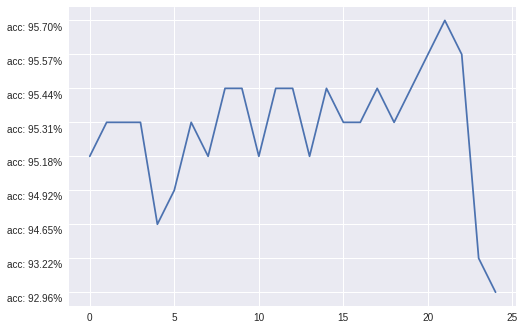

In [19]:
#for reproductivity
from numpy.random import seed 
from tensorflow import set_random_seed 
rownumber = 0
for FirstLayer in range(1050,1075,1):
  SecondLayer = 0.5*FirstLayer
  ThirdLayer = 0.1*FirstLayer
  seed(7) 
  set_random_seed(2)
  scaler = StandardScaler()
  X = scaler.fit_transform(X)
  model = Sequential()
  model.add(Dense(FirstLayer, input_dim=8, init='uniform', activation='relu' )) #bias_initializer='zeros'
  model.add(Dense(int(SecondLayer), init='uniform', activation='tanh'))
  model.add(Dense(int(ThirdLayer), init='uniform', activation='relu'))
  model.add(Dense(1, init='uniform', activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  history = model.fit(X, Y, epochs=150, batch_size=97,validation_split=0.20 ) #shuffle = False, 
  scores = model.evaluate(X, Y)
  analysisdf.loc[rownumber,"First Layer Neurons"]=  FirstLayer
  analysisdf.loc[rownumber,"Second layer neurons"]= SecondLayer
  analysisdf.loc[rownumber,"third layer neurons"]= ThirdLayer
  analysisdf.loc[rownumber,"accuracy"]= ("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
  wks.set_dataframe(analysisdf,(1,1))
  rownumber  += 1
plt.plot(analysisdf["accuracy"])

In [20]:
print (analysisdf)

   First Layer Neurons Second layer neurons third layer neurons       accuracy
0                 1050                  525                 105  \nacc: 95.18%
1                 1051                525.5               105.1  \nacc: 95.31%
2                 1052                  526               105.2  \nacc: 95.31%
3                 1053                526.5               105.3  \nacc: 95.31%
4                 1054                  527               105.4  \nacc: 94.65%
5                 1055                527.5               105.5  \nacc: 94.92%
6                 1056                  528               105.6  \nacc: 95.31%
7                 1057                528.5               105.7  \nacc: 95.18%
8                 1058                  529               105.8  \nacc: 95.44%
9                 1059                529.5               105.9  \nacc: 95.44%
10                1060                  530                 106  \nacc: 95.18%
11                1061                530.5         

We have reached the ideal neuron combo that is 1050, 525, 125 for first, second and third layer. We can now input these in the final code.